In [1]:
#imports
import math
import random
import pandas as pd
import numpy as np
import os
import networkx as nx
import matplotlib.pyplot as plt
import collections
from operator import itemgetter
import geopandas
from matplotlib.colors import ListedColormap
import sys
import gc
import pylab
from collections import Counter

In [2]:
# listing the Excels Files

excel_list1 = os.listdir("Raw_Data")
excel_list = []
for i in excel_list1:
    if(i.endswith(".csv")):
        excel_list.append(i)   
excel_list.sort()

In [3]:
def dates(s):
    year = s[:2]
    month = s[2:4]
    return "20" + year + "-" + month + "-" + "01"
same_city = {"DABOLIM":"GOA","Jharsuguda":"JHARSUGUDA","KADAPA":"CUDDAPAH","PONDICHERRY":"PUDUCHERRY", "COCHIN":"KOCHI"
}

In [4]:

# Creating networks and stroing them
coordinates = pd.read_csv("Raw_Data/coordinates/sorted_coordinates.csv",header=0,index_col= 0)
print(coordinates)

max_weight = 0
min_weight = 10000000000
graphs = []

passengers1 = []  # records number of total passengers(month wise)
lbls = []
lbls2 = []
tt = 0


monthstogether = 1
passengers = []    # records number of total passengens for given combined months


while (tt < len(excel_list)):
    i = excel_list[tt]
    lbls2.append(dates(i))
    path = "Raw_Data/"+i
    lbls.append(i[:-4])
    cities = {}
    G = nx.DiGraph()
    xmonths = Counter()
    
    for jj in range(tt,min(tt+monthstogether,len(excel_list))):
        
        path = path = "Raw_Data/" + excel_list[jj]
        excel = pd.read_csv(path ,header=0, index_col=0, usecols = [0,1,2,3,4] ,names=["SNo","city1","city2","to","from"] )
        

        
        for i in range(1,len(excel)+1):
            city1 = excel["city1"][i]
            city2 = excel["city2"][i]
            
            
            if city1 in same_city:
                city1 = same_city[city1]
        
            if city2 in same_city:
                city2 = same_city[city2]
            cities[city1] = (coordinates["Longitude"][city1],coordinates["Latitude"][city1])
            cities[city2] = (coordinates["Longitude"][city2],coordinates["Latitude"][city2])
            
            citypair1 = (city1,city2)
            citypair2 = (city2,city1)
            
            xmonths[citypair1] += excel["to"][i]
            xmonths[citypair2] += excel["from"][i]

            if xmonths[citypair2] == 0:
                xmonths.pop(citypair2)
            if xmonths[citypair1] == 0:
                xmonths.pop(citypair1) 
        passengers1.append(sum(excel["to"]) + sum(excel["from"]))
            
            
    for i in cities:
        G.add_node(i, pos= cities[i])


    print(path)
    for jj in xmonths:
        G.add_edge(jj[0],jj[1],weight=xmonths[jj])
        max_weight = max(max_weight,xmonths[jj])
        min_weight = min(min_weight, xmonths[jj])
    print(excel)
    graphs.append(G)
    passengers.append(sum(list(xmonths.values())))
    tt += monthstogether

graphslen = len(graphs)
#print(cities)

               Latitude  Longitude
Cities                            
ADAMPUR          31.430     75.750
AGARTALA         23.887     91.240
AGATTI ISLAND    10.824     72.176
AGRA             27.156     77.961
AHMEDABAD        23.077     72.635
...                 ...        ...
VADODARA         22.336     73.226
VARANASI         25.452     82.859
VIDYANAGAR       15.170     76.620
VIJAYAWADA       16.530     80.797
VISAKHAPATNAM    17.721     83.224

[119 rows x 2 columns]
Raw_Data/1505.csv
             city1       city2       to     from
SNo                                             
1    AGATTI ISLAND       KOCHI    482.0    787.0
2        AHMEDABAD   BENGALURU  15846.0  13112.0
3        AHMEDABAD      BHOPAL   1020.0    720.0
4        AHMEDABAD     CHENNAI  16090.0  14762.0
5        AHMEDABAD  COIMBATORE    946.0   1204.0
..             ...         ...      ...      ...
280       VADODARA   BENGALURU    513.0      0.0
281       VADODARA     CHENNAI   1106.0   1012.0
282       VAD

Raw_Data/1605.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   1017   1347
2    AGATTI ISLAND          KOCHI   1426      0
3             AGRA          DELHI      0      2
4             AGRA      KHAJURAHO      7      0
5             AGRA       VARANASI      0    106
..             ...            ...    ...    ...
310       VADODARA      HYDERABAD    548    374
311       VADODARA        KOLKATA   1124      0
312       VADODARA        LUCKNOW    379    224
313       VADODARA         MUMBAI  26257  22831
314     VIJAYAWADA  VISAKHAPATNAM   1294   2801

[314 rows x 4 columns]
Raw_Data/1606.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   1149   1191
2    AGATTI ISLAND          KOCHI   1119      0
3        AHMEDABAD      BENGALURU  15121  15616
4        AHMEDABAD        CHENNAI  12596  12319
5        AHMEDABAD     COIMB

Raw_Data/1706.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   1018    802
2         AGARTALA           PUNE     14      0
3         AGARTALA  VISAKHAPATNAM    181      0
4    AGATTI ISLAND          KOCHI    478    824
5             AGRA          DELHI      0     45
..             ...            ...    ...    ...
352       VADODARA      HYDERABAD    502    412
353       VADODARA        LUCKNOW      0    225
354       VADODARA         MUMBAI  22827  22558
355       VADODARA  VISAKHAPATNAM      0      8
356     VIJAYAWADA  VISAKHAPATNAM   2748   2724

[356 rows x 4 columns]
Raw_Data/1707.csv
             city1          city2     to   from
SNo                                            
1         AGARTALA        CHENNAI   1185   1073
2         AGARTALA           PUNE    125      0
3         AGARTALA  VISAKHAPATNAM     58      0
4    AGATTI ISLAND          KOCHI    590    604
5             AGRA          

Raw_Data/1809.csv
             city1          city2     to   from
SNo                                            
1          ADAMPUR          DELHI   2237   2164
2         AGARTALA        CHENNAI   2826   1769
3         AGARTALA           PUNE    192      0
4         AGARTALA  VISAKHAPATNAM     92      0
5    AGATTI ISLAND      BENGALURU     54     28
..             ...            ...    ...    ...
475       VADODARA      MANGALORE     95      0
476       VADODARA         MUMBAI  24676  21300
477       VADODARA     PORT BLAIR      4      0
478       VADODARA          SURAT      5      0
479     VIJAYAWADA  VISAKHAPATNAM   2545   2413

[479 rows x 4 columns]
Raw_Data/1810.csv
             city1          city2     to   from
SNo                                            
1          ADAMPUR          DELHI   2277   2251
2         AGARTALA        CHENNAI   4064   1791
3         AGARTALA           PUNE    405      0
4         AGARTALA  VISAKHAPATNAM    108      0
5    AGATTI ISLAND      BENG

Raw_Data/1911.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2600  2525
2      AGARTALA      BENGALURU  3690  2854
3      AGARTALA        CHENNAI  2280  1327
4      AGARTALA     COIMBATORE     0     3
5      AGARTALA          DELHI  5480  5399
..          ...            ...   ...   ...
528       SURAT        UDAIPUR  1126  1218
529    TIRUPATI     VIJAYAWADA   679   966
530     UDAIPUR  VISAKHAPATNAM     2     0
531    VARANASI  VISAKHAPATNAM     0   731
532  VIJAYAWADA  VISAKHAPATNAM  3054  2810

[532 rows x 4 columns]
Raw_Data/1912.csv
          city1          city2    to  from
SNo                                       
1       ADAMPUR          DELHI  2606  2601
2      AGARTALA      BENGALURU  4527  4435
3      AGARTALA        CHENNAI  3382  1729
4      AGARTALA     COIMBATORE     0     2
5      AGARTALA          DELHI  6080  6922
..          ...            ...   ...   ...
534       SURAT        UDAIPUR  1357 

In [5]:
lbls1 = []
month = {"01":"Jan", "02":"Feb", "03":"March", "04":"April", "05":"May", "06":"June", "07":"July", "08":"Aug", 
        "09":"Sep", "10":"Oct", "11":"Nov", "12":"Dec"}
for e in lbls:
    lbls1.append(month[e[2:]]+e[:2])

AGATTI ISLAND
KOCHI
AHMEDABAD
BENGALURU
BHOPAL
CHENNAI
COIMBATORE
DELHI
DIBRUGARH
GOA
GUWAHATI
HYDERABAD
IMPHAL
INDORE
JAIPUR
KOLKATA
LUCKNOW
MUMBAI
NAGPUR
PUNE
AIZAWL
AMRITSAR
SRINAGAR
BAGDOGRA
BELGAUM
JABALPUR
AGARTALA
CHANDIGARH
DEHRA DUN
HUBLI
JODHPUR
JORHAT
KOZHIKODE
MANGALORE
PATNA
PUDUCHERRY
RAIPUR
RAJAHMUNDRY
RAJKOT
RANCHI
TRIVANDRUM
VARANASI
VIJAYAWADA
VISAKHAPATNAM
BHAVNAGAR
BHUBANESWAR
PORT BLAIR
BHUJ
TIRUCHIRAPALLY
TUTICORIN
ALLAHABAD
AURANGABAD
DHARAMSALA
DIMAPUR
GAYA
GWALIOR
JAMMU
KHAJURAHO
KULLU
LEH
PANTNAGAR
SURAT
TIRUPATI
UDAIPUR
DIU
PORBANDAR
LILABARI
SILCHAR
MADURAI
DURGAPUR
SHILLONG
JAMNAGAR
TEZPUR
VADODARA

CUDDAPAH

AGRA


MYSORE
GORAKHPUR















BHATINDA
KANPUR




SIMLA
NANDED



KANDLA


BIKANER
LUDHIANA

JAISALMER
SHIRDI
VIDYANAGAR


JALGAON
NASIK


MUNDRA

SALEM

PATHANKOT
KOLHAPUR

ADAMPUR
PASIGHAT

JAGDALPUR




AJMER
GANGTOK


KANNUR

PITHORAGARH
PAKYONG


JHARSUGUDA







GHAZIABAD

KALABURAGI, KARNATAKA



BIDAR AIRPORT, KARNATAKA









DARBH

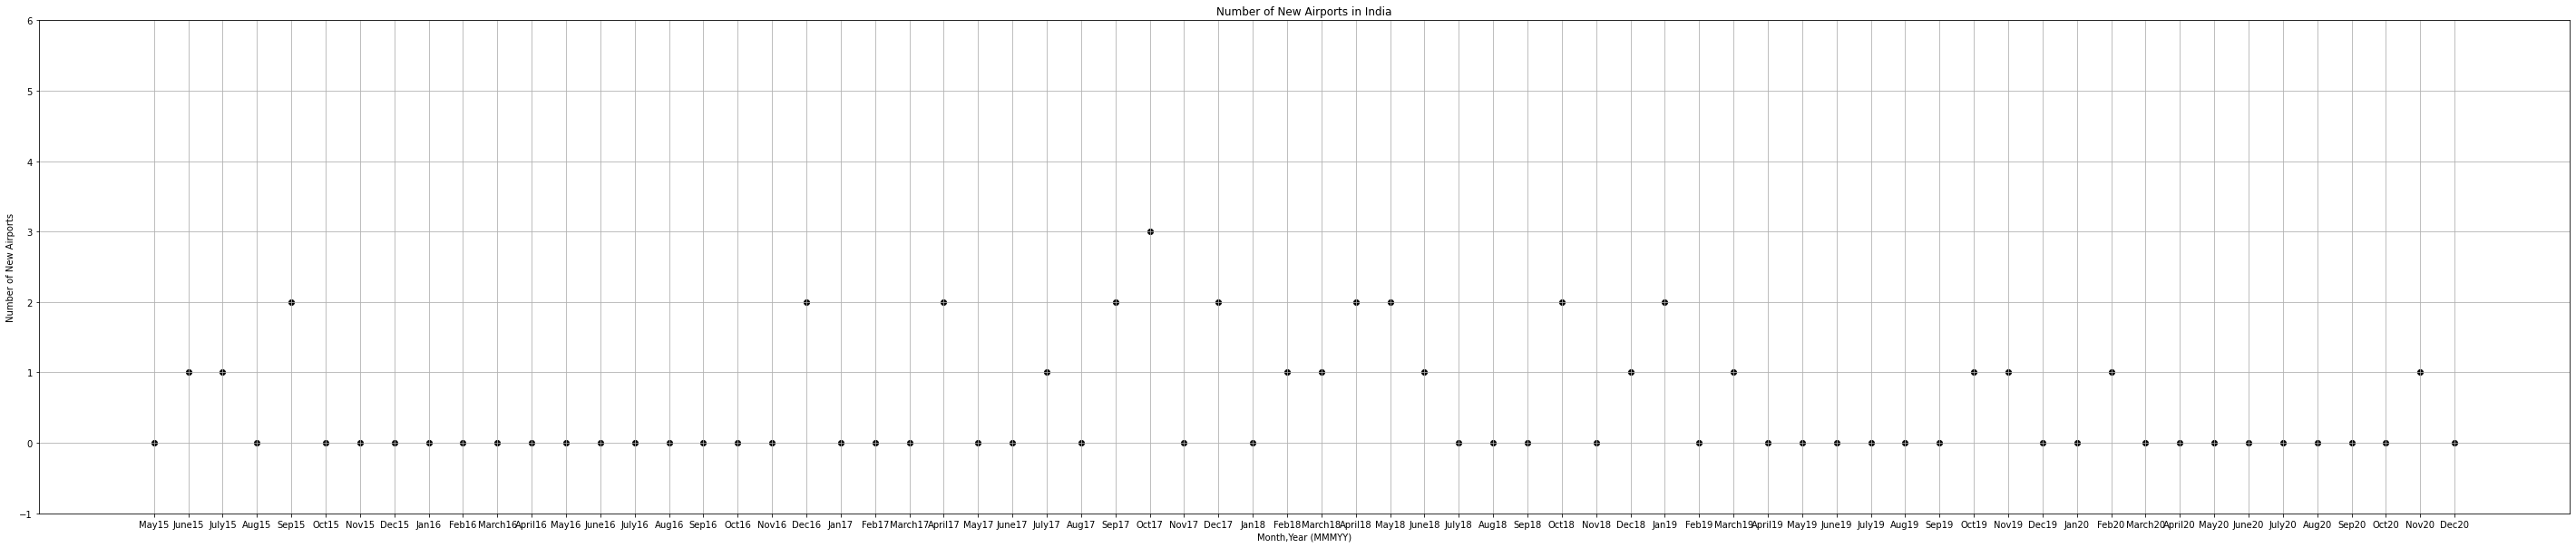

In [6]:
nnodes = []
airpor = {} 
new_airports = []
for i in range(len(graphs)):
    airports_new = []
    temp = 0
    for j in graphs[i].nodes():
        if j not in airpor:
            airpor[j]=  1
            temp += 1
            print(j)
            airports_new.append(j)
    print()
    new_airports.append(airports_new)
    nnodes.append(temp)
nnodes[0] = 0
plt.scatter(lbls1, nnodes, color="black", marker="o")
plt.xlabel("Month,Year (MMMYY)")
plt.xticks([i for i in range(graphslen)], labels = lbls1)
plt.ylabel("Number of New Airports")
plt.title("Number of New Airports in India")
plt.grid(True)
plt.ylim(-1,6)
figure = plt.gcf()
figure.set_size_inches(50, 10)
plt.savefig('Output_Files/matplotlib/new/newnodes')
plt.show()
plt.clf()
plt.close()

In [7]:
length = max(map(len, new_airports))
y=np.array([xi+[None]*(length-len(xi)) for xi in new_airports])
pd.DataFrame(y)[:25]

0          1          2          3       4        5   \
0   AGATTI ISLAND      KOCHI  AHMEDABAD  BENGALURU  BHOPAL  CHENNAI   
1        CUDDAPAH       None       None       None    None     None   
2            AGRA       None       None       None    None     None   
3            None       None       None       None    None     None   
4          MYSORE  GORAKHPUR       None       None    None     None   
5            None       None       None       None    None     None   
6            None       None       None       None    None     None   
7            None       None       None       None    None     None   
8            None       None       None       None    None     None   
9            None       None       None       None    None     None   
10           None       None       None       None    None     None   
11           None       None       None       None    None     None   
12           None       None       None       None    None     None   
13           None       None       None       None    None     None   
14           None       None       None       None    None     None   
15           None       None       None       None    None     None   
16           None       None       None       None    None     None   
17           None       None       None       None    None     None   
18           None       None       None       None    None     None   
19       BHATINDA     KANPUR       None       None    None     None   
20           None       None       None       None    None     None   
21           None       None       None       None    None     None   
22           None       None       None       None    None     None   
23          SIMLA     NANDED       None       None    None     None   
24           None       None       None       None    None     None   

            6      7          8     9   ...    64         65        66  \
0   COIMBATORE  DELHI  DIBRUGARH   GOA  ...   DIU  PORBANDAR  LILABARI   
1         None   None       None  None  ...  None       None      None   
2         None   None       None  None  ...  None       None      None   
3         None   None       None  None  ...  None       None      None   
4         None   None       None  None  ...  None       None      None   
5         None   None       None  None  ...  None       None      None   
6         None   None       None  None  ...  None       None      None   
7         None   None       None  None  ...  None       None      None   
8         None   None       None  None  ...  None       None      None   
9         None   None       None  None  ...  None       None      None   
10        None   None       None  None  ...  None       None      None   
11        None   None       None  None  ...  None       None      None   
12        None   None       None  None  ...  None       None      None   
13        None   None       None  None  ...  None       None      None   
14        None   None       None  None  ...  None       None      None   
15        None   None       None  None  ...  None       None      None   
16        None   None       None  None  ...  None       None      None   
17        None   None       None  None  ...  None       None      None   
18        None   None       None  None  ...  None       None      None   
19        None   None       None  None  ...  None       None      None   
20        None   None       None  None  ...  None       None      None   
21        None   None       None  None  ...  None       None      None   
22        None   None       None  None  ...  None       None      None   
23        None   None       None  None  ...  None       None      None   
24        None   None       None  None  ...  None       None      None   

         67       68        69        70        71      72        73  
0   SILCHAR  MADURAI  DURGAPUR  SHILLONG  JAMNAGAR  TEZPUR  VADODARA  
1      None     None      None      None      None    None      None  
2      None     None      None

In [9]:
def analysis(place):
    edges = {}
    for i in range(len(graphs)-9):
        g = graphs[i]
        in_e = g.in_edges(place)
        out_e = g.out_edges(place)
        edges[lbls1[i]] = []
        for j in in_e:
            if(j[0] not in edges[lbls1[i]]):
                edges[lbls1[i]].append(j[0])
        for j in out_e:
            if(j[1] not in edges[lbls1[i]]):
                edges[lbls1[i]].append(j[1])
    print("Increase in edges:",len(edges["March20"]) - len(edges["May15"]))
    plt.figure(figsize = (50, 15)) 
    plt.xticks(range(len(graphs)-9),lbls1[:-9])
    plt.plot([len(edges[i]) for i in edges])
    plt.show()
    

In [10]:
def analysis_degree(place):
    degree = []
    for i in range(len(graphs)-9):
        g = graphs[i]
        deg = g.degree(place)
        if(type(deg)==int):
            degree.append(deg)
        else:
            degree.append(0)
    print("Increase in degree:",degree[-1]-degree[0])
    plt.figure(figsize = (50, 15)) 
    plt.title(place)
    plt.xticks(range(len(graphs)-9),lbls1[:-9])
    plt.plot(degree)
    

Increase in edges: 16


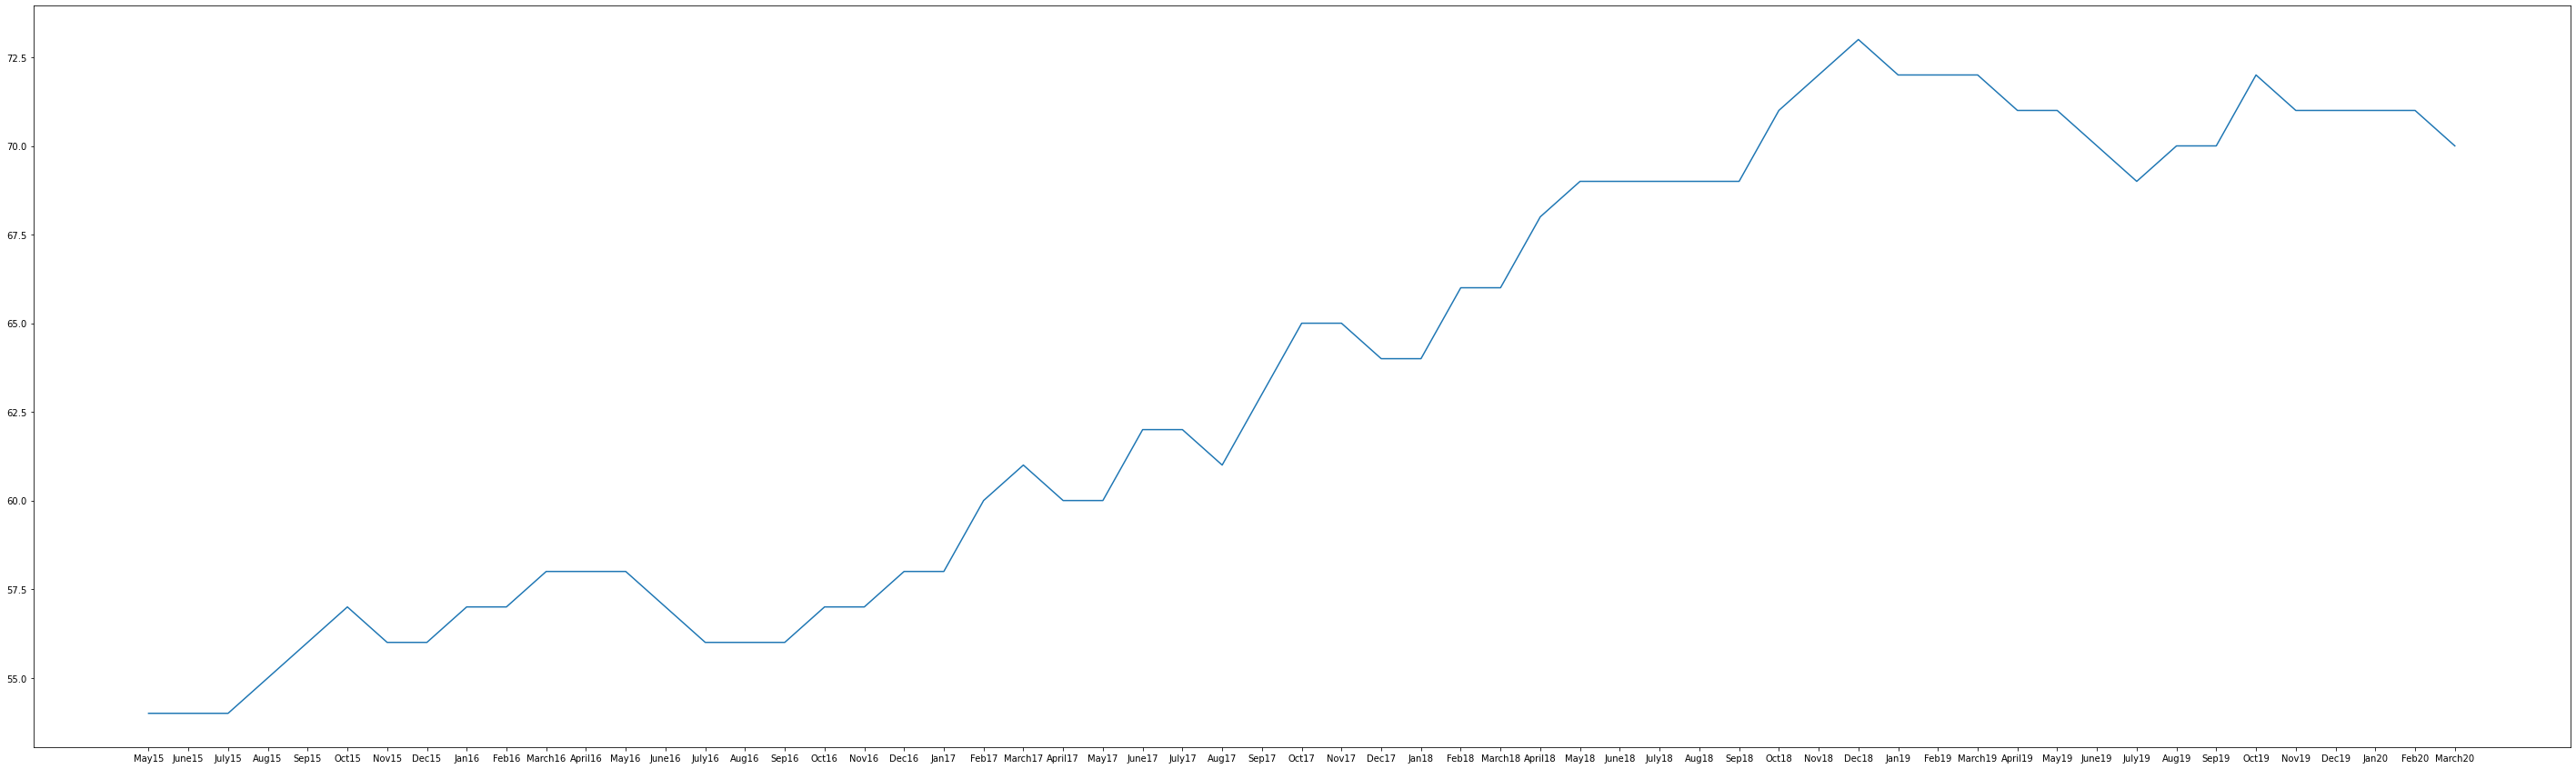

In [11]:
# AGRA
analysis("DELHI")
   

Increase in edges: 13


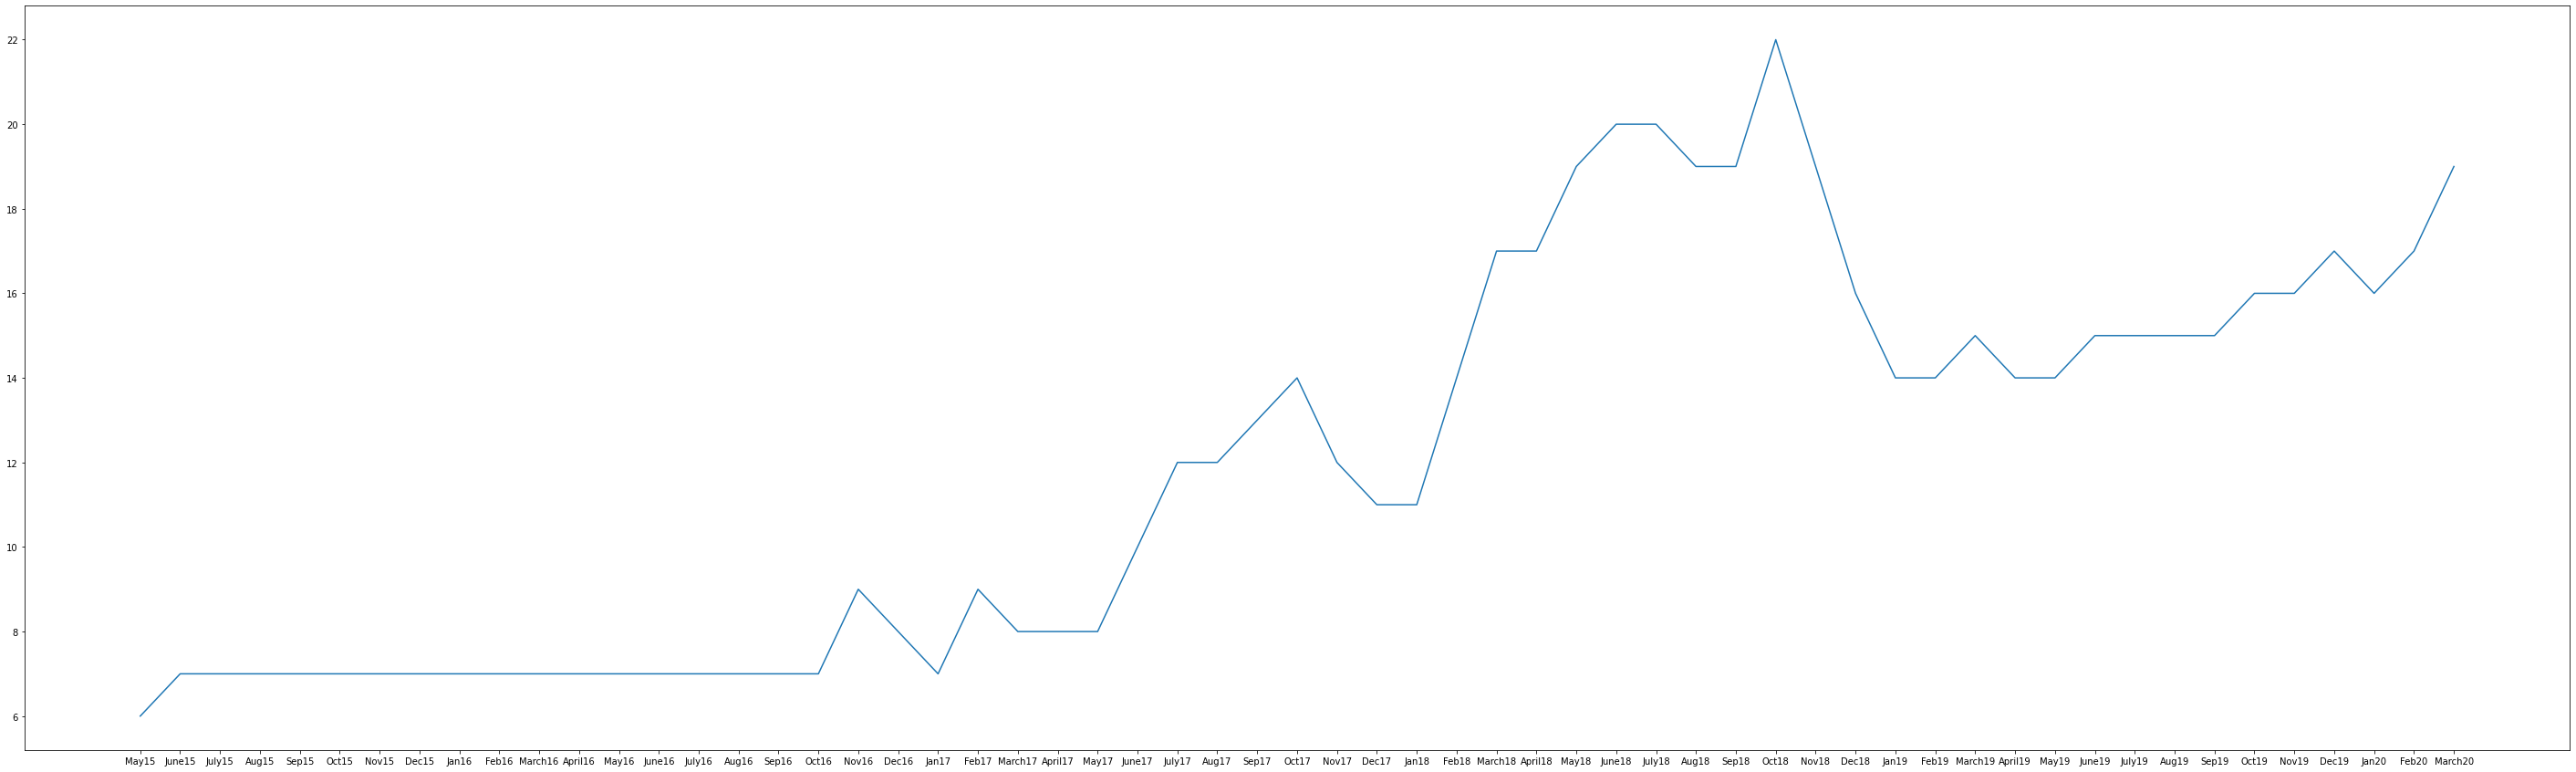

In [20]:
analysis("PATNA")

Increase in degree: 2


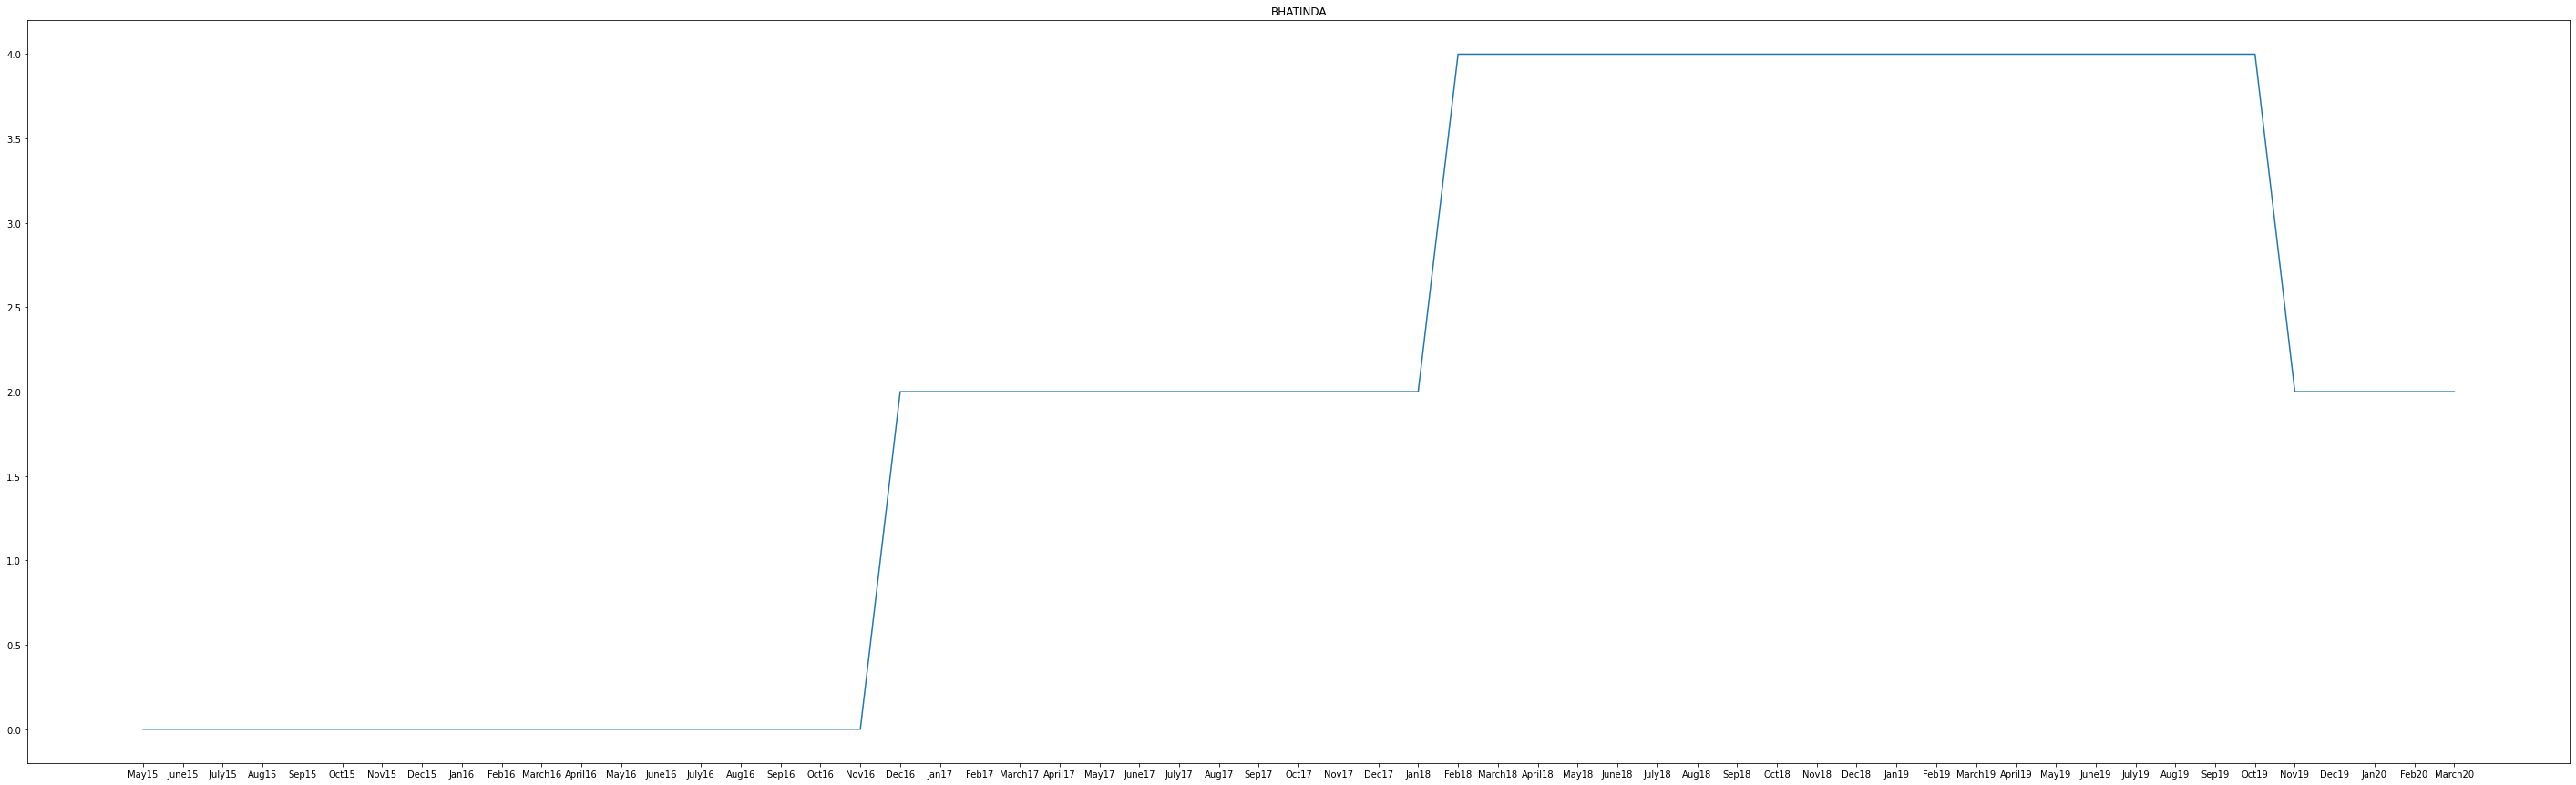

In [13]:
# BHATINDA
analysis_degree("BHATINDA")

Increase in degree: 12


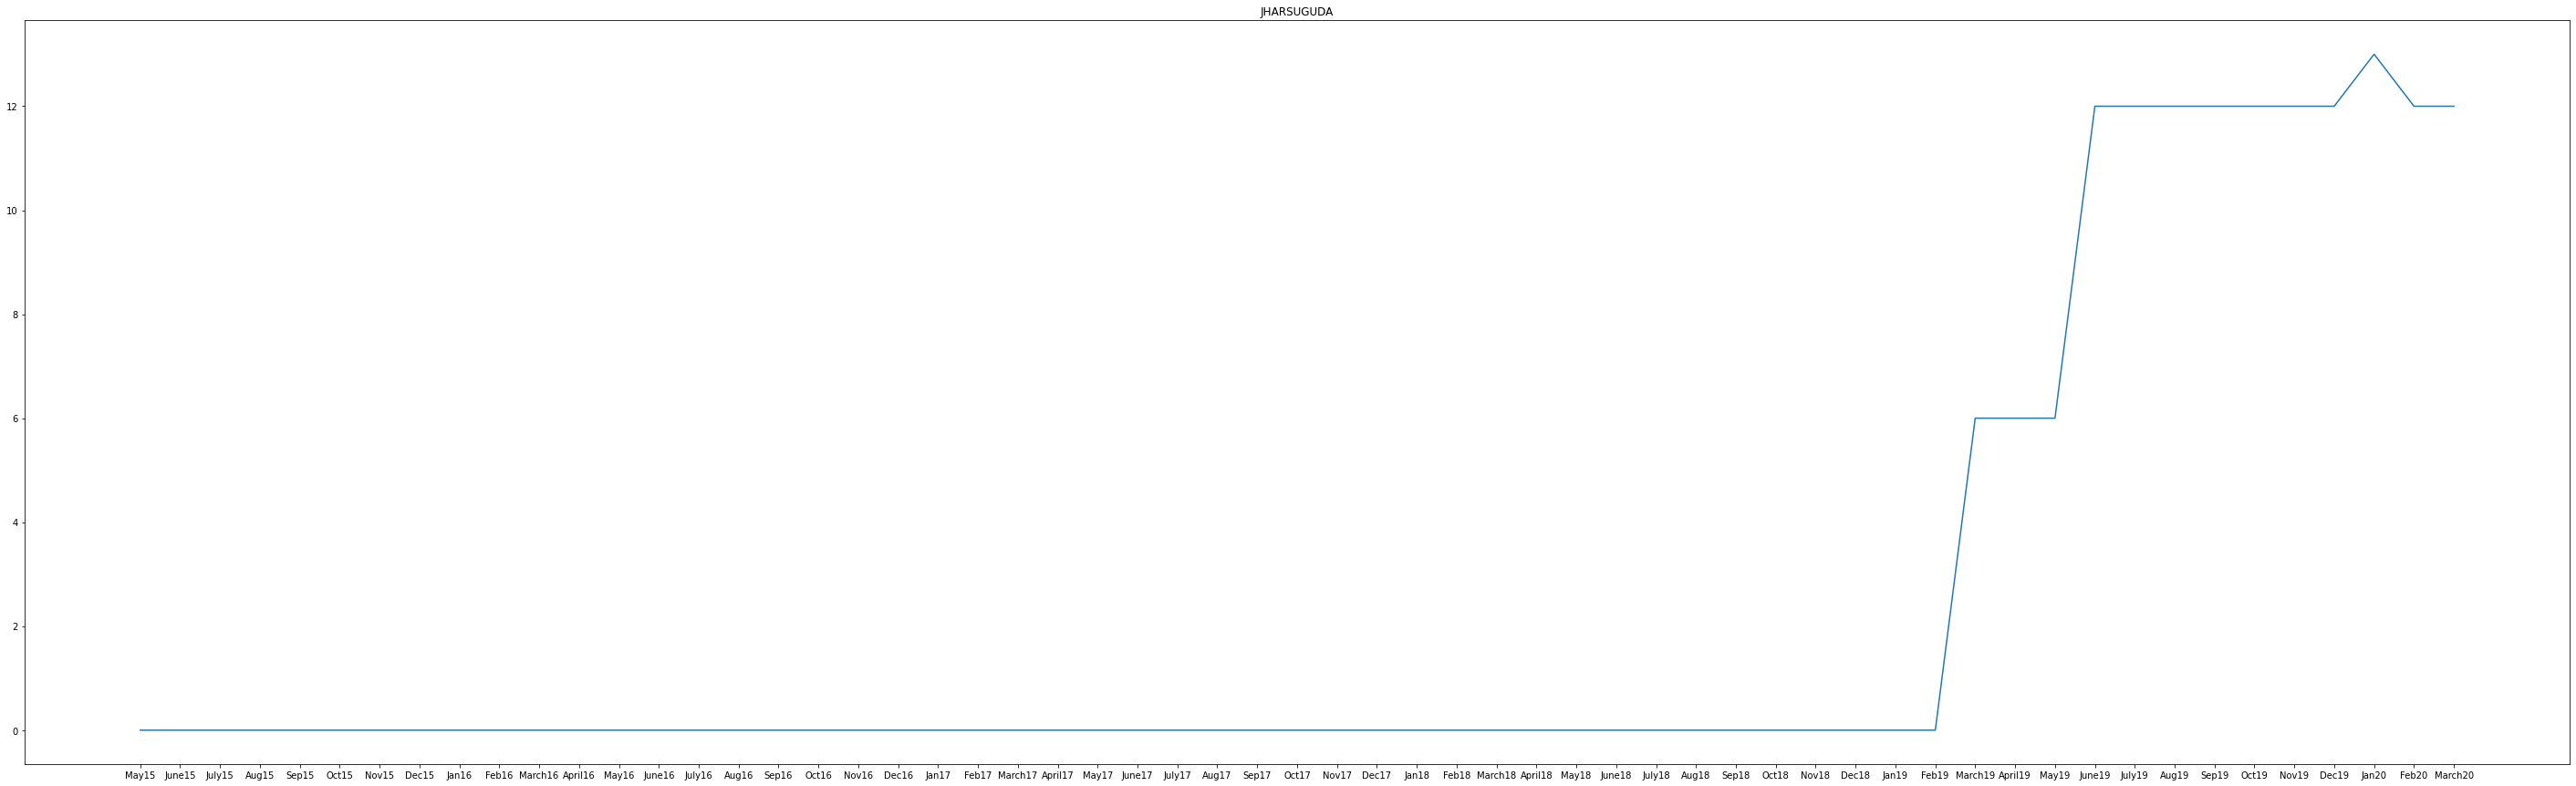

In [14]:
# Cuddapah
analysis_degree("JHARSUGUDA")

AGATTI ISLAND
Increase in edges: 2


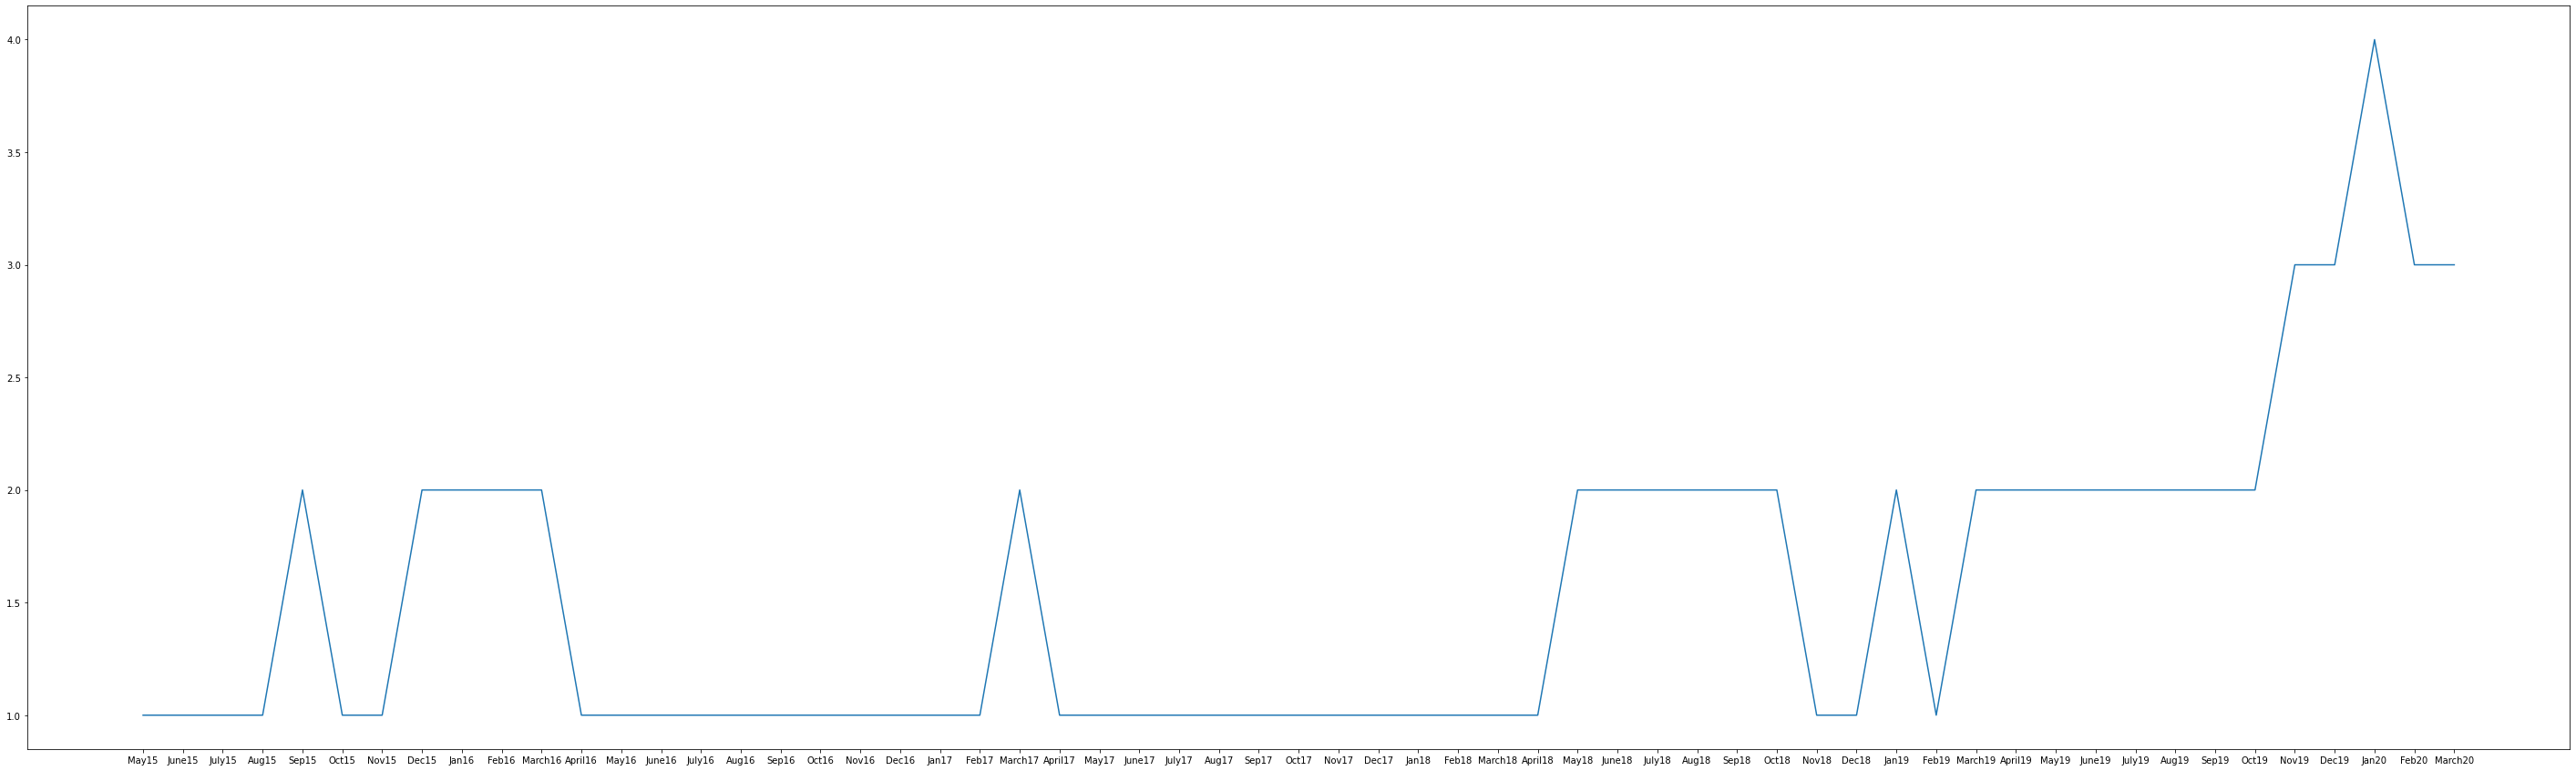


KOCHI
Increase in edges: 9


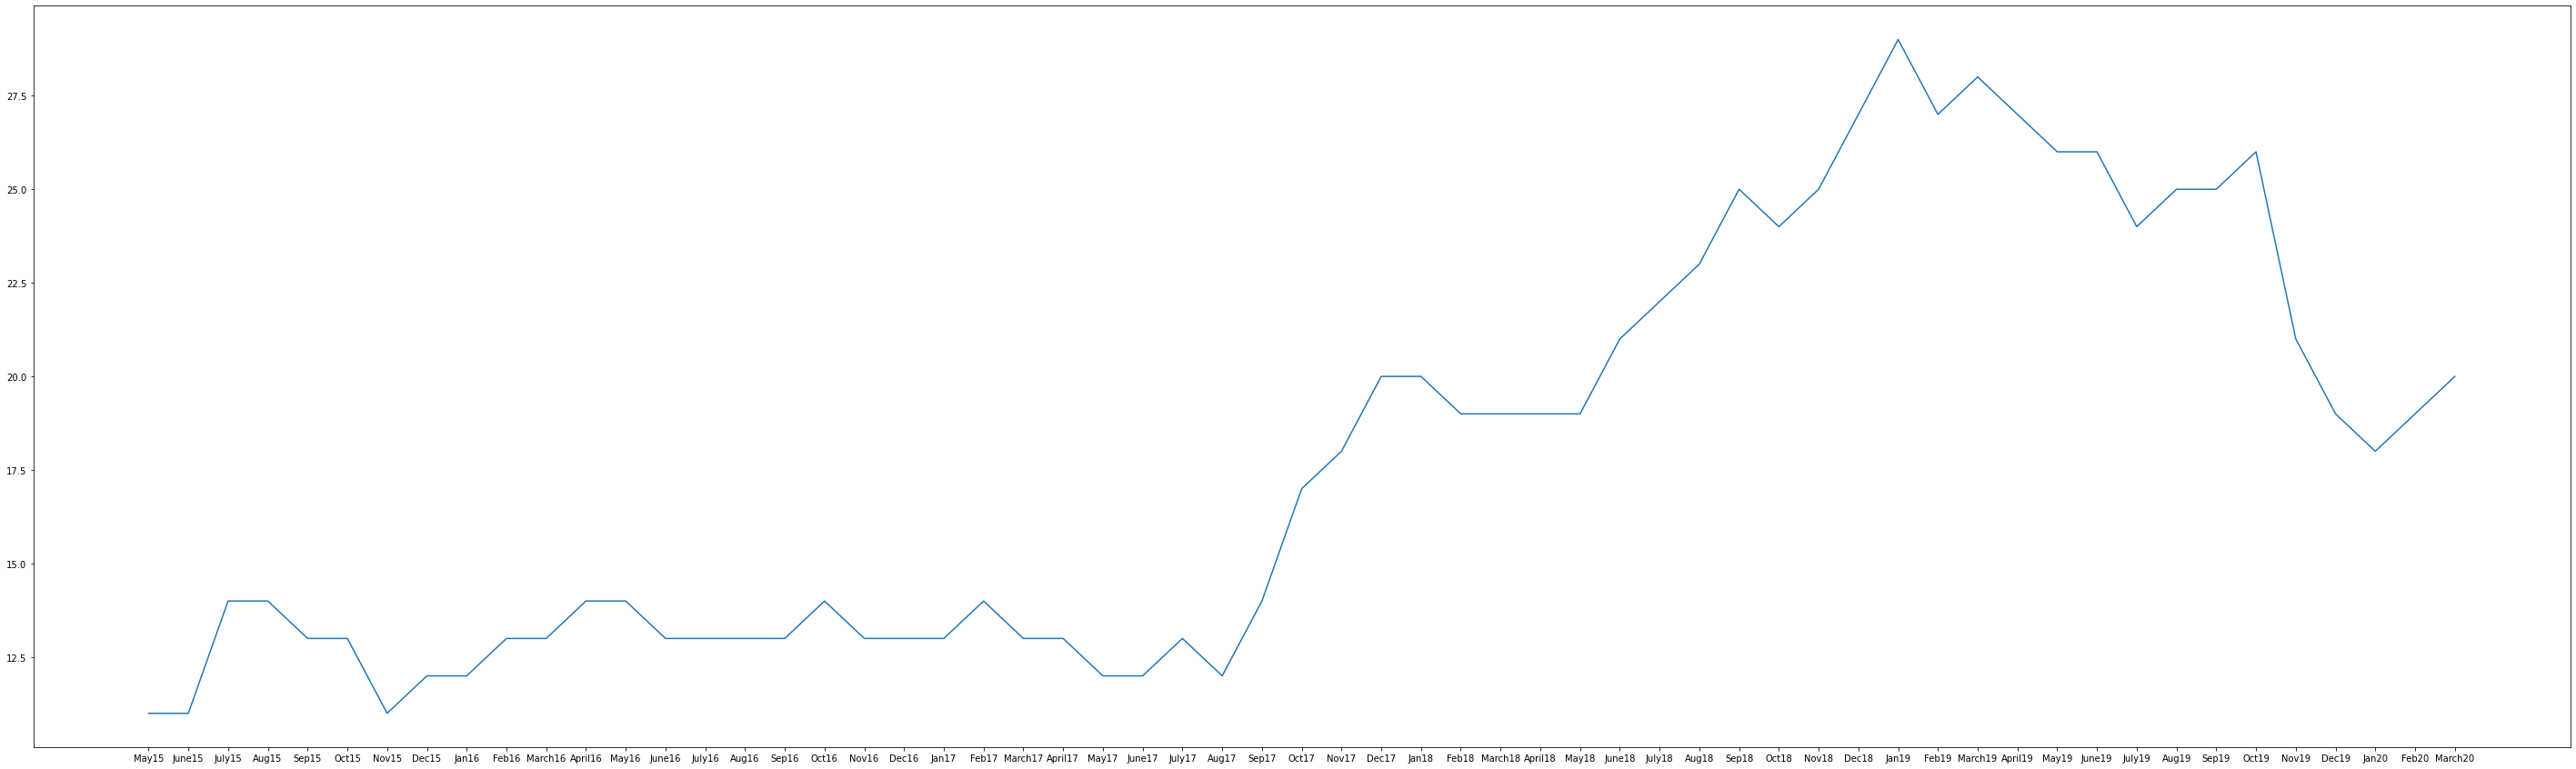


AHMEDABAD
Increase in edges: 23


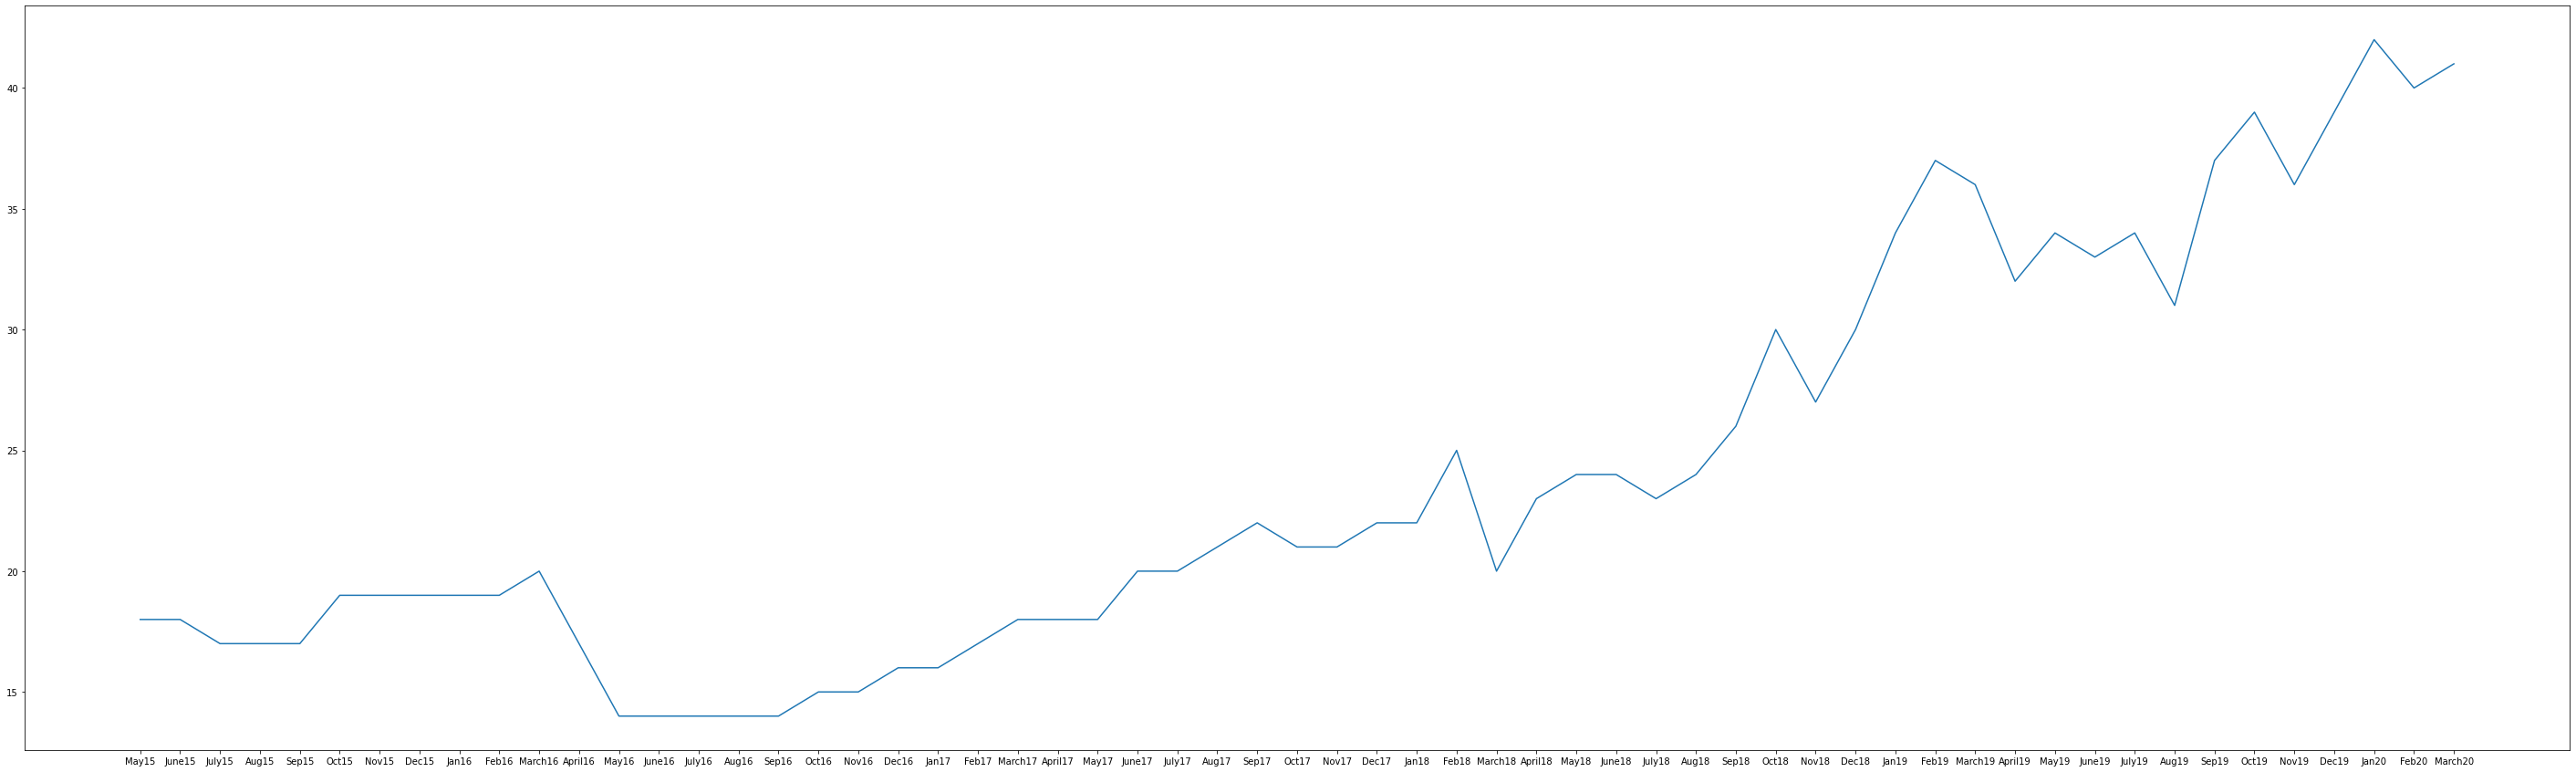


BENGALURU
Increase in edges: 19


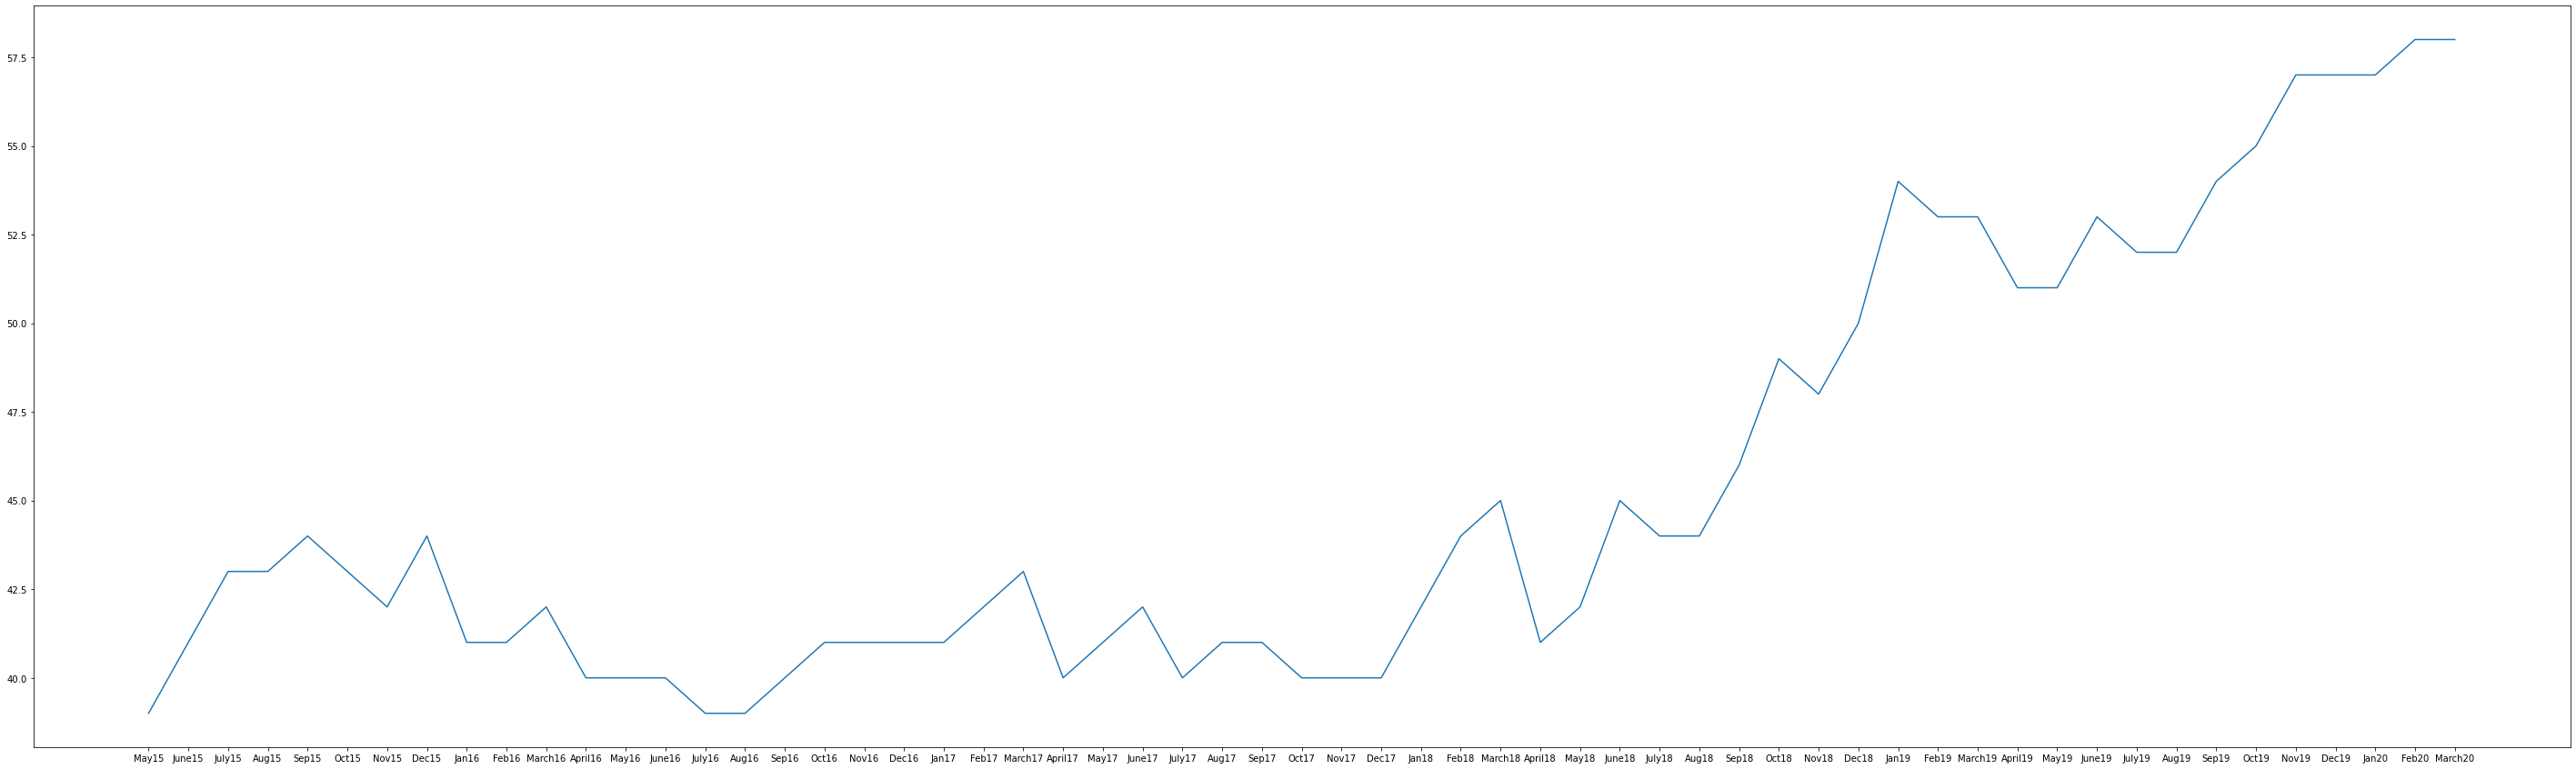


BHOPAL
Increase in edges: 7


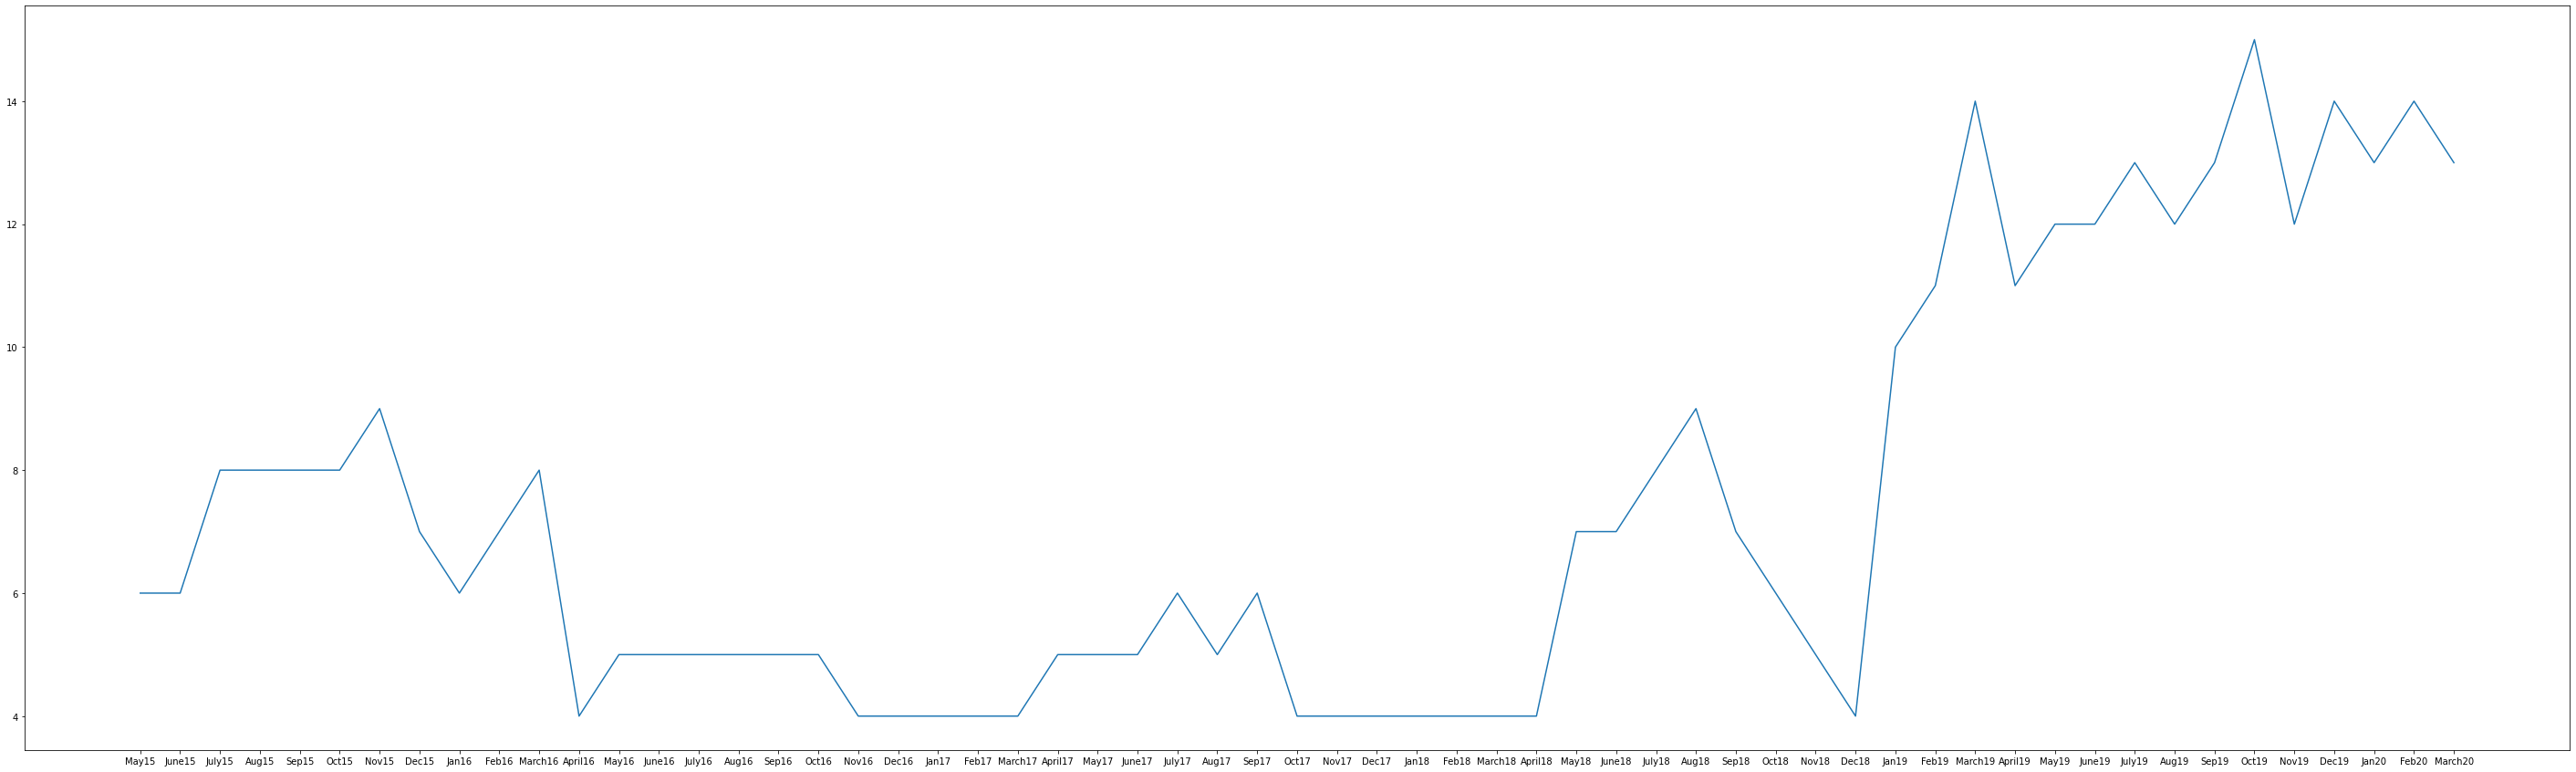


CHENNAI
Increase in edges: 14


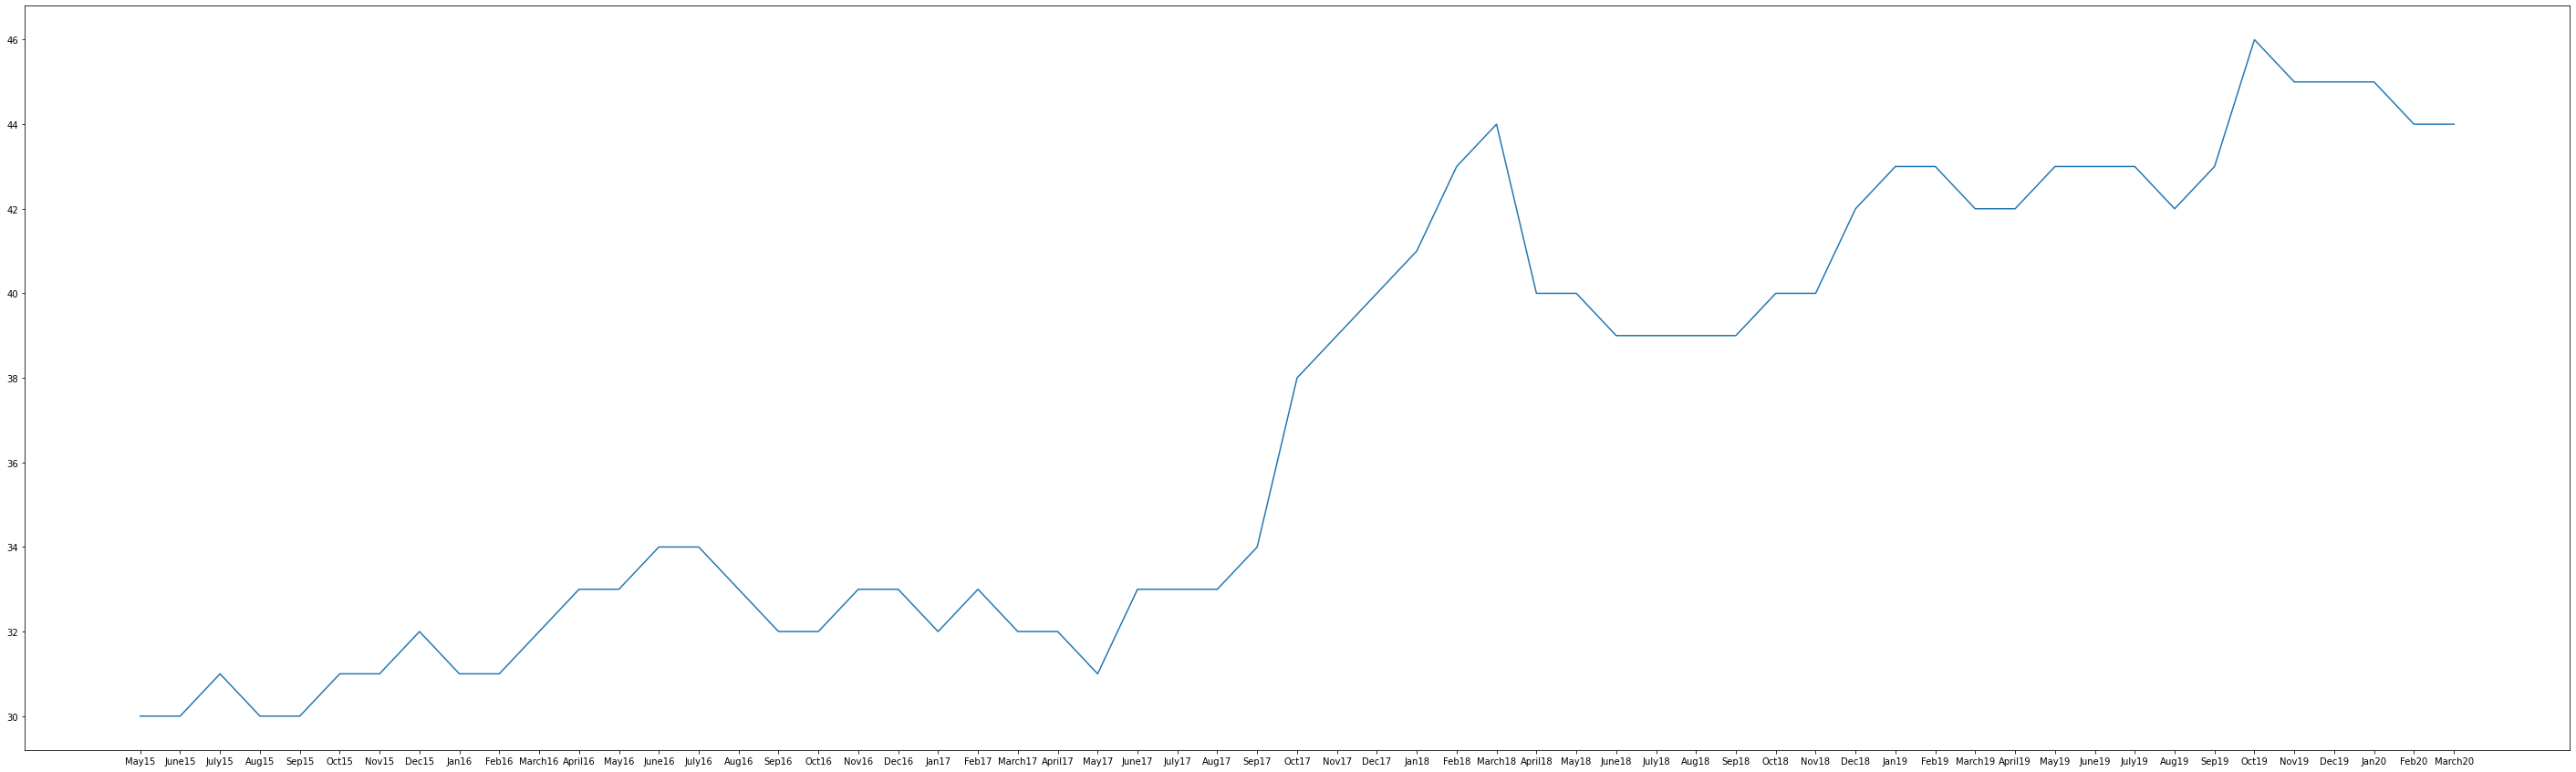


COIMBATORE
Increase in edges: 9


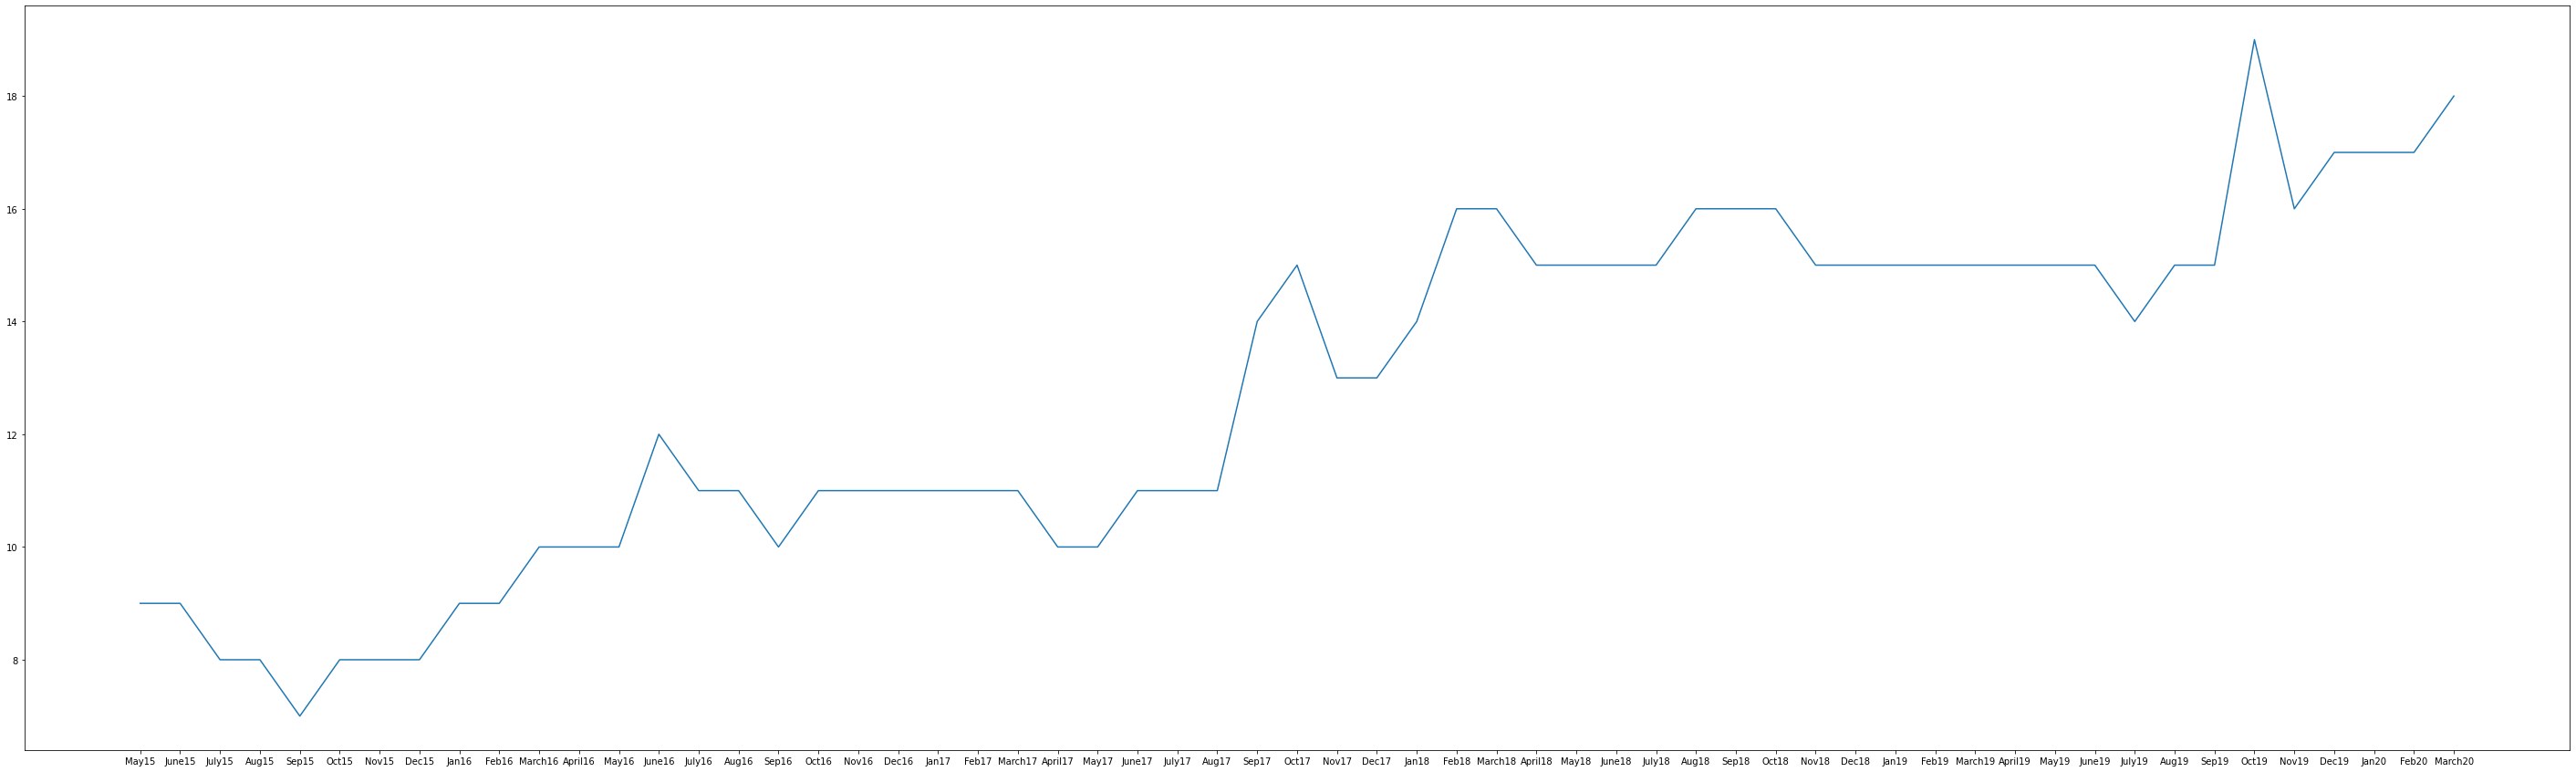


DELHI
Increase in edges: 16


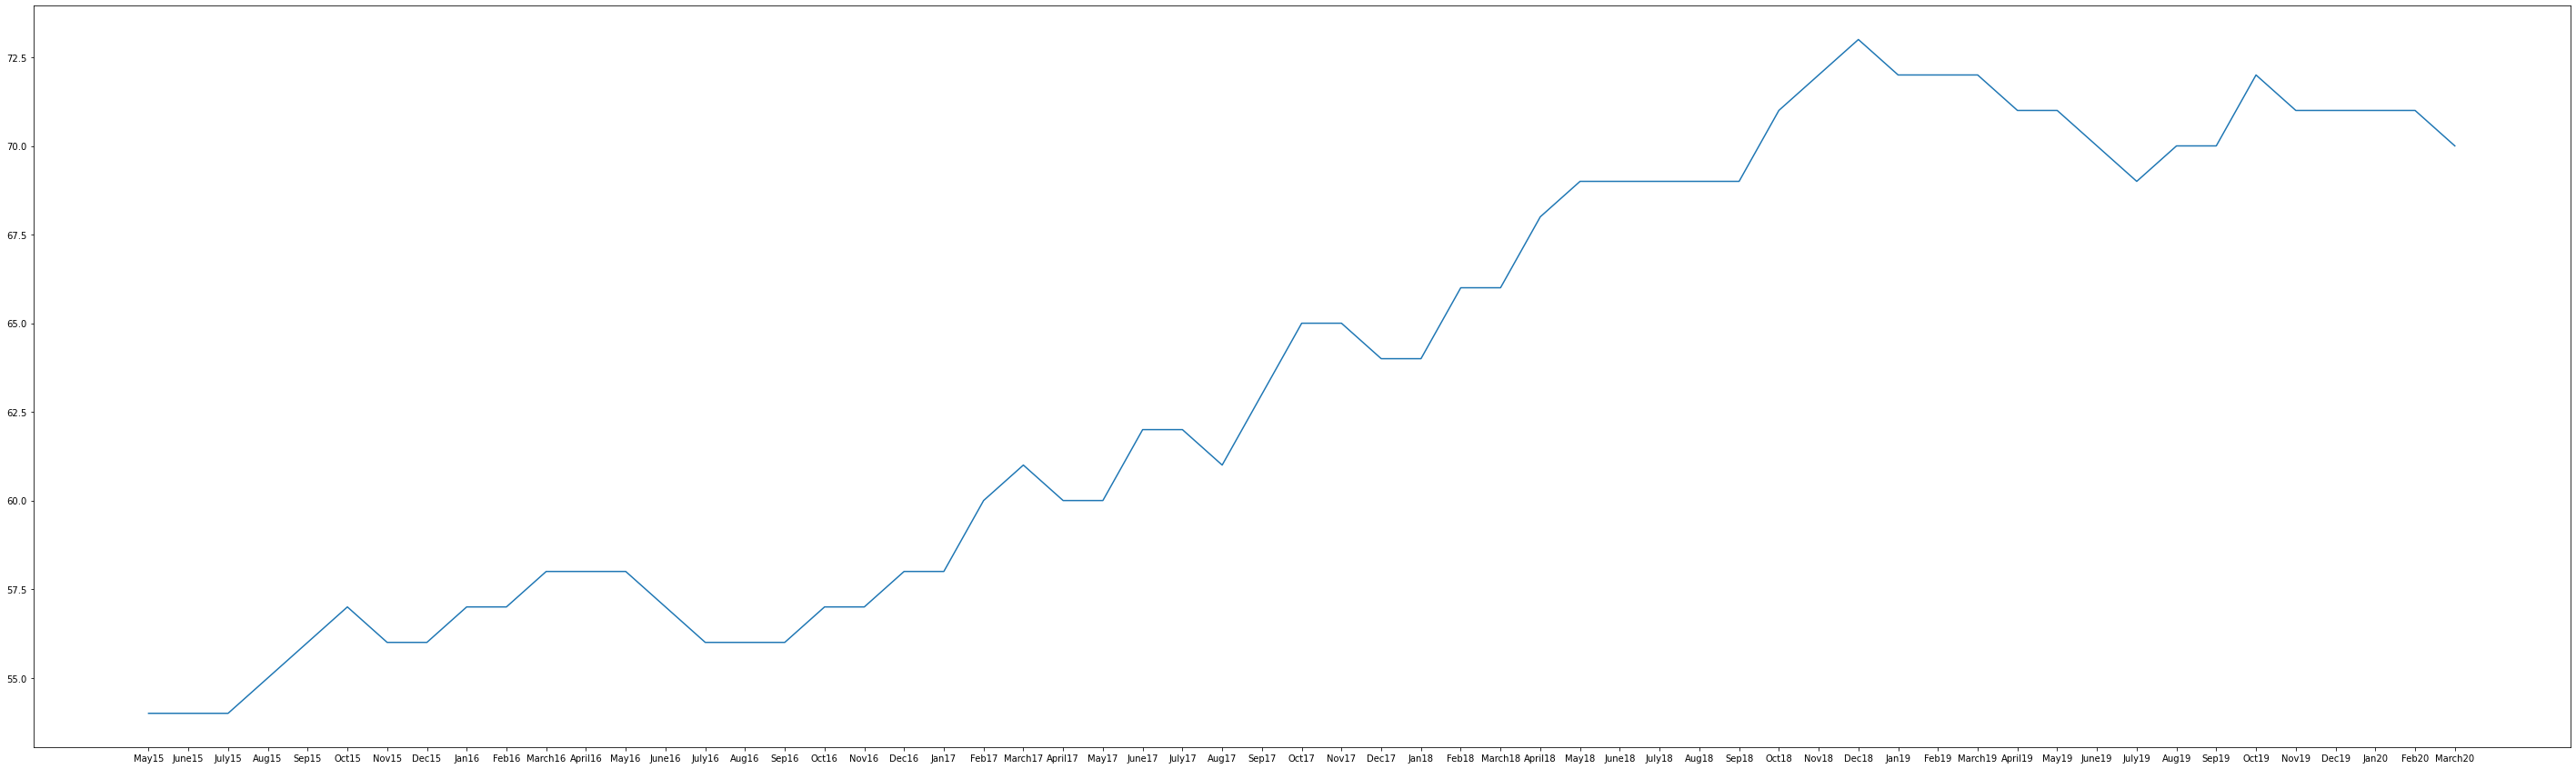


DIBRUGARH
Increase in edges: 0


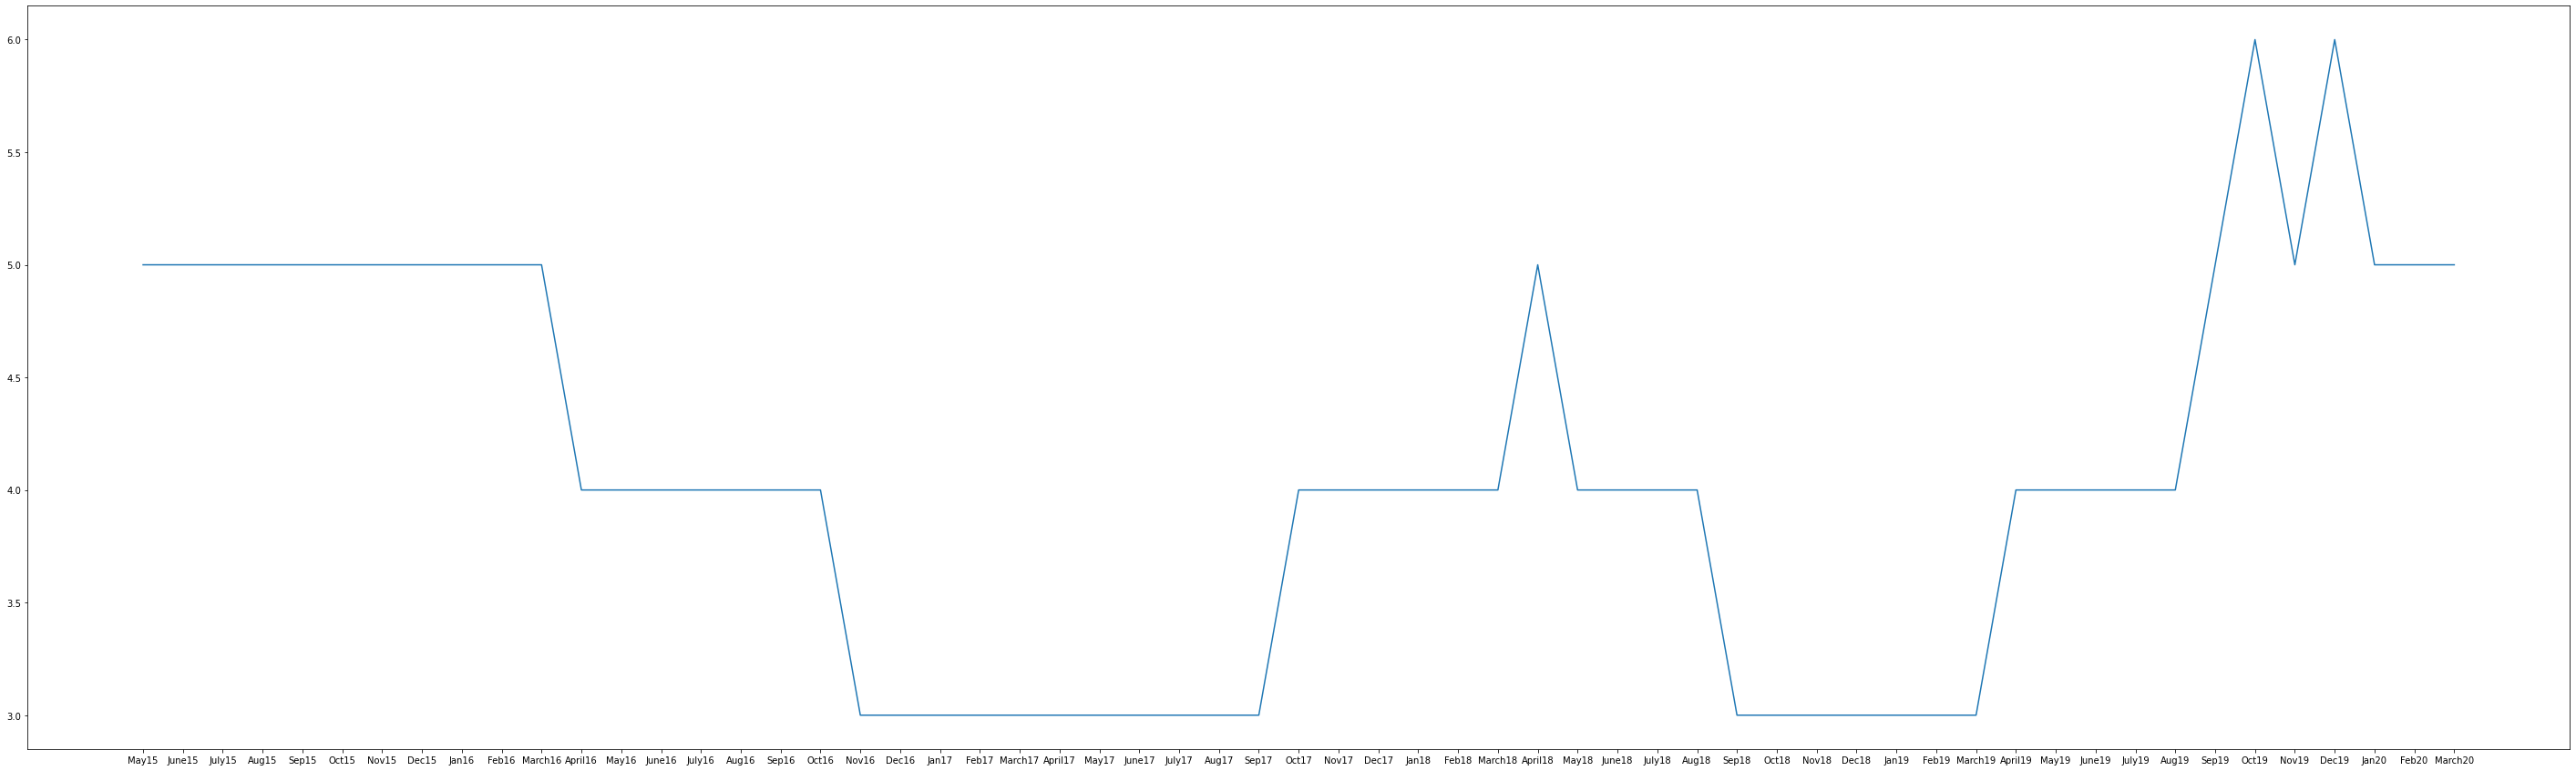


GOA
Increase in edges: 14


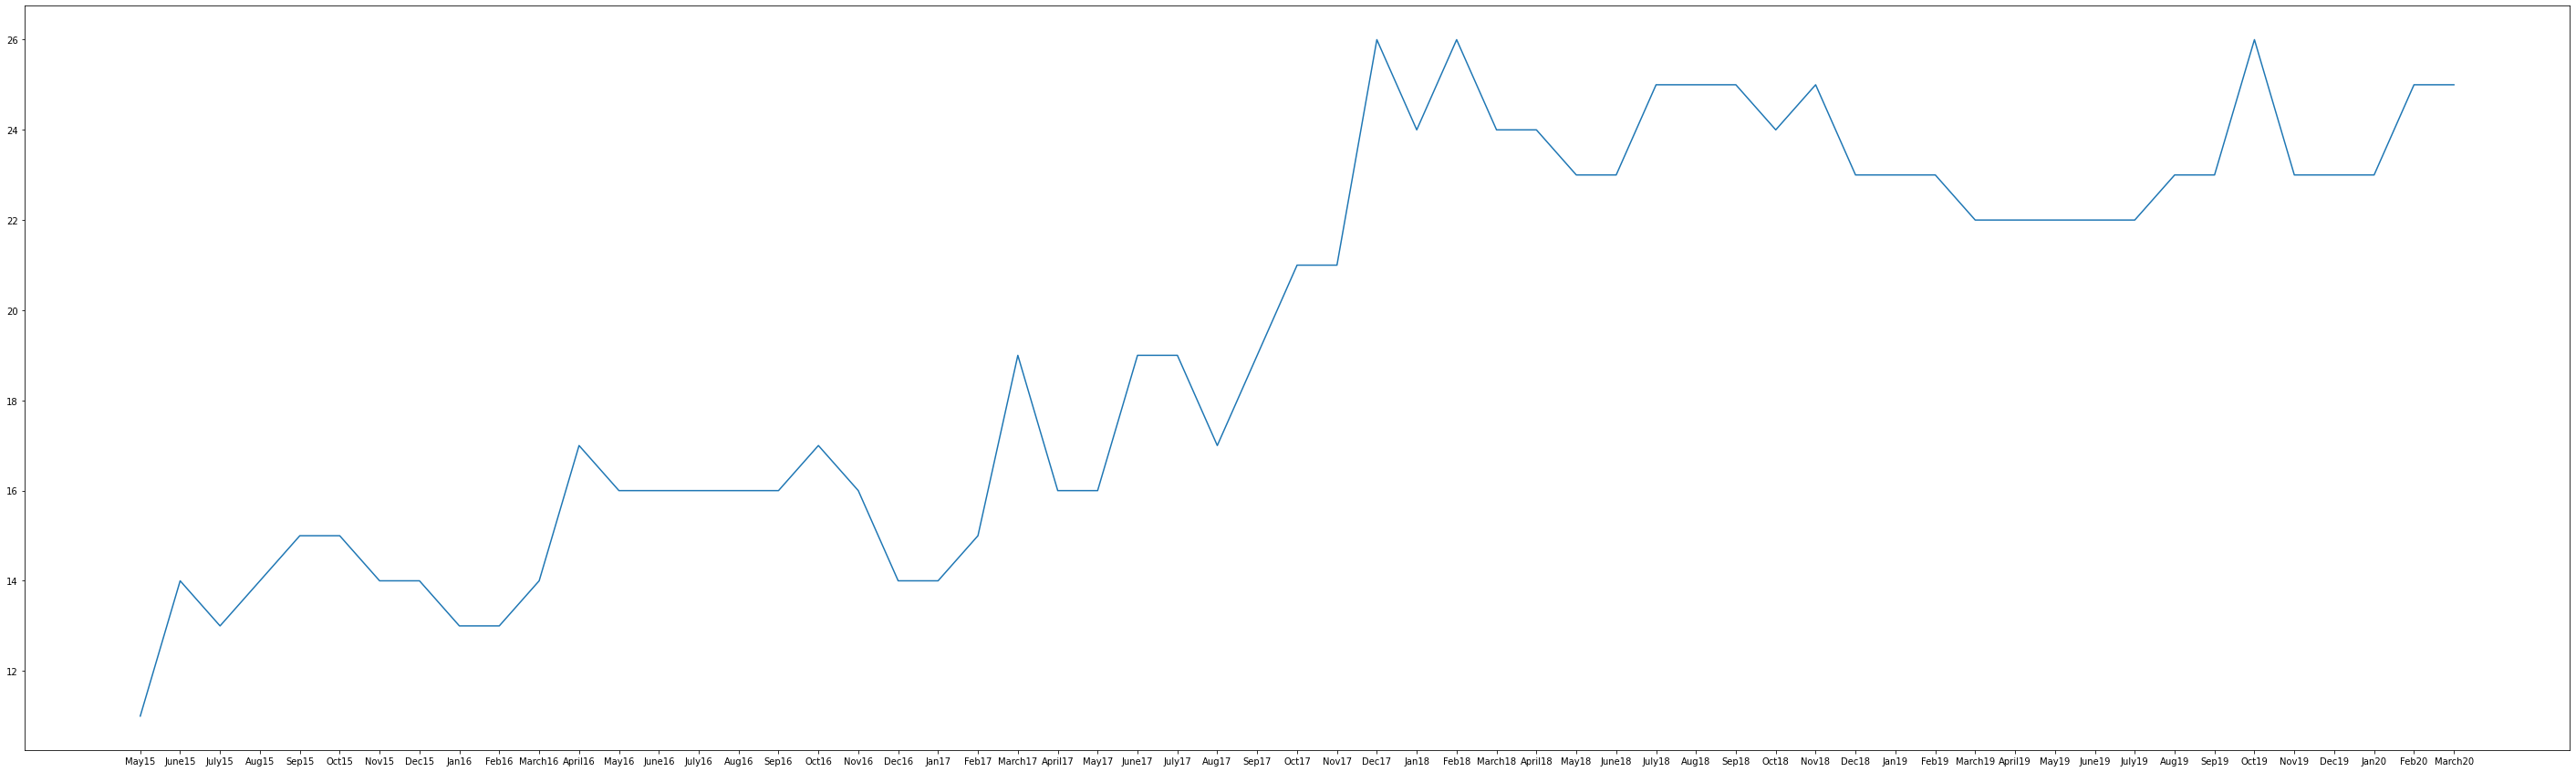


GUWAHATI
Increase in edges: 10


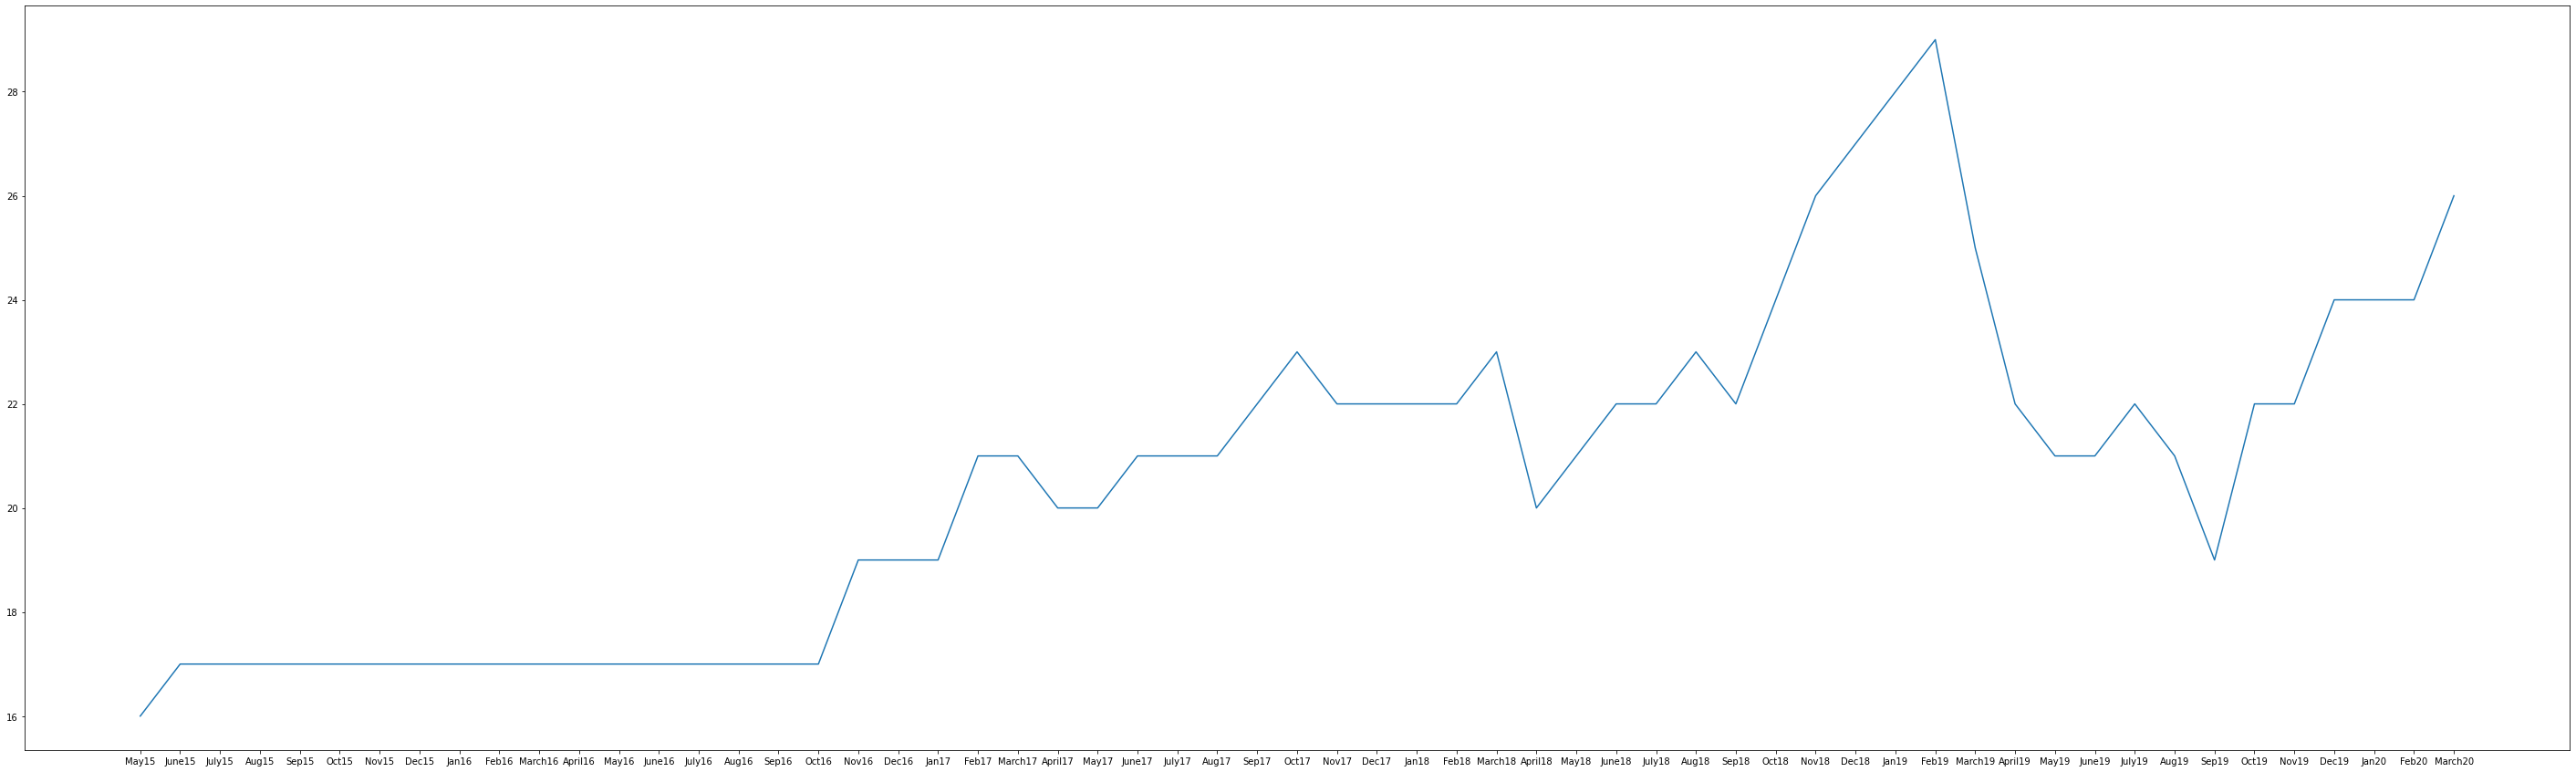


HYDERABAD
Increase in edges: 29


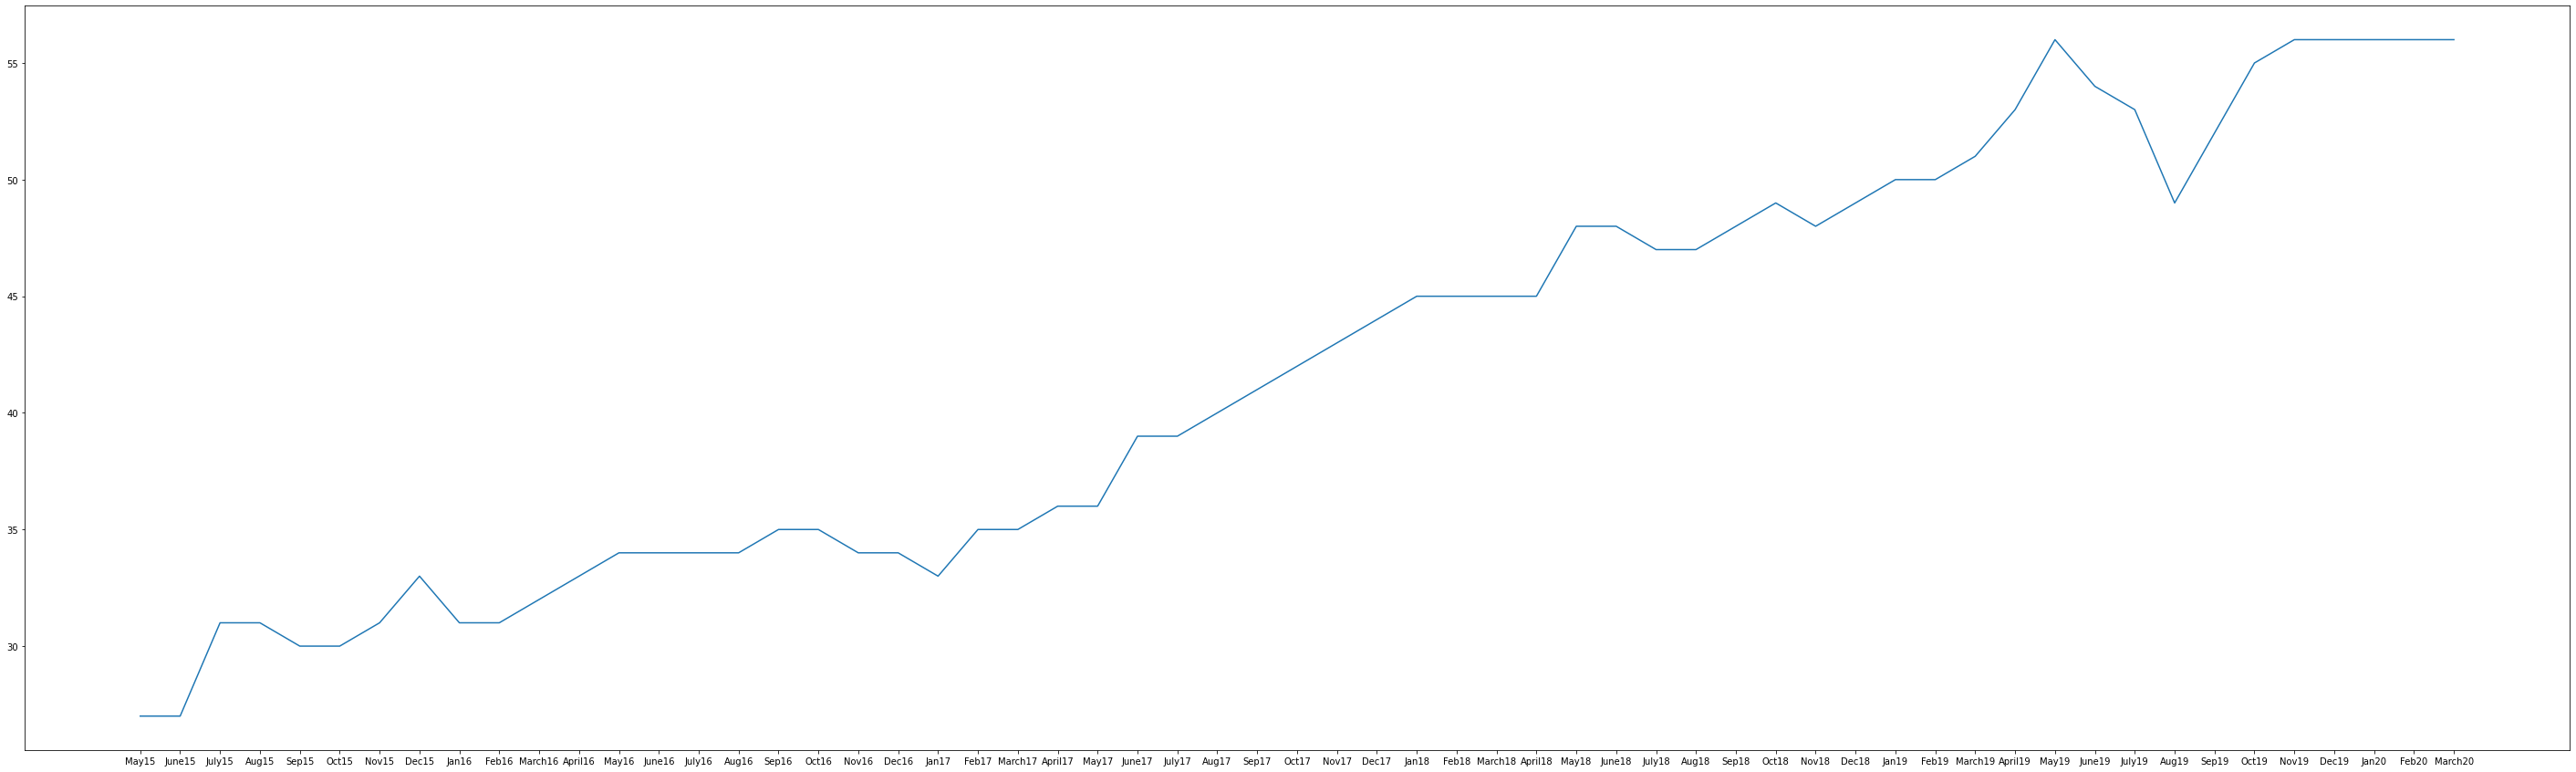


IMPHAL
Increase in edges: 2


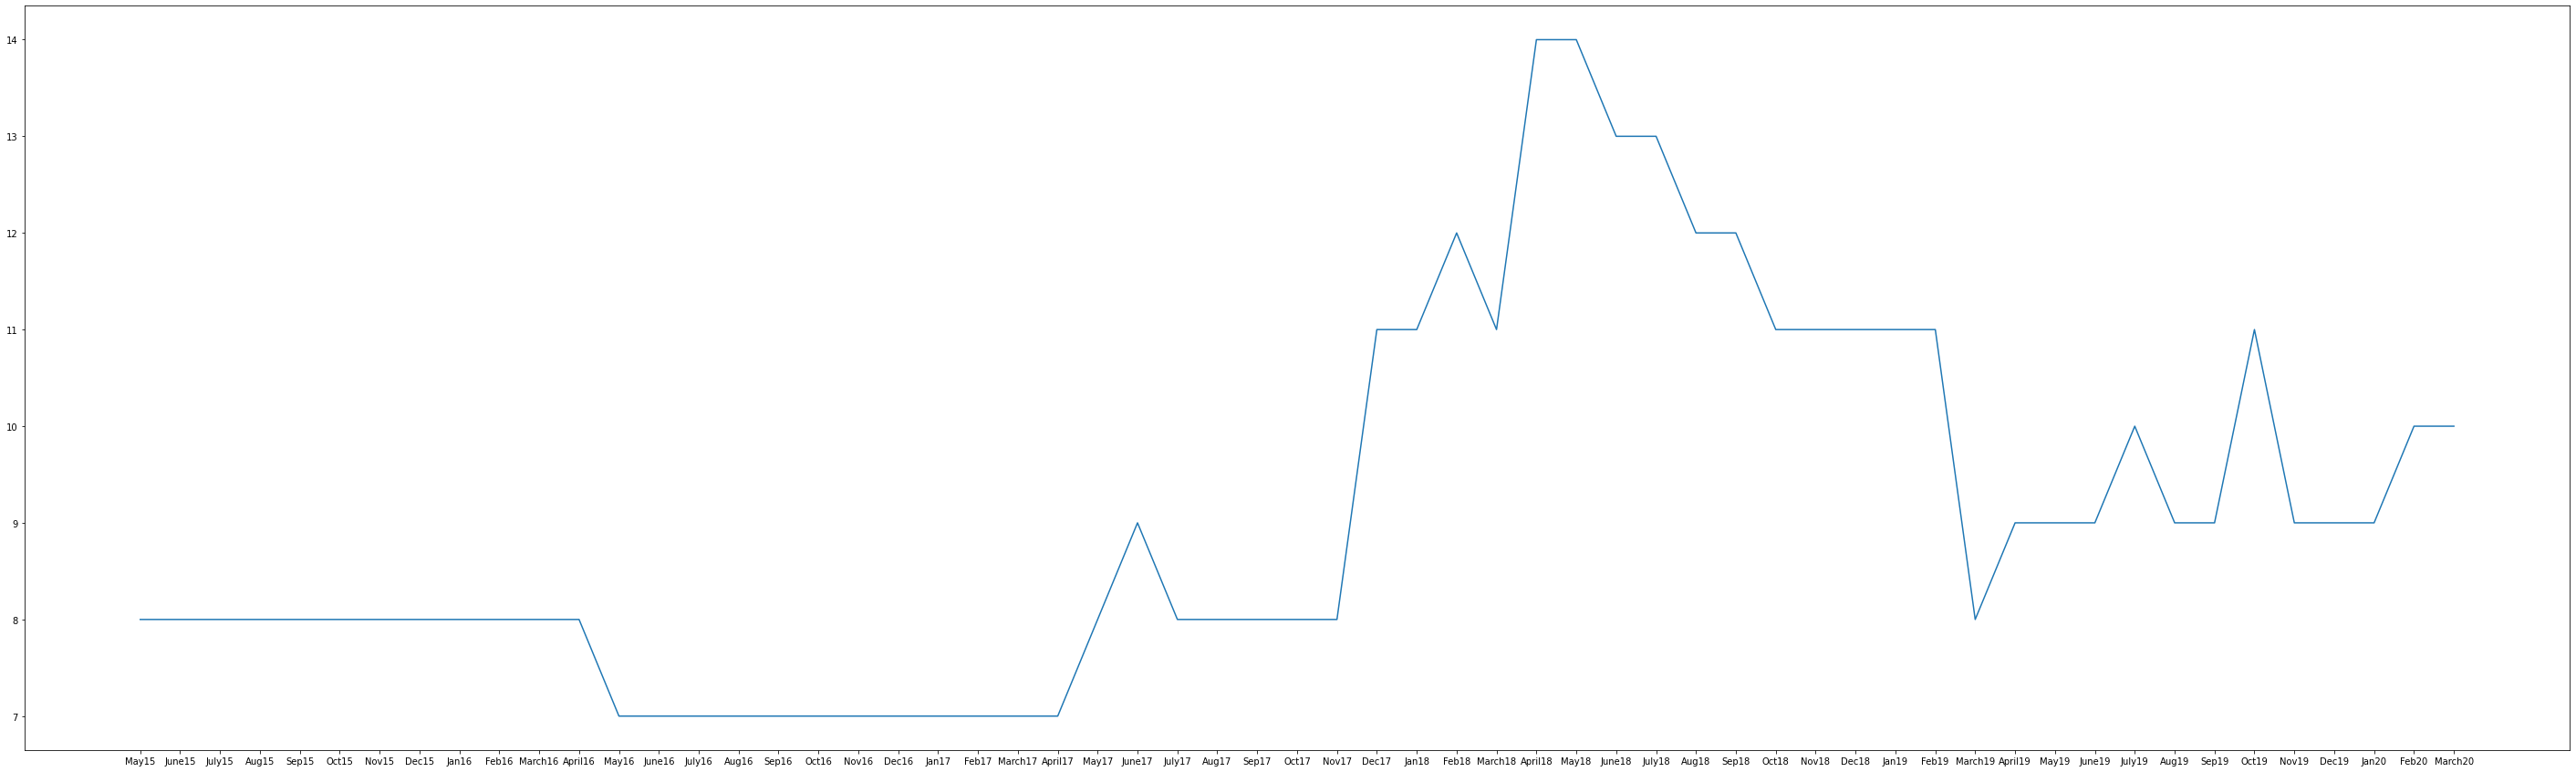


INDORE
Increase in edges: 2


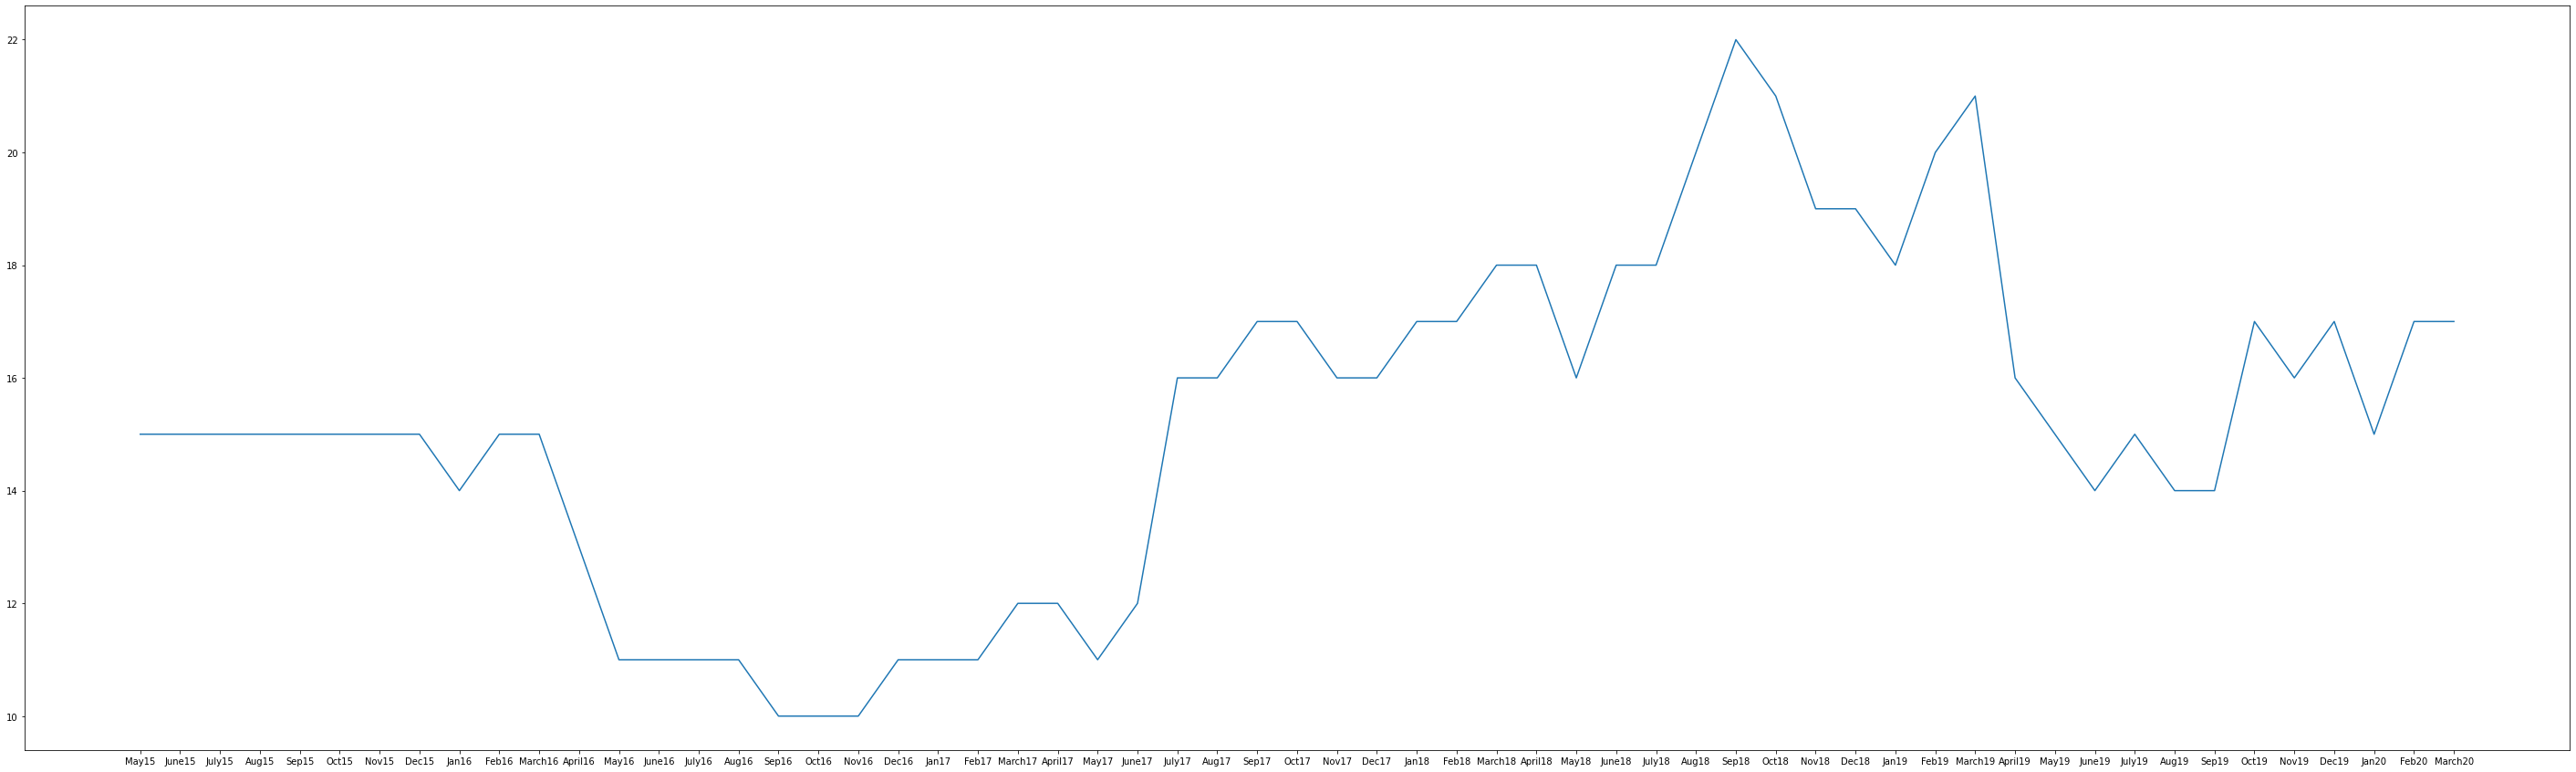


JAIPUR
Increase in edges: 11


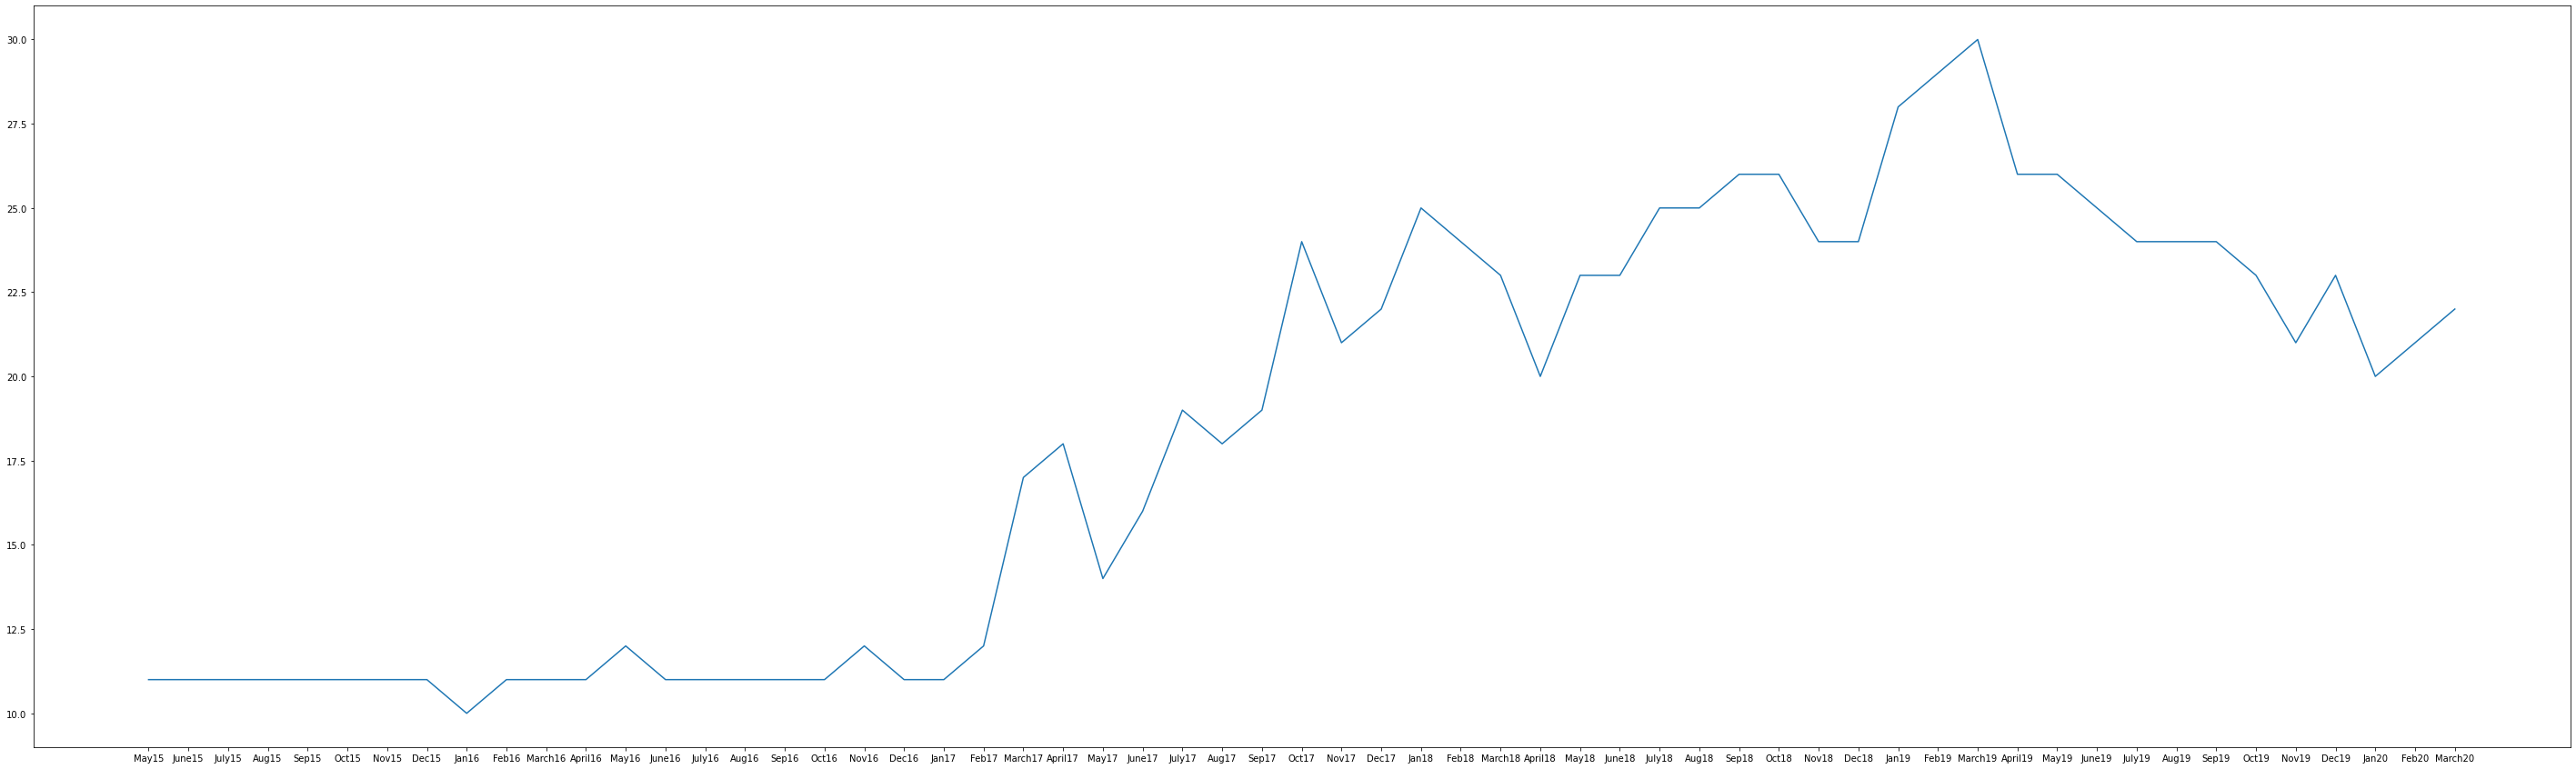


KOLKATA
Increase in edges: 12


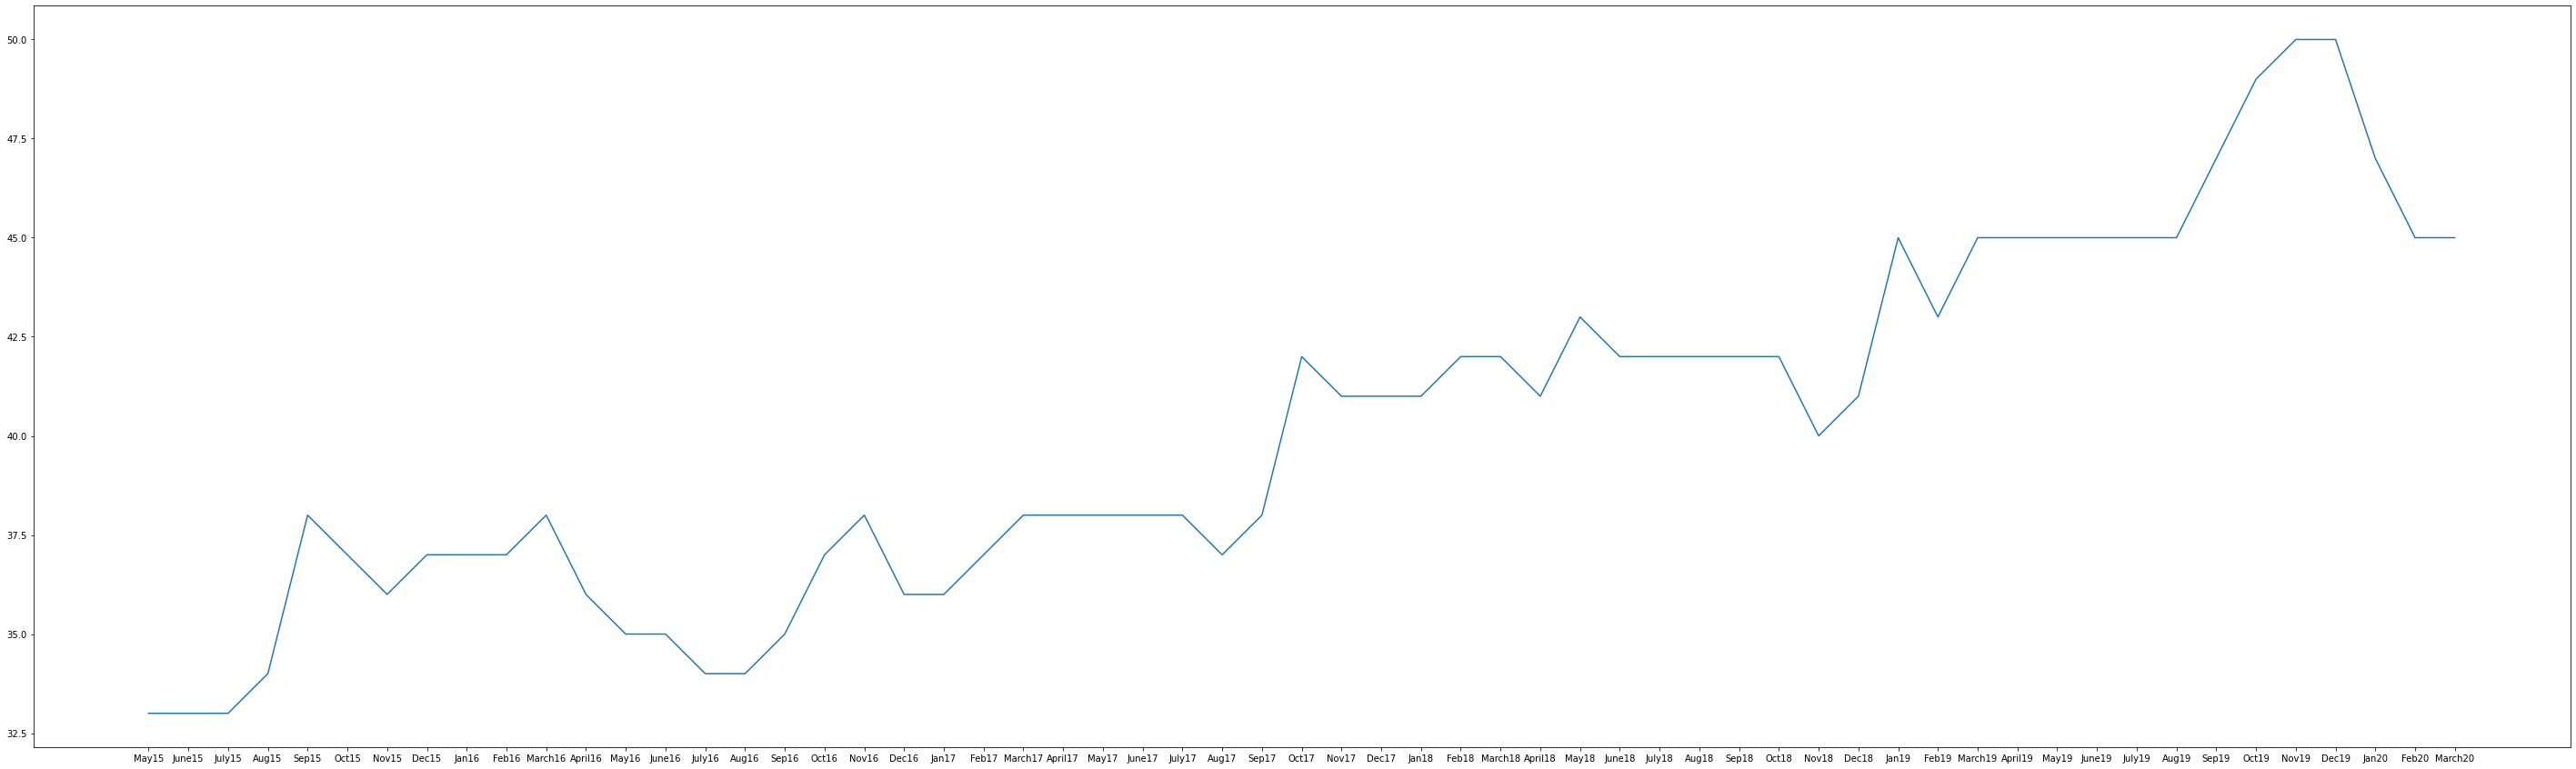


LUCKNOW
Increase in edges: 8


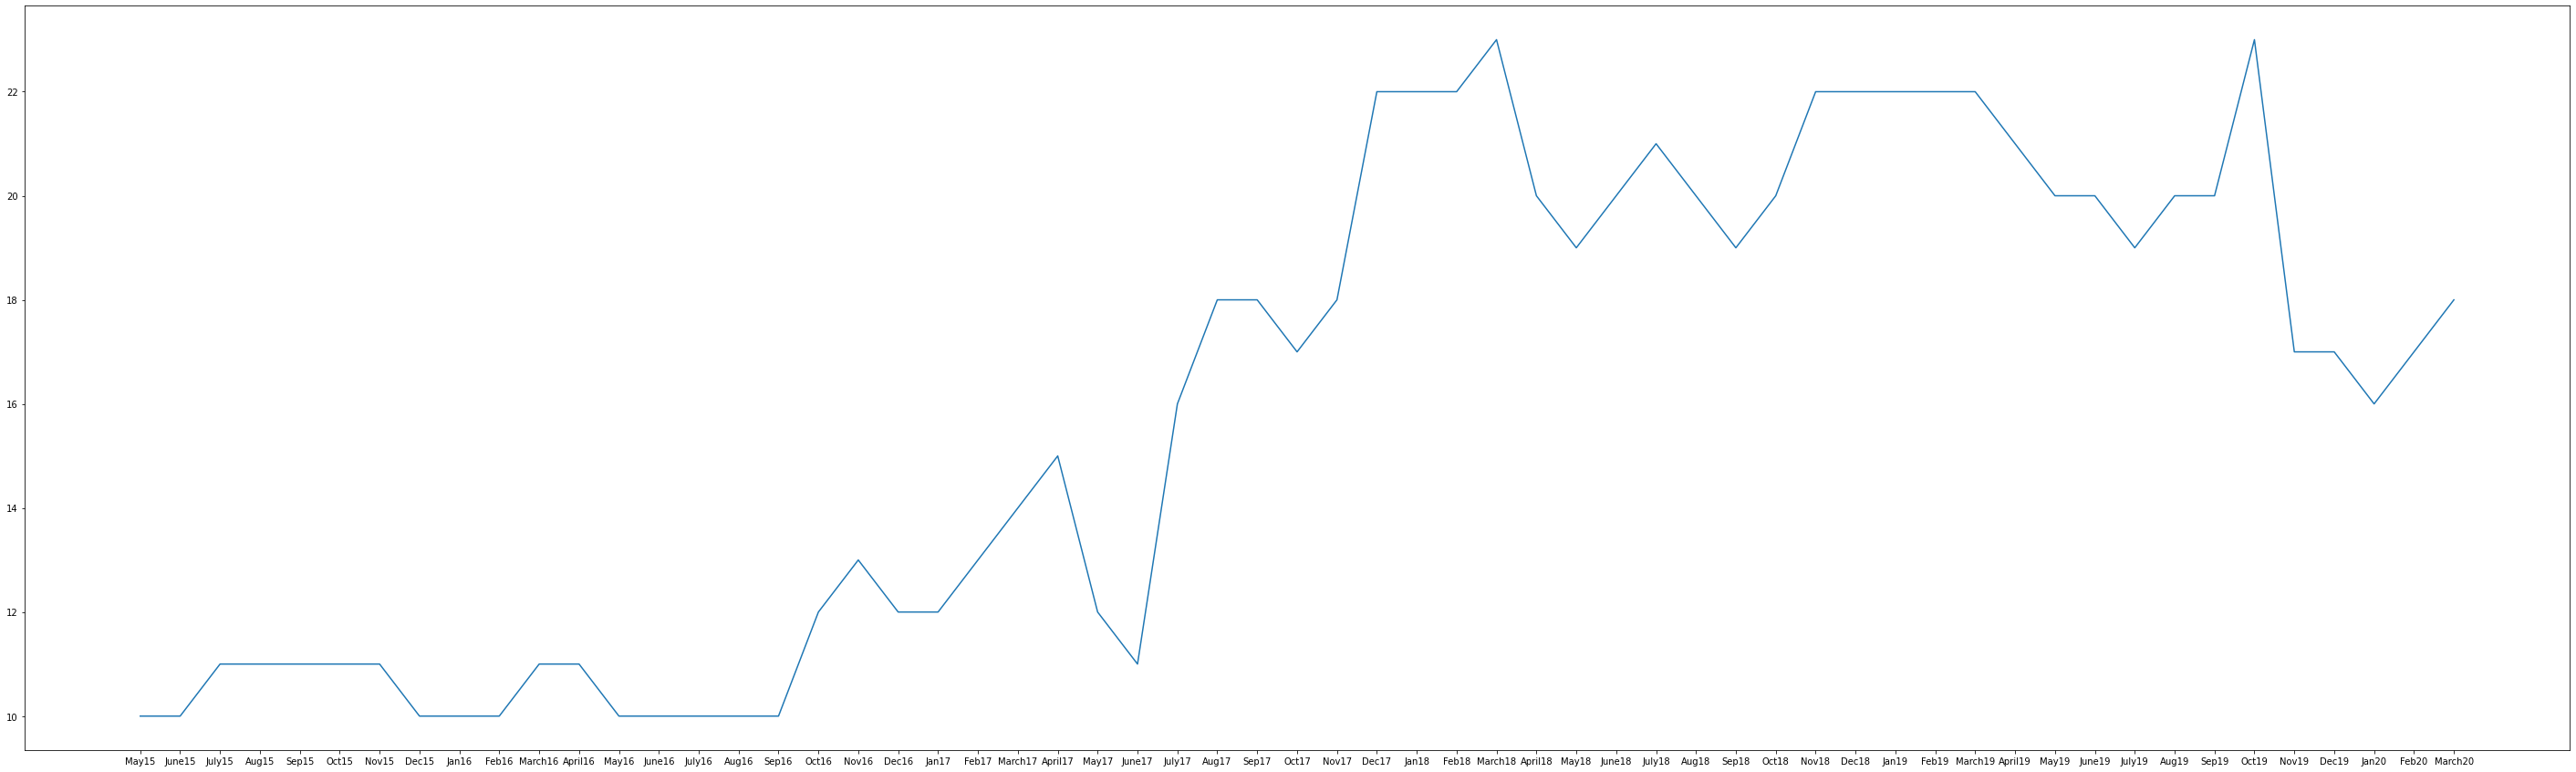


MUMBAI
Increase in edges: 15


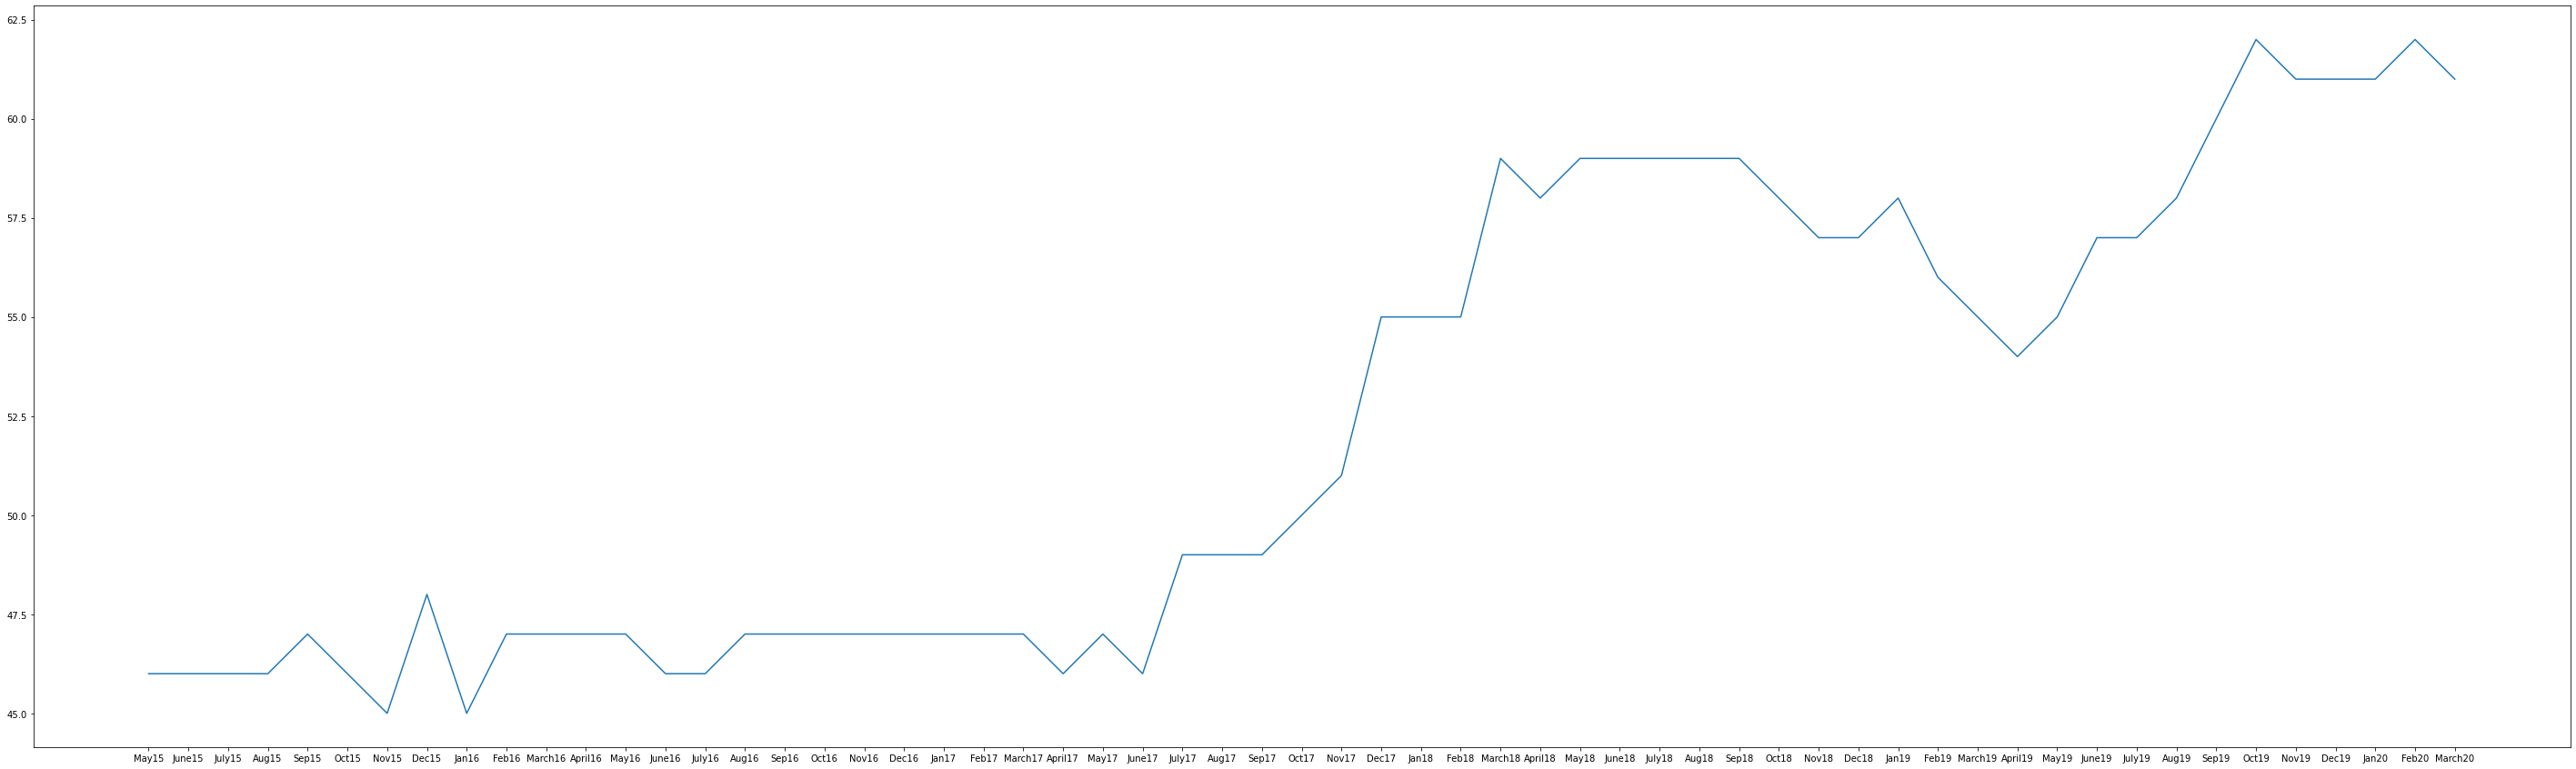


NAGPUR
Increase in edges: 4


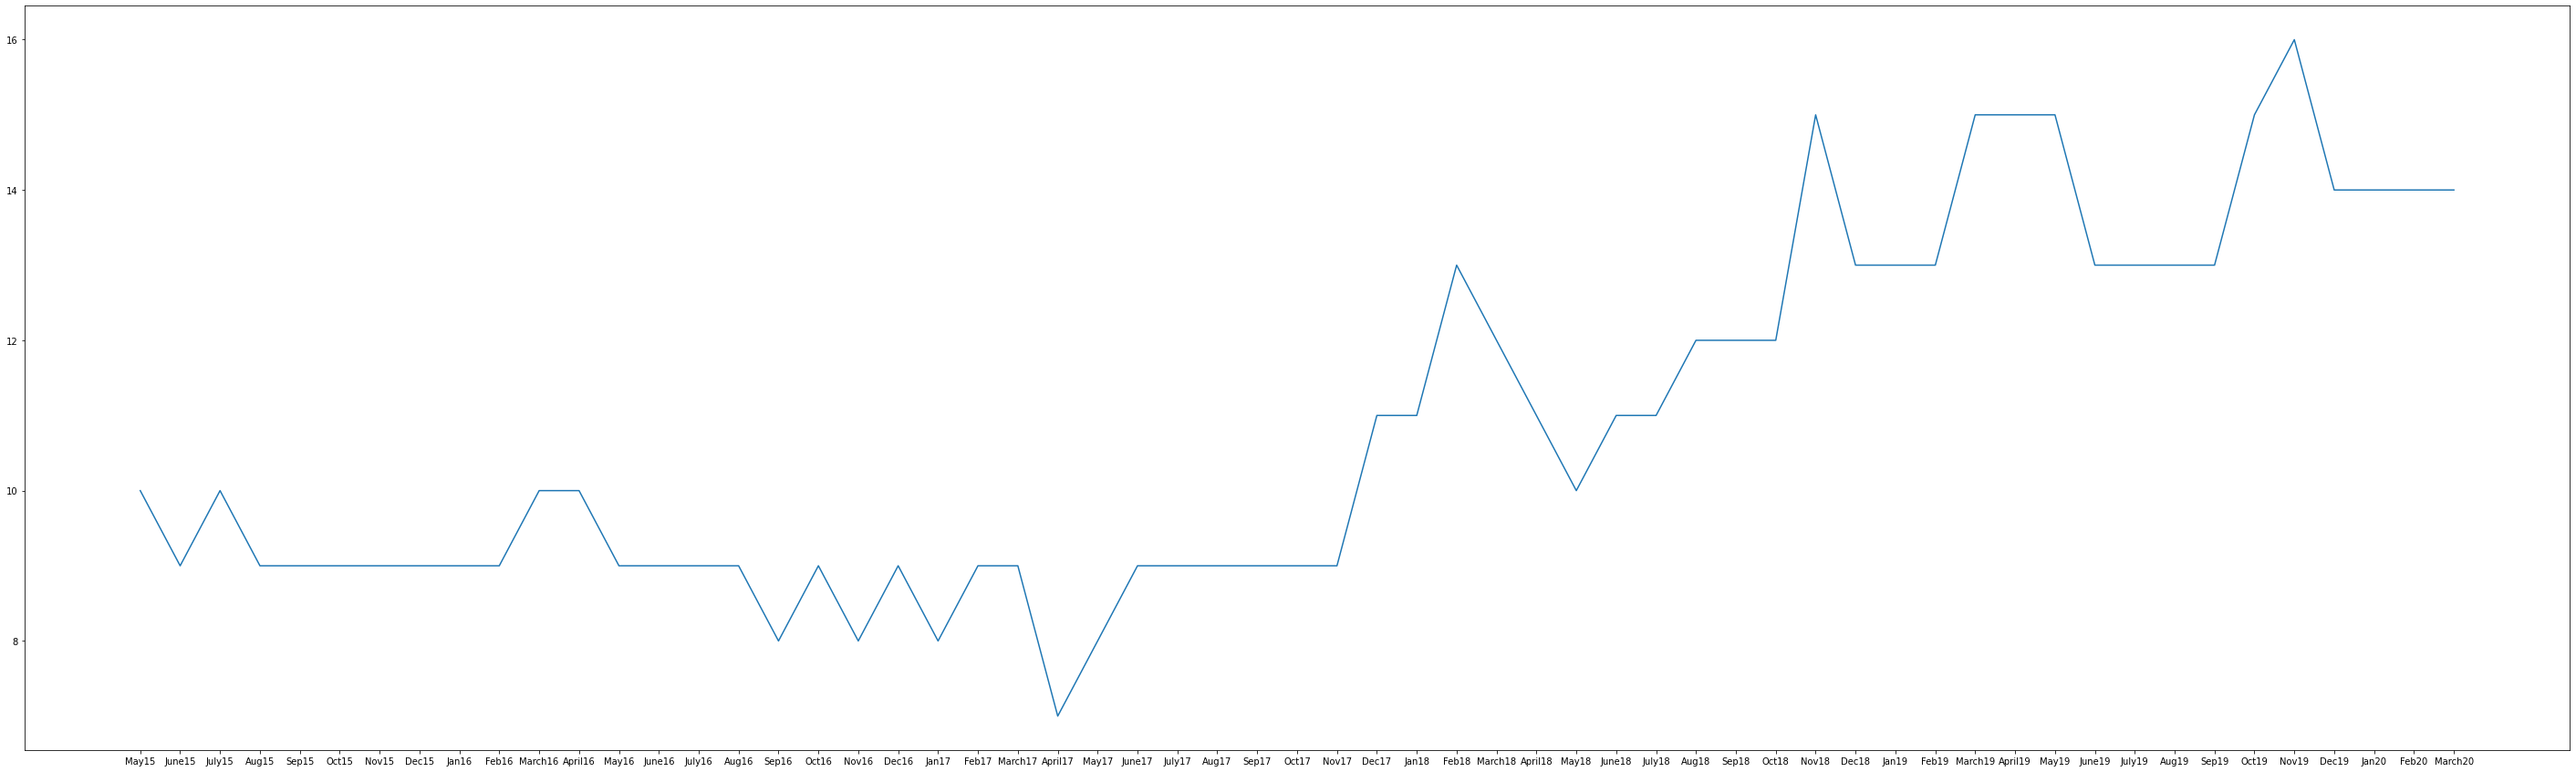


PUNE
Increase in edges: 10


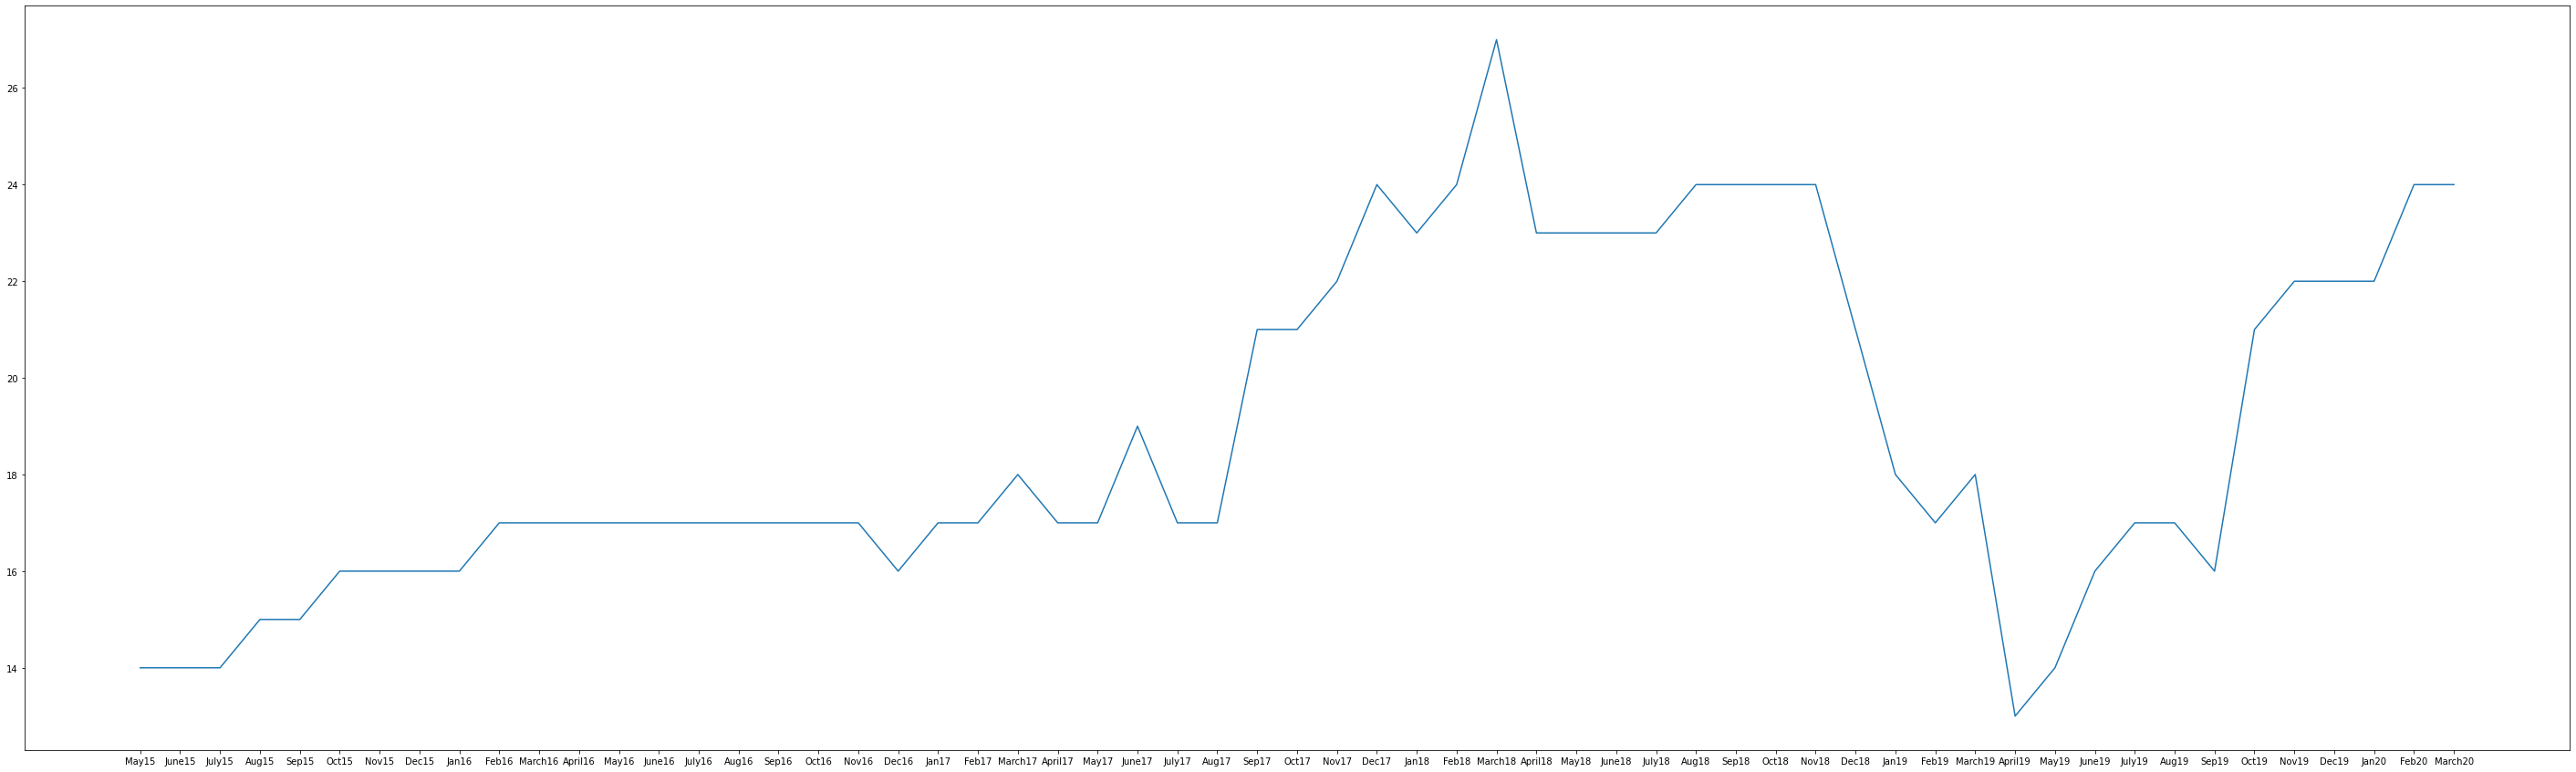


AIZAWL
Increase in edges: 1


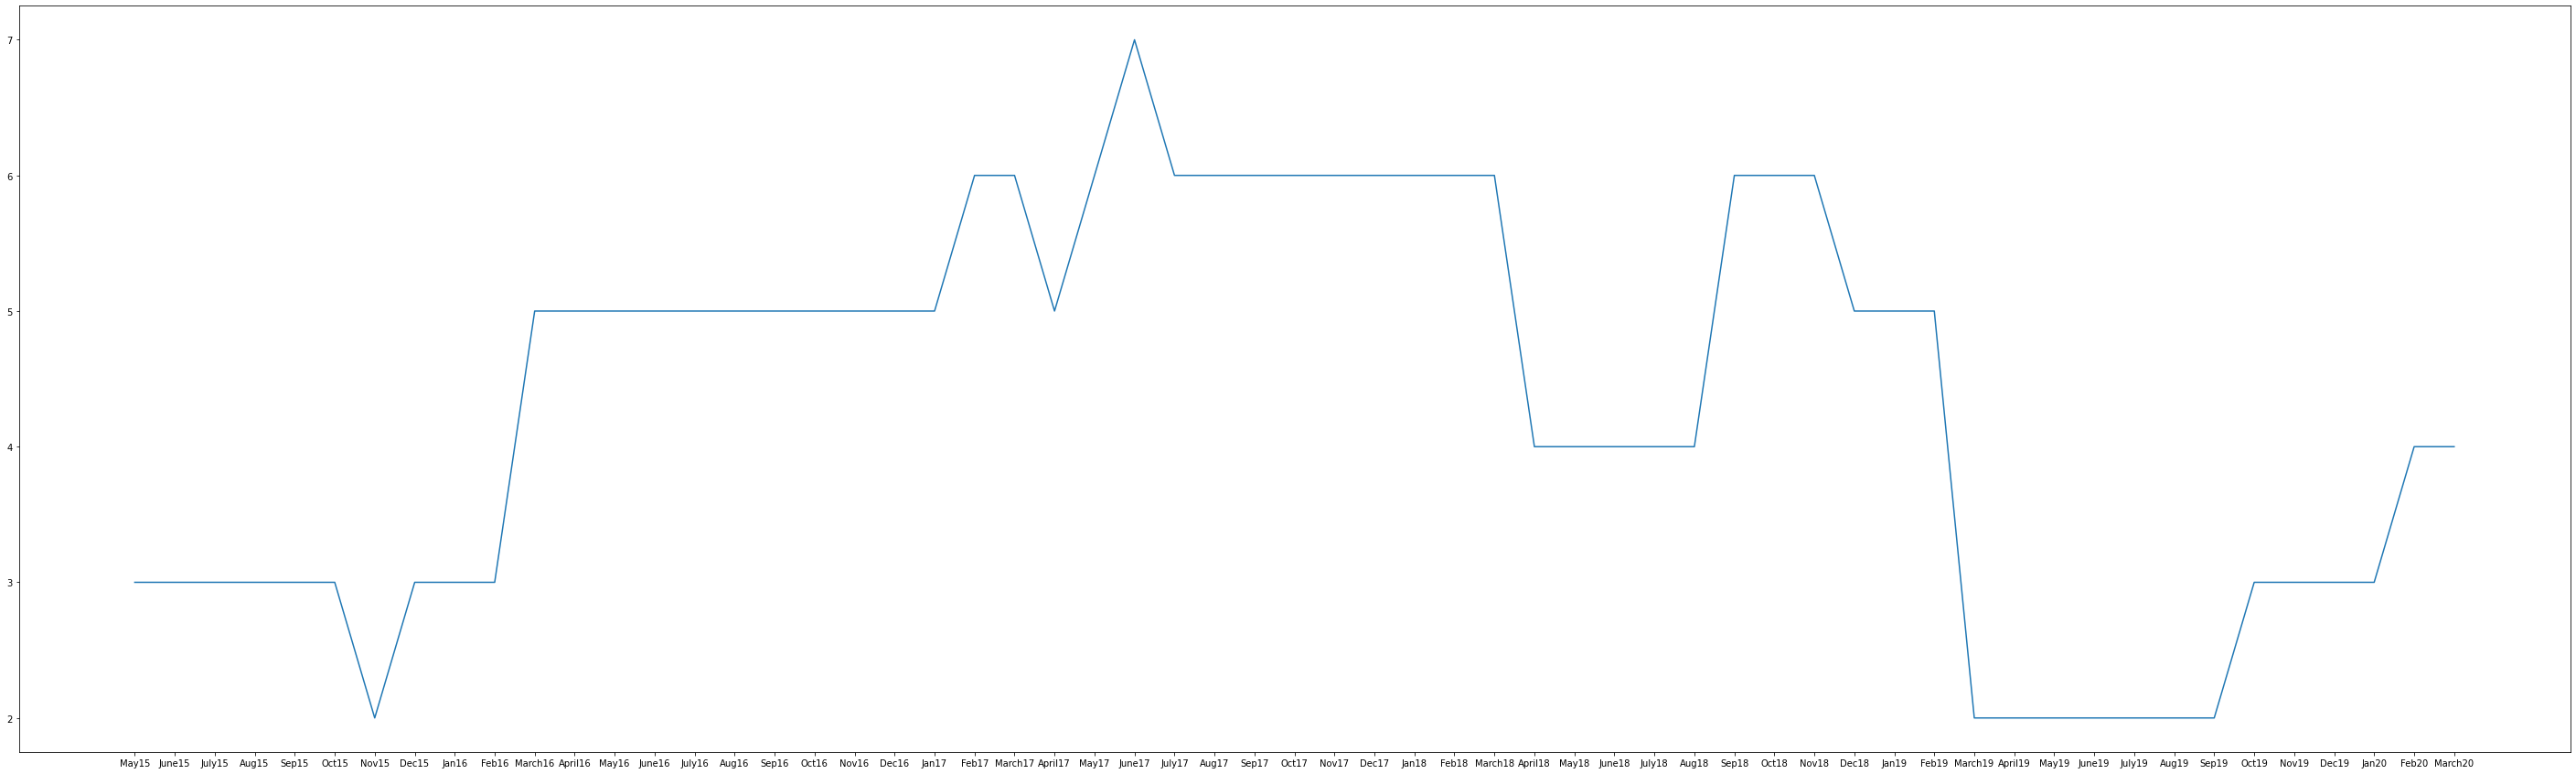


AMRITSAR
Increase in edges: 10


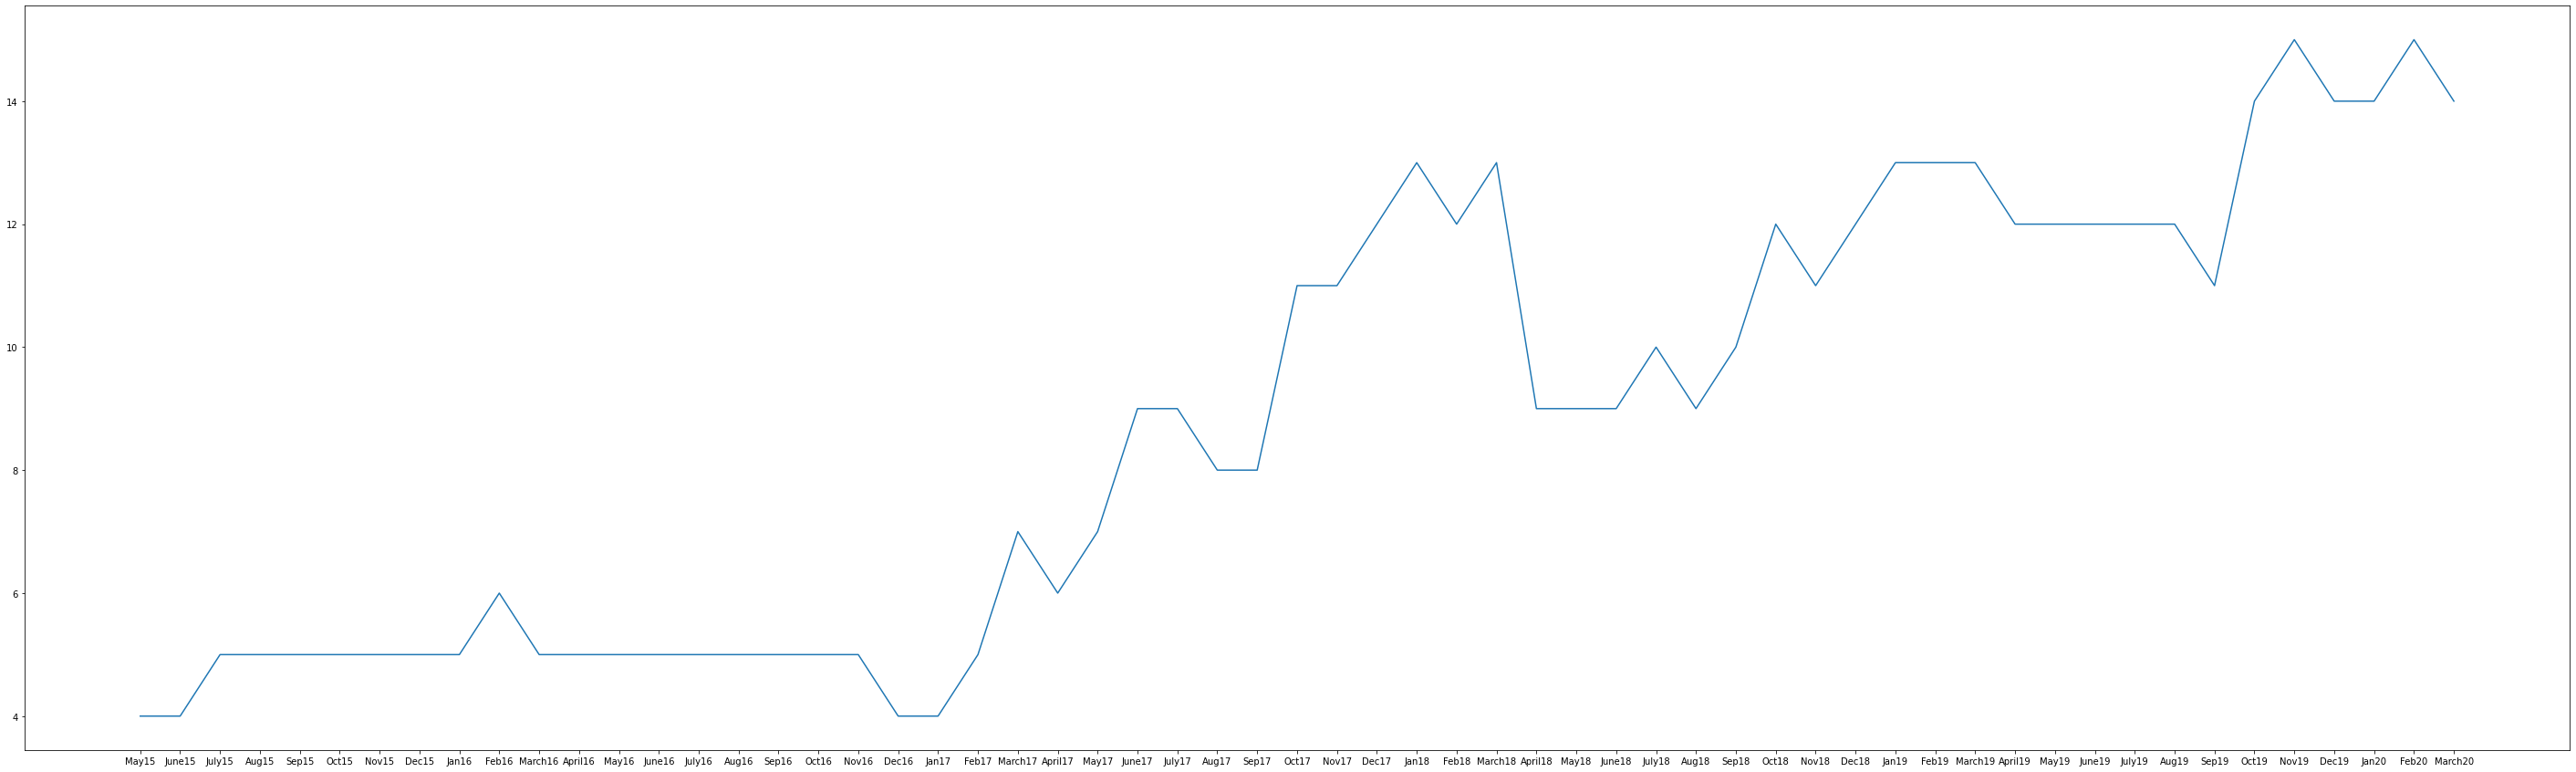


SRINAGAR
Increase in edges: 2


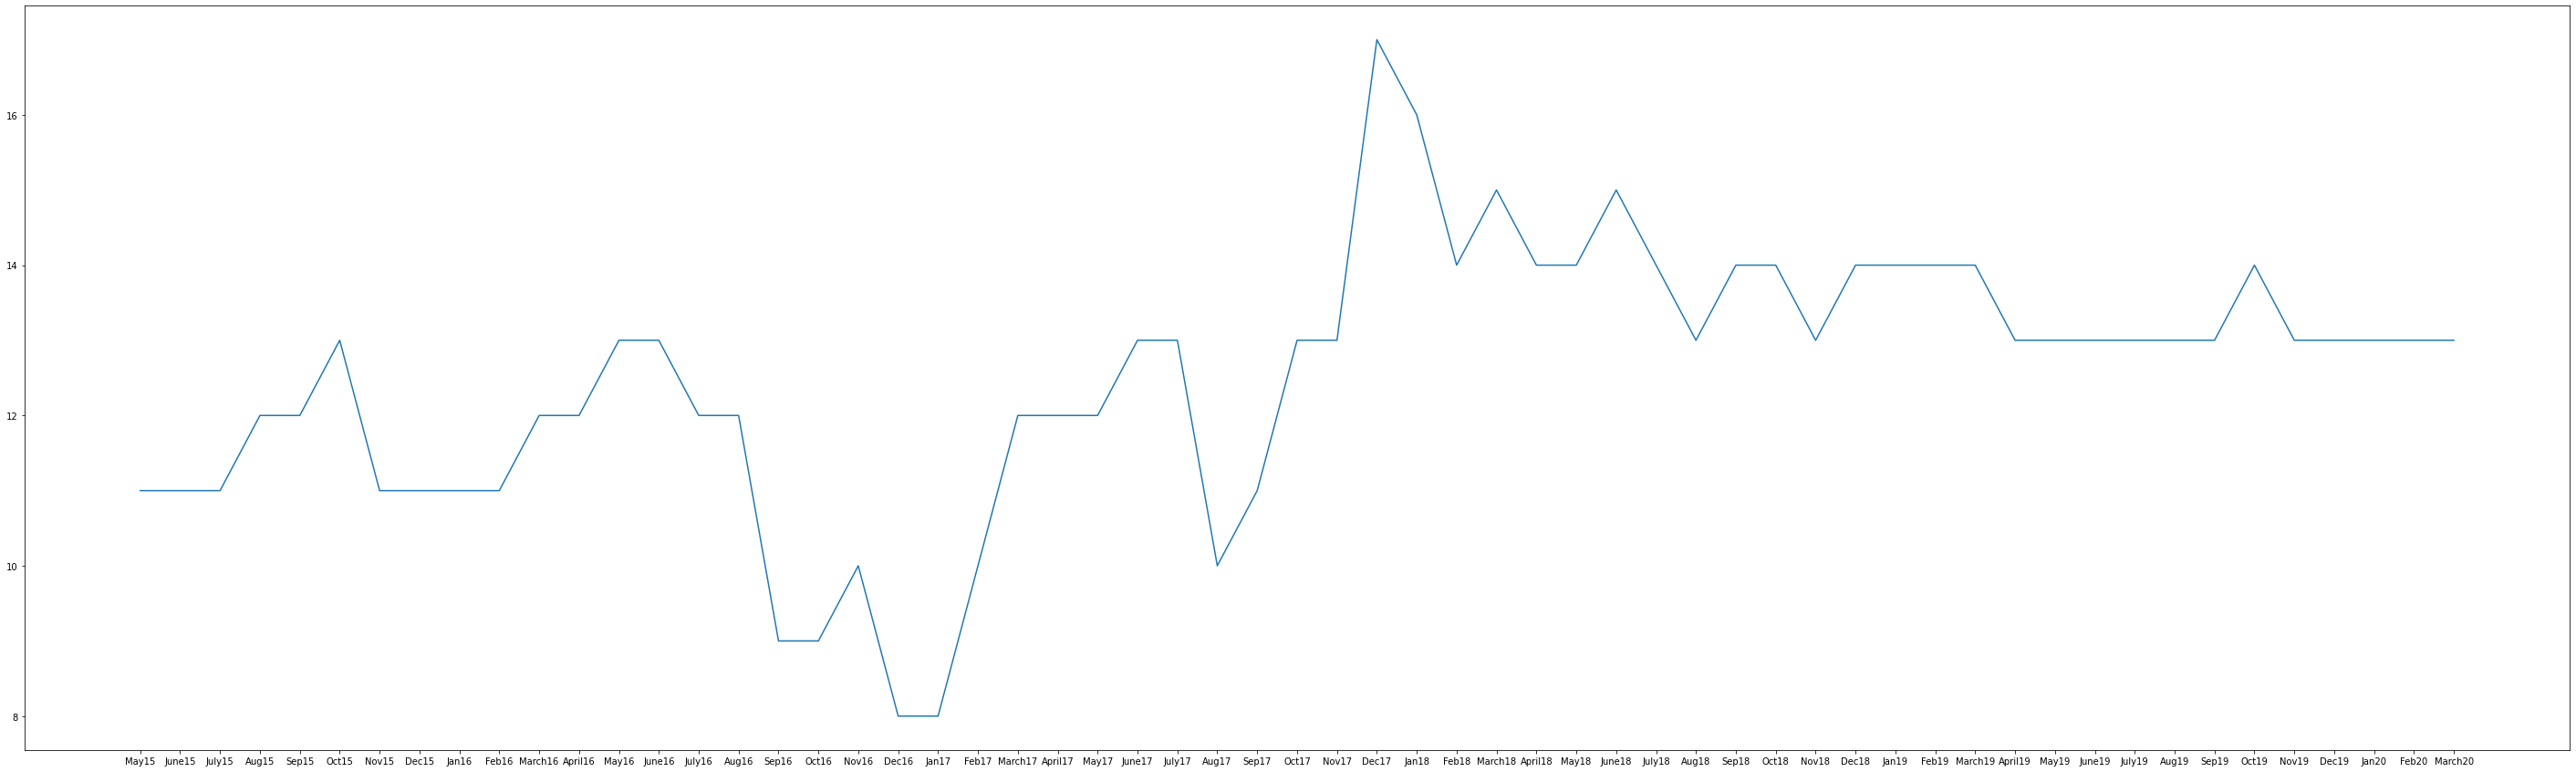


BAGDOGRA
Increase in edges: 9


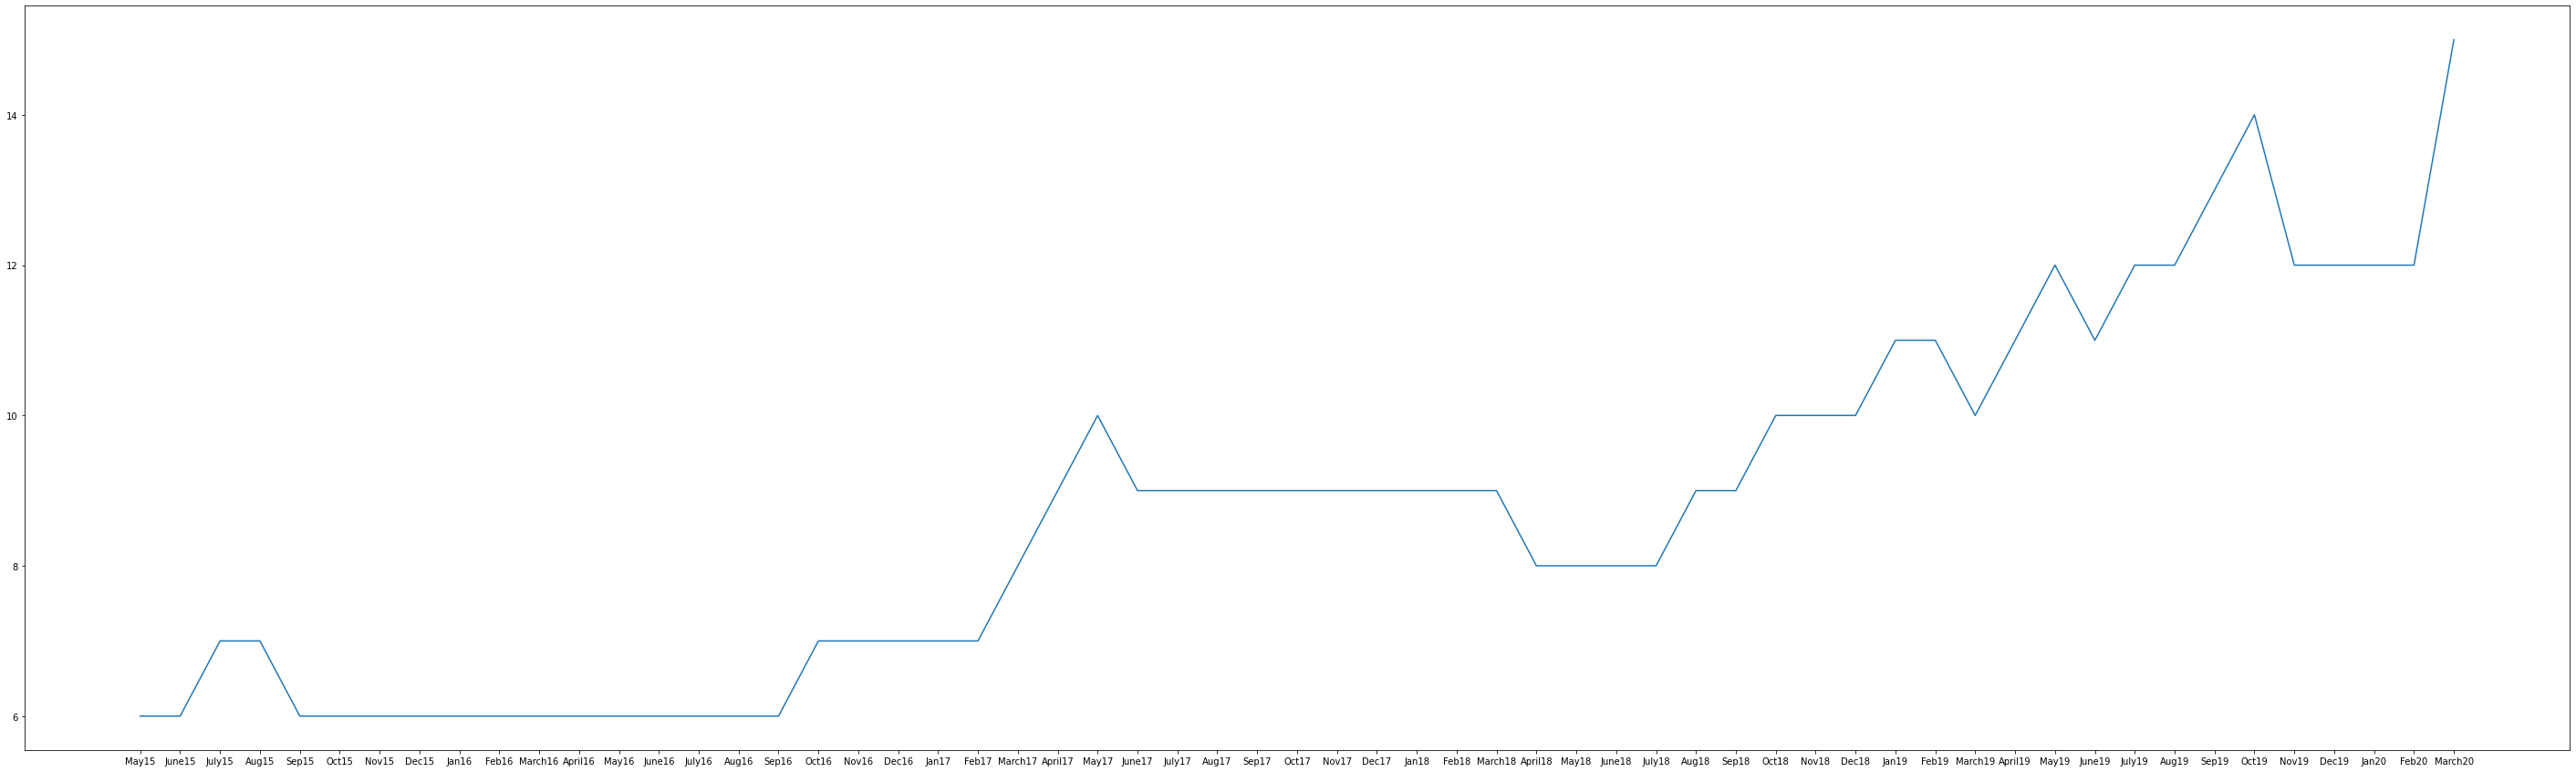


BELGAUM
Increase in edges: 8


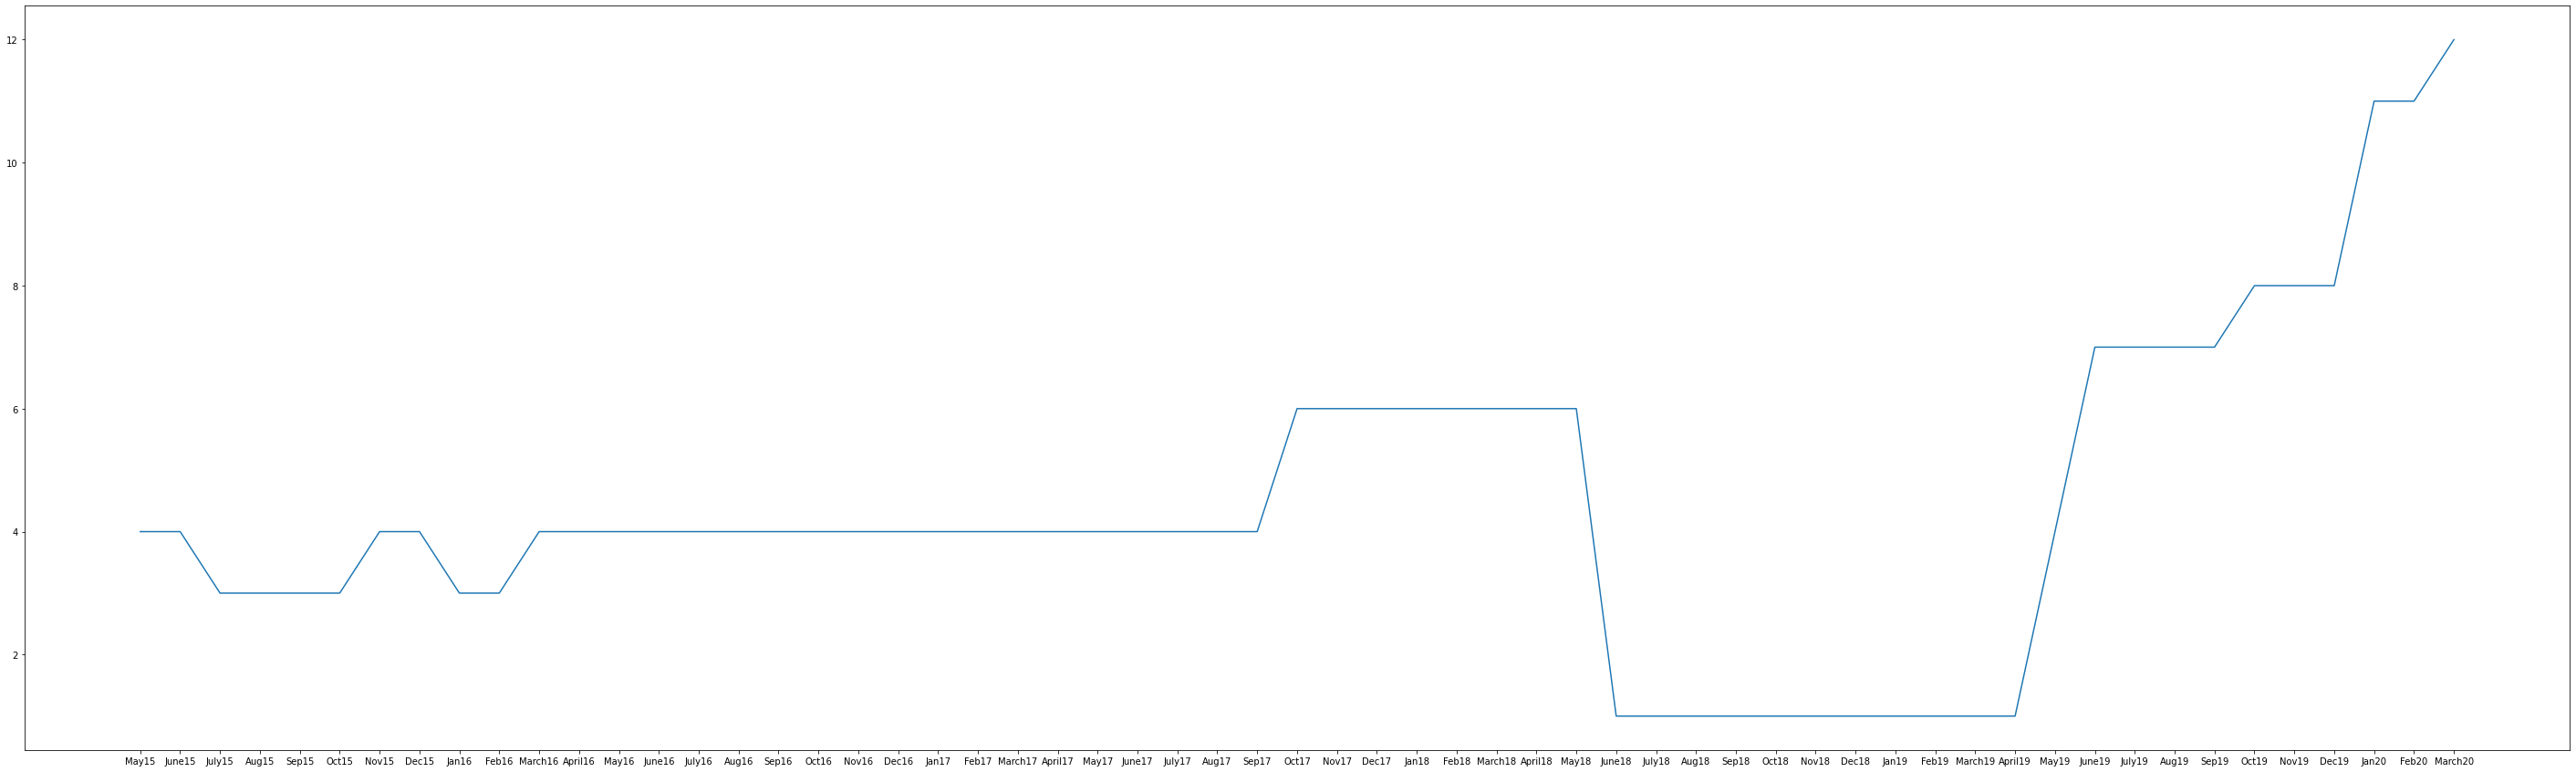


JABALPUR
Increase in edges: 2


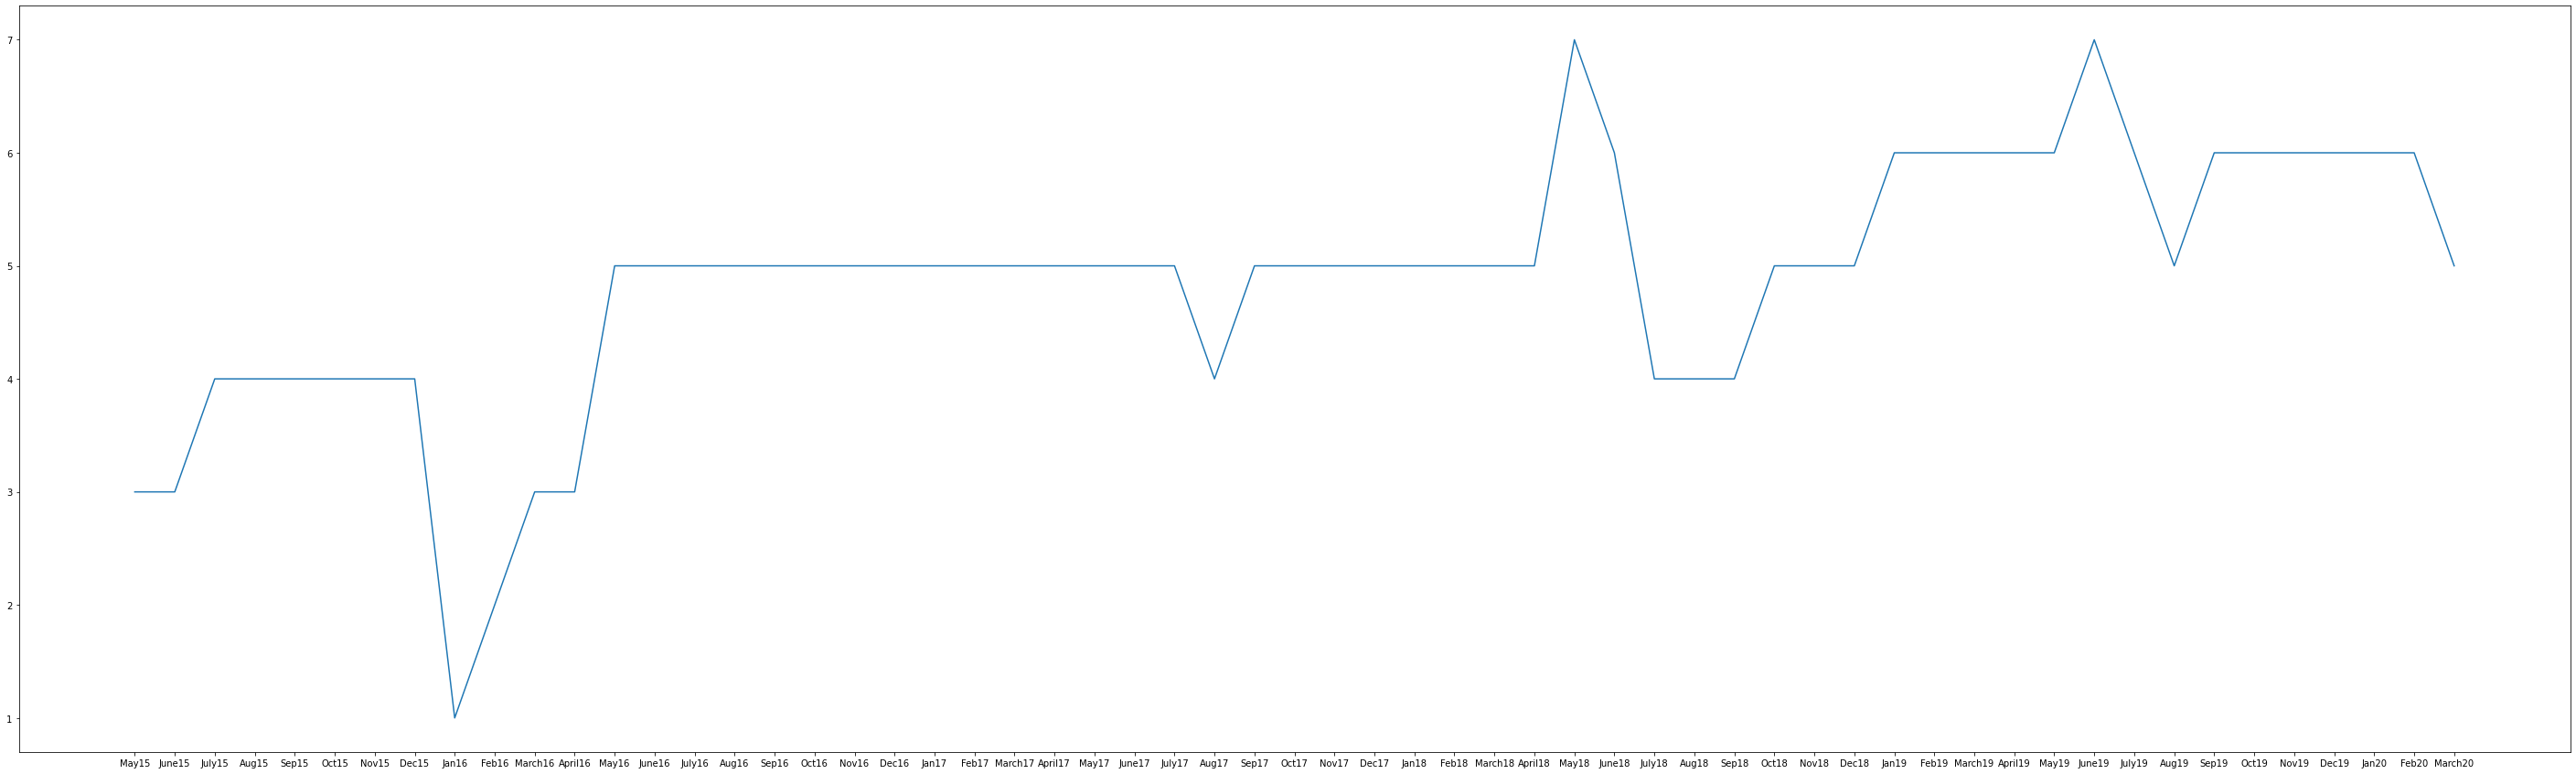


AGARTALA
Increase in edges: 5


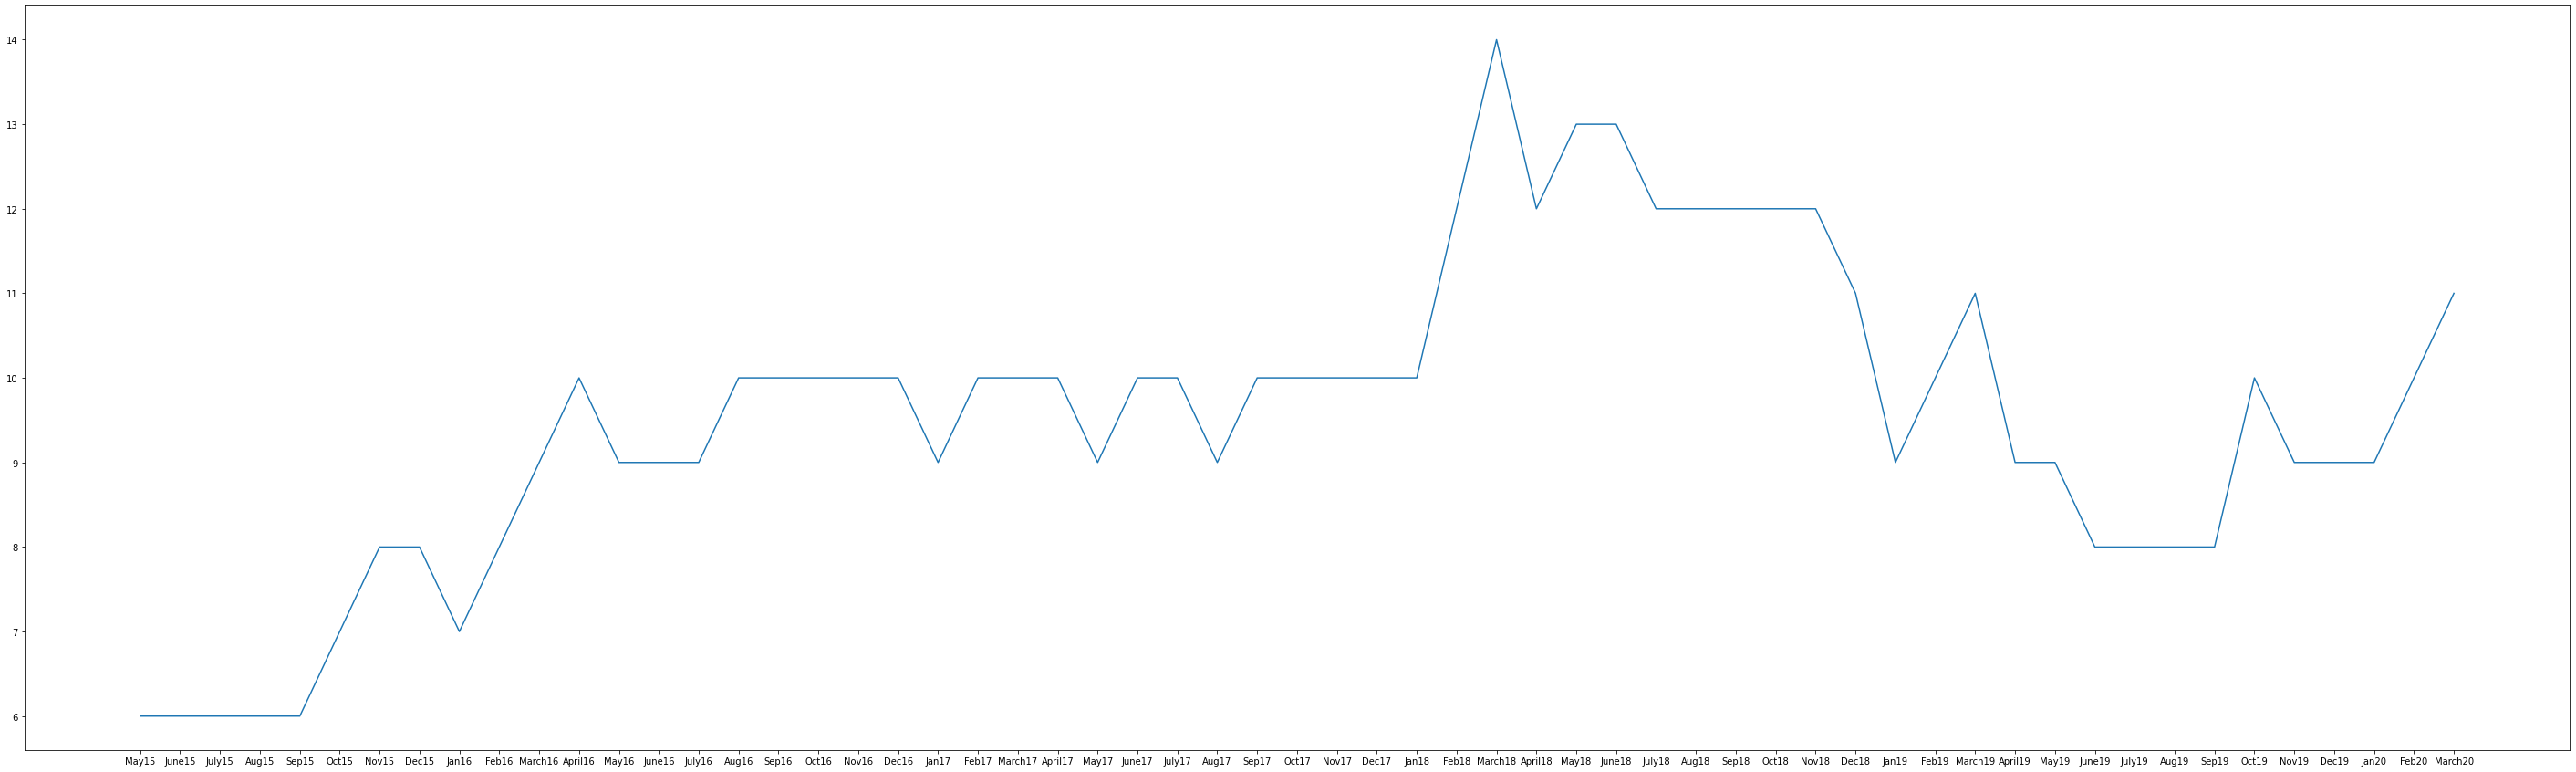


CHANDIGARH
Increase in edges: 15


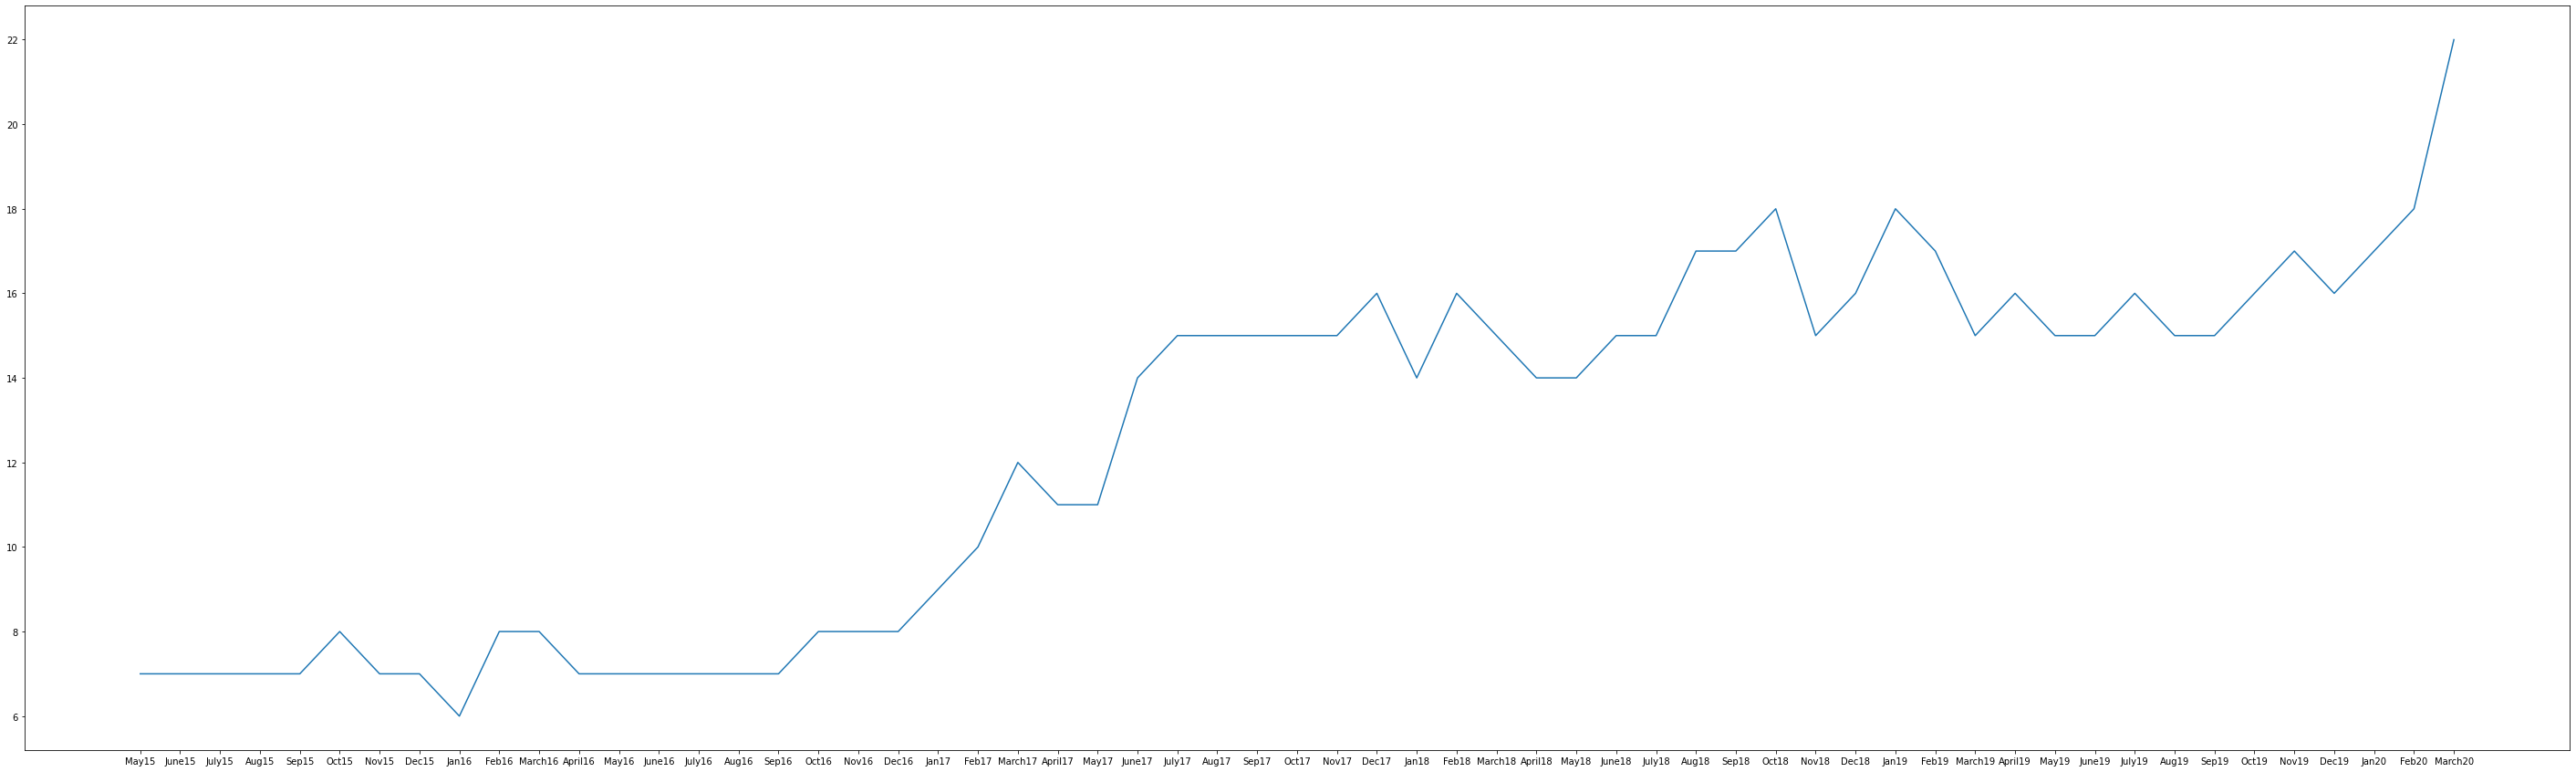


DEHRA DUN
Increase in edges: 9


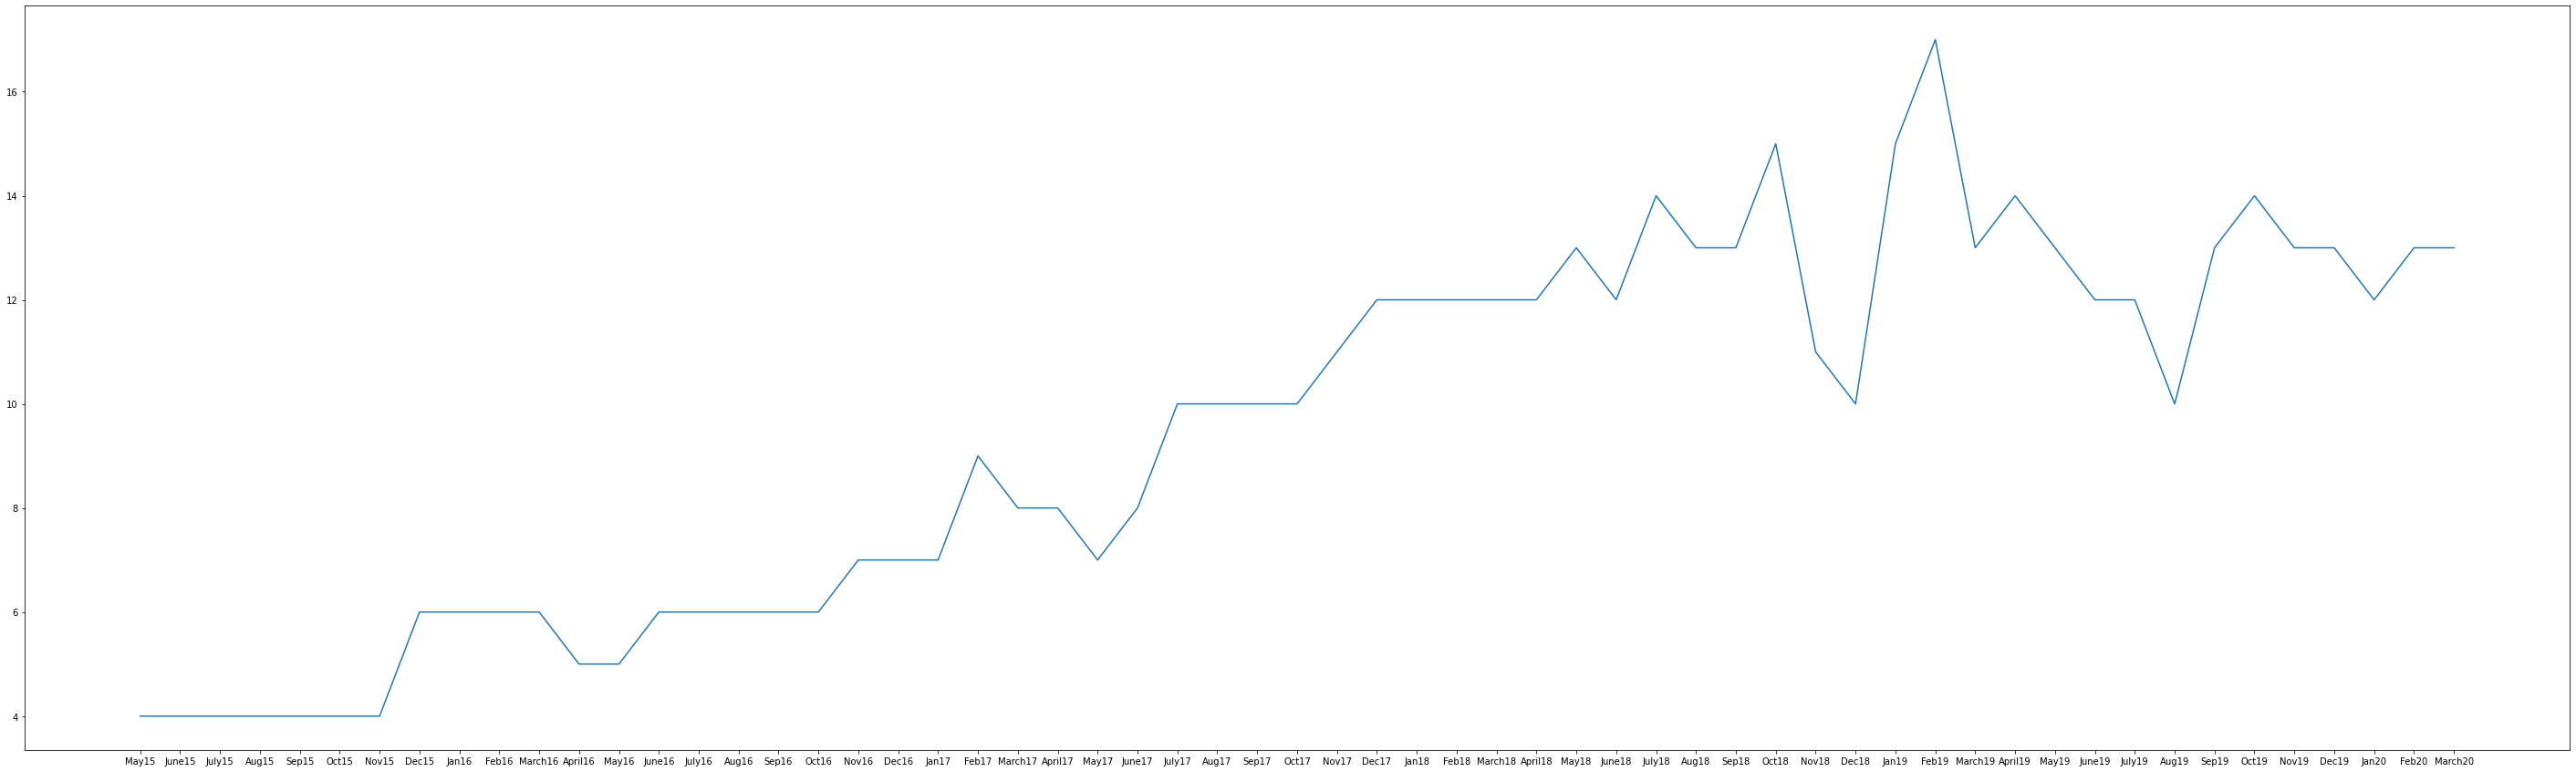


HUBLI
Increase in edges: 9


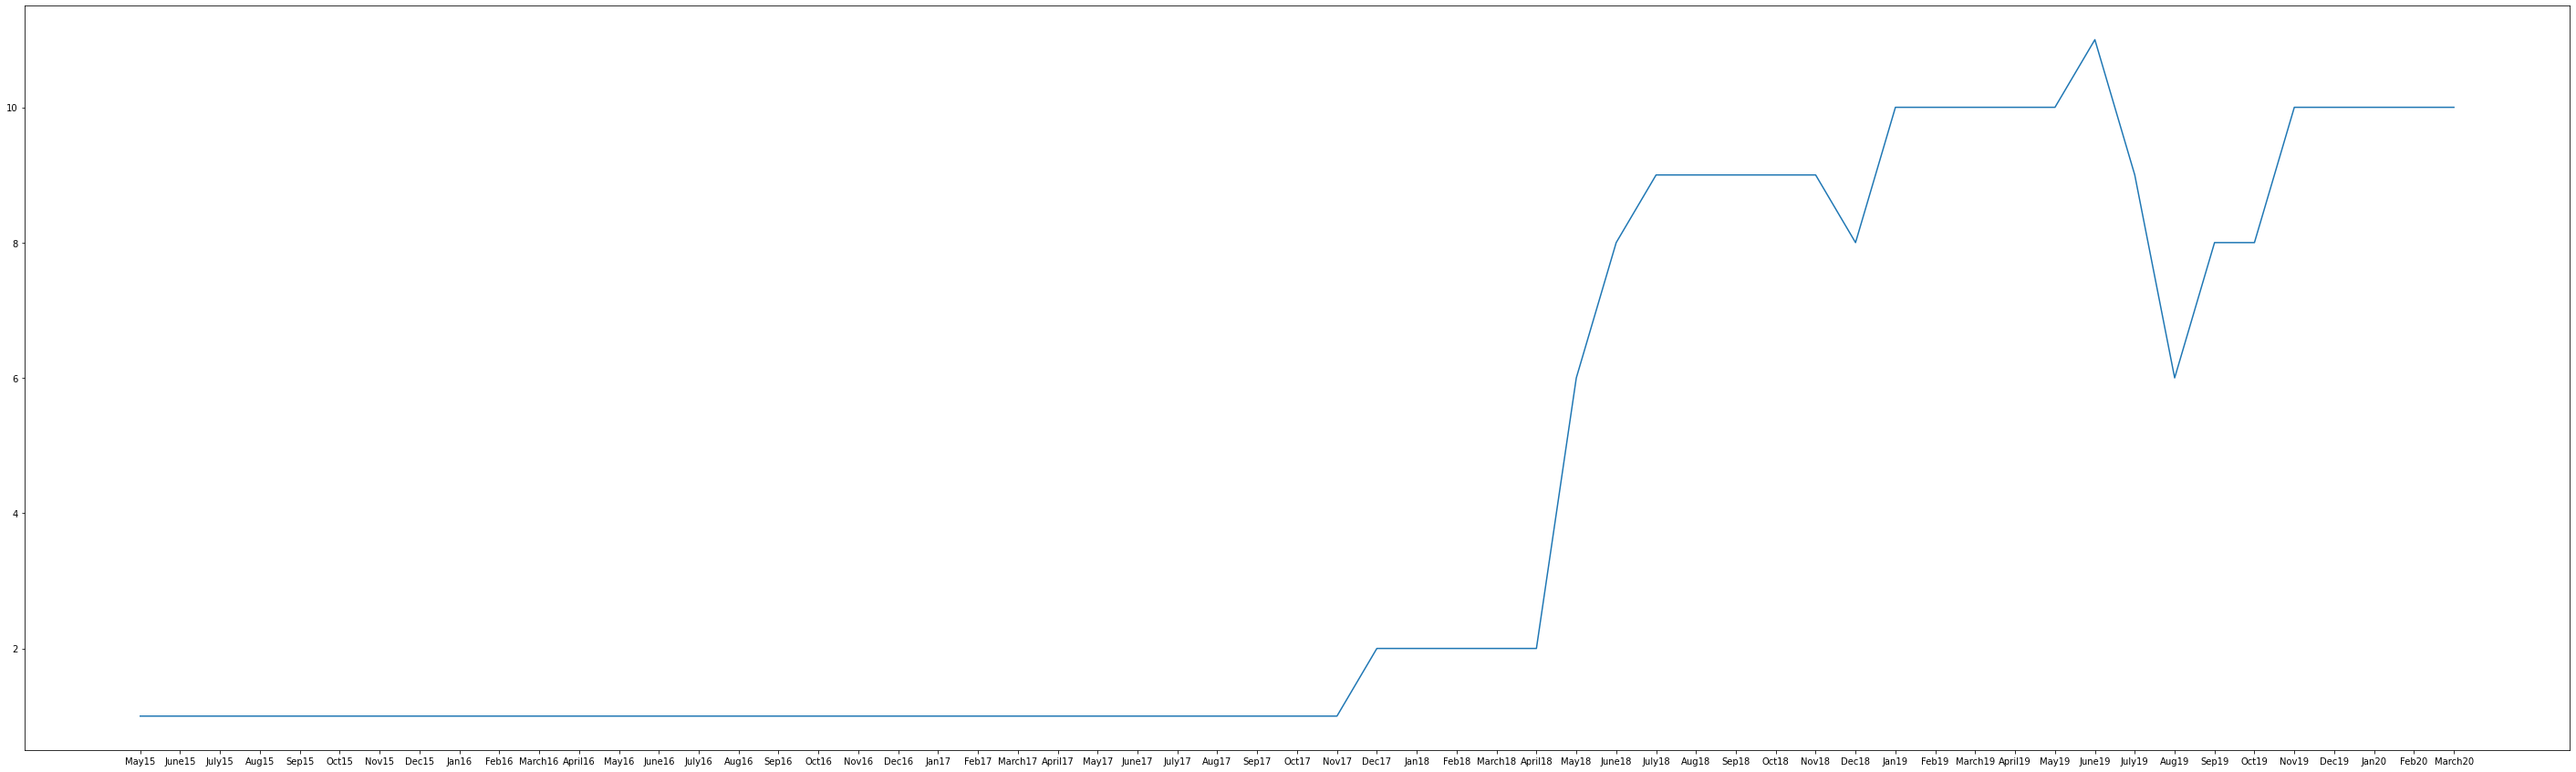


JODHPUR
Increase in edges: 4


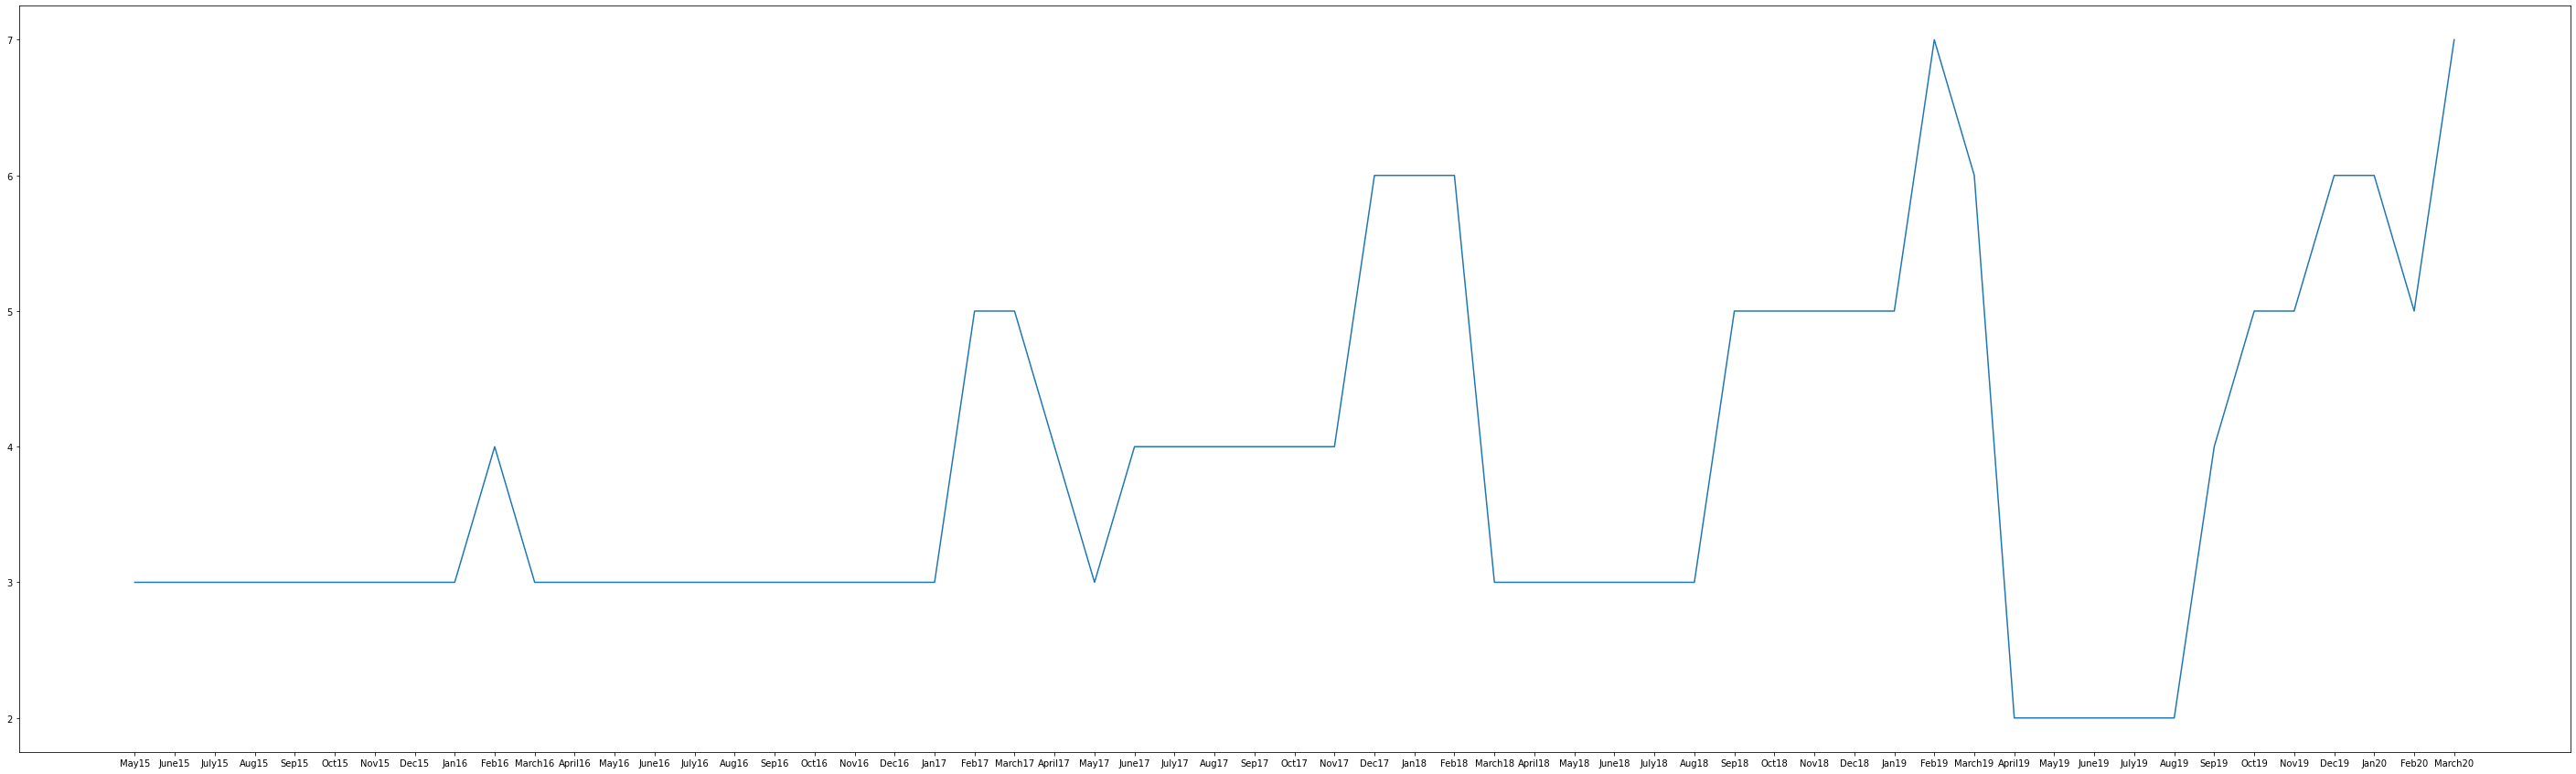


JORHAT
Increase in edges: 0


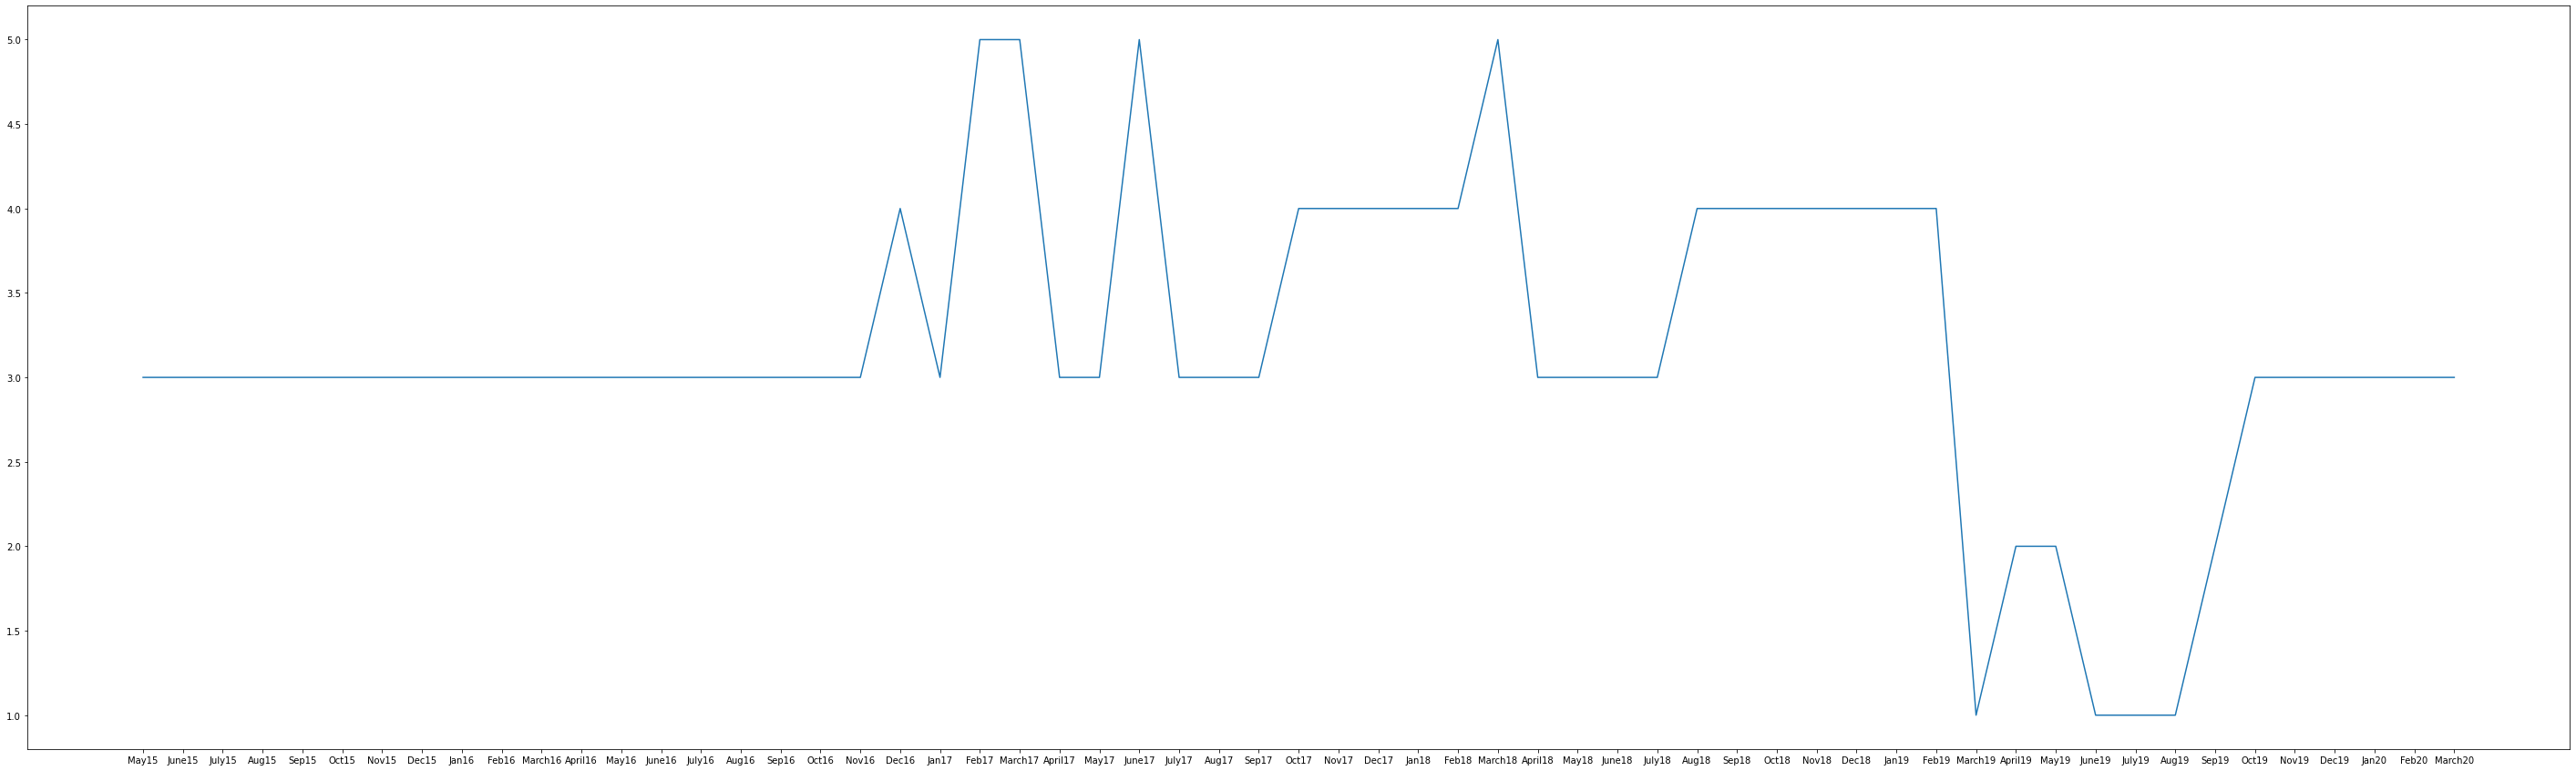


KOZHIKODE
Increase in edges: 2


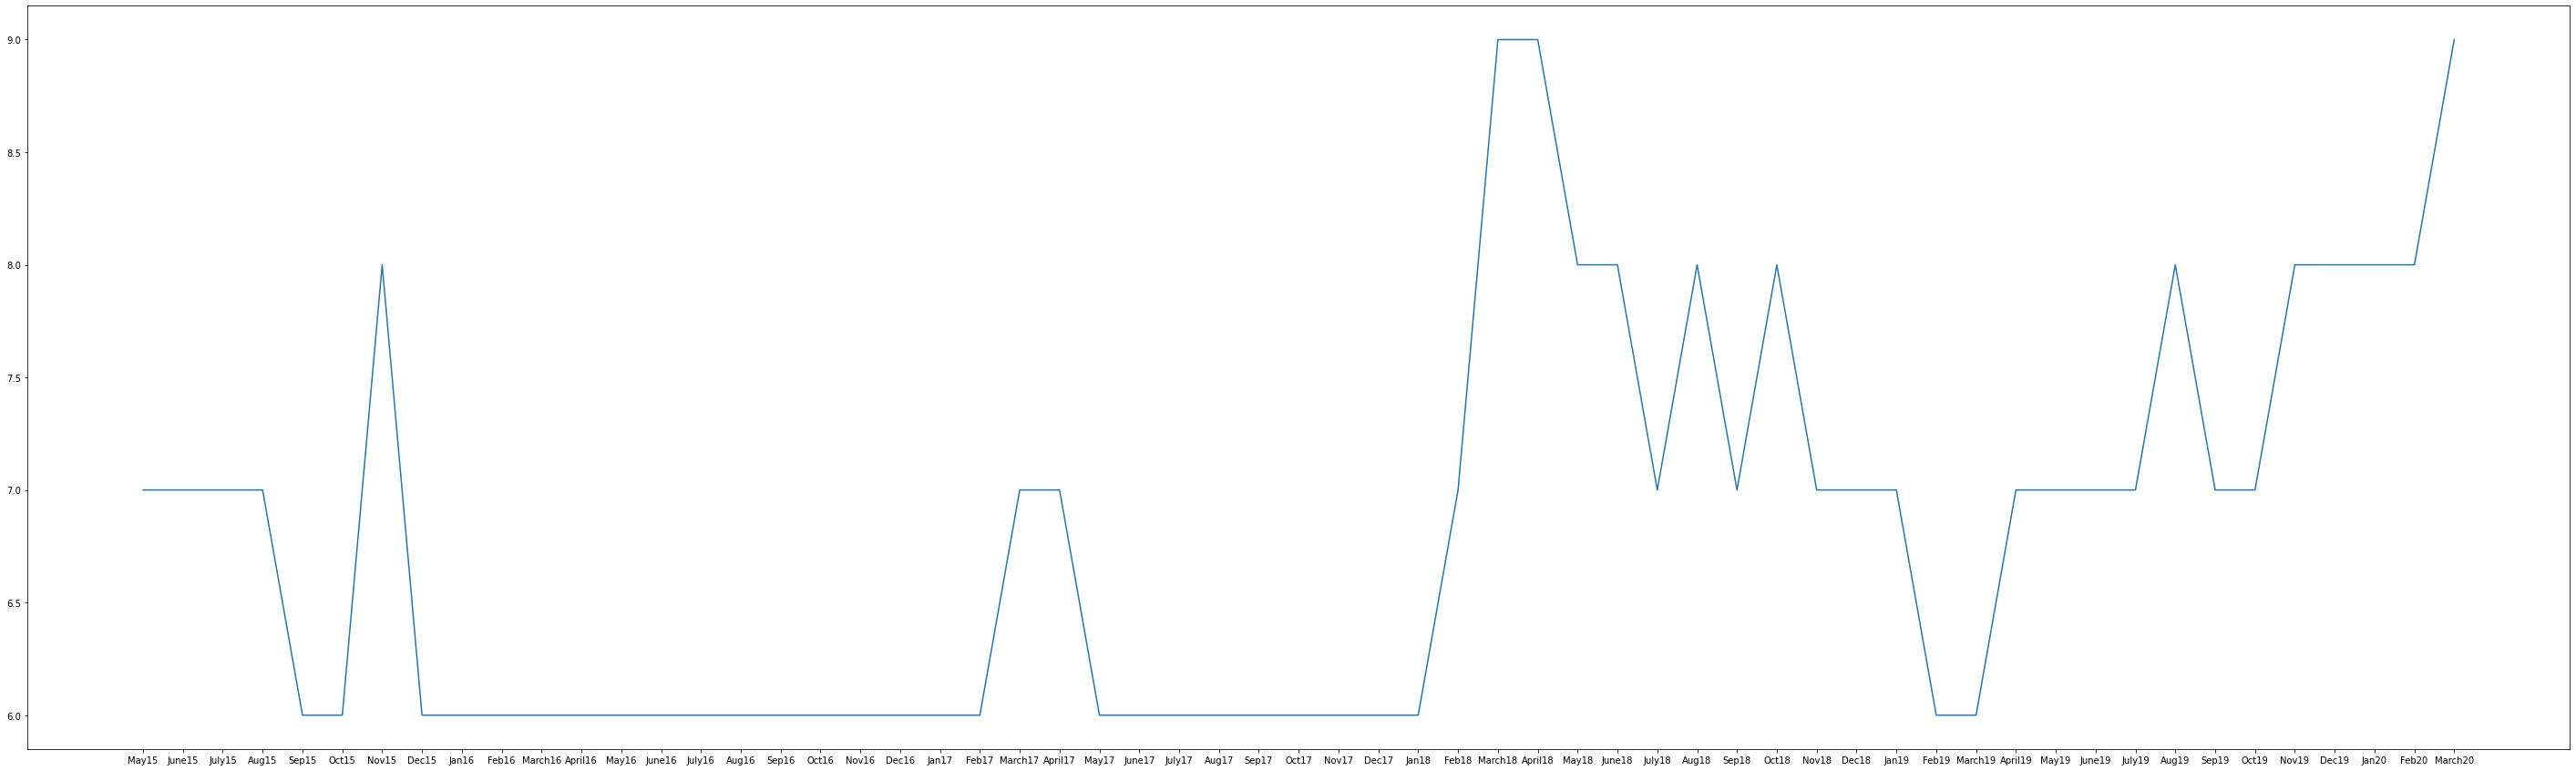


MANGALORE
Increase in edges: 5


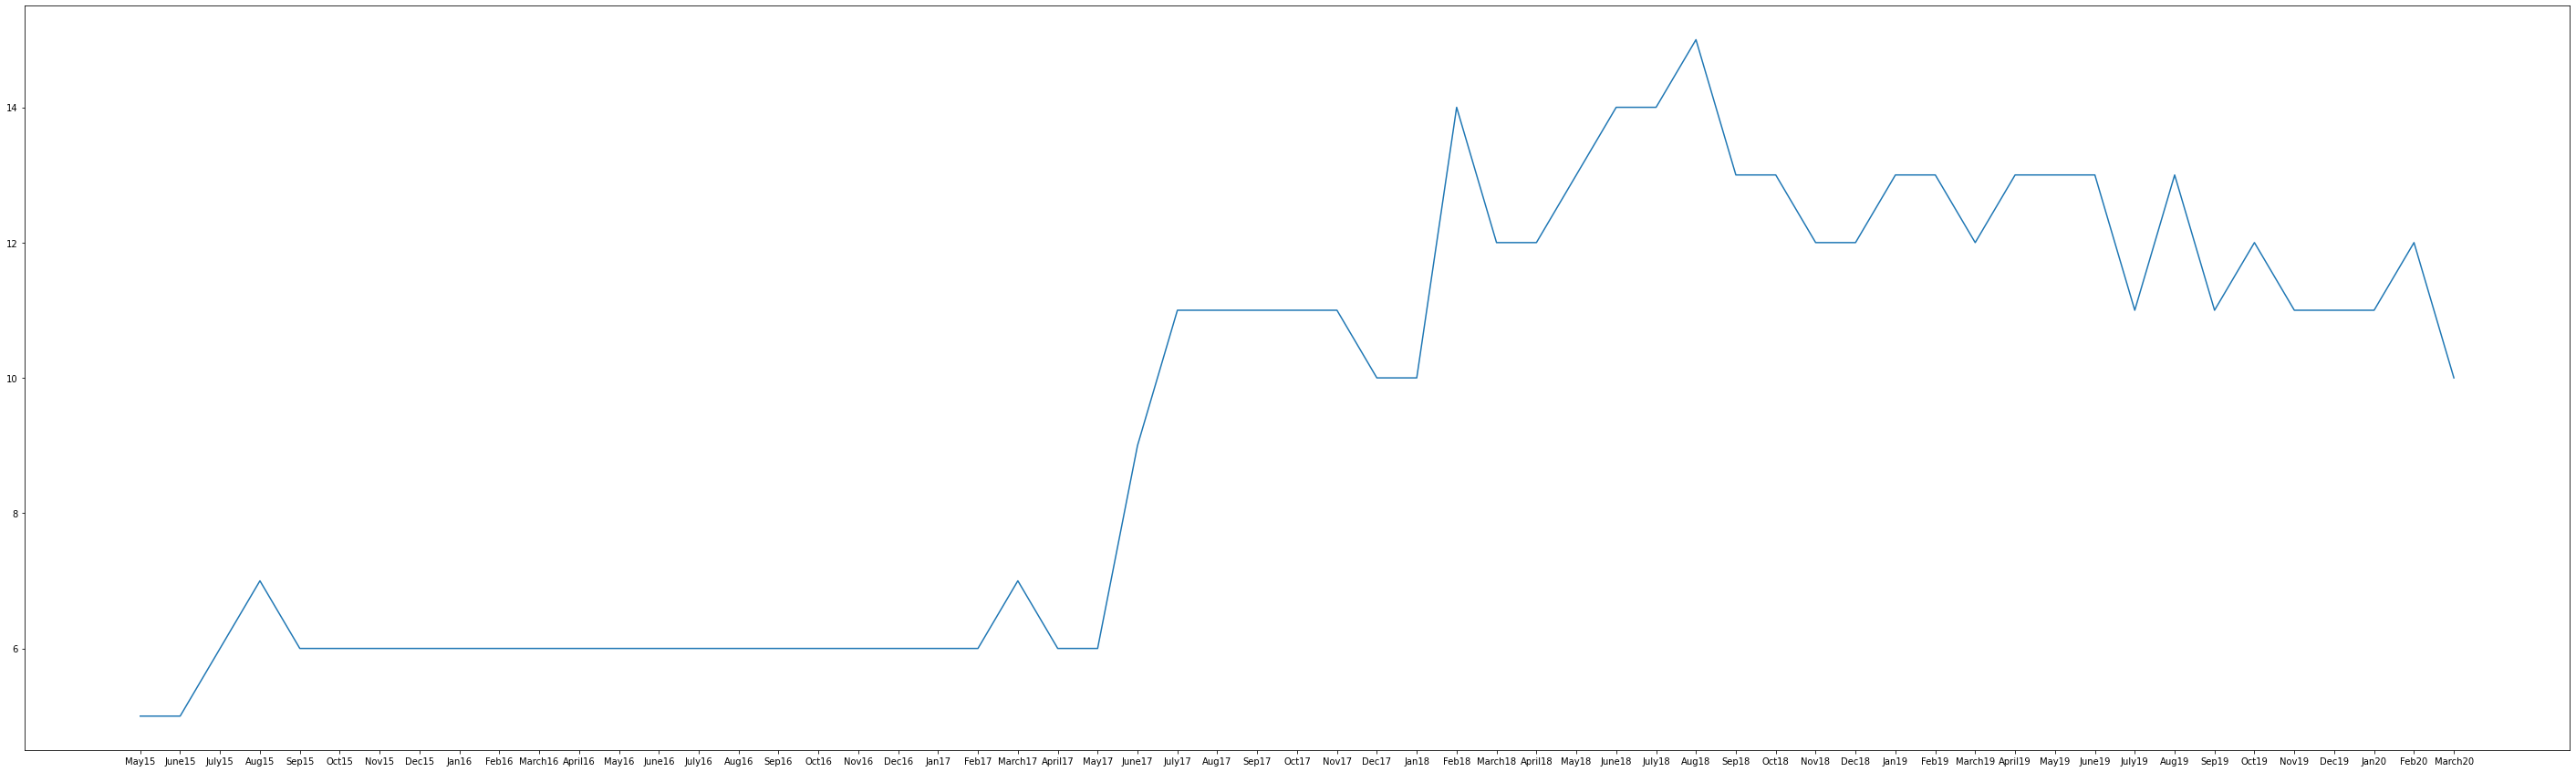


PATNA
Increase in edges: 13


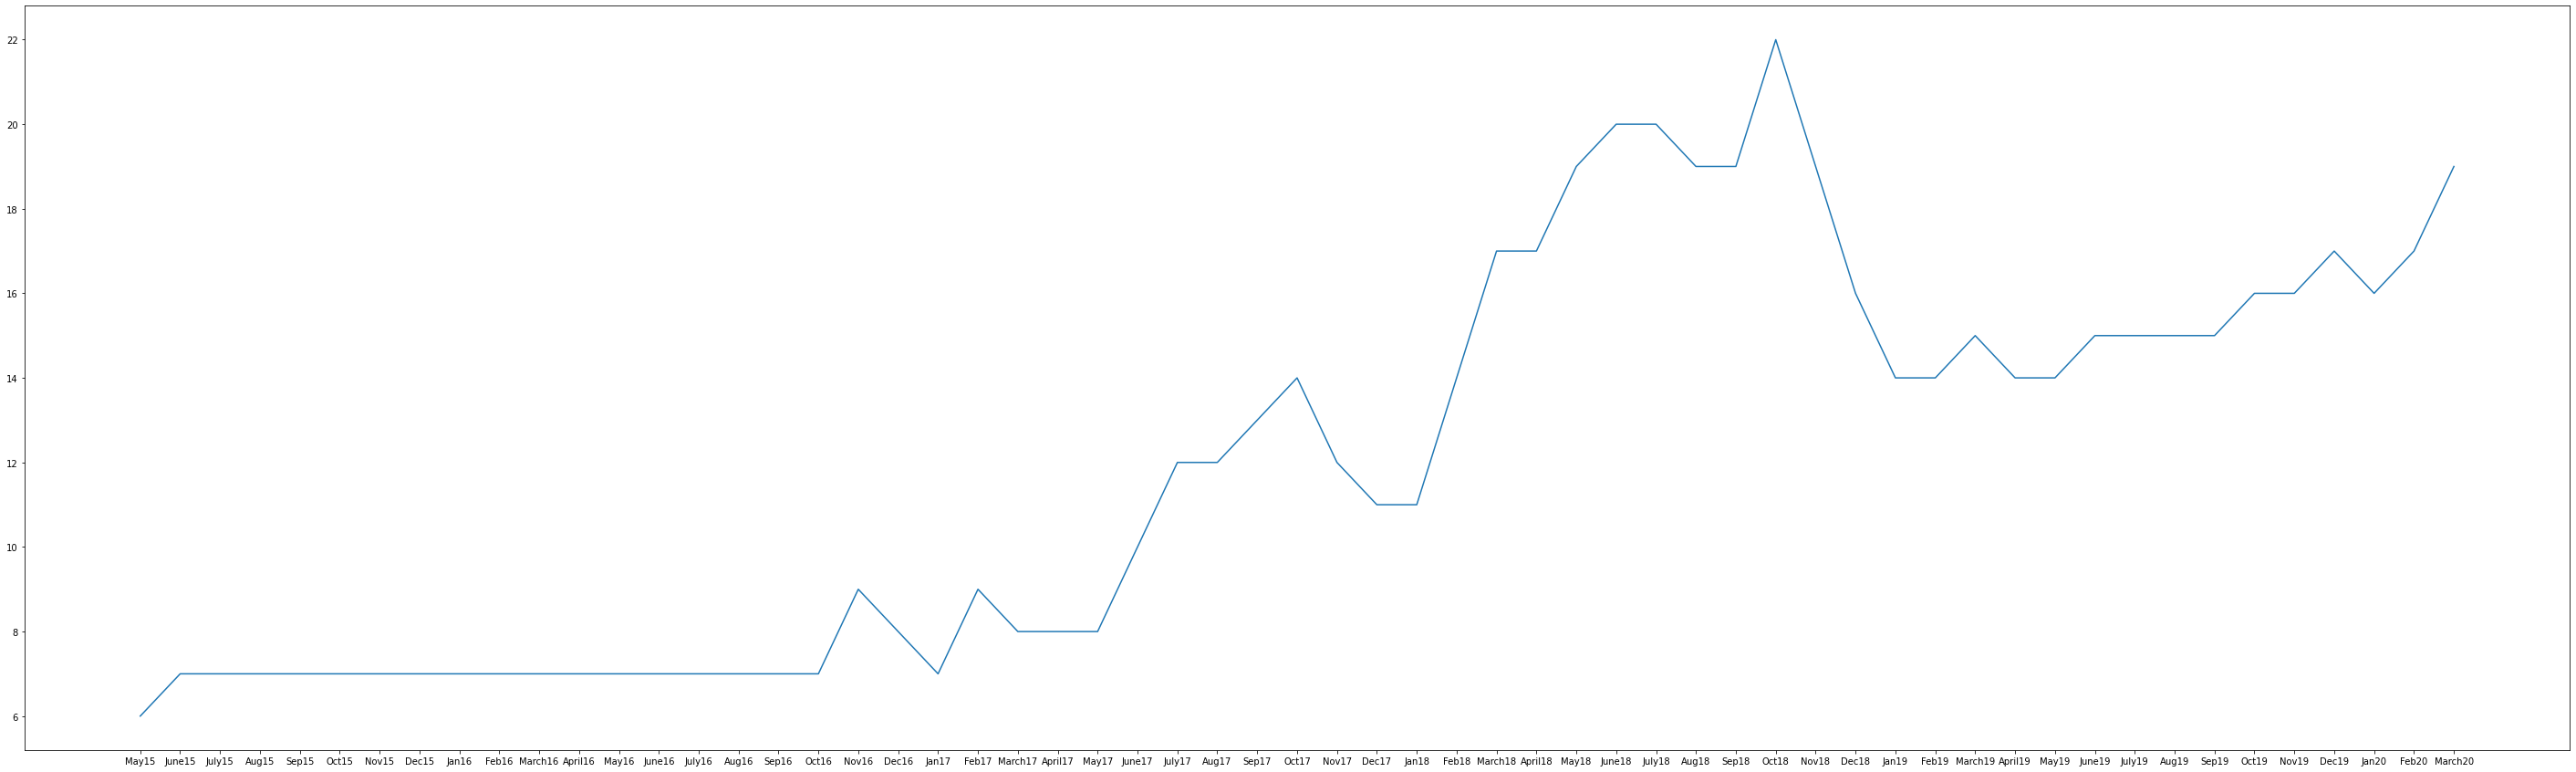


PUDUCHERRY
Increase in edges: 2


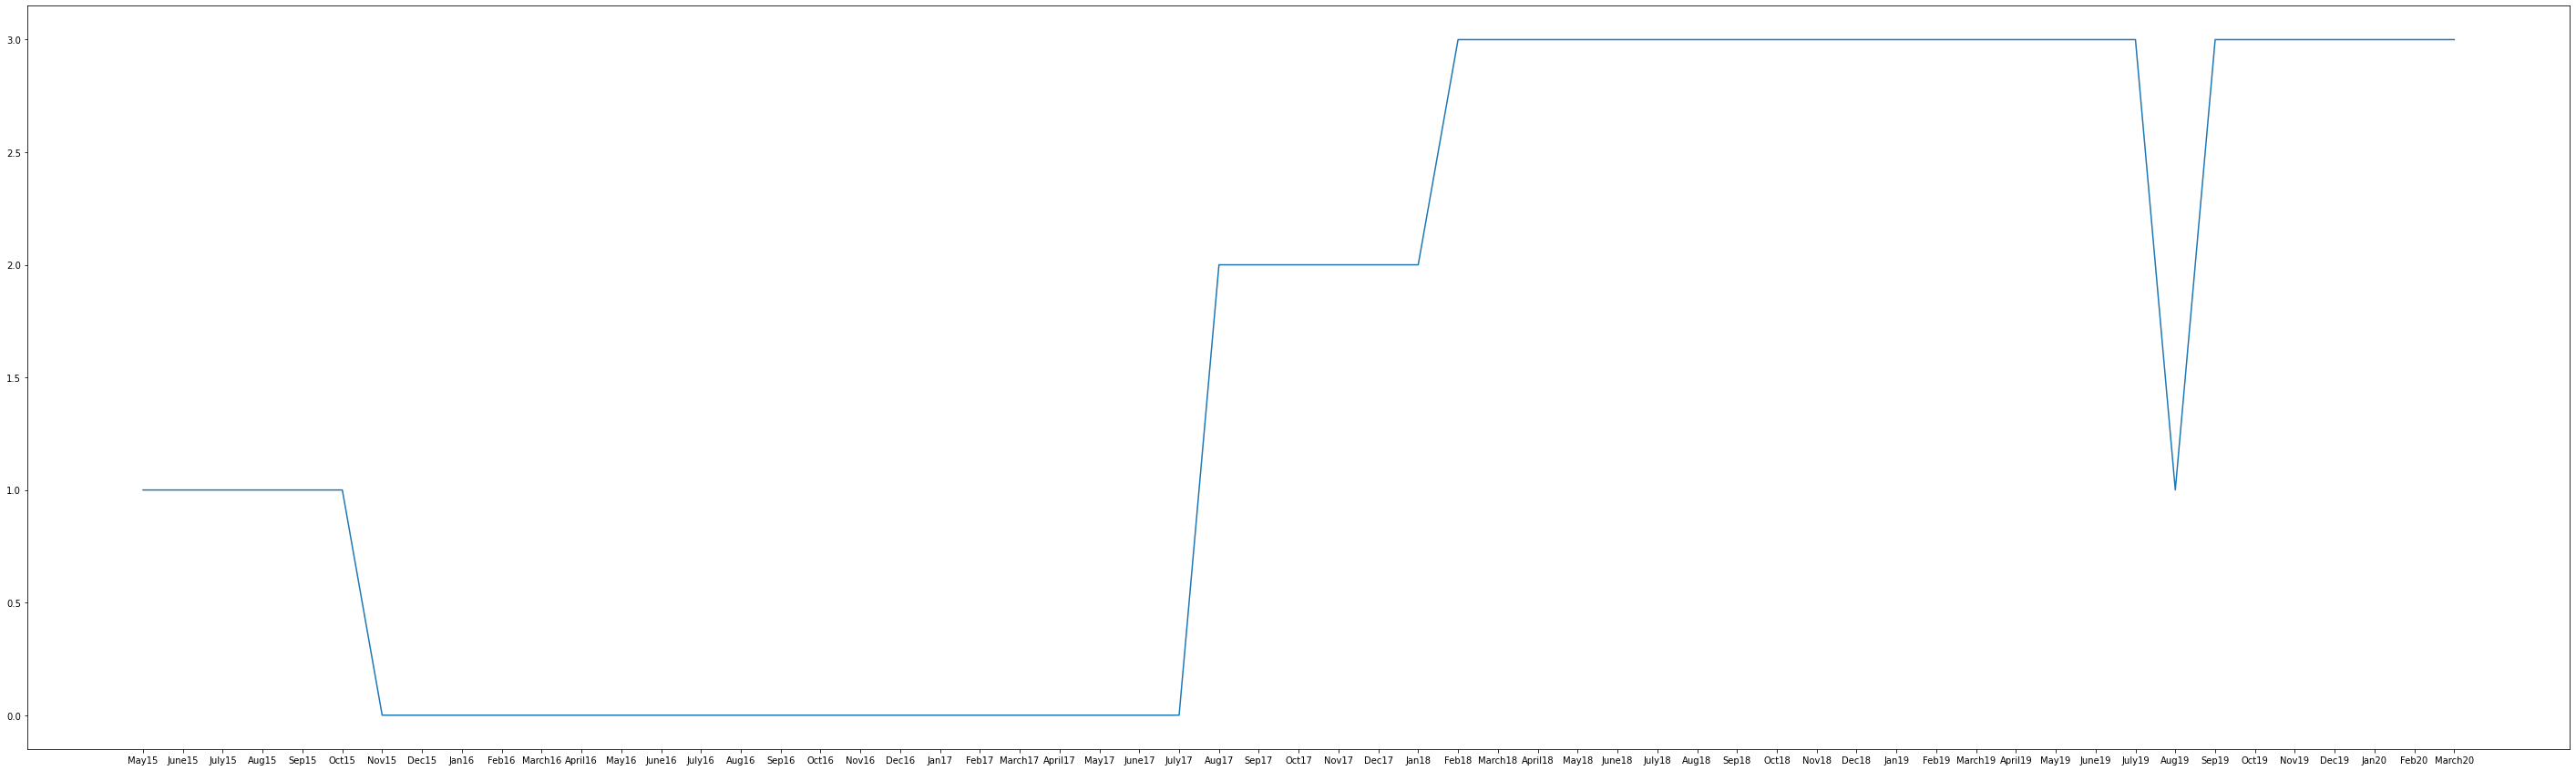


RAIPUR
Increase in edges: 9


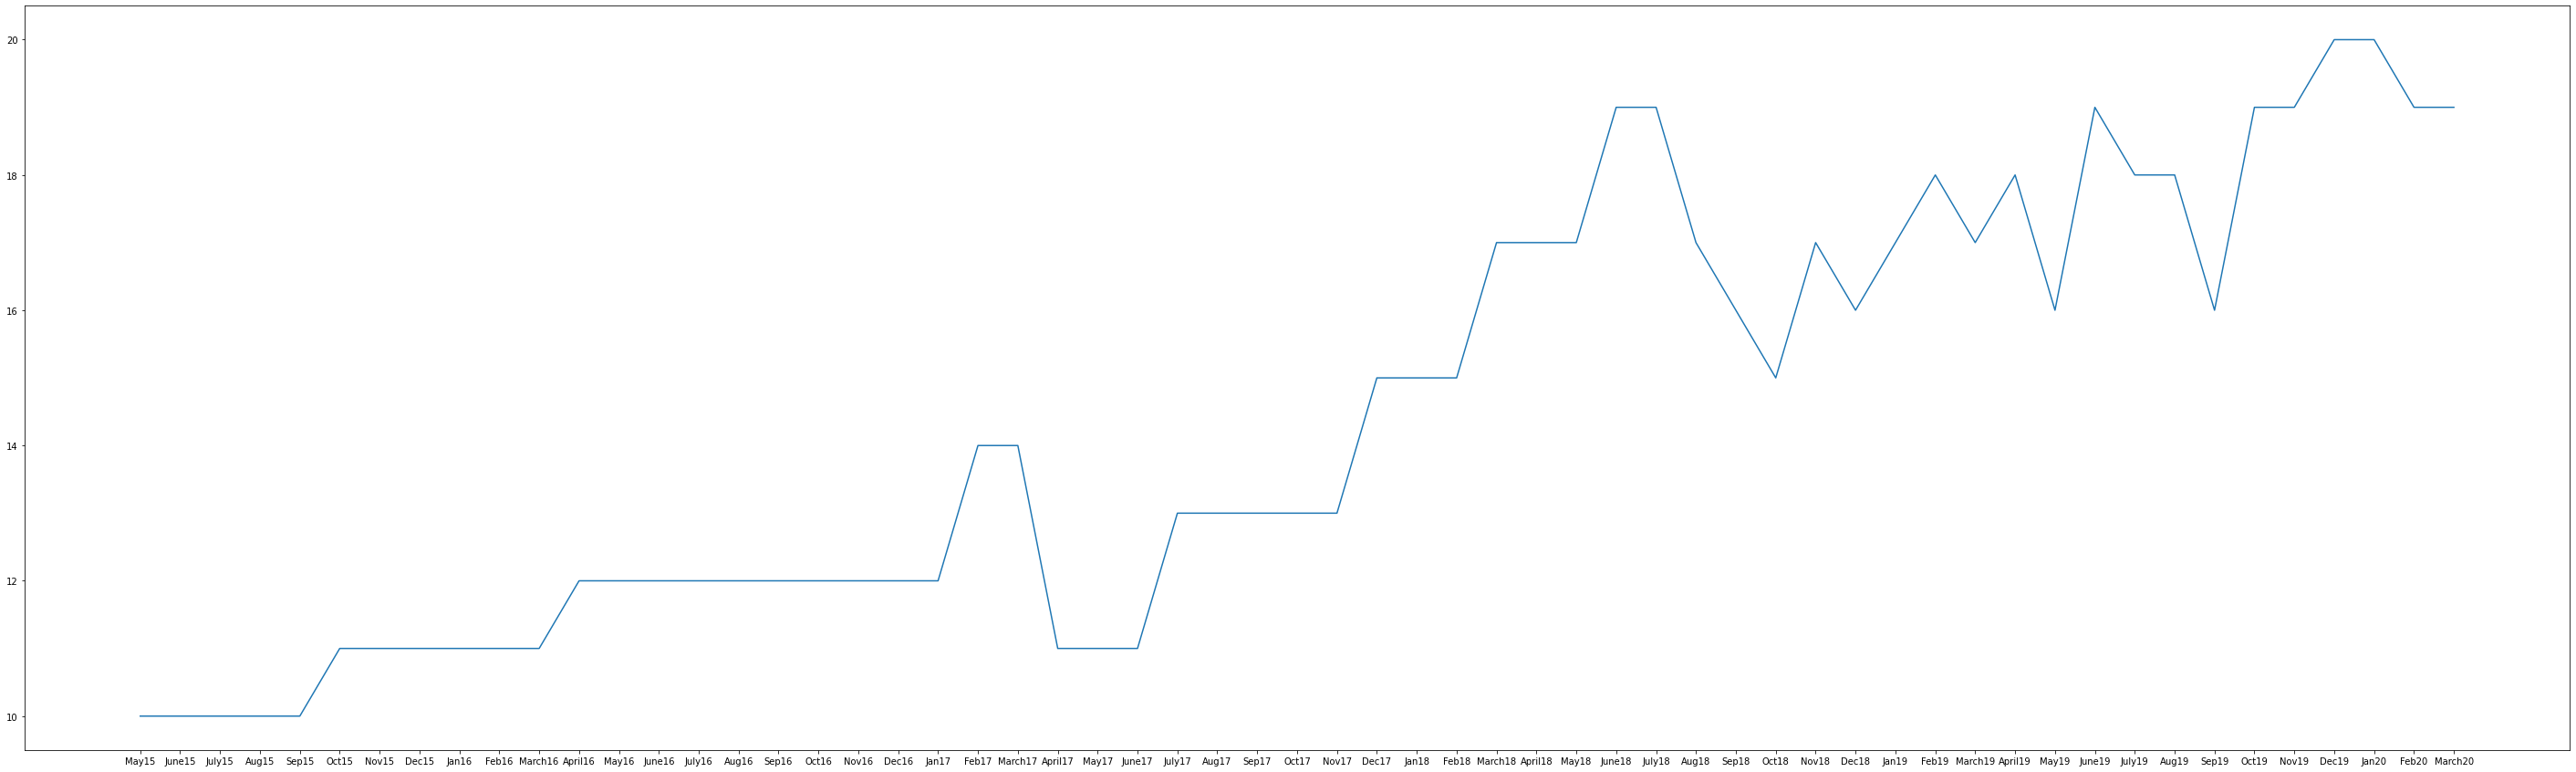


RAJAHMUNDRY
Increase in edges: 3


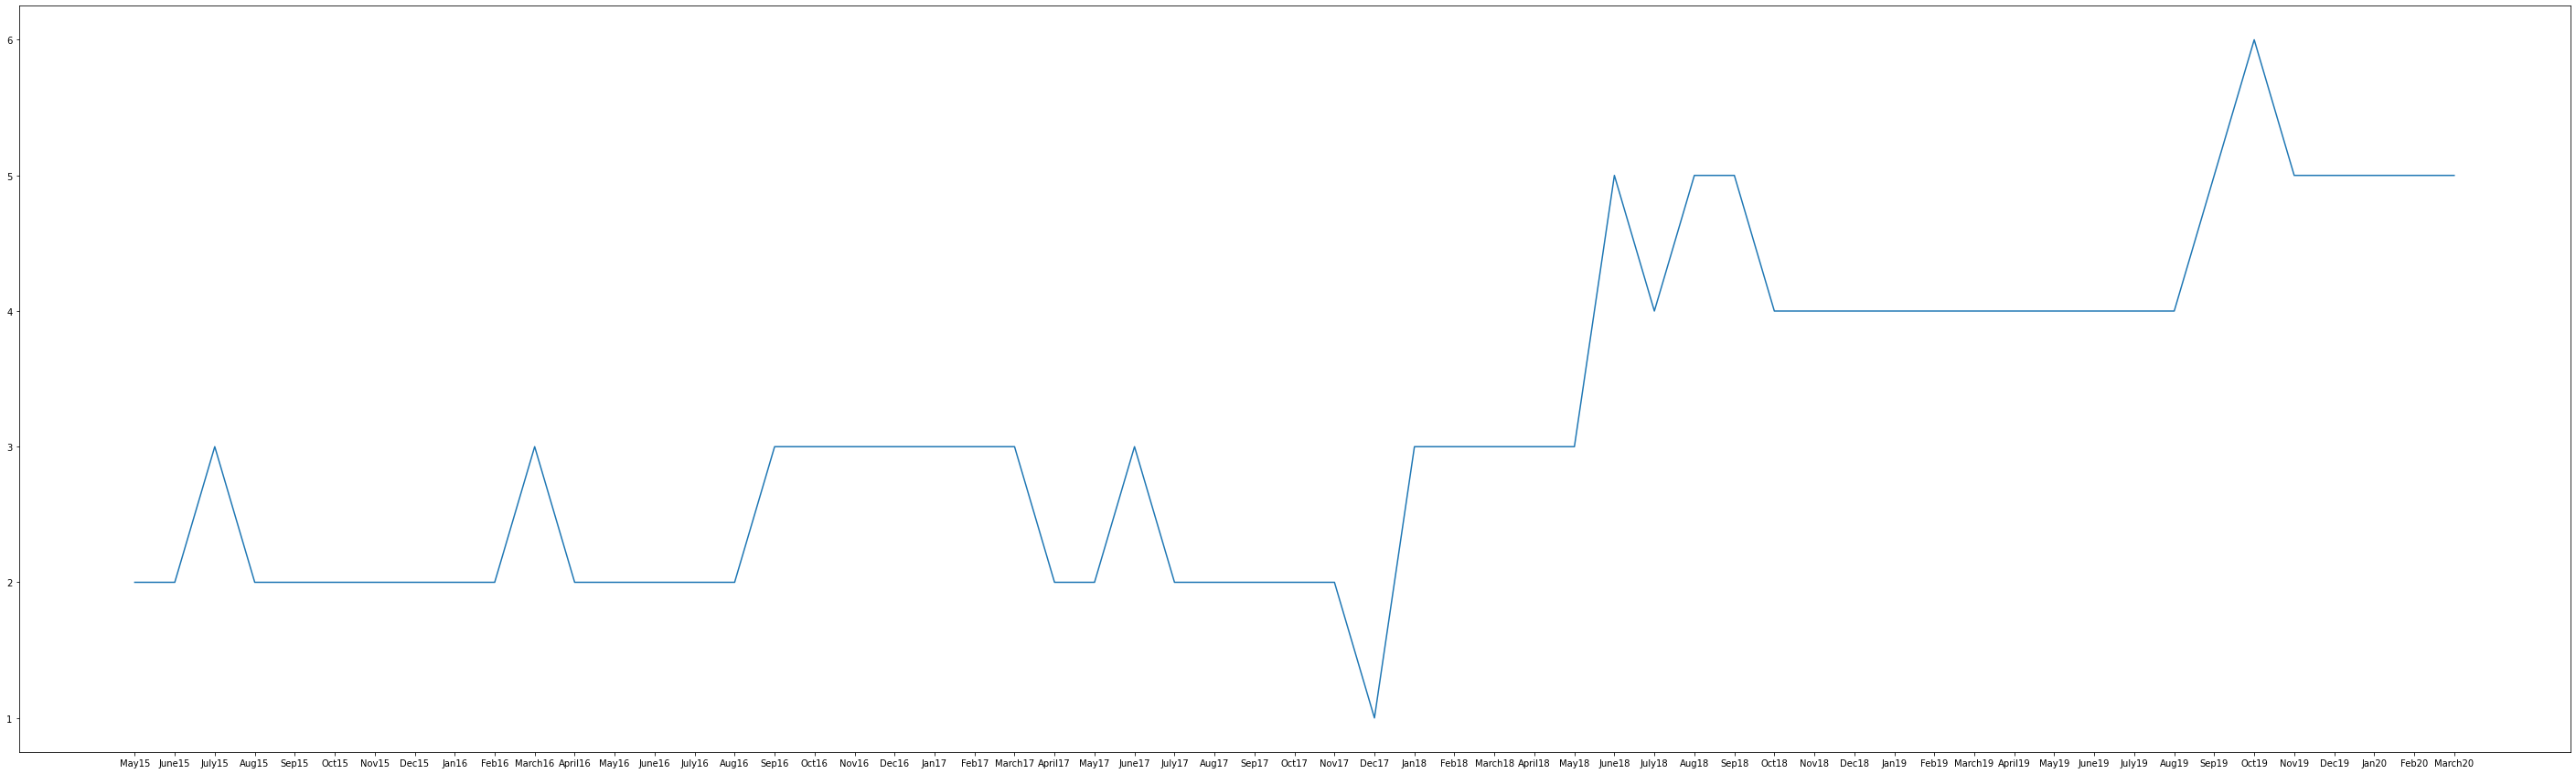


RAJKOT
Increase in edges: -1


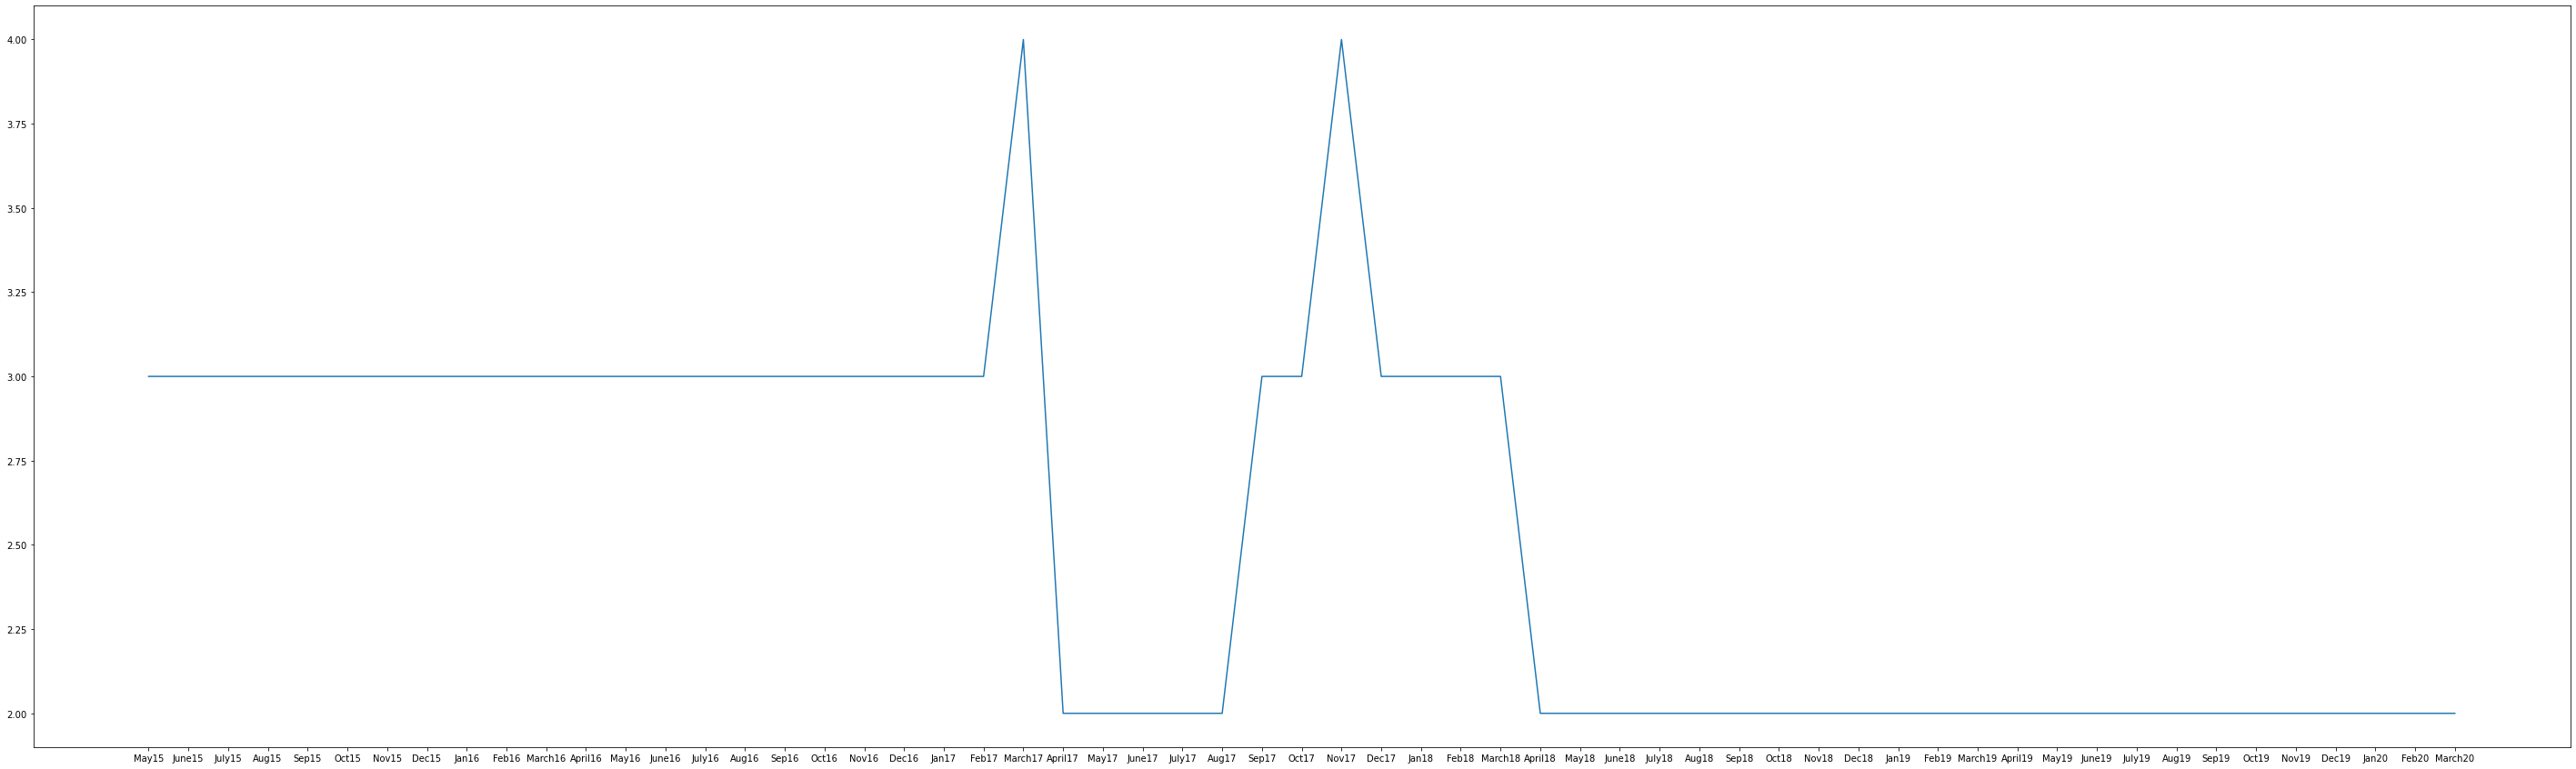


RANCHI
Increase in edges: 8


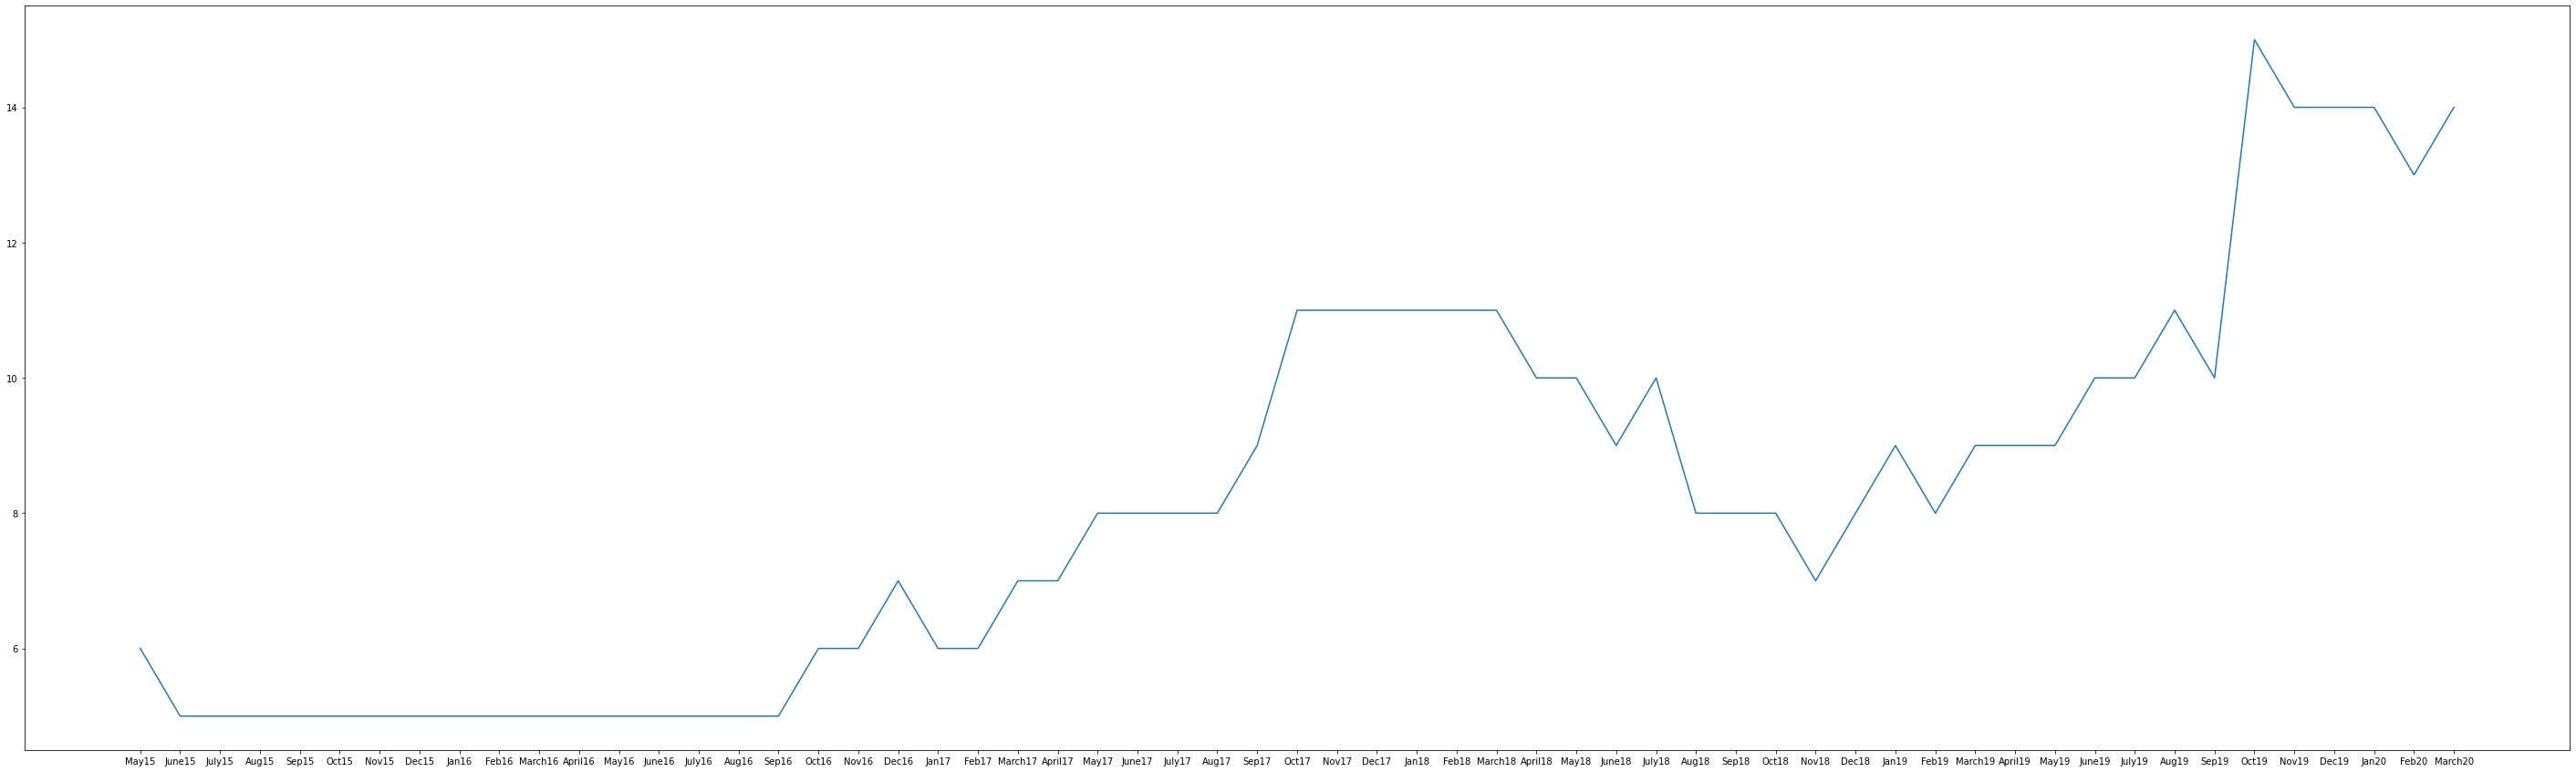


TRIVANDRUM
Increase in edges: 6


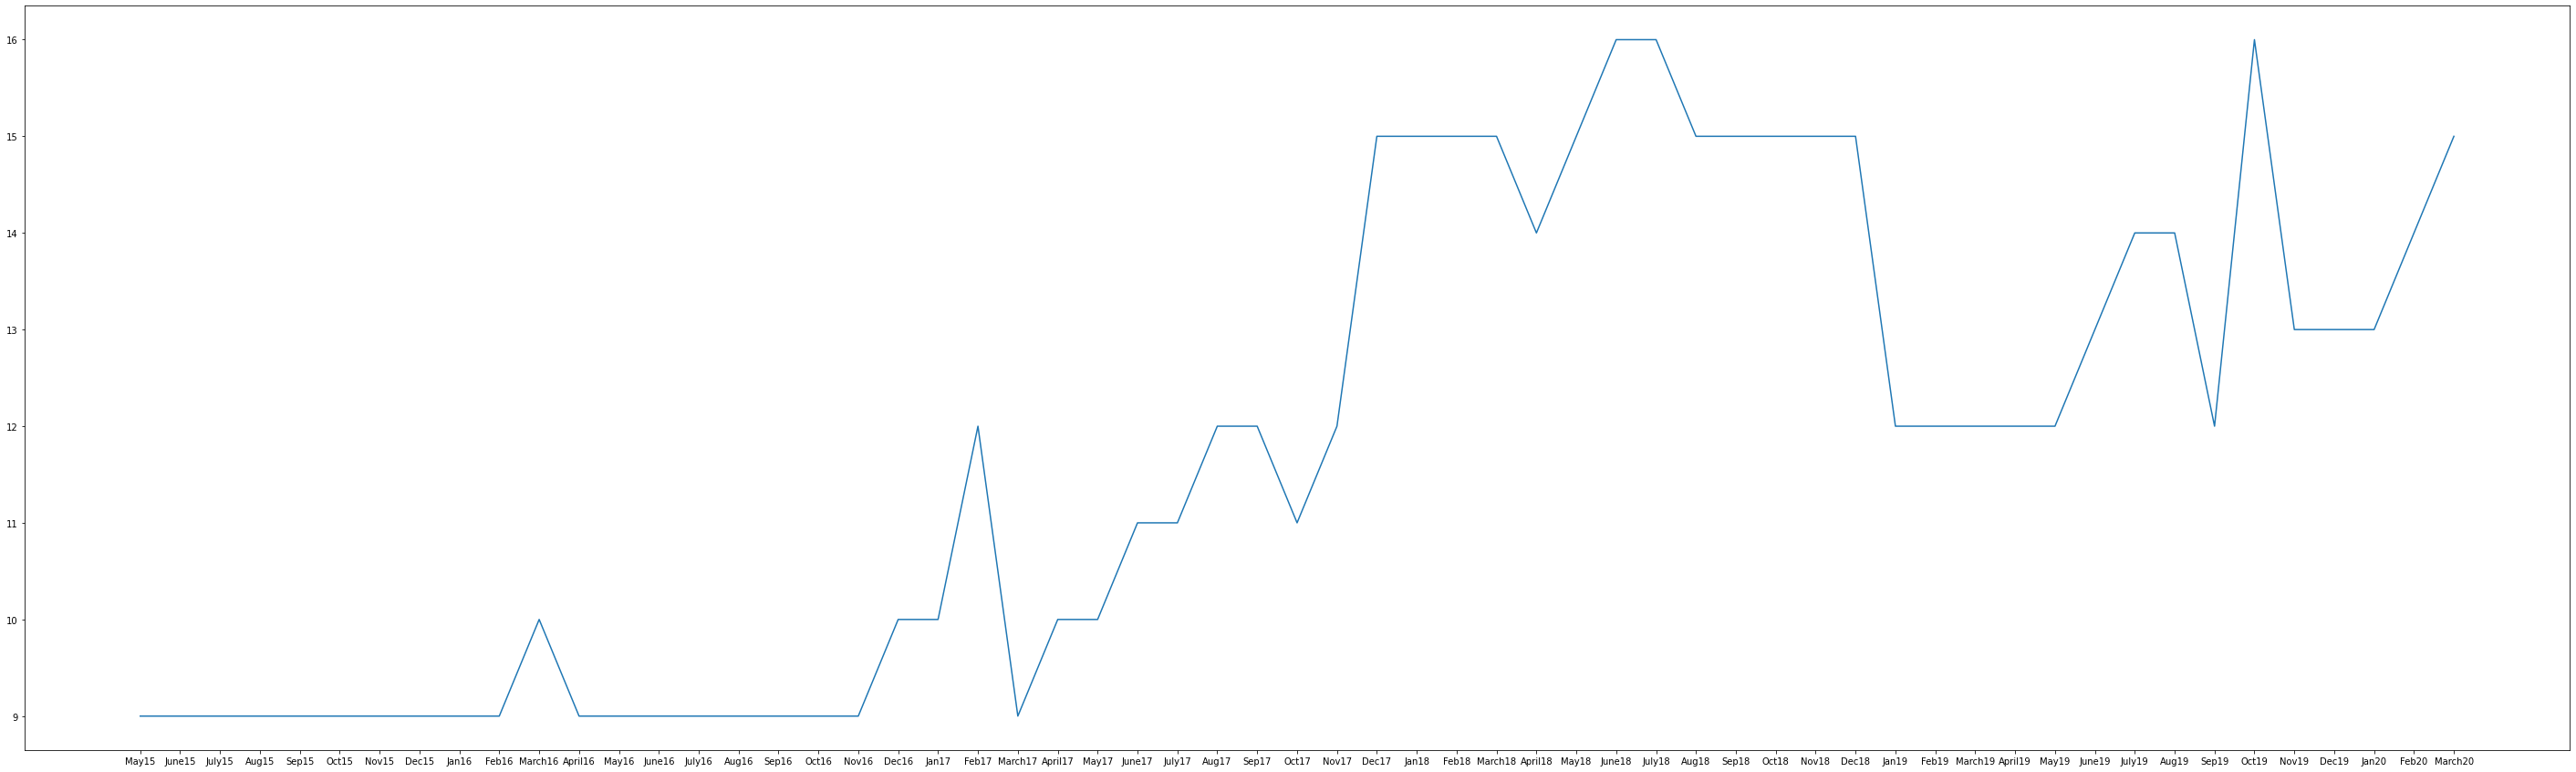


VARANASI
Increase in edges: 8


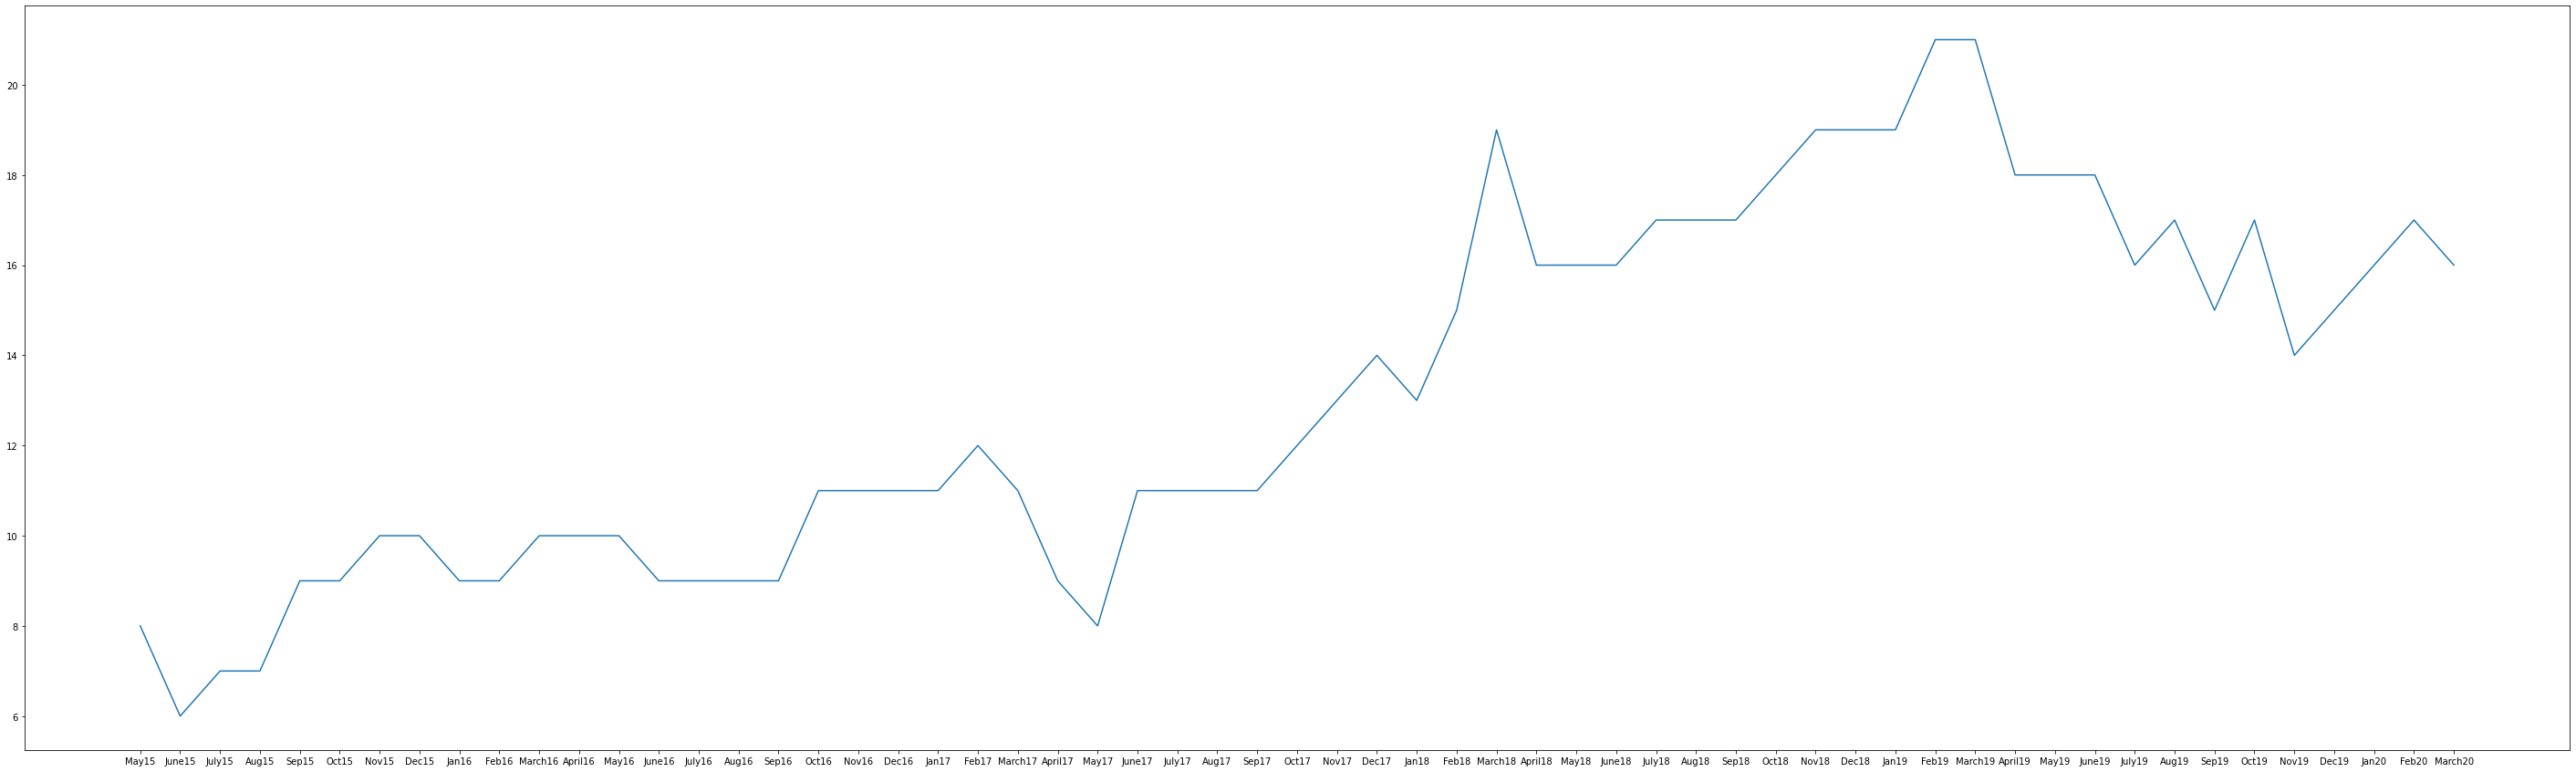


VIJAYAWADA
Increase in edges: 6


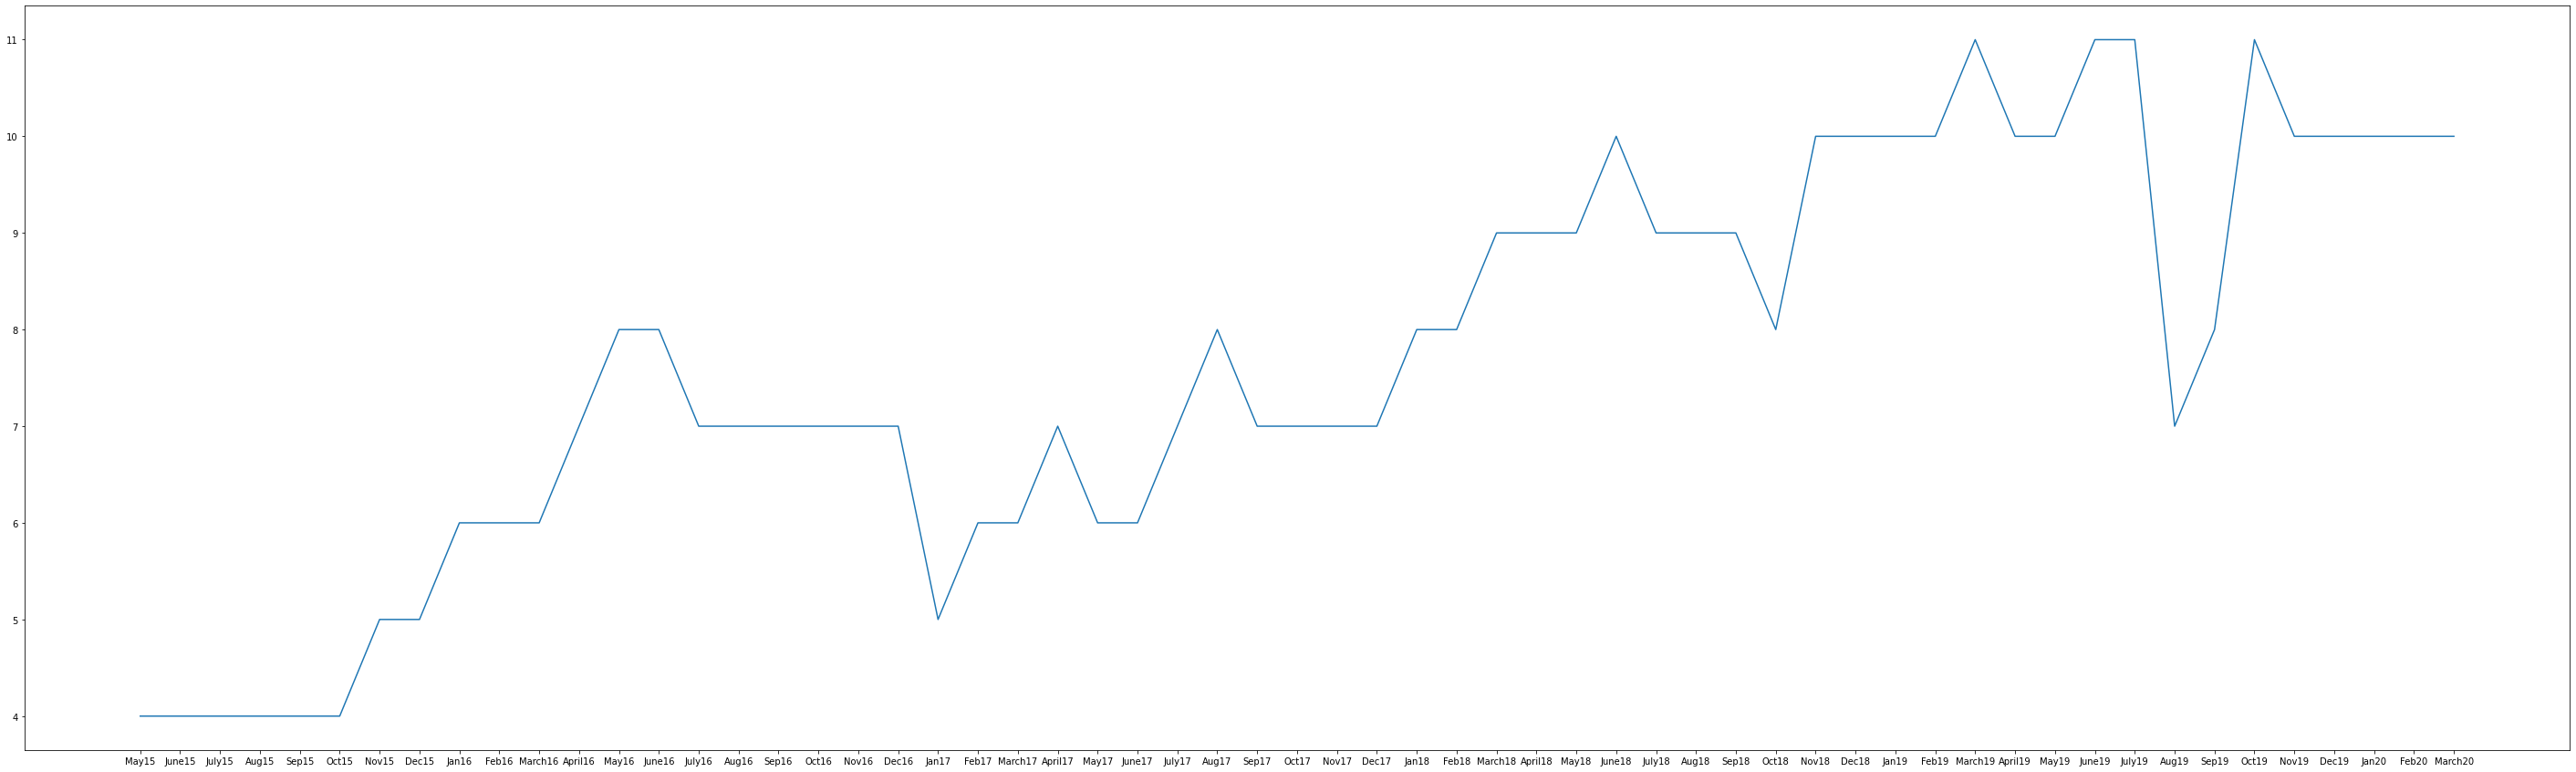


VISAKHAPATNAM
Increase in edges: 7


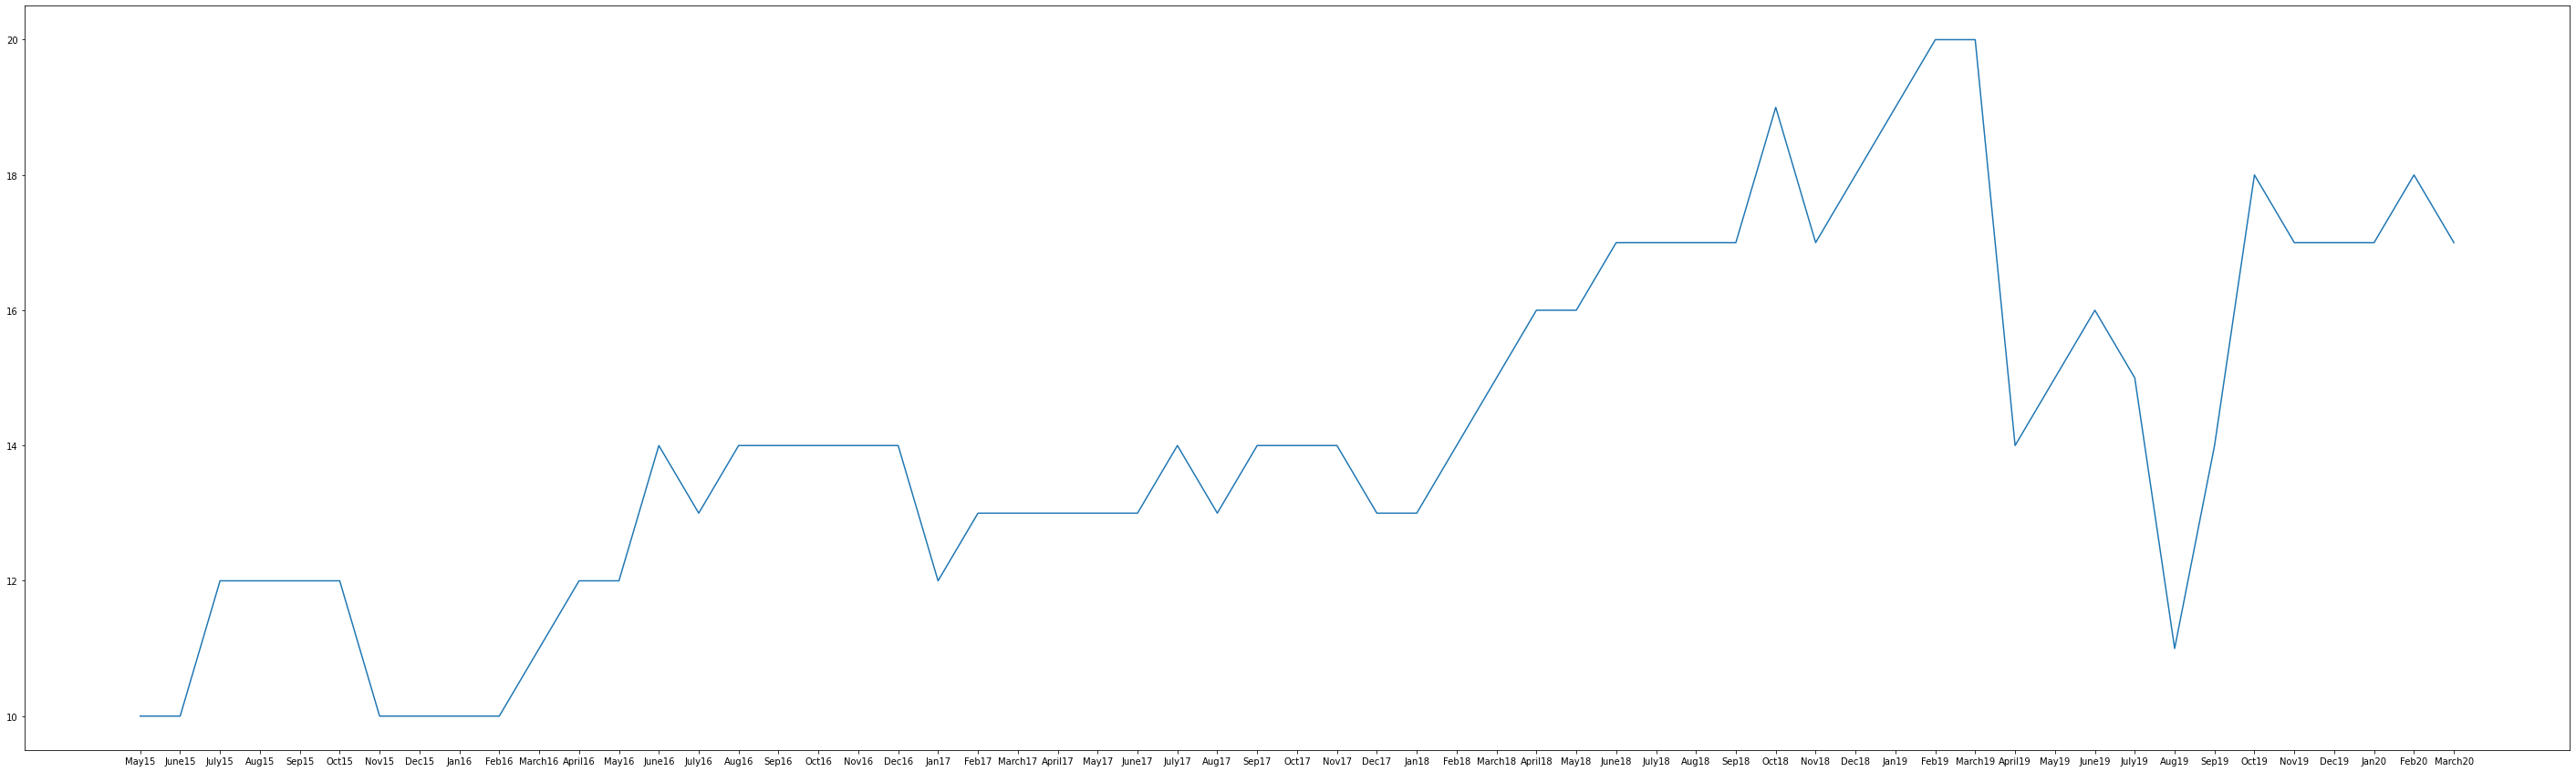


BHAVNAGAR
Increase in edges: 0


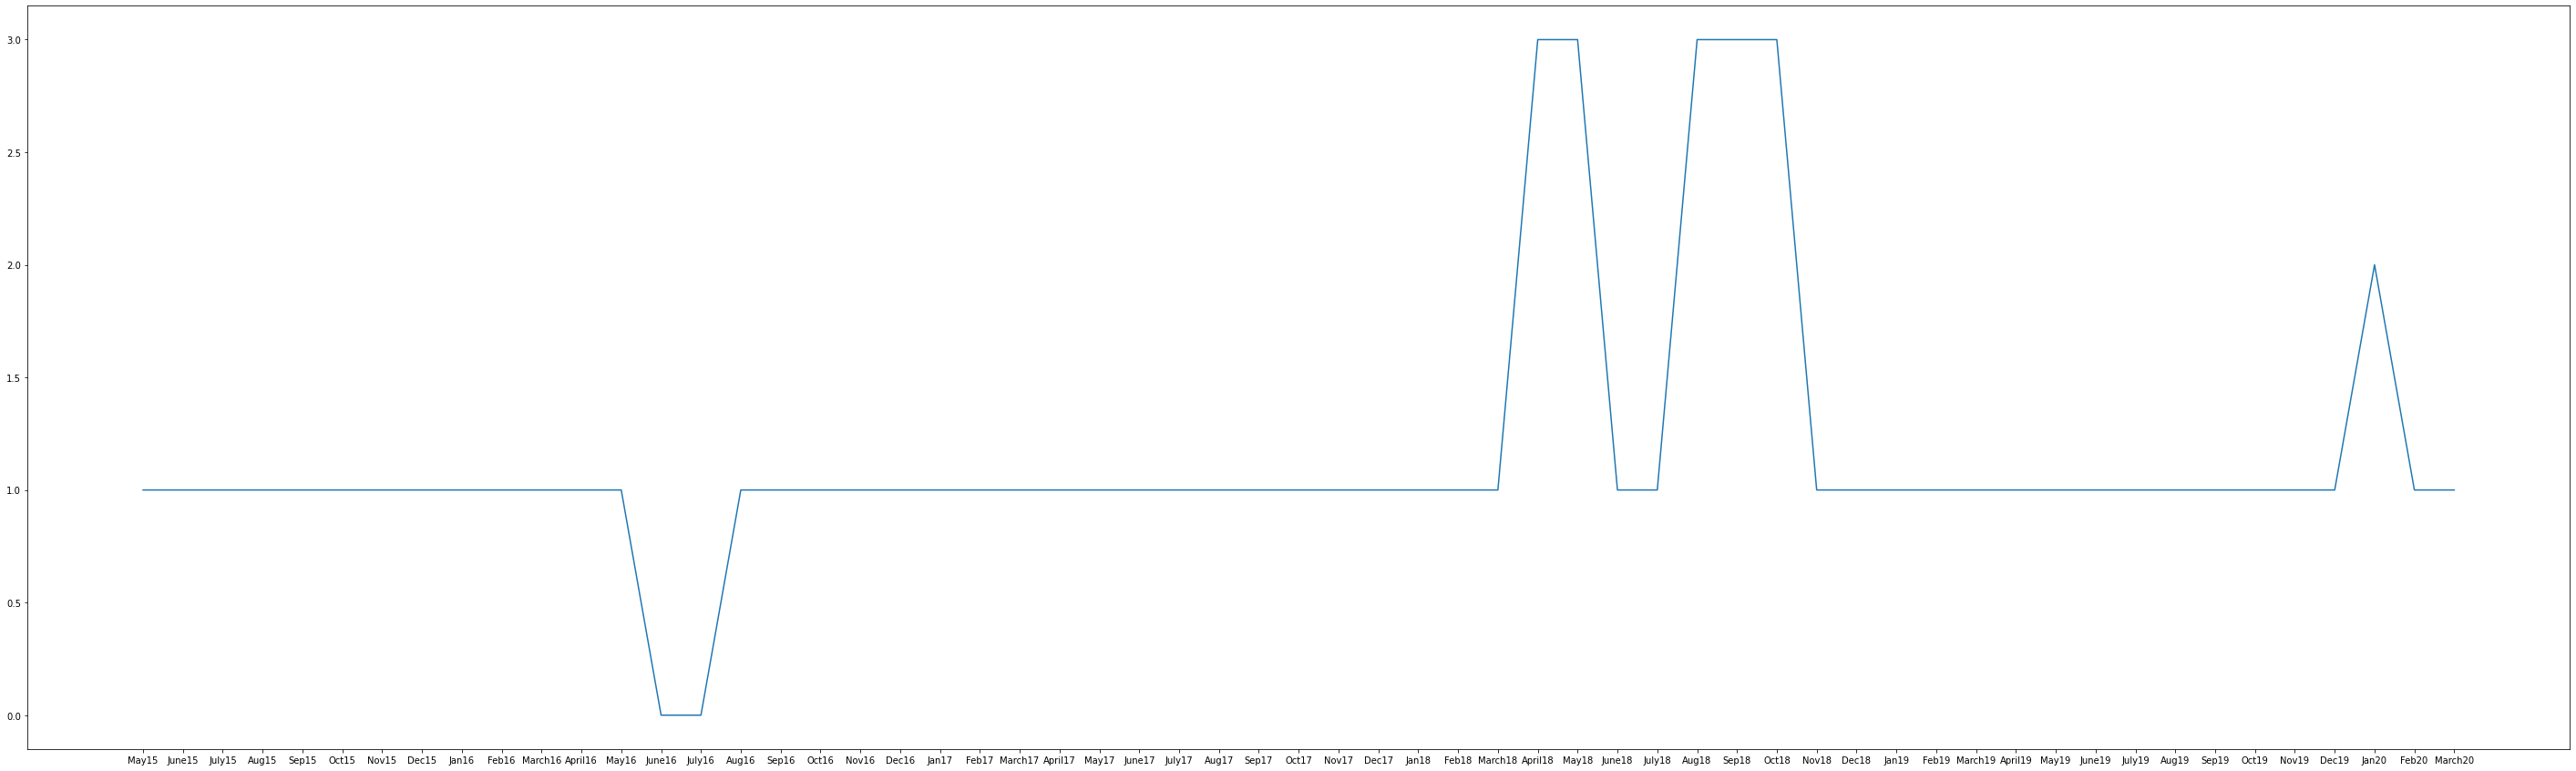


BHUBANESWAR
Increase in edges: 8


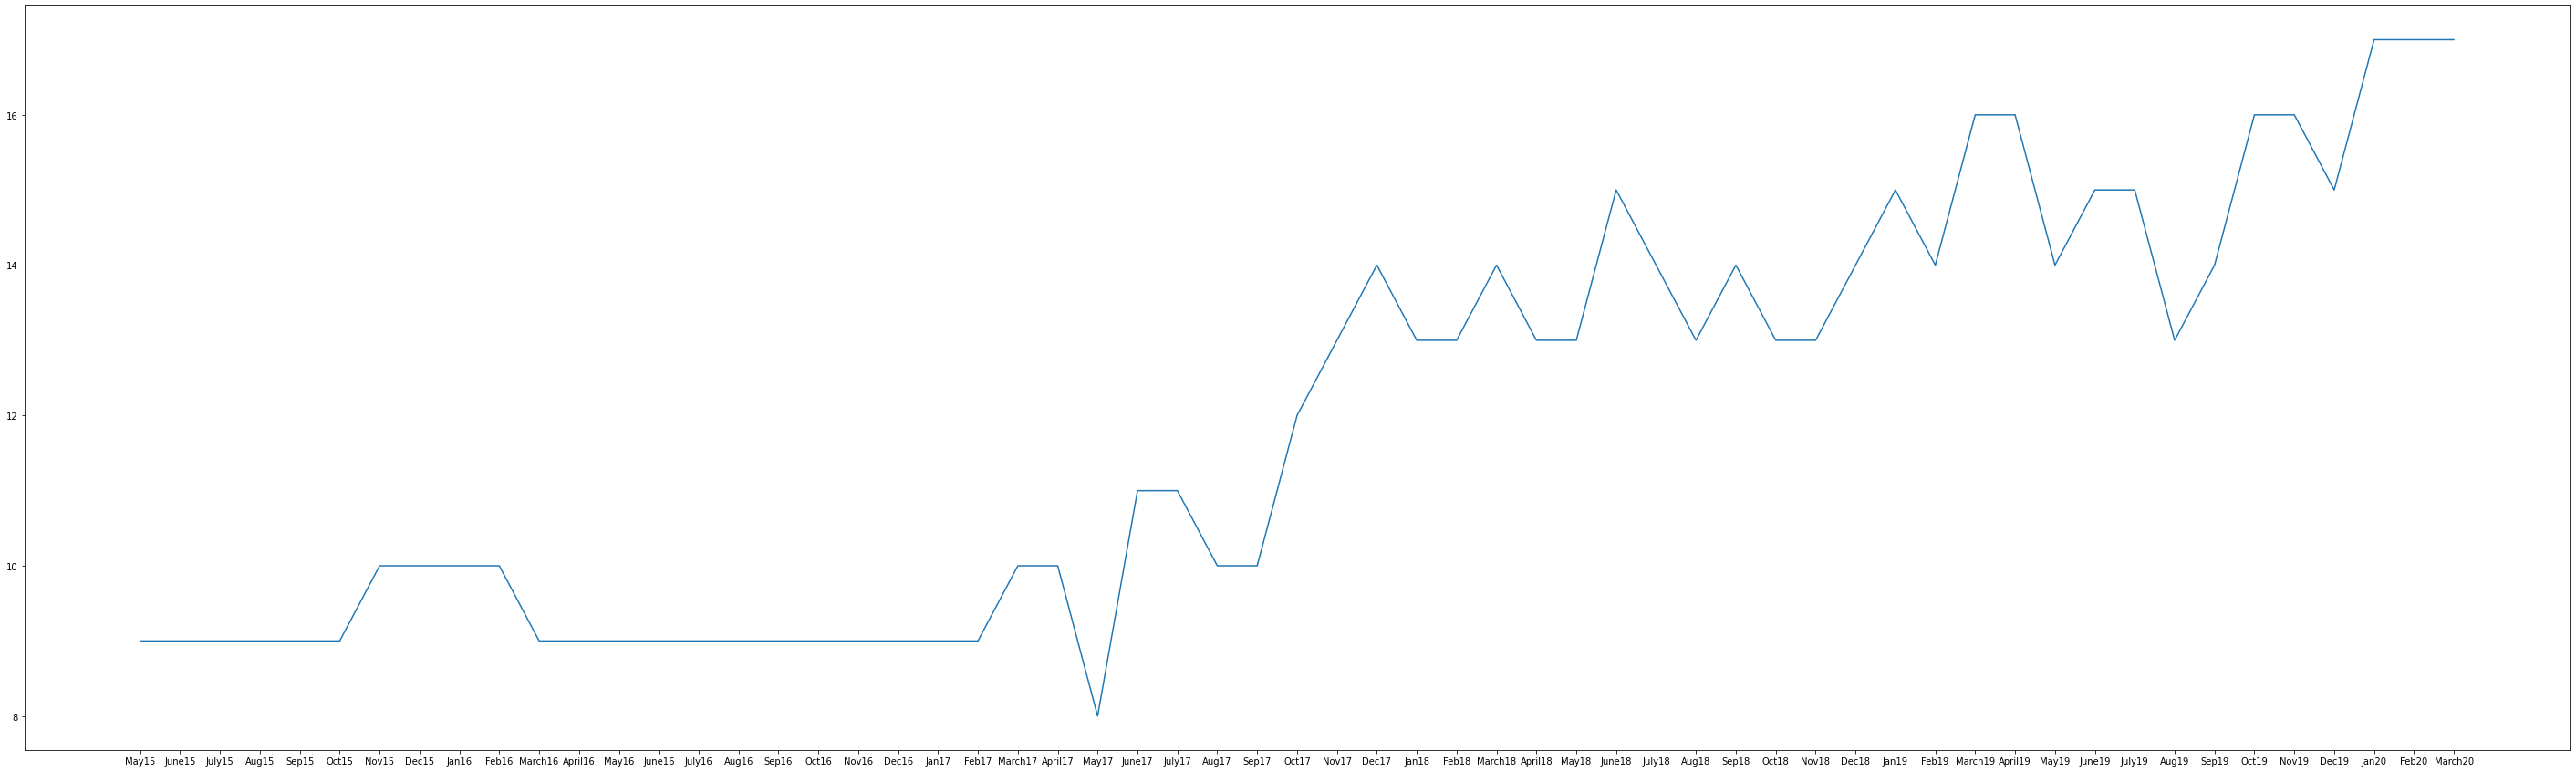


PORT BLAIR
Increase in edges: 3


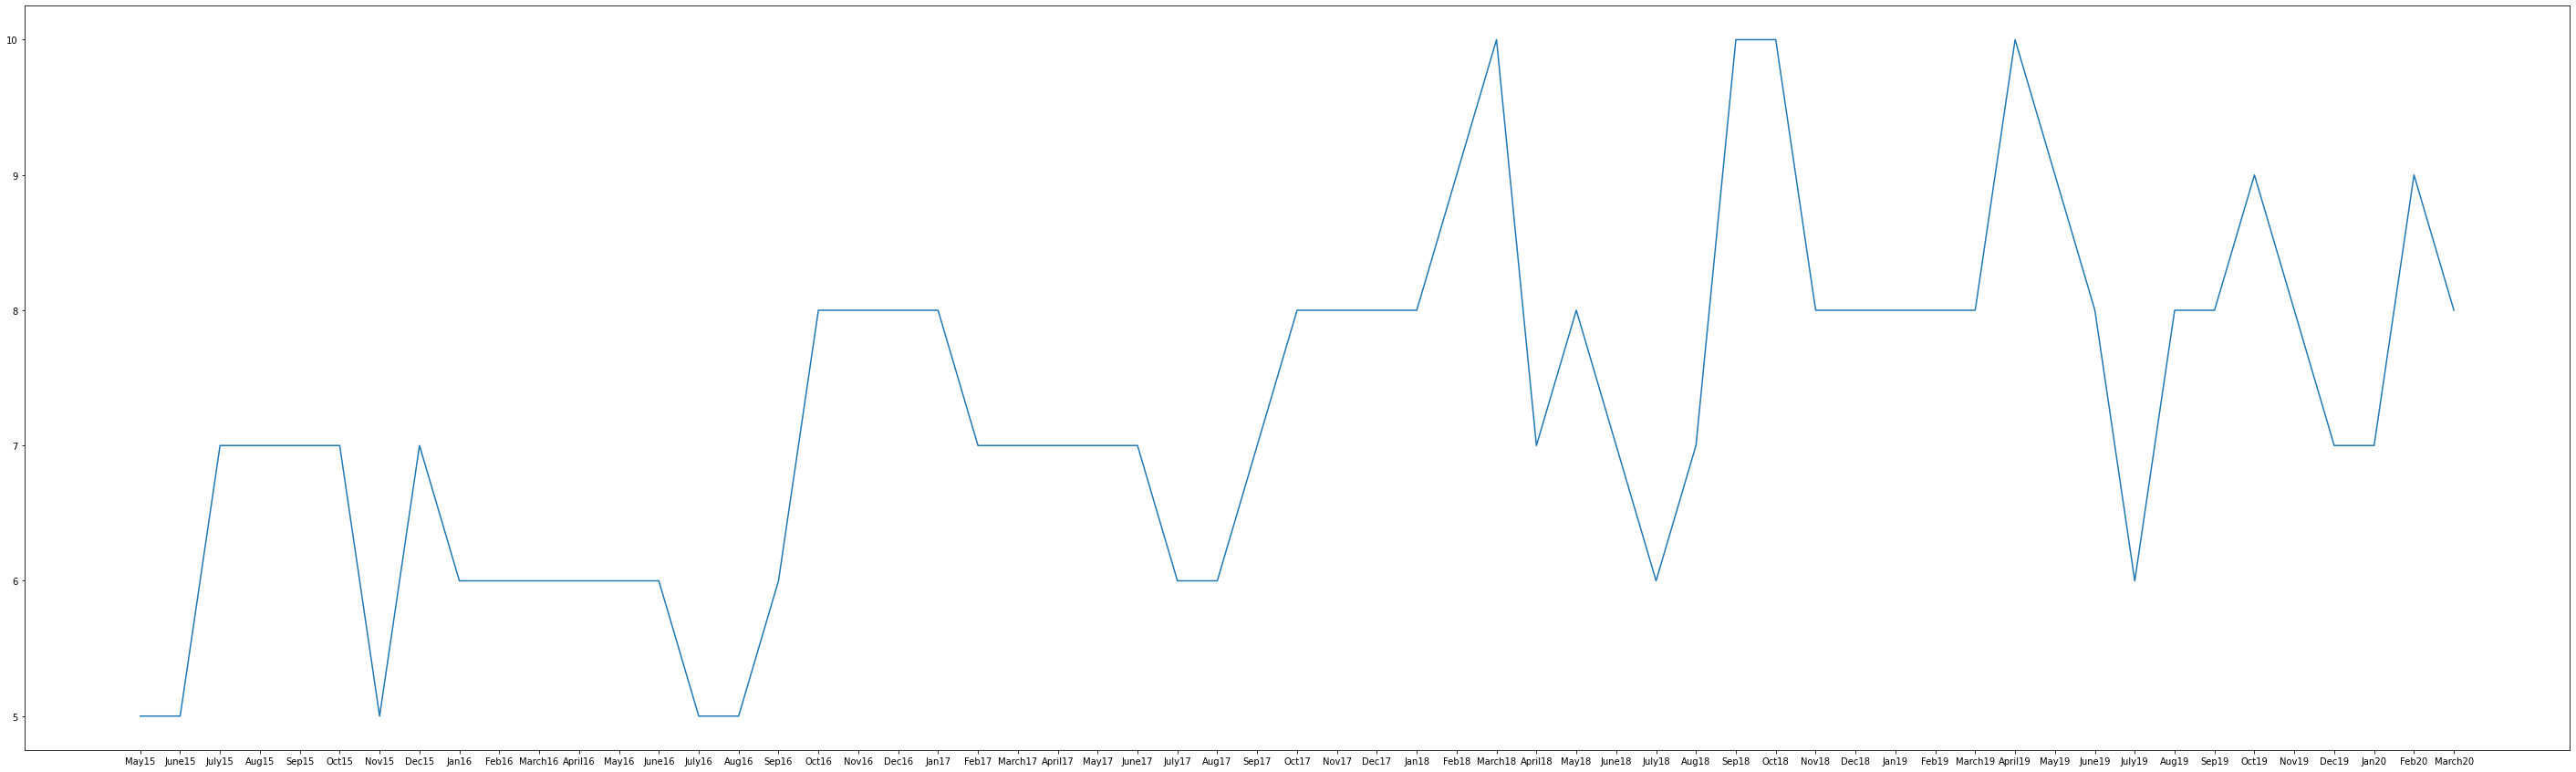


BHUJ
Increase in edges: -1


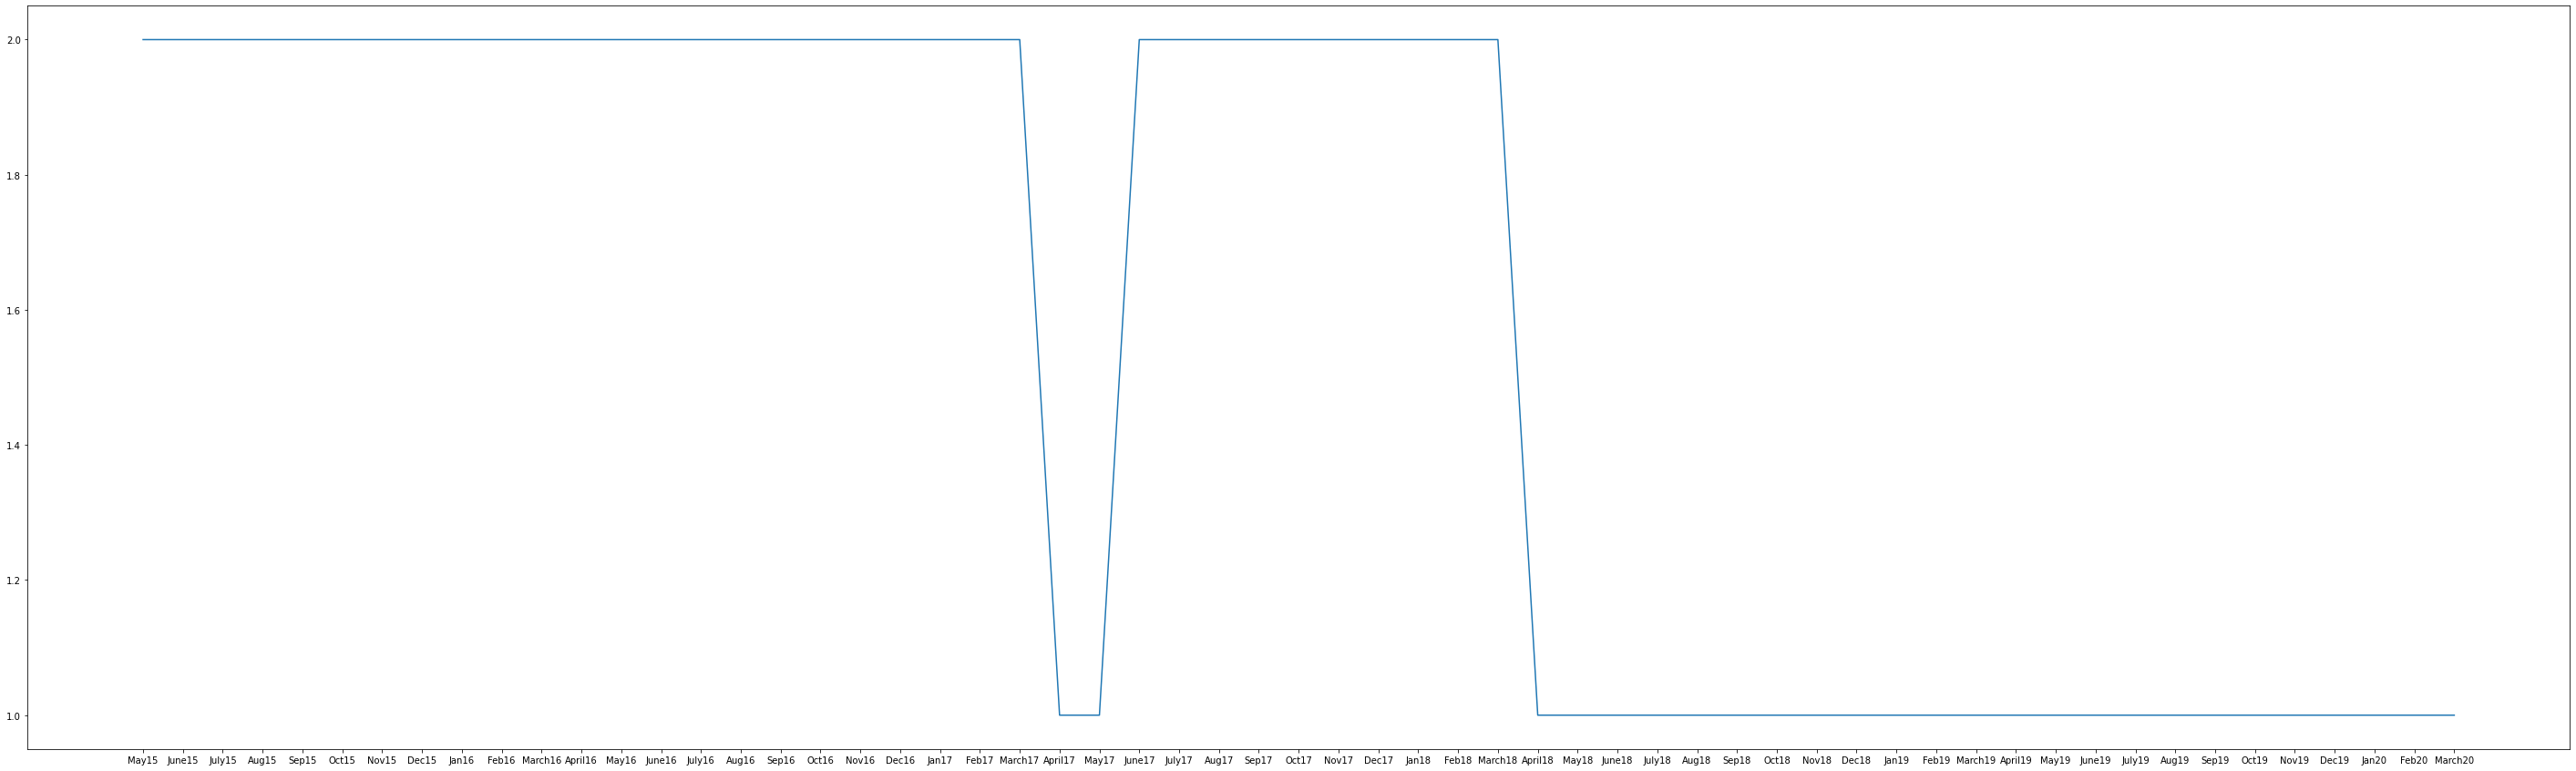


TIRUCHIRAPALLY
Increase in edges: 2


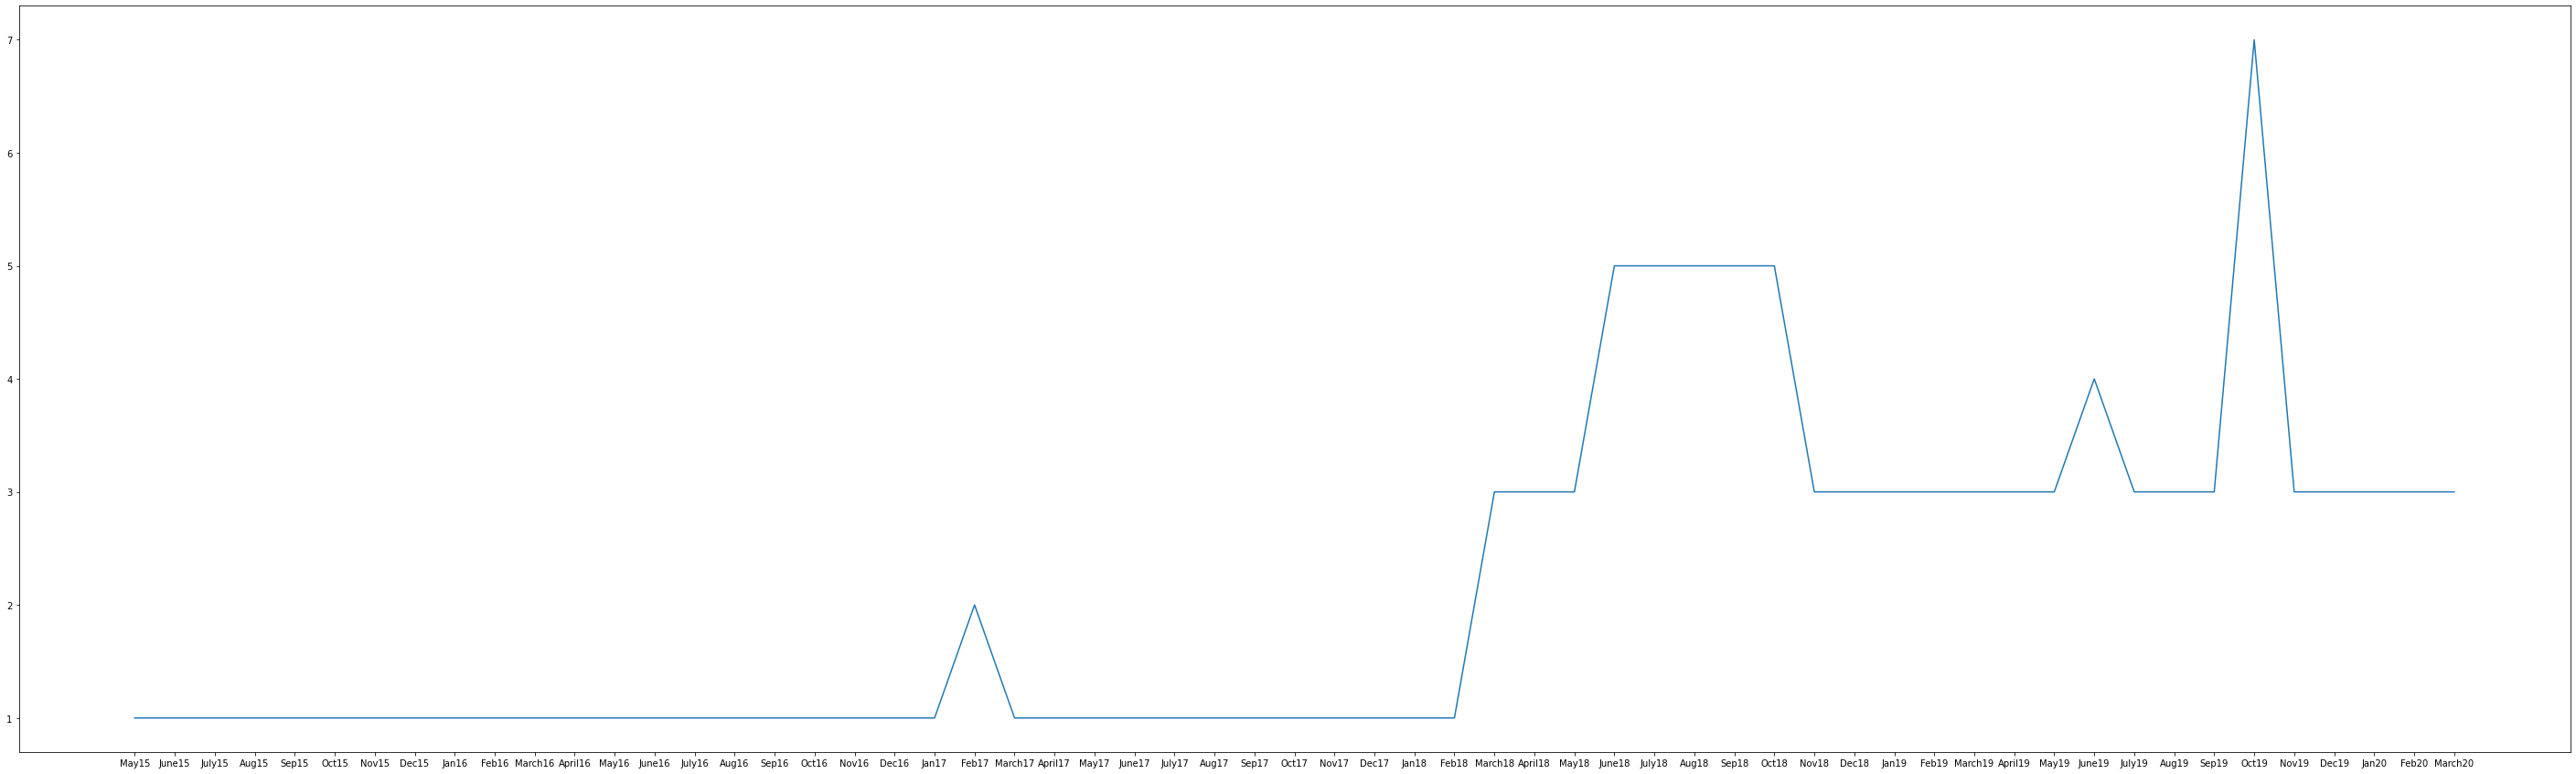


TUTICORIN
Increase in edges: 1


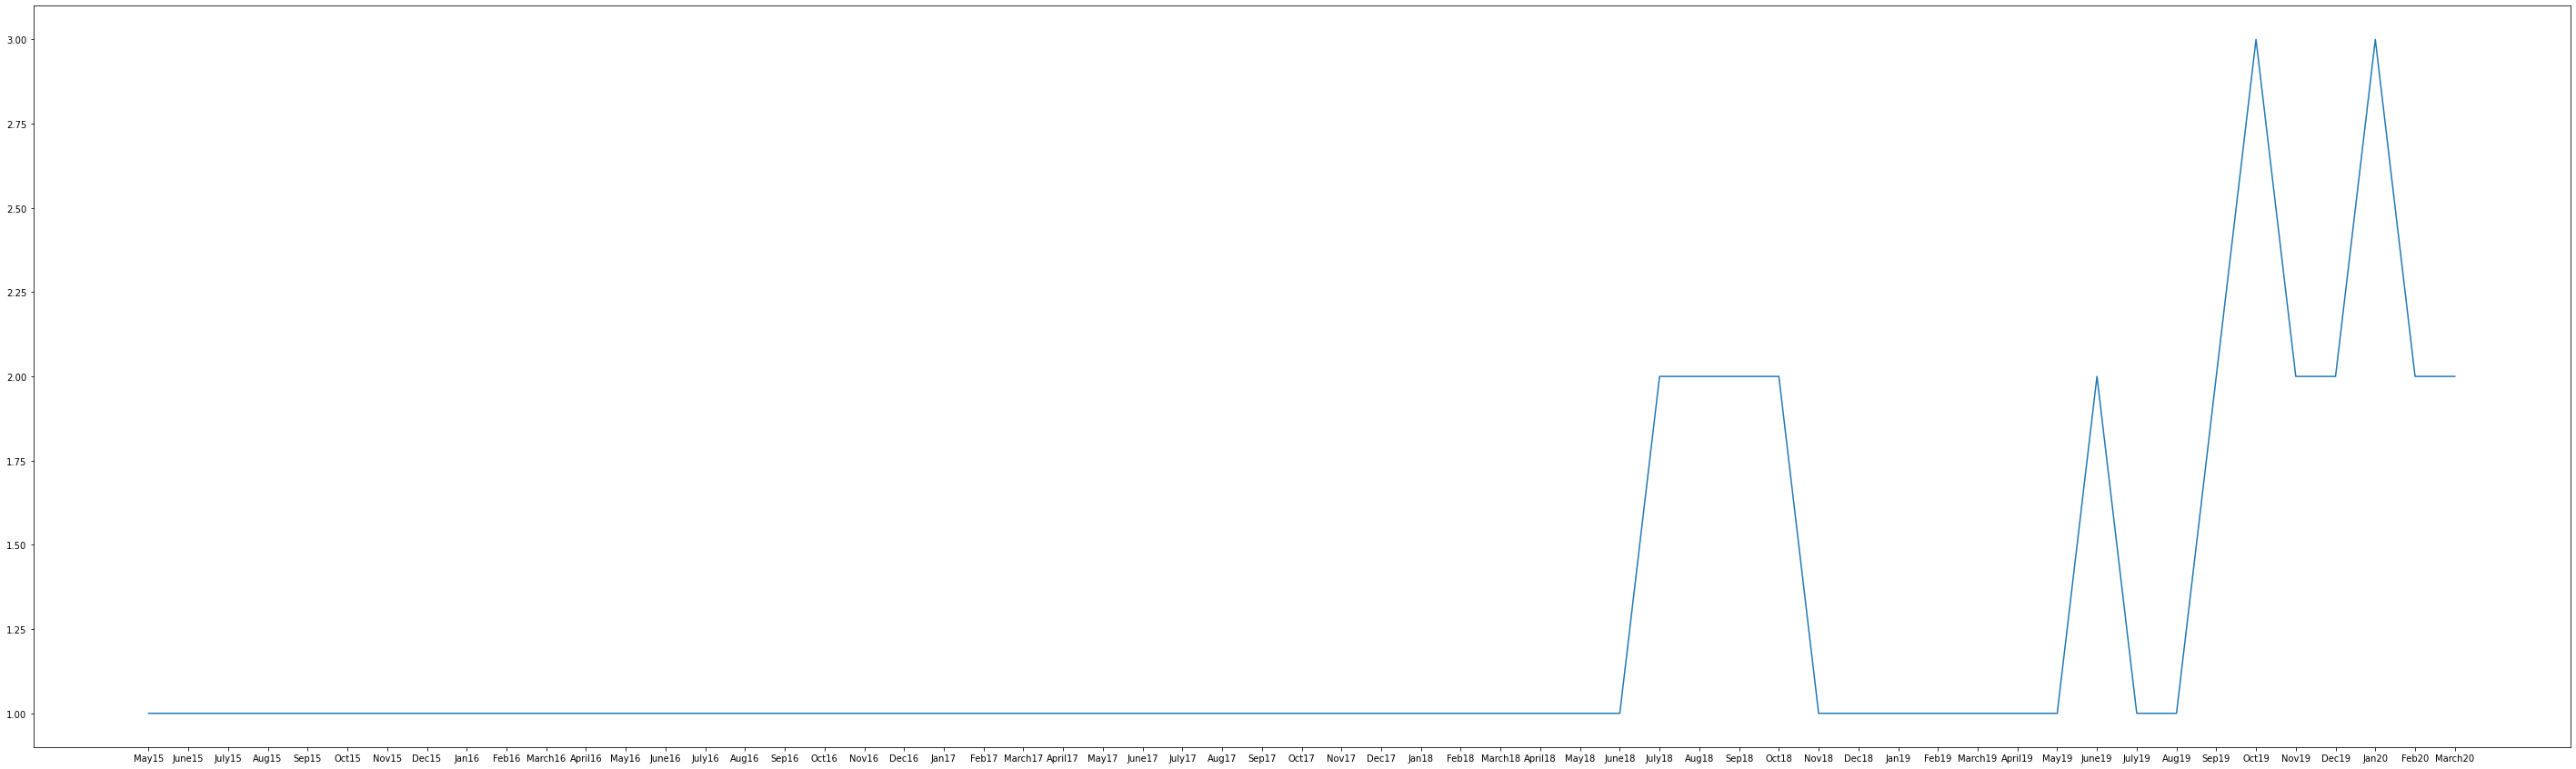


ALLAHABAD
Increase in edges: 5


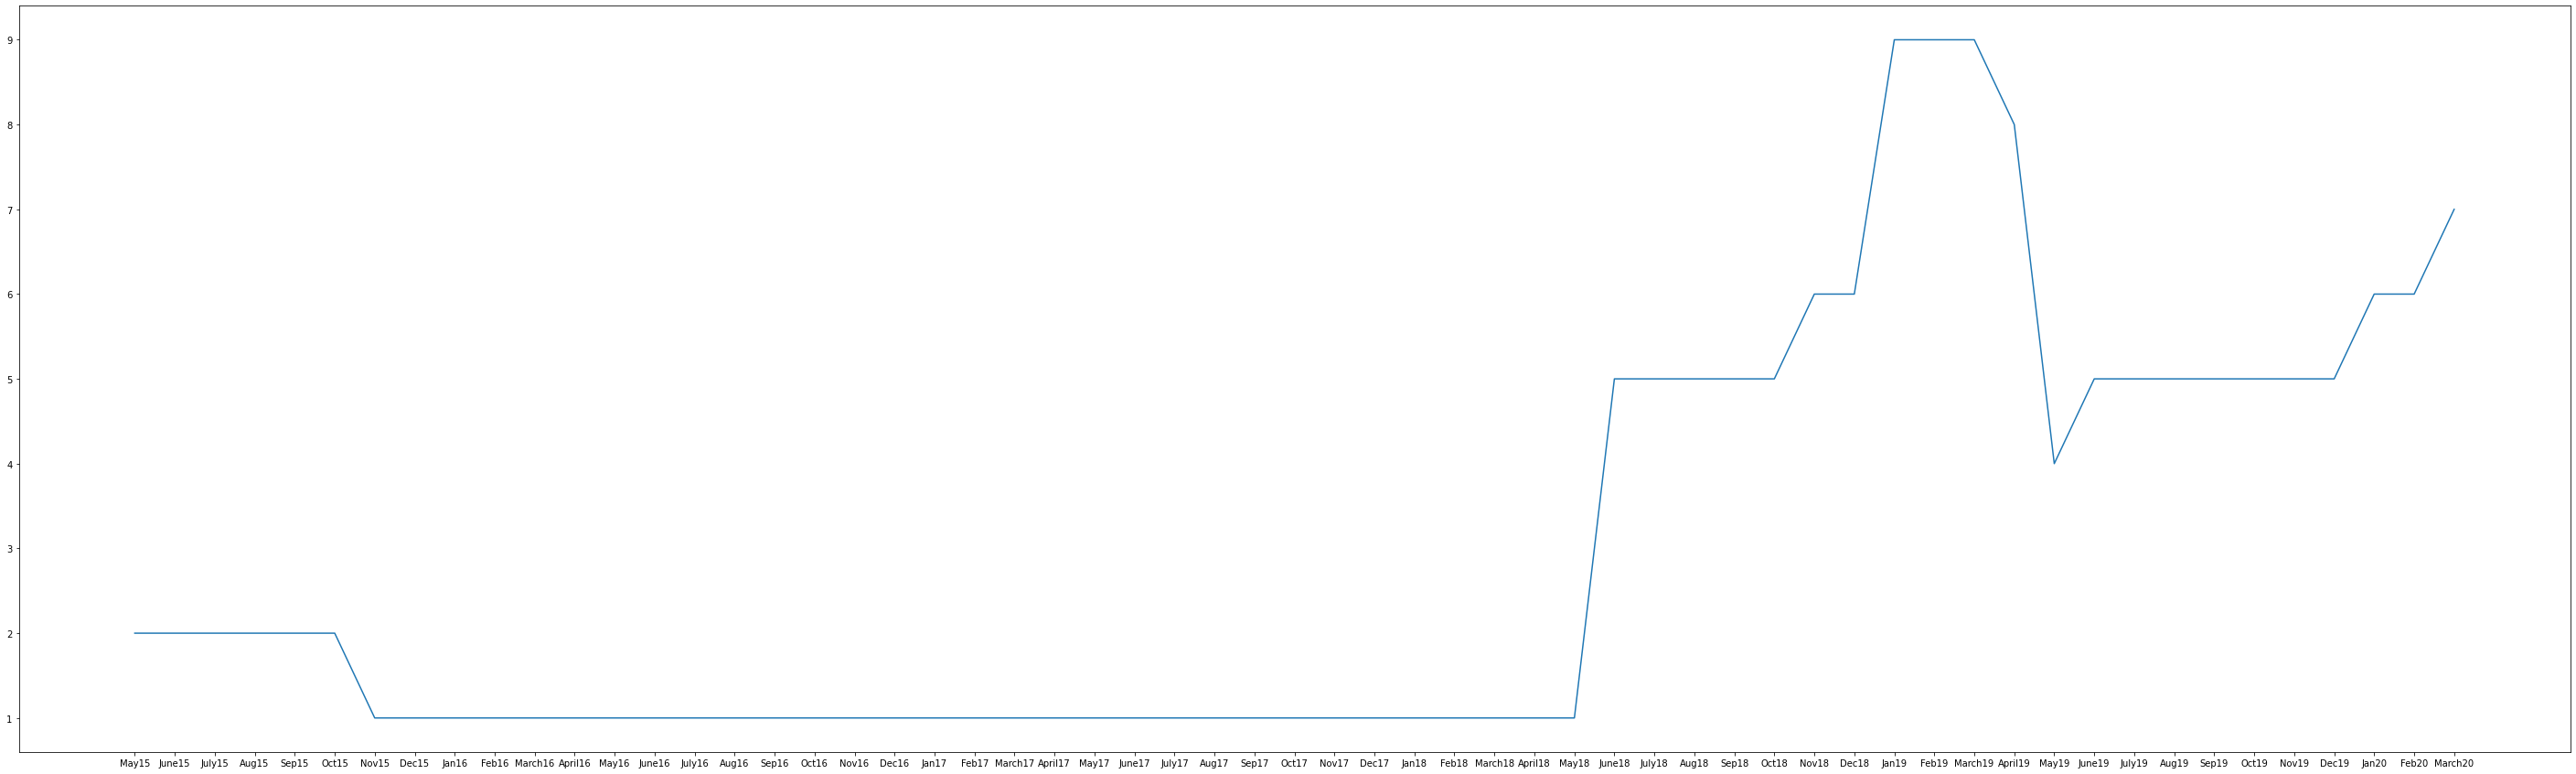


AURANGABAD
Increase in edges: 6


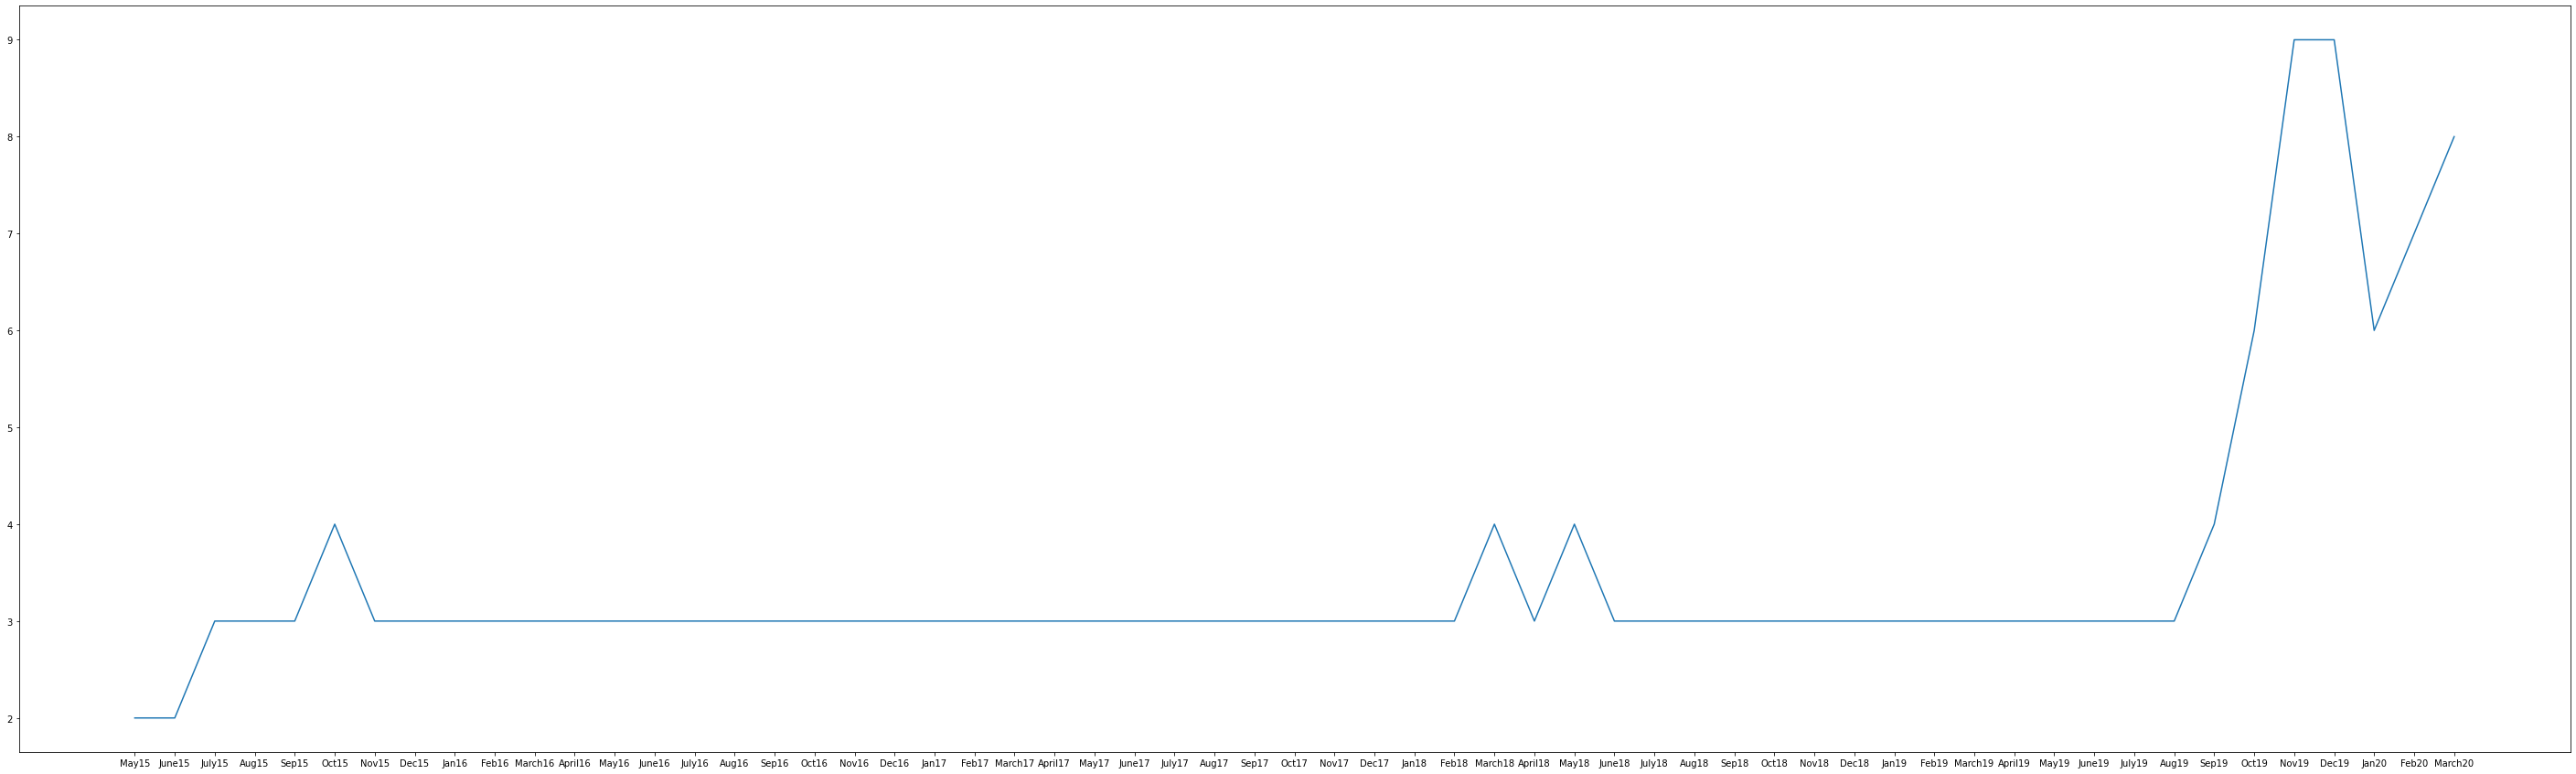


DHARAMSALA
Increase in edges: 2


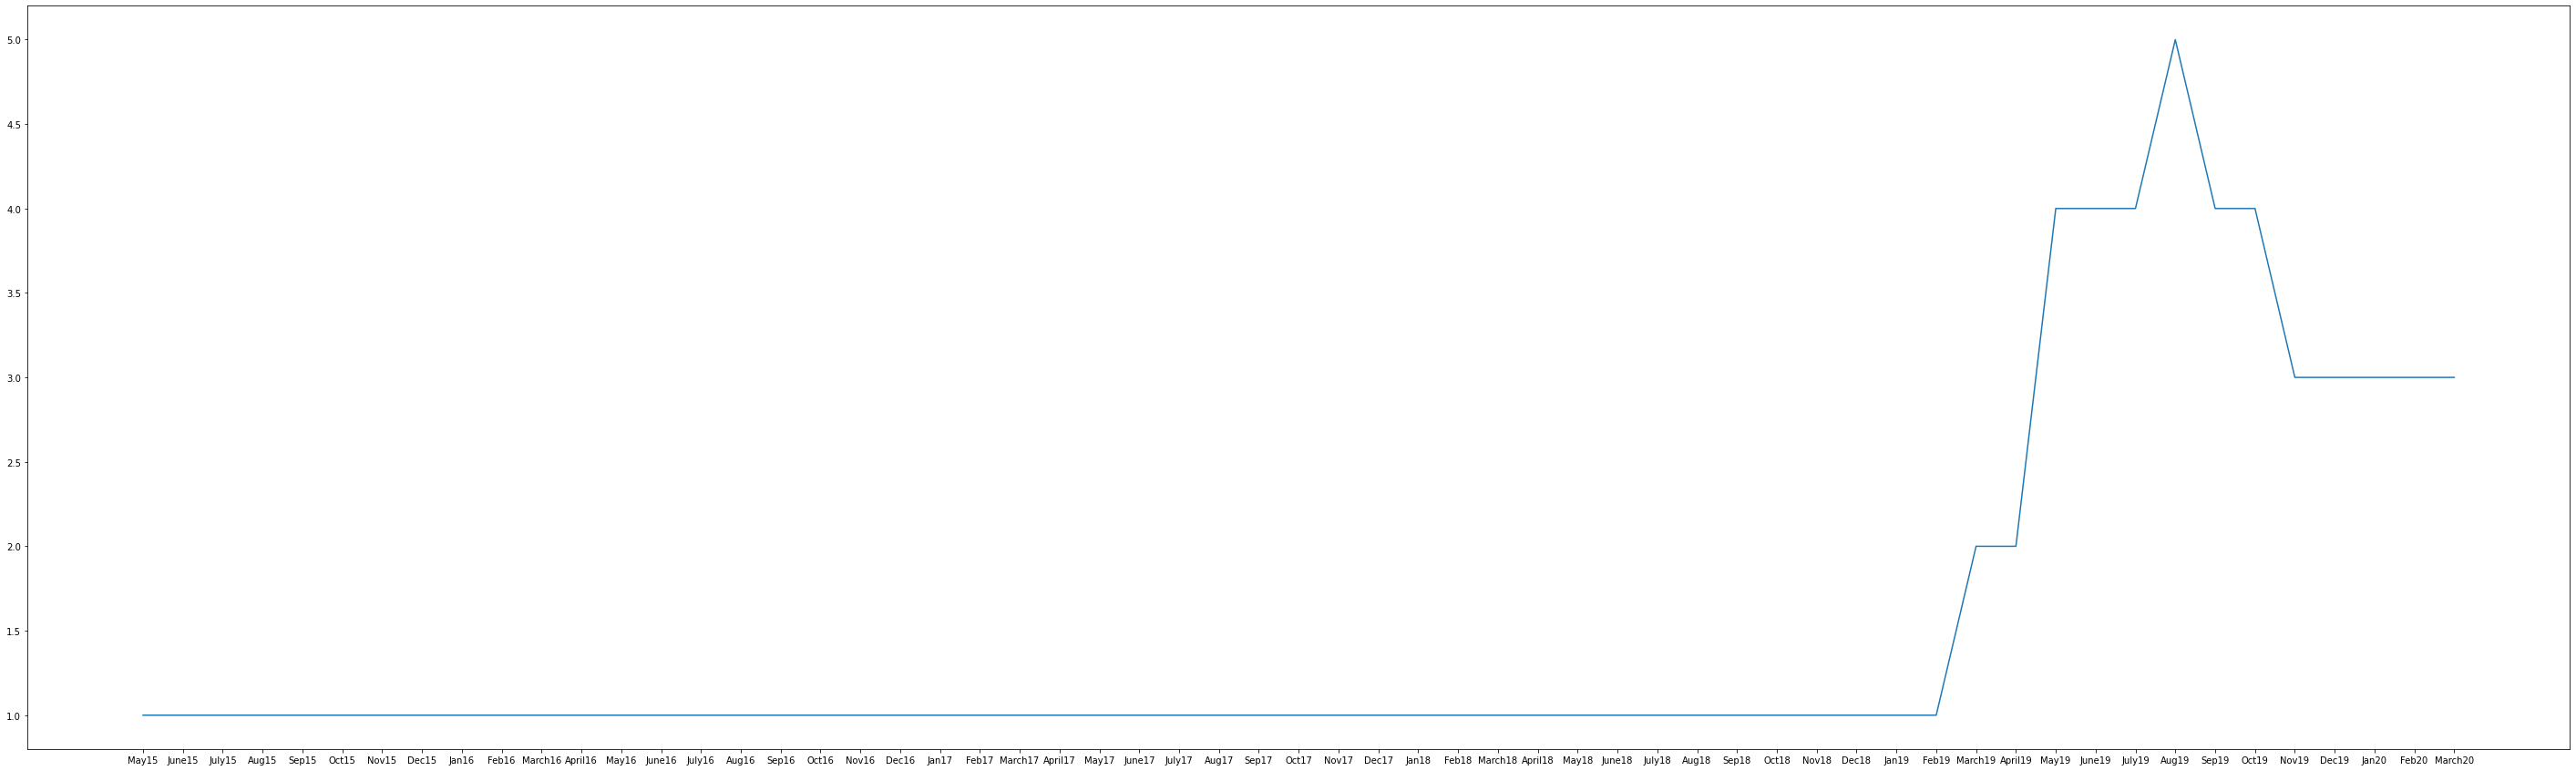


DIMAPUR
Increase in edges: 1


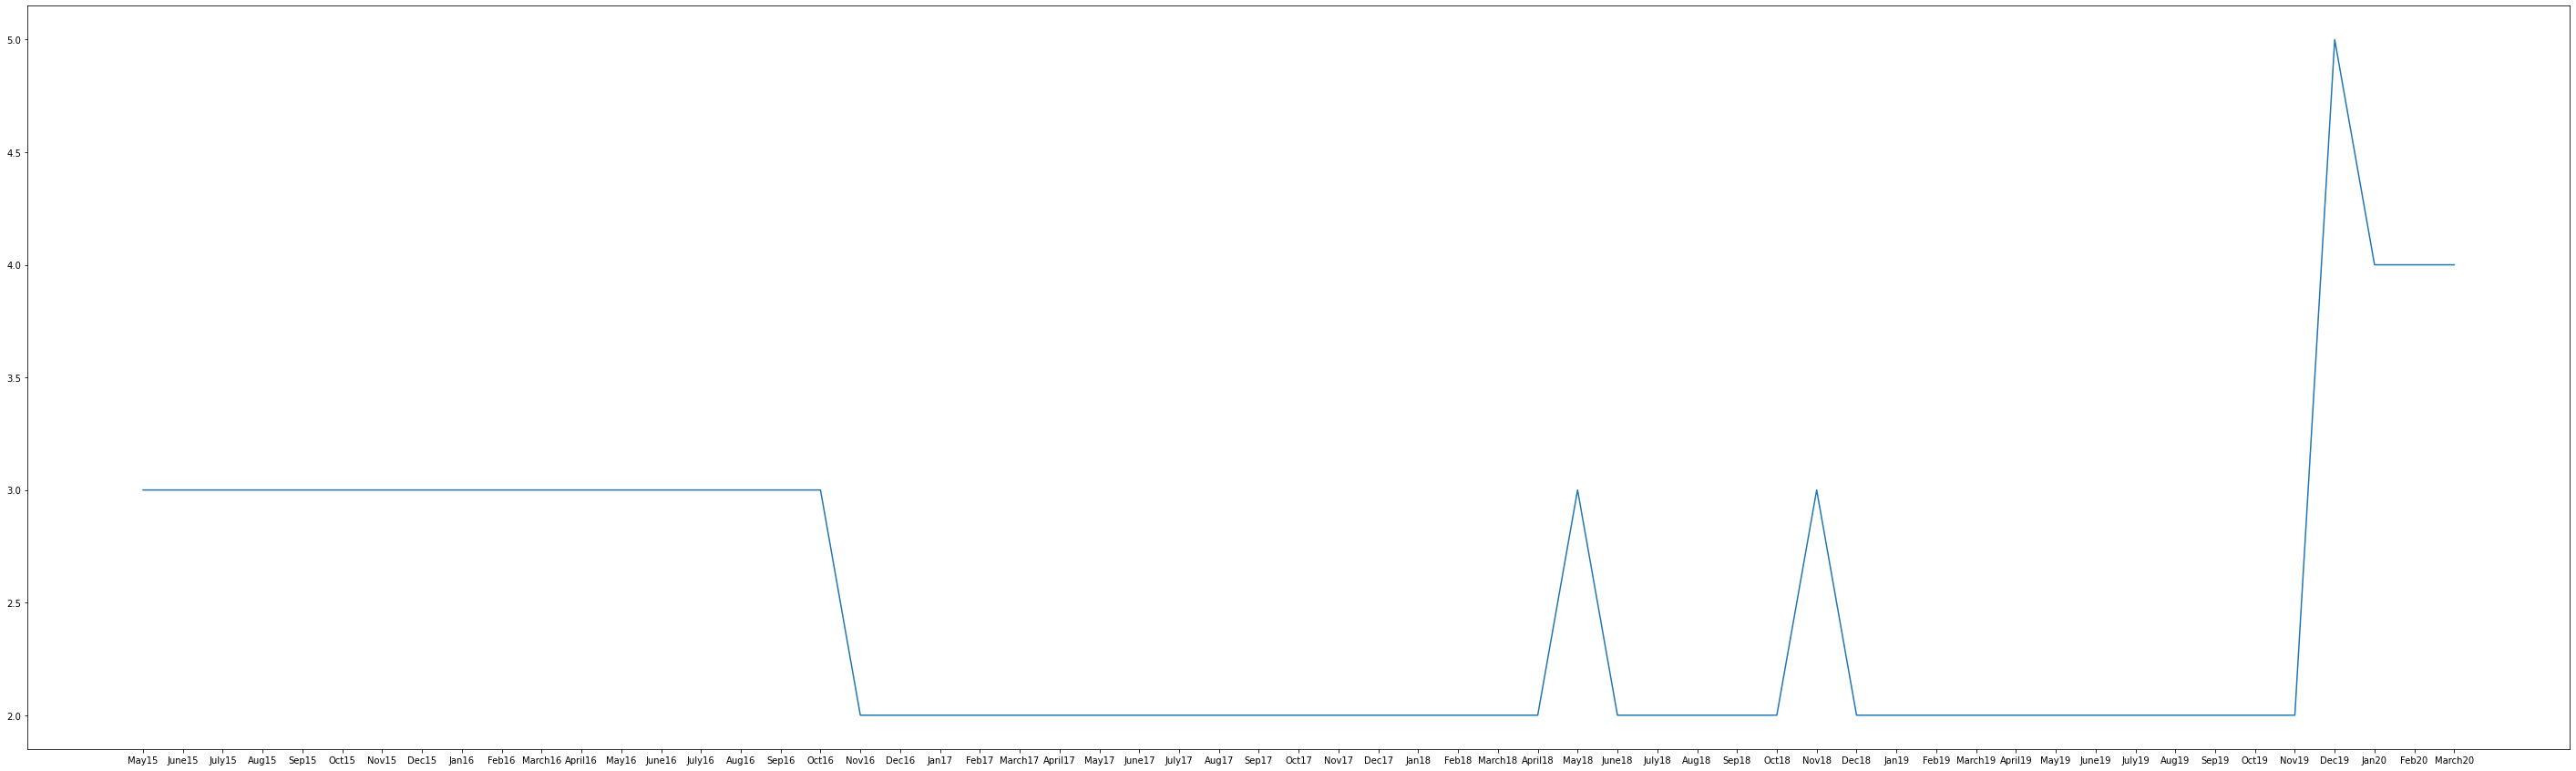


GAYA
Increase in edges: 1


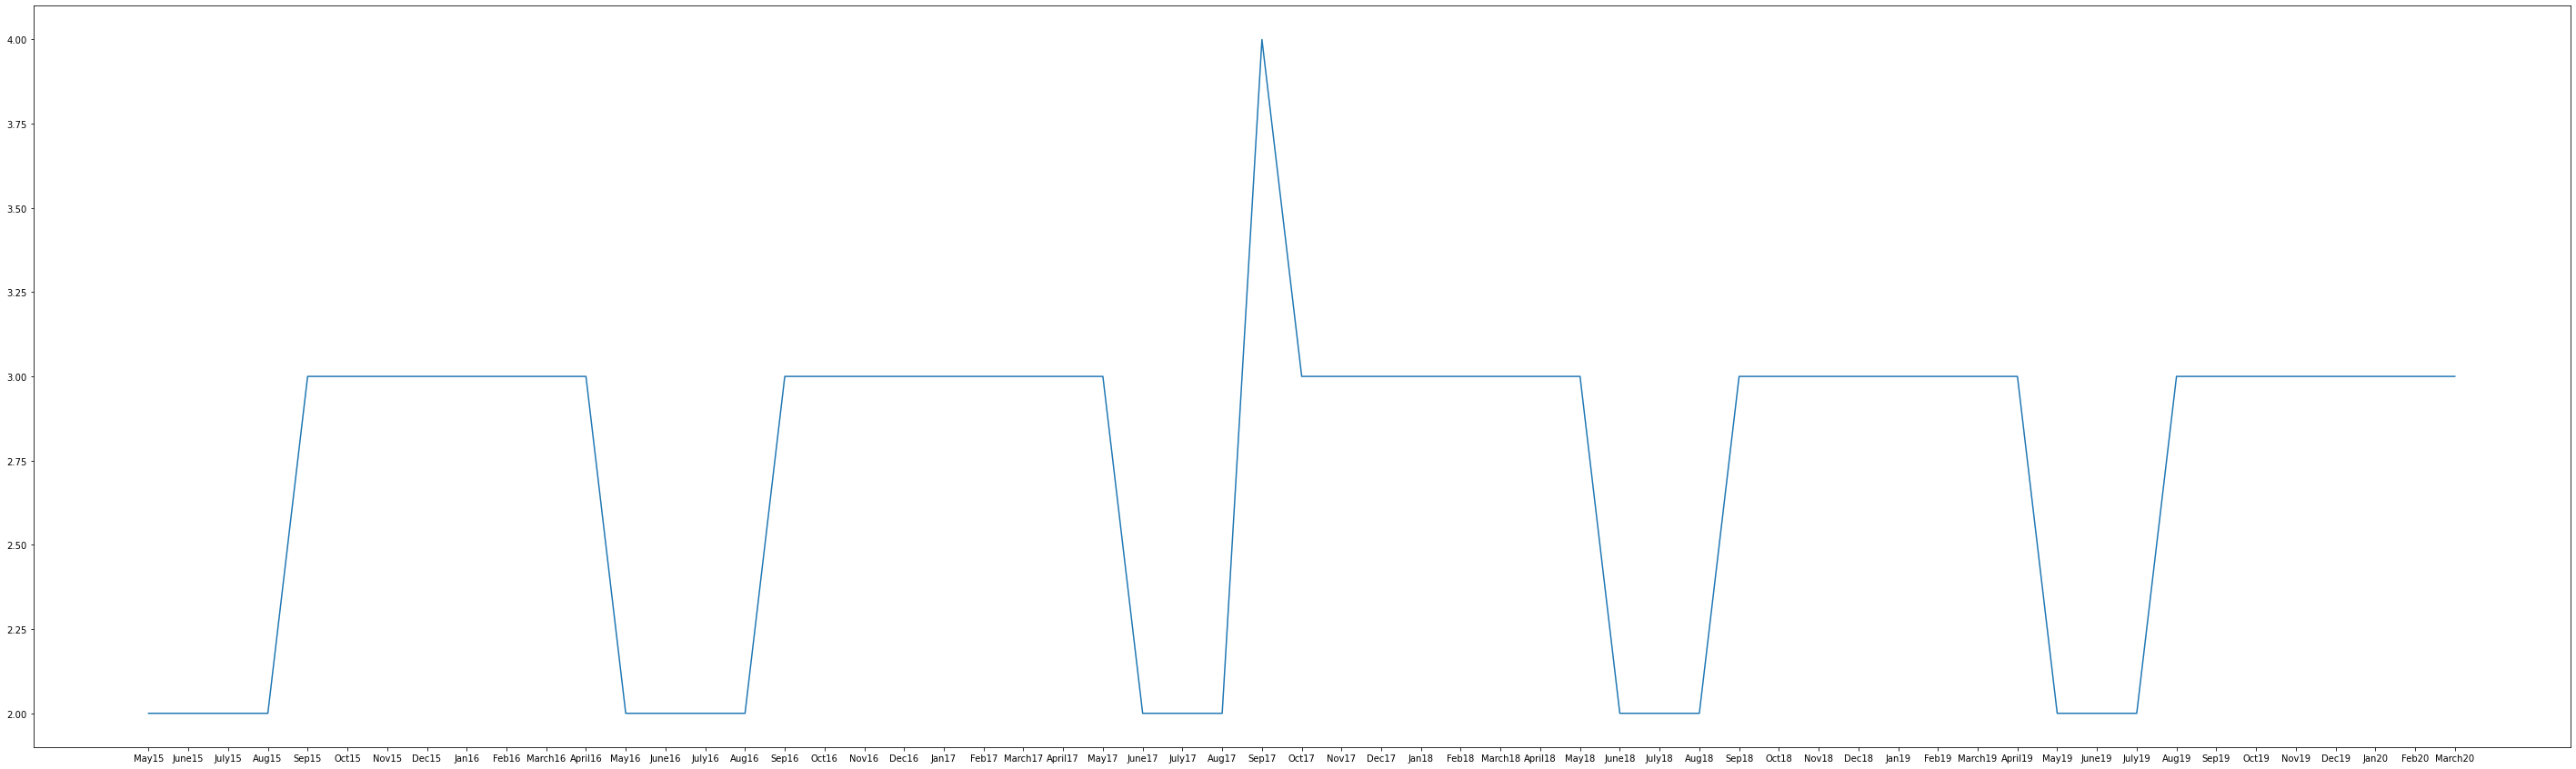


GWALIOR
Increase in edges: 4


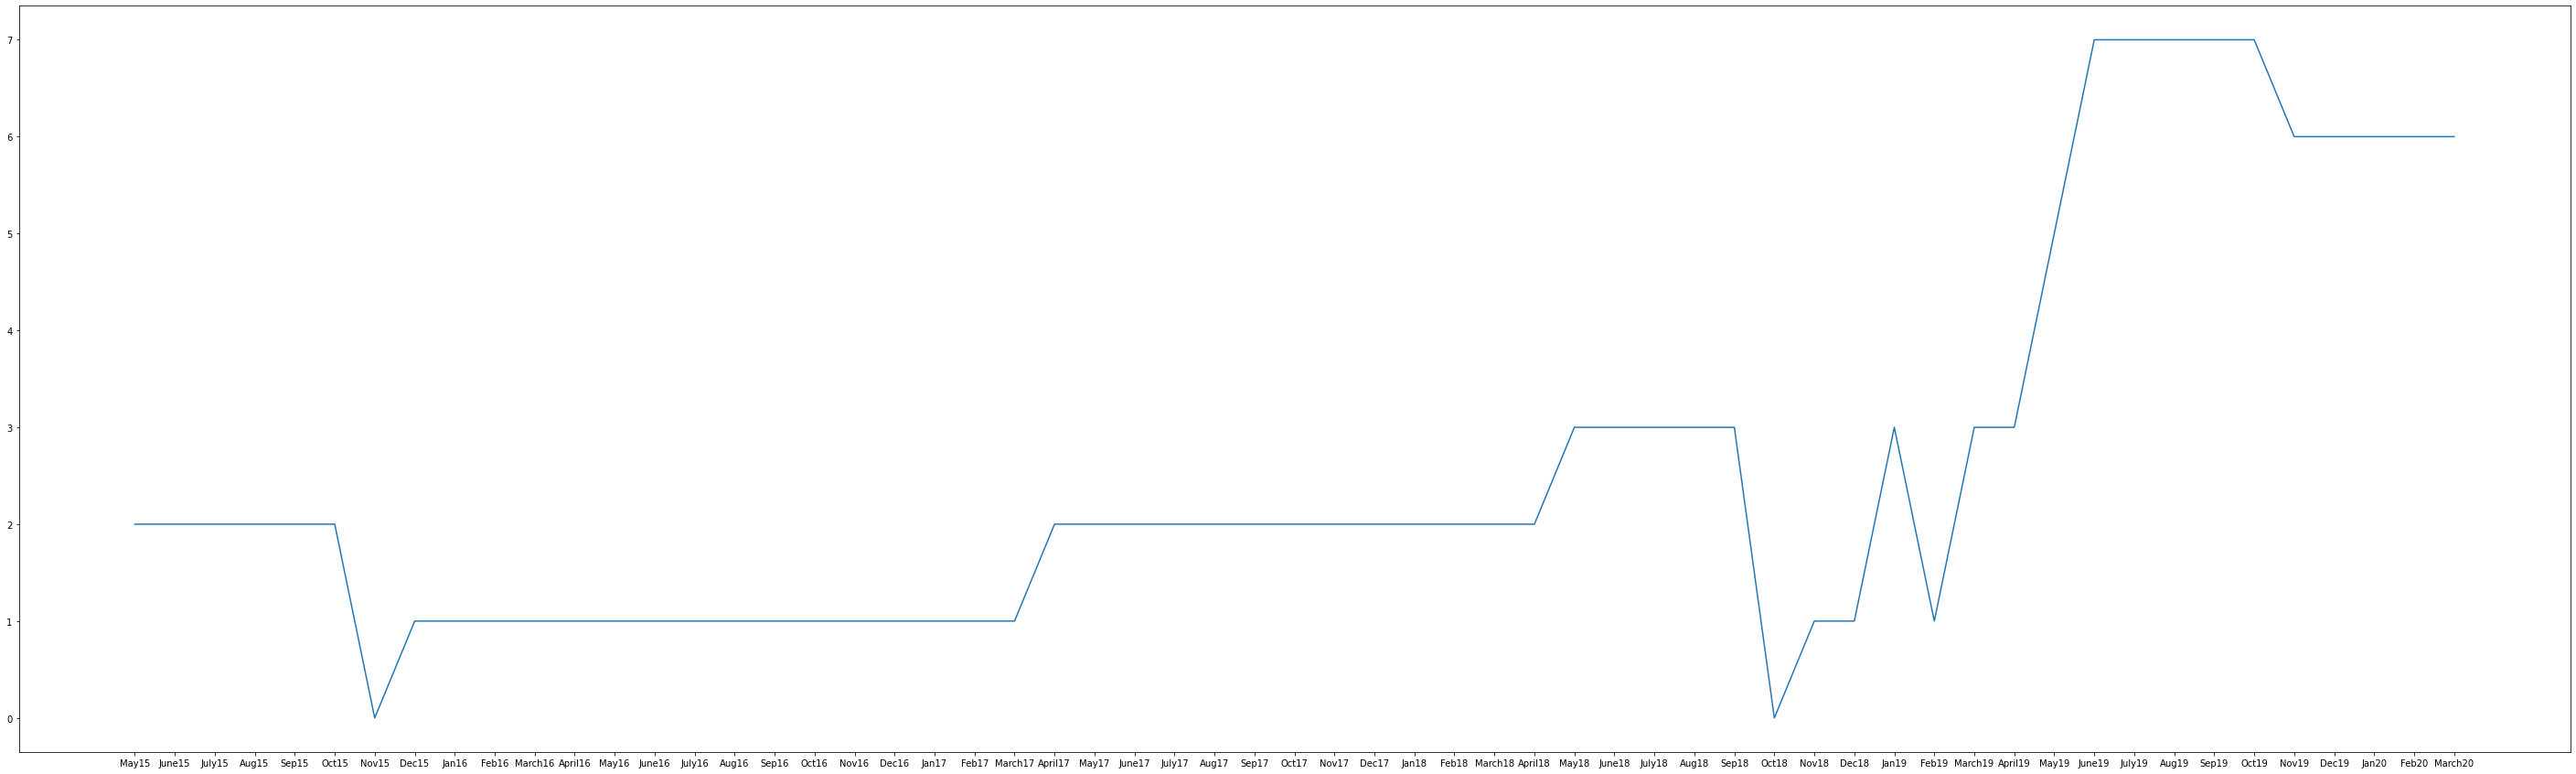


JAMMU
Increase in edges: 4


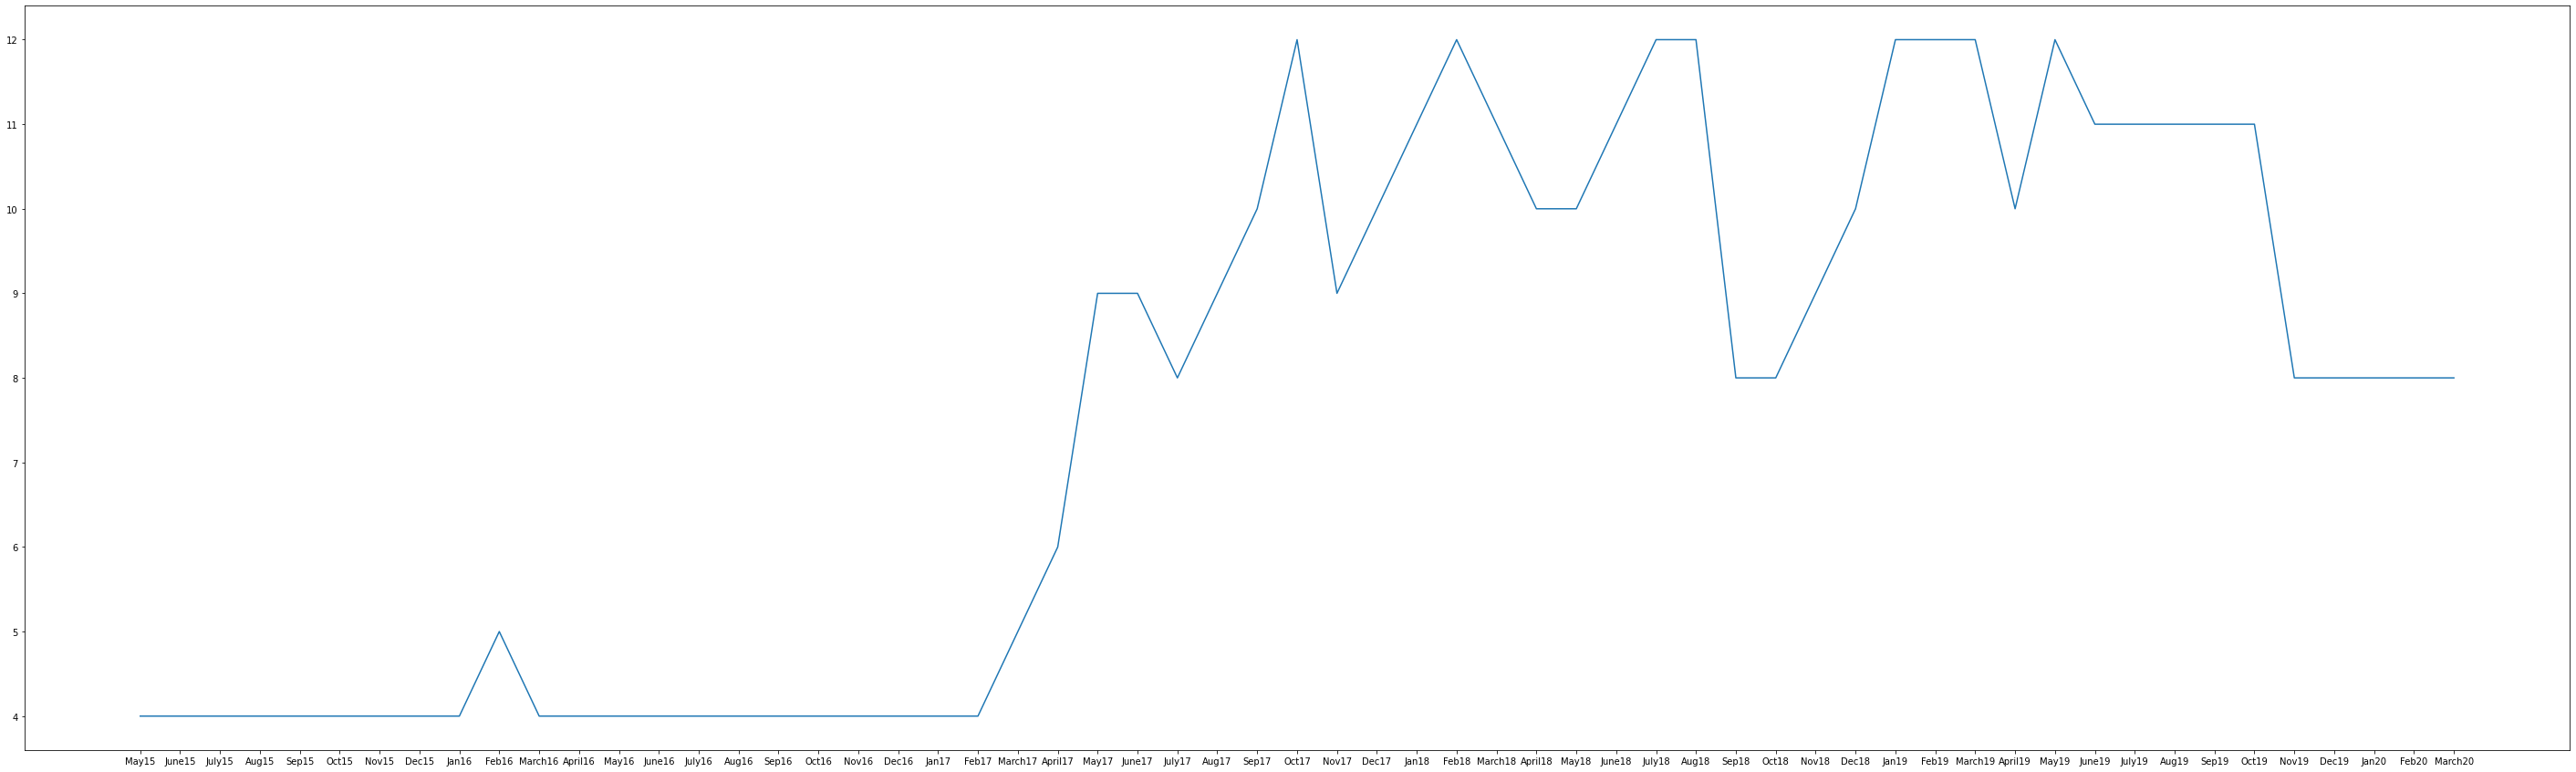


KHAJURAHO
Increase in edges: 0


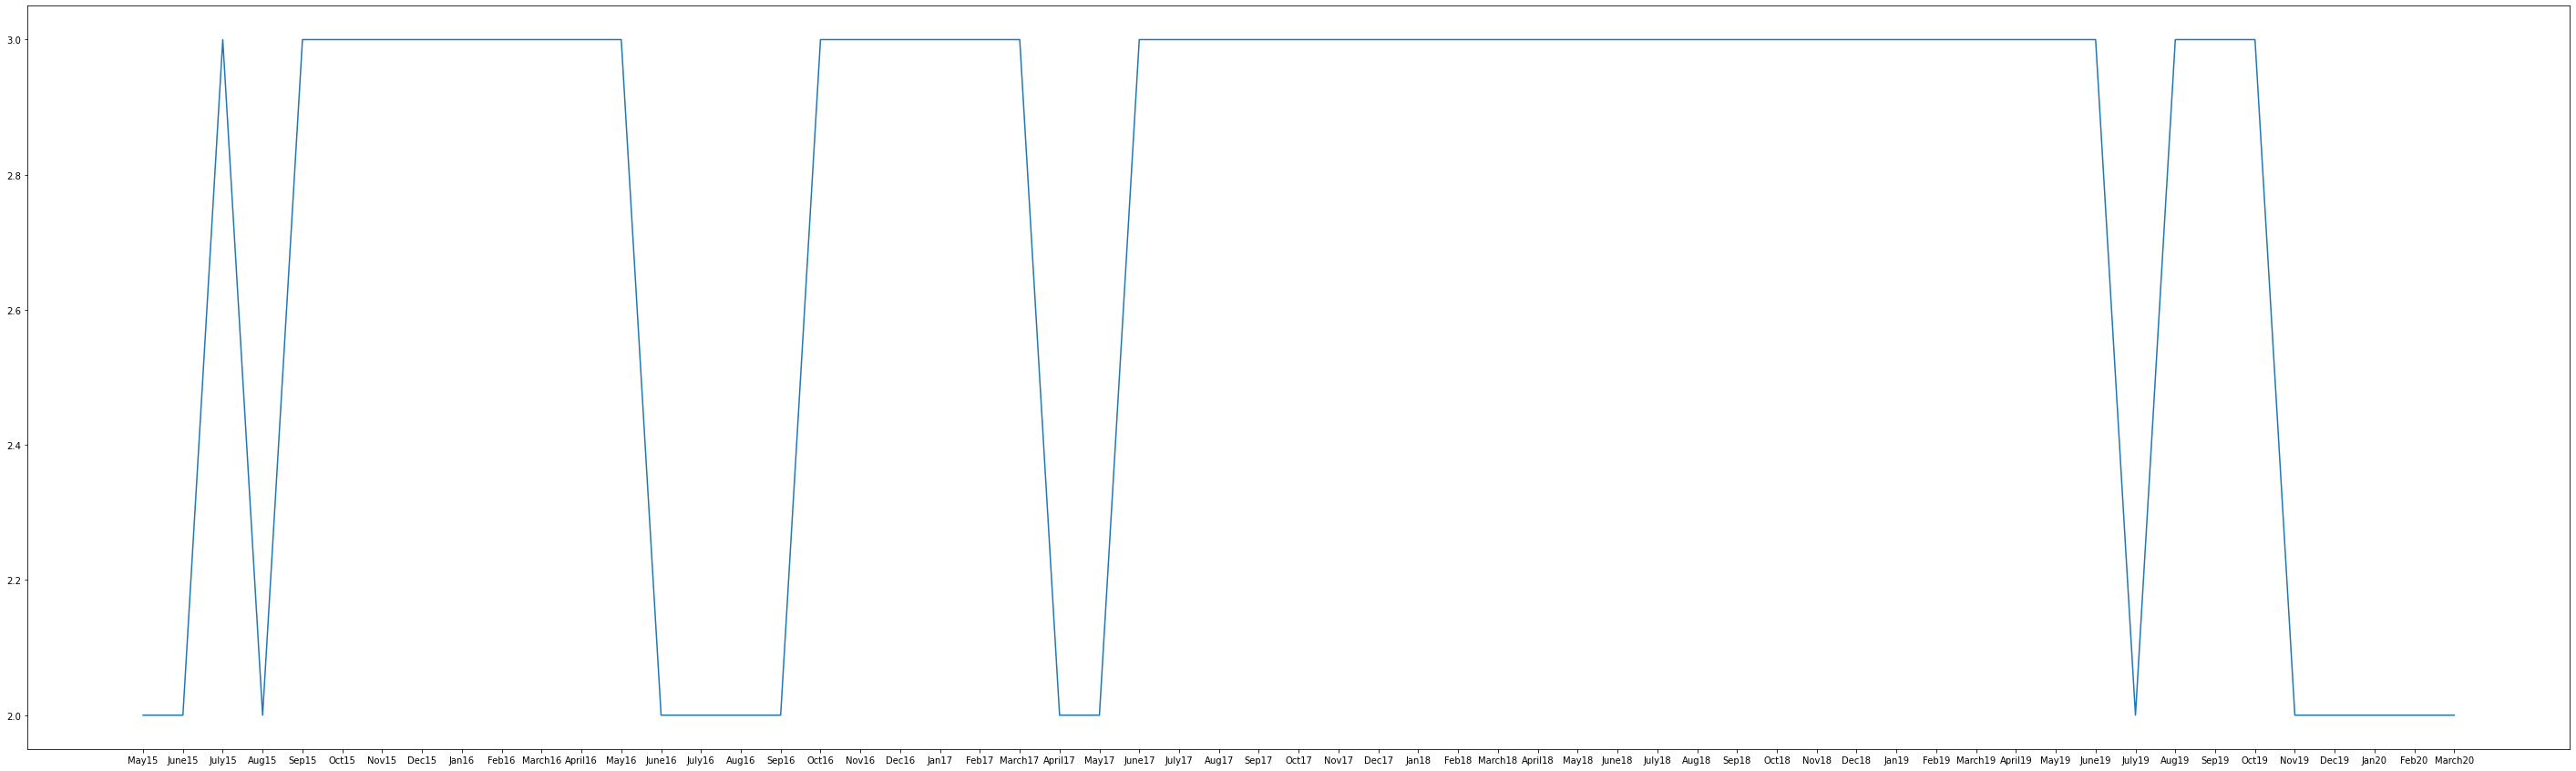


KULLU
Increase in edges: 2


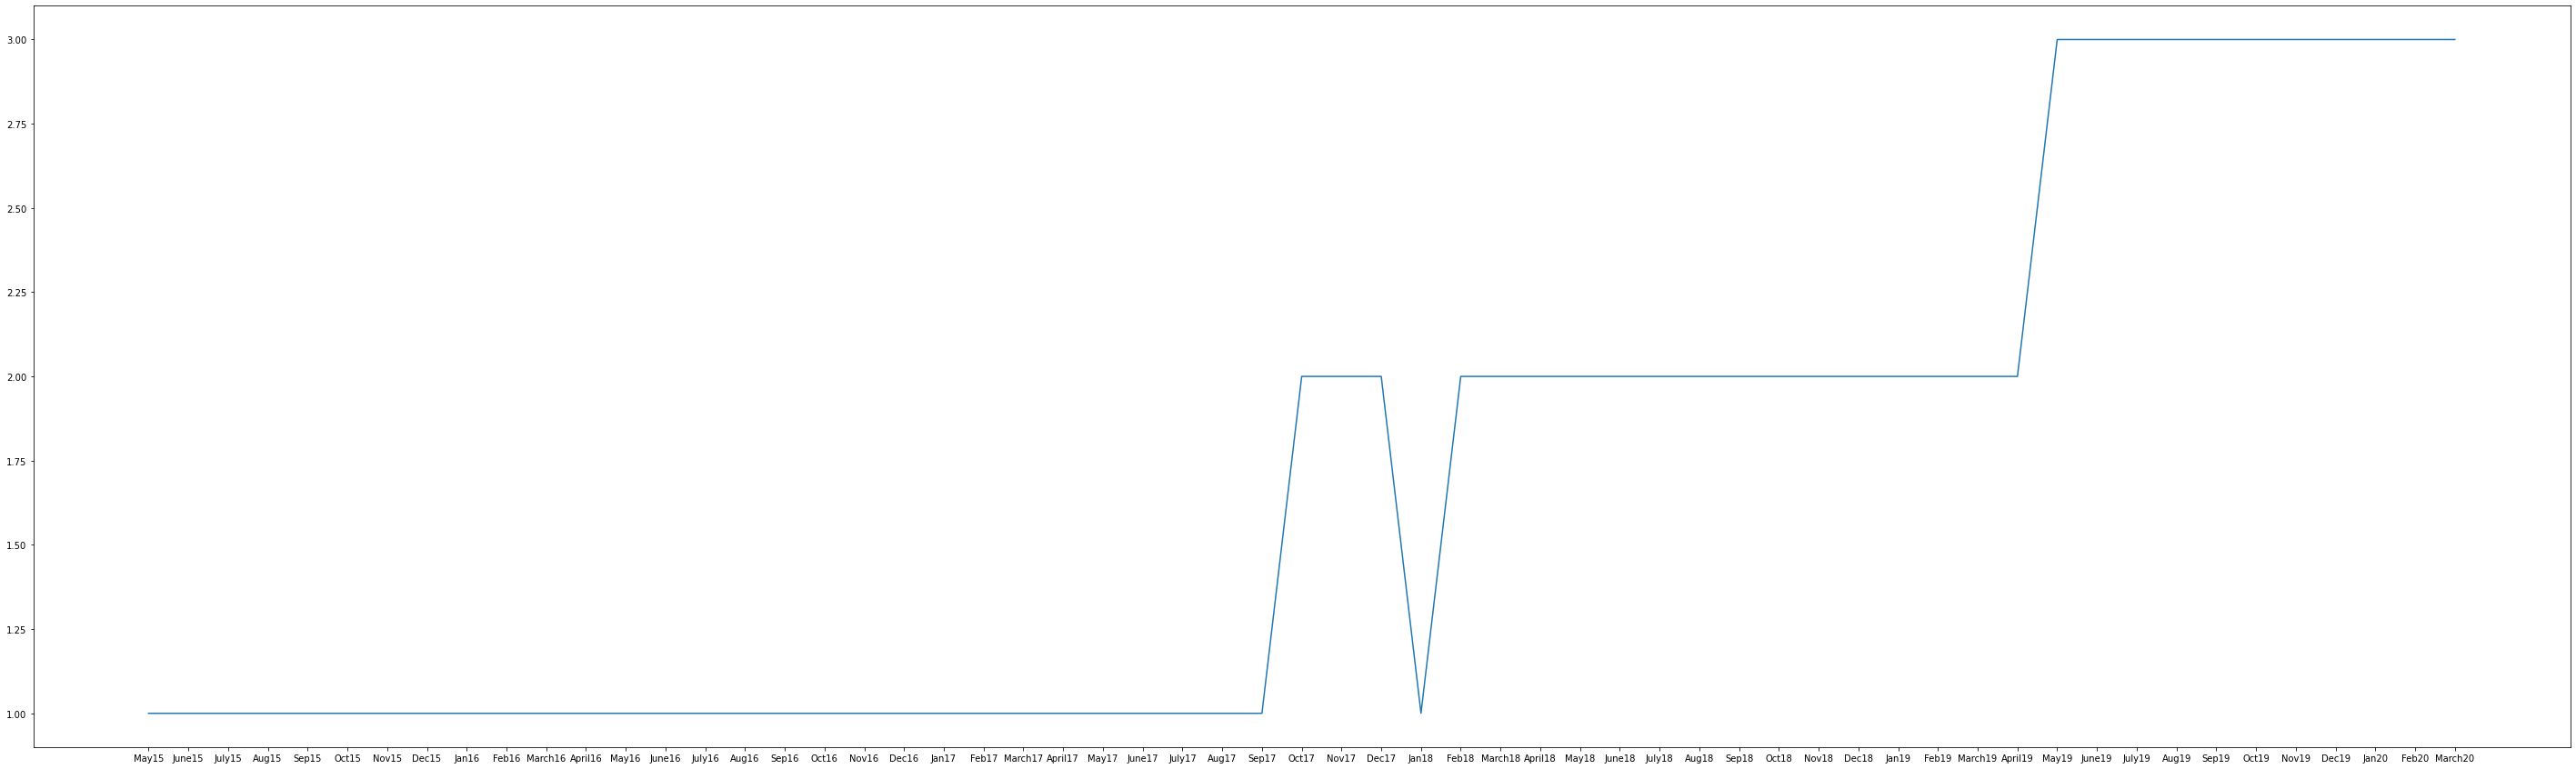


LEH
Increase in edges: 1


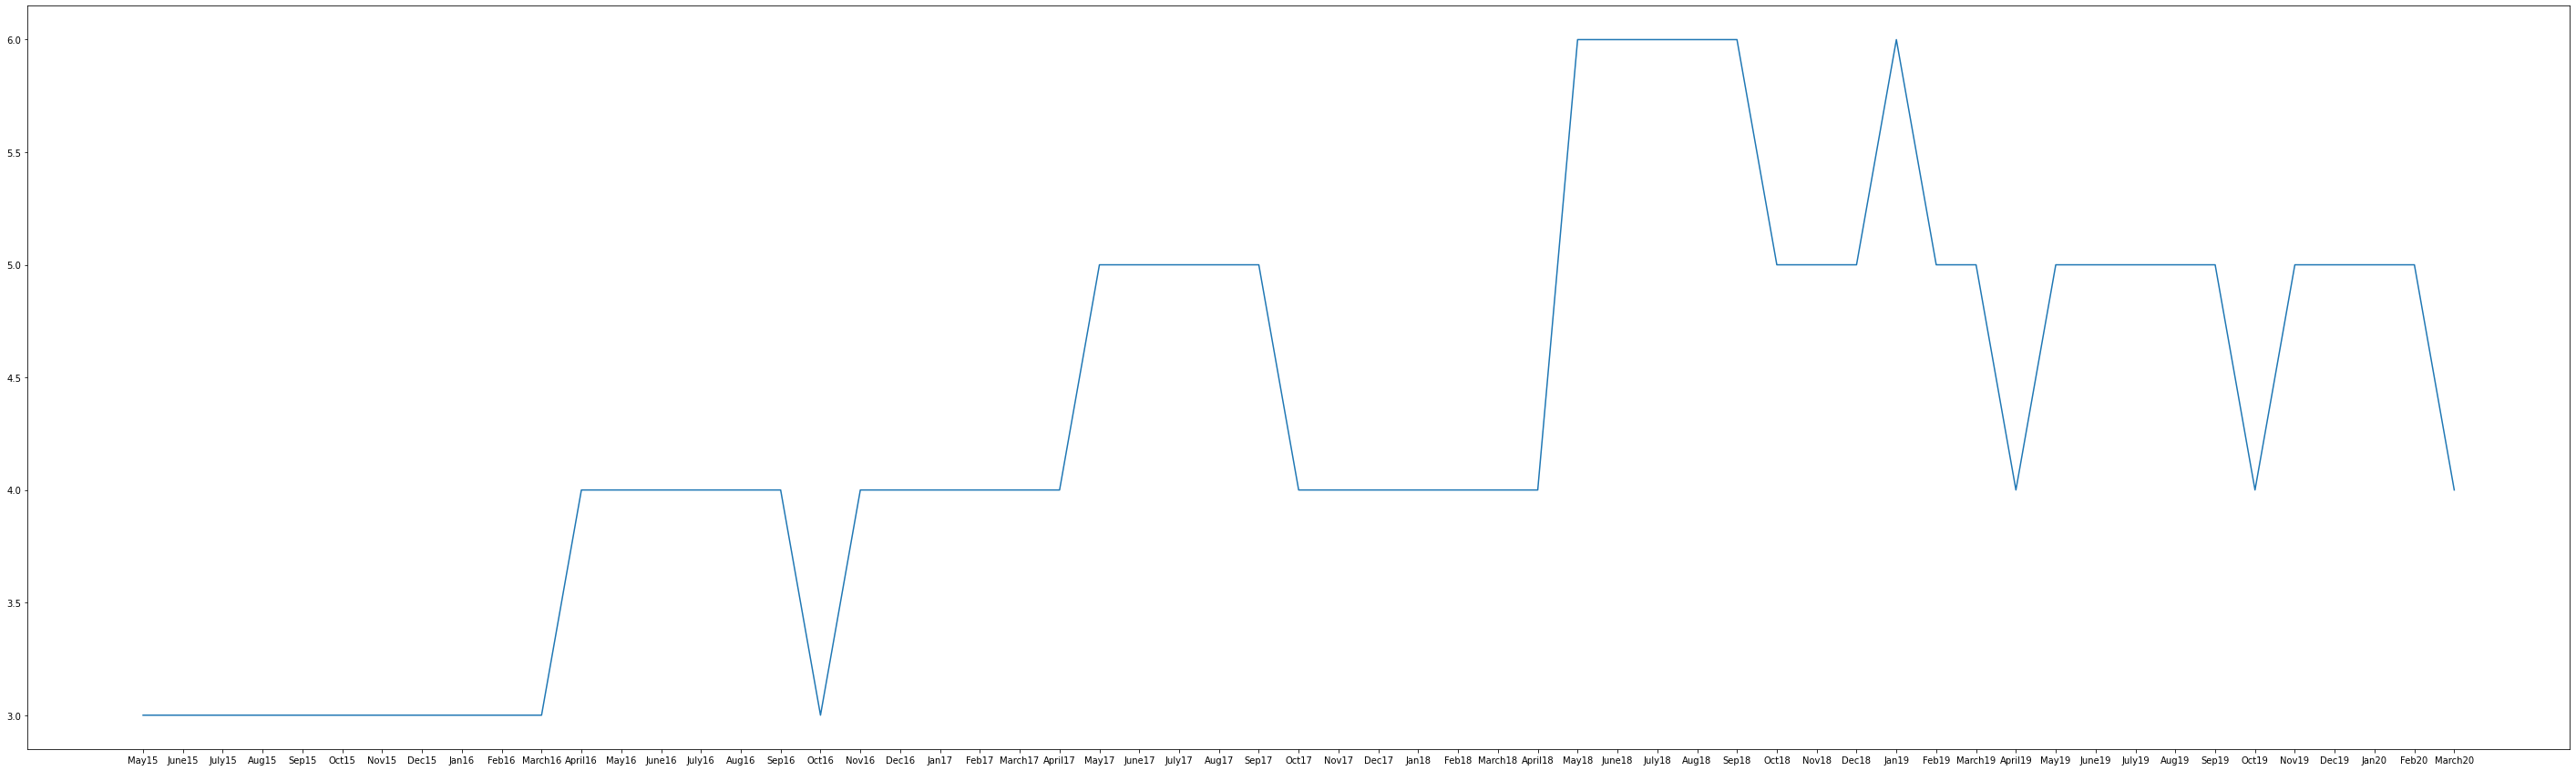


PANTNAGAR
Increase in edges: 1


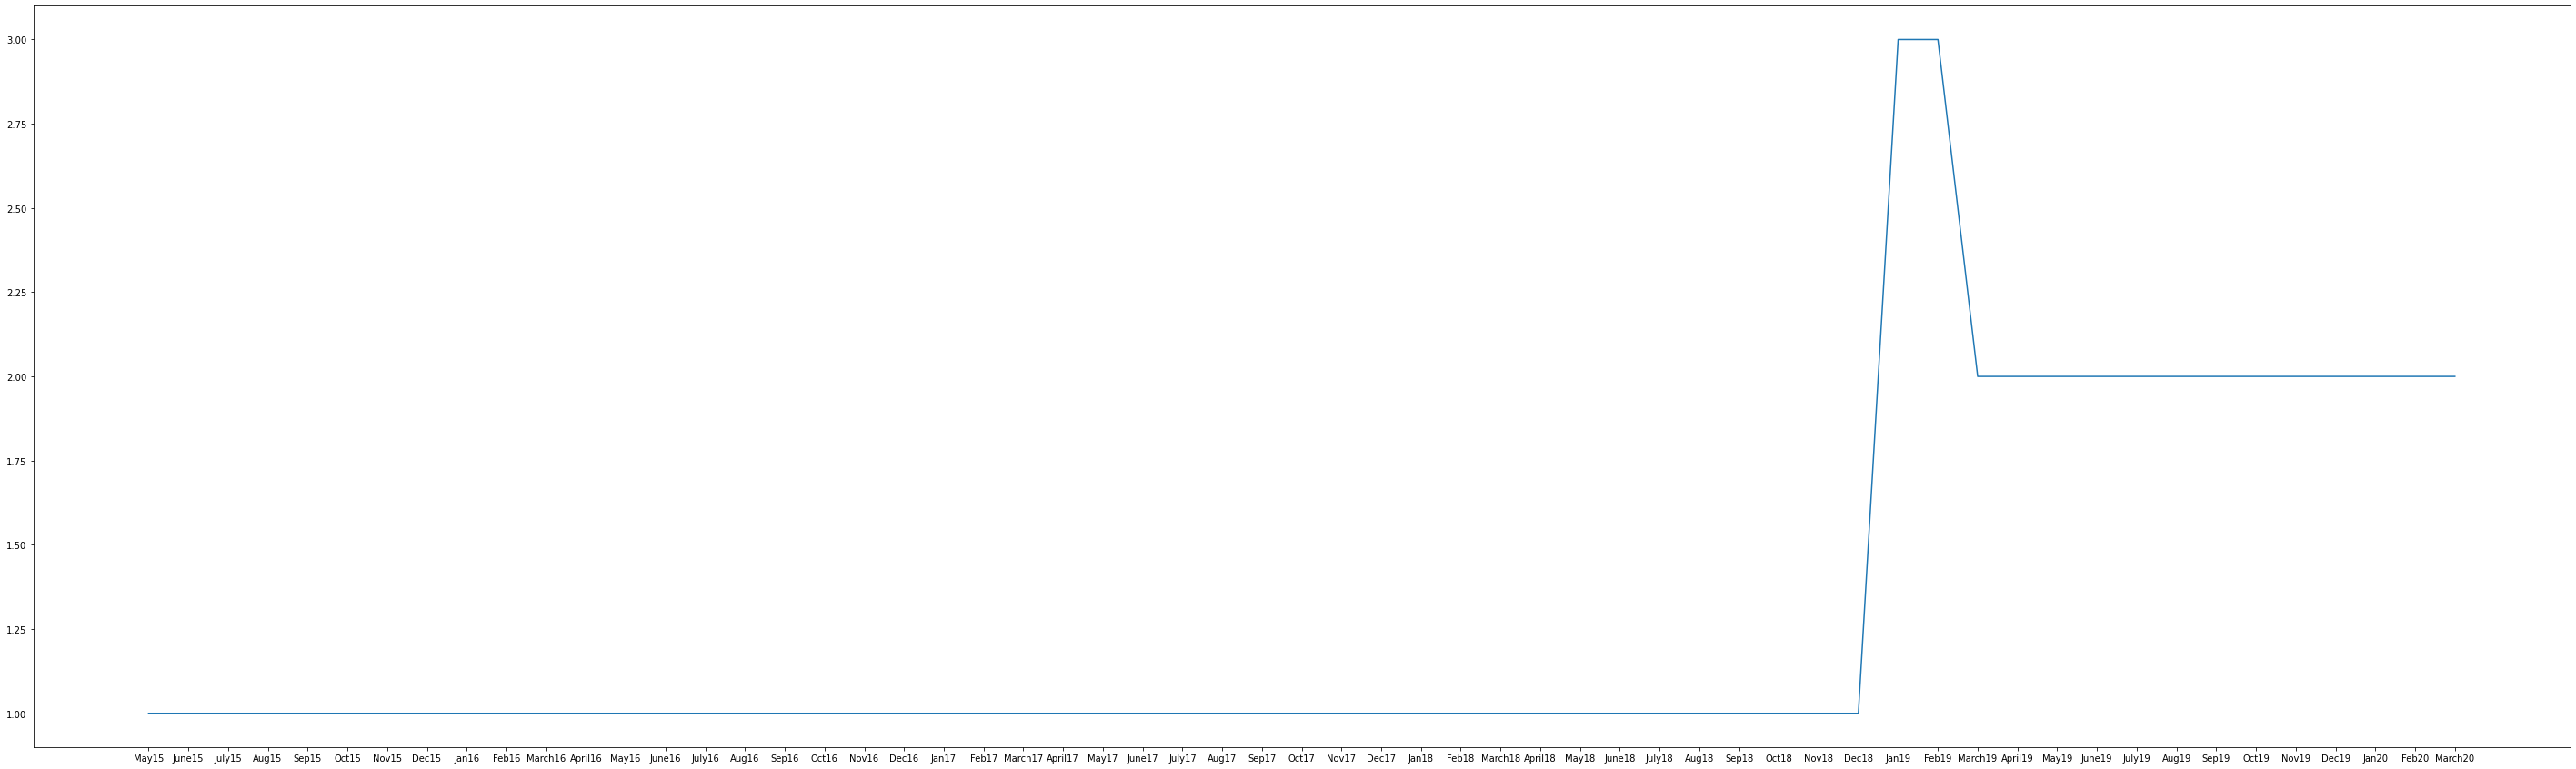


SURAT
Increase in edges: 13


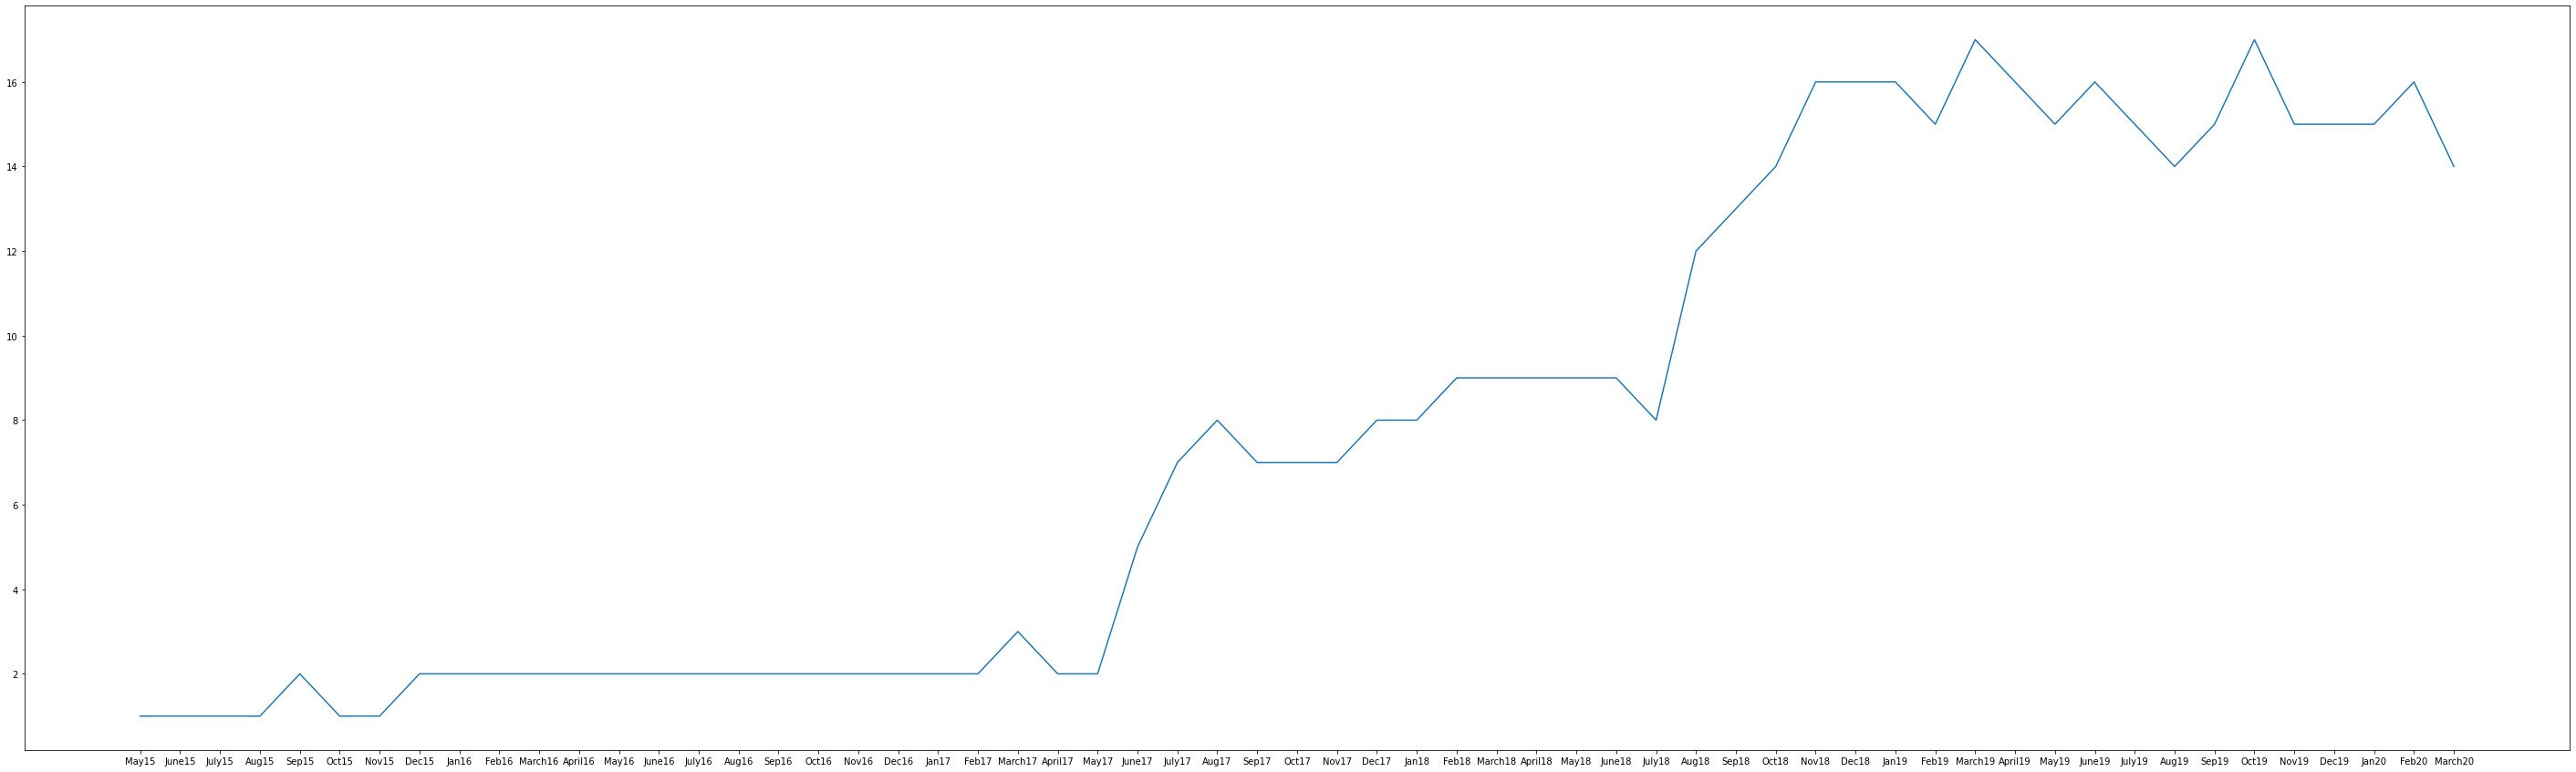


TIRUPATI
Increase in edges: 6


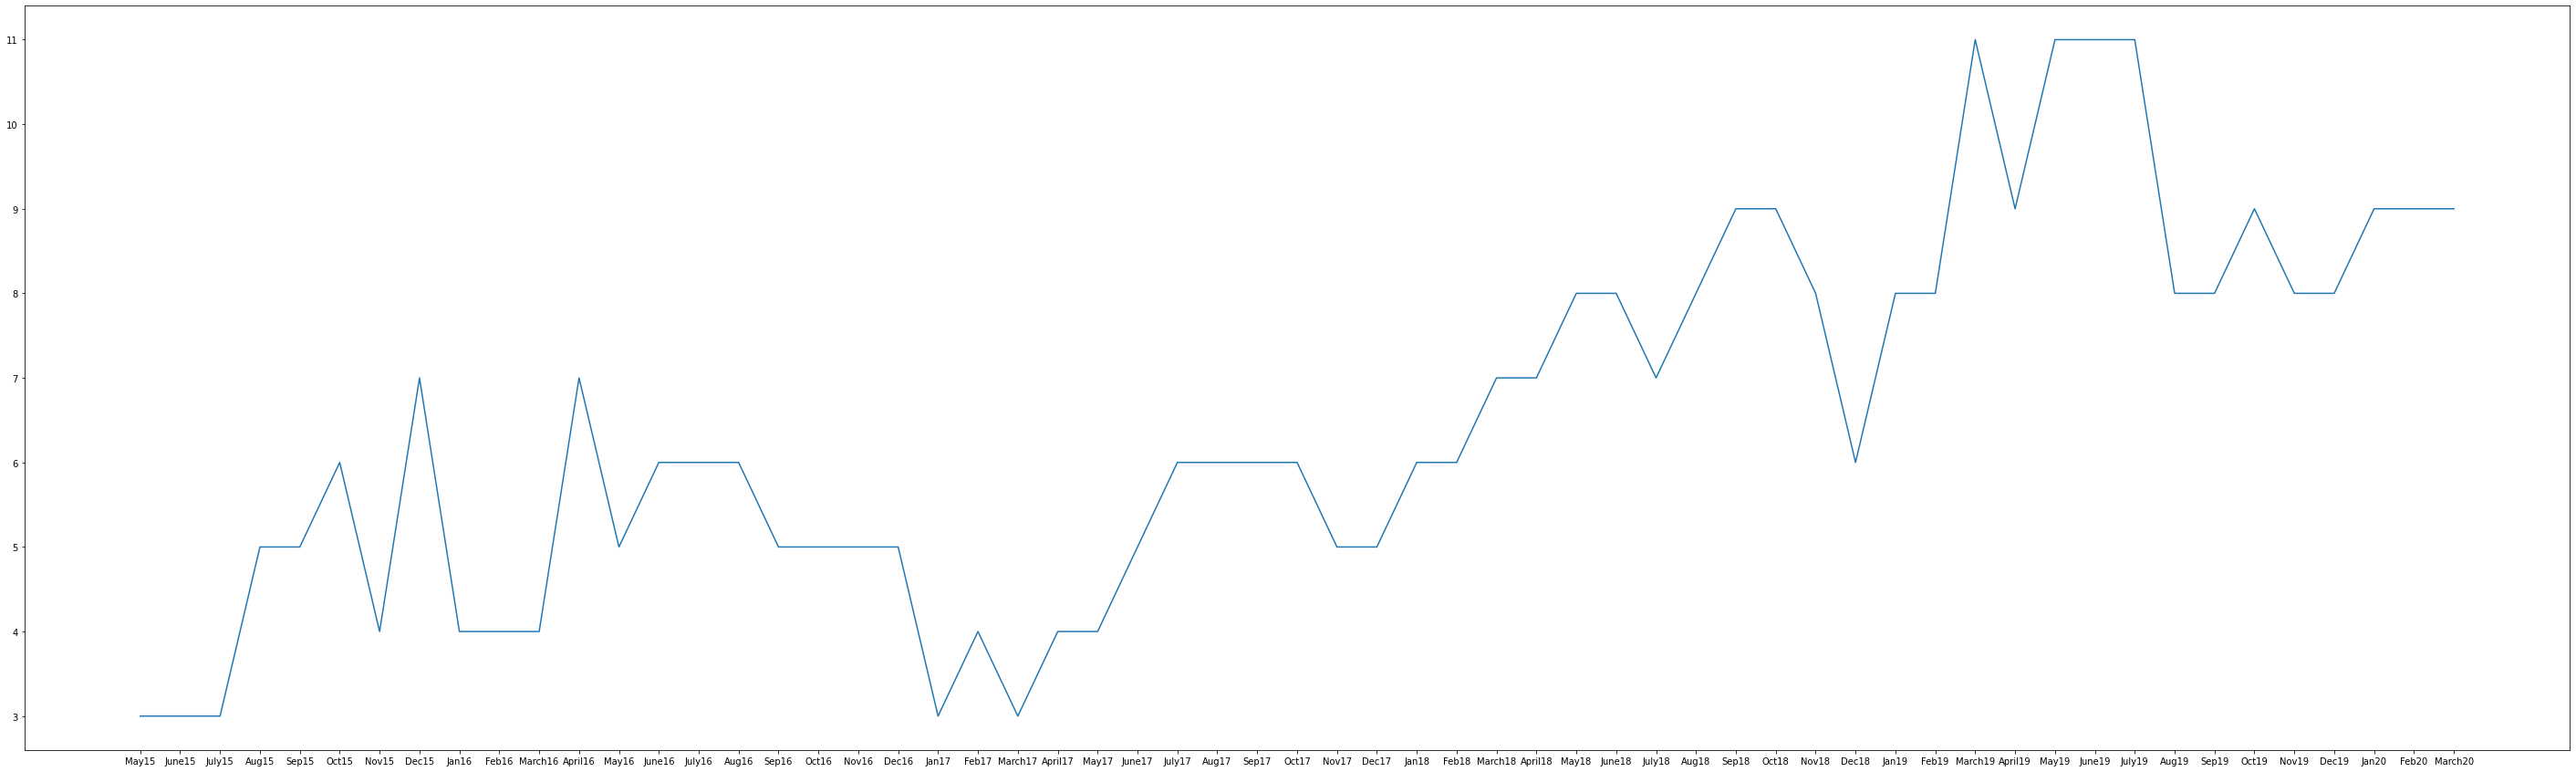


UDAIPUR
Increase in edges: 12


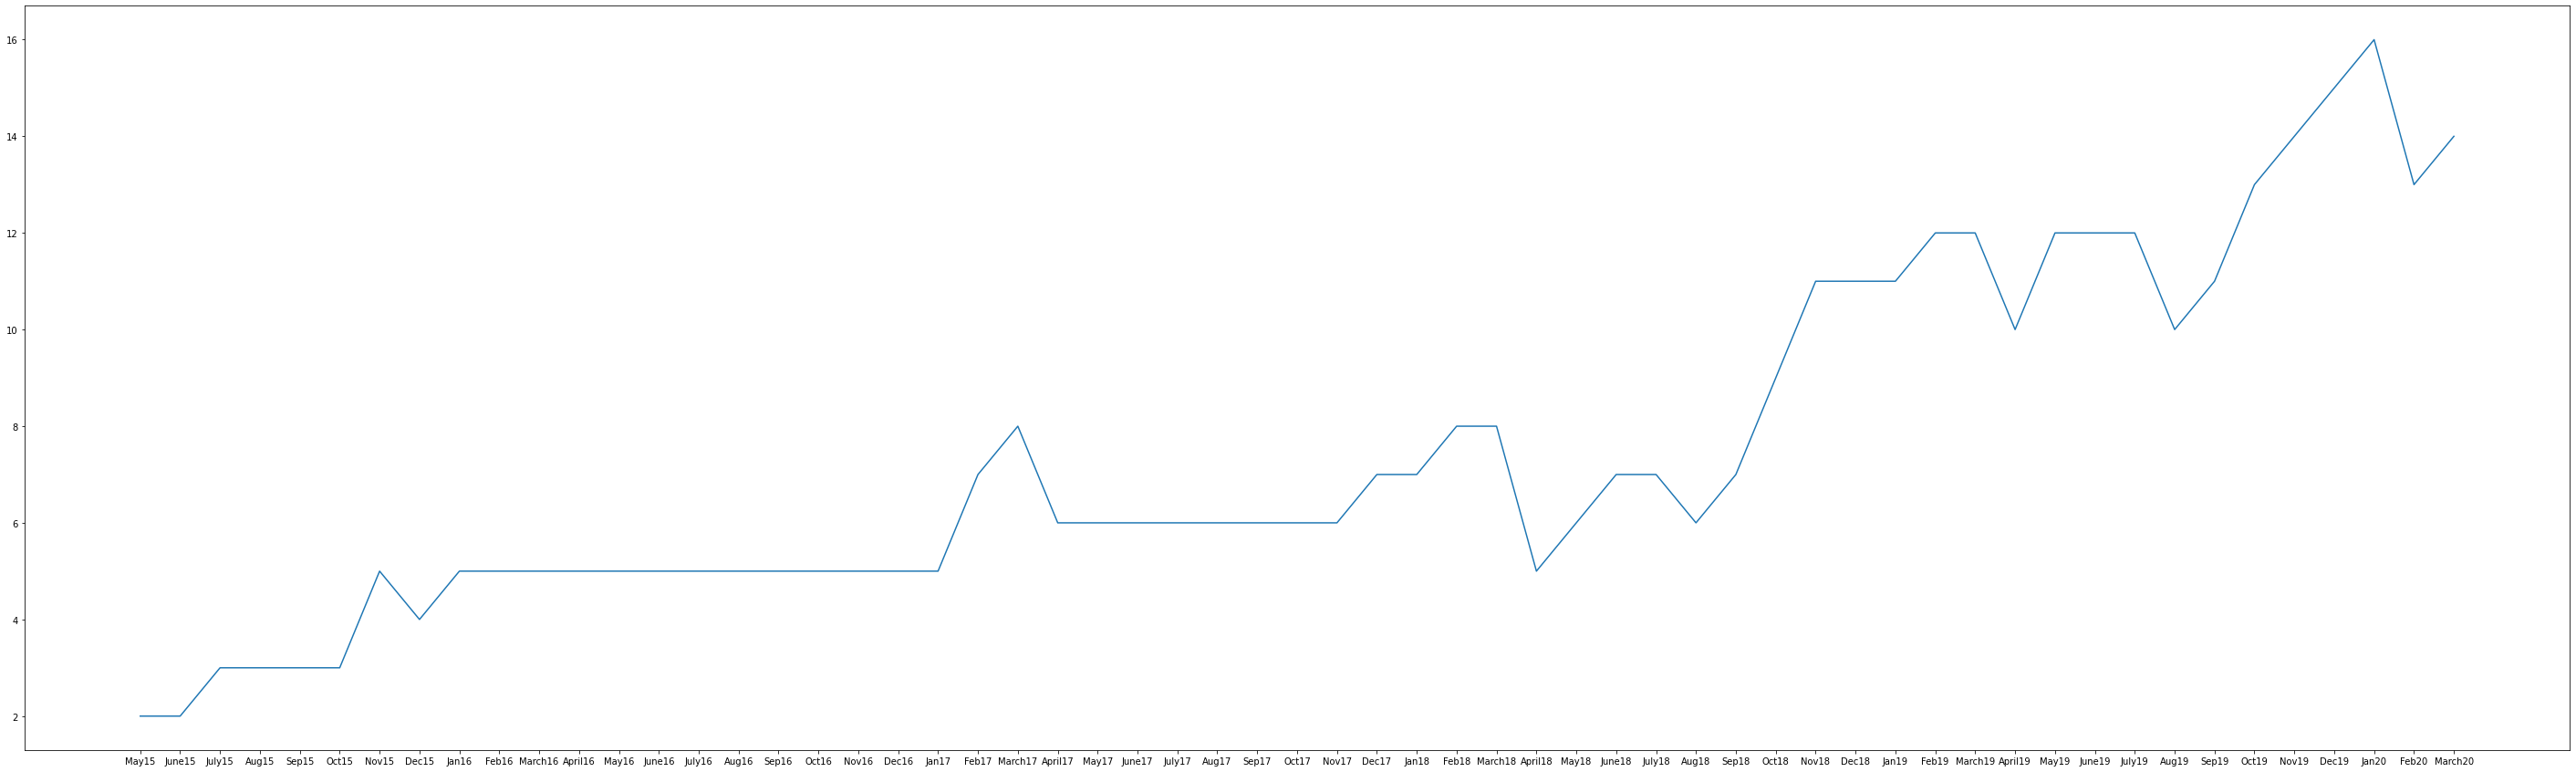


DIU
Increase in edges: 0


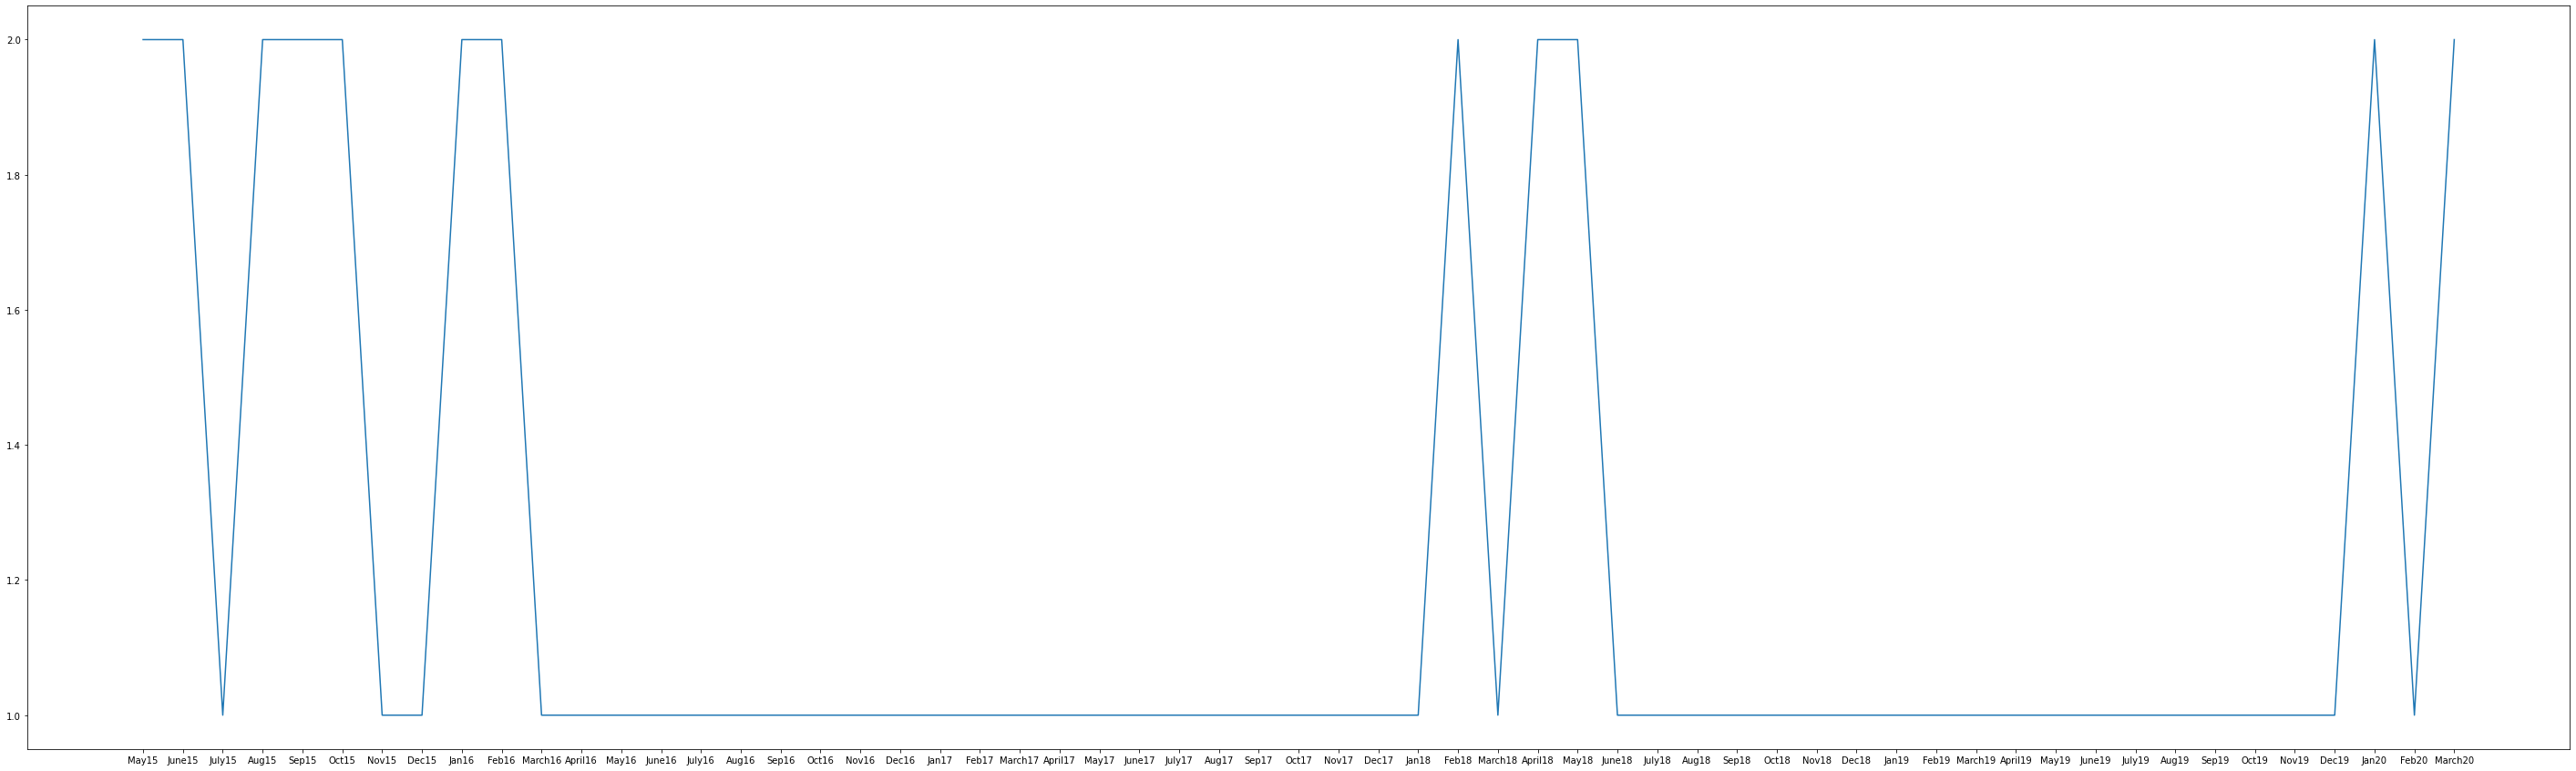


PORBANDAR
Increase in edges: 0


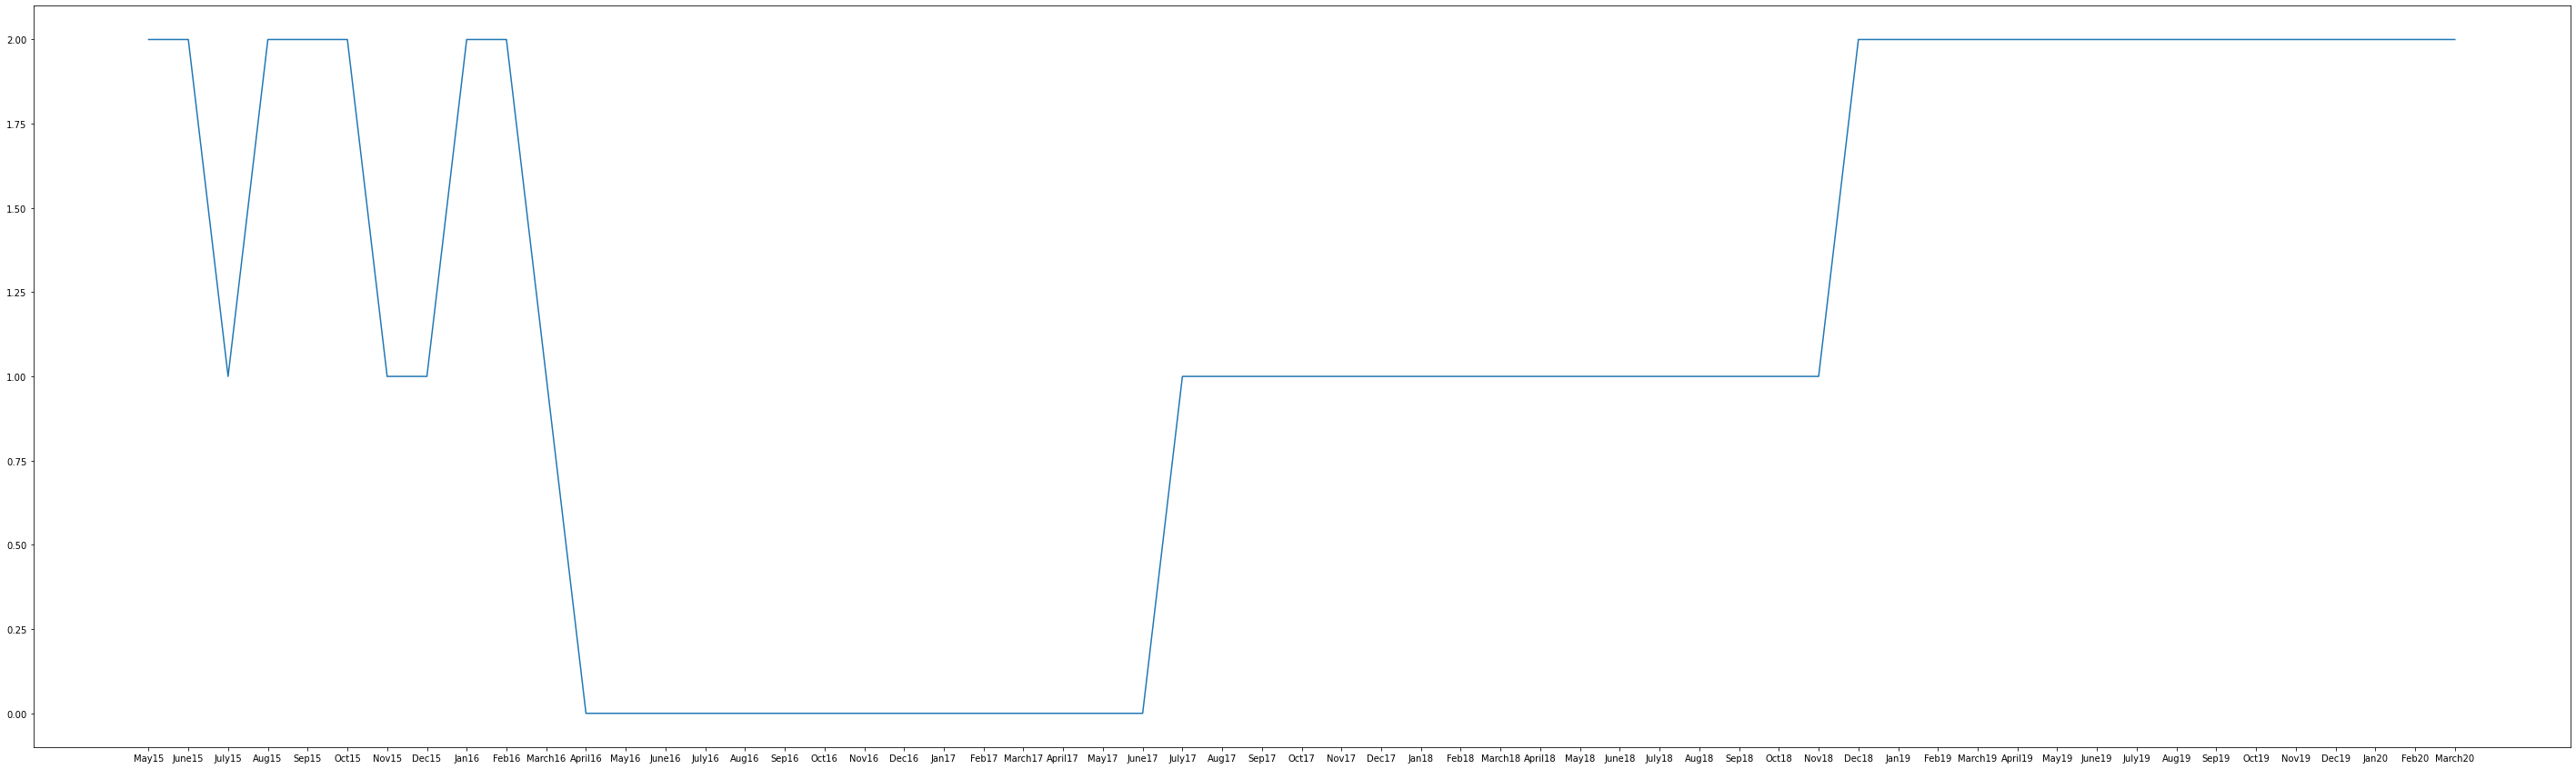


LILABARI
Increase in edges: 0


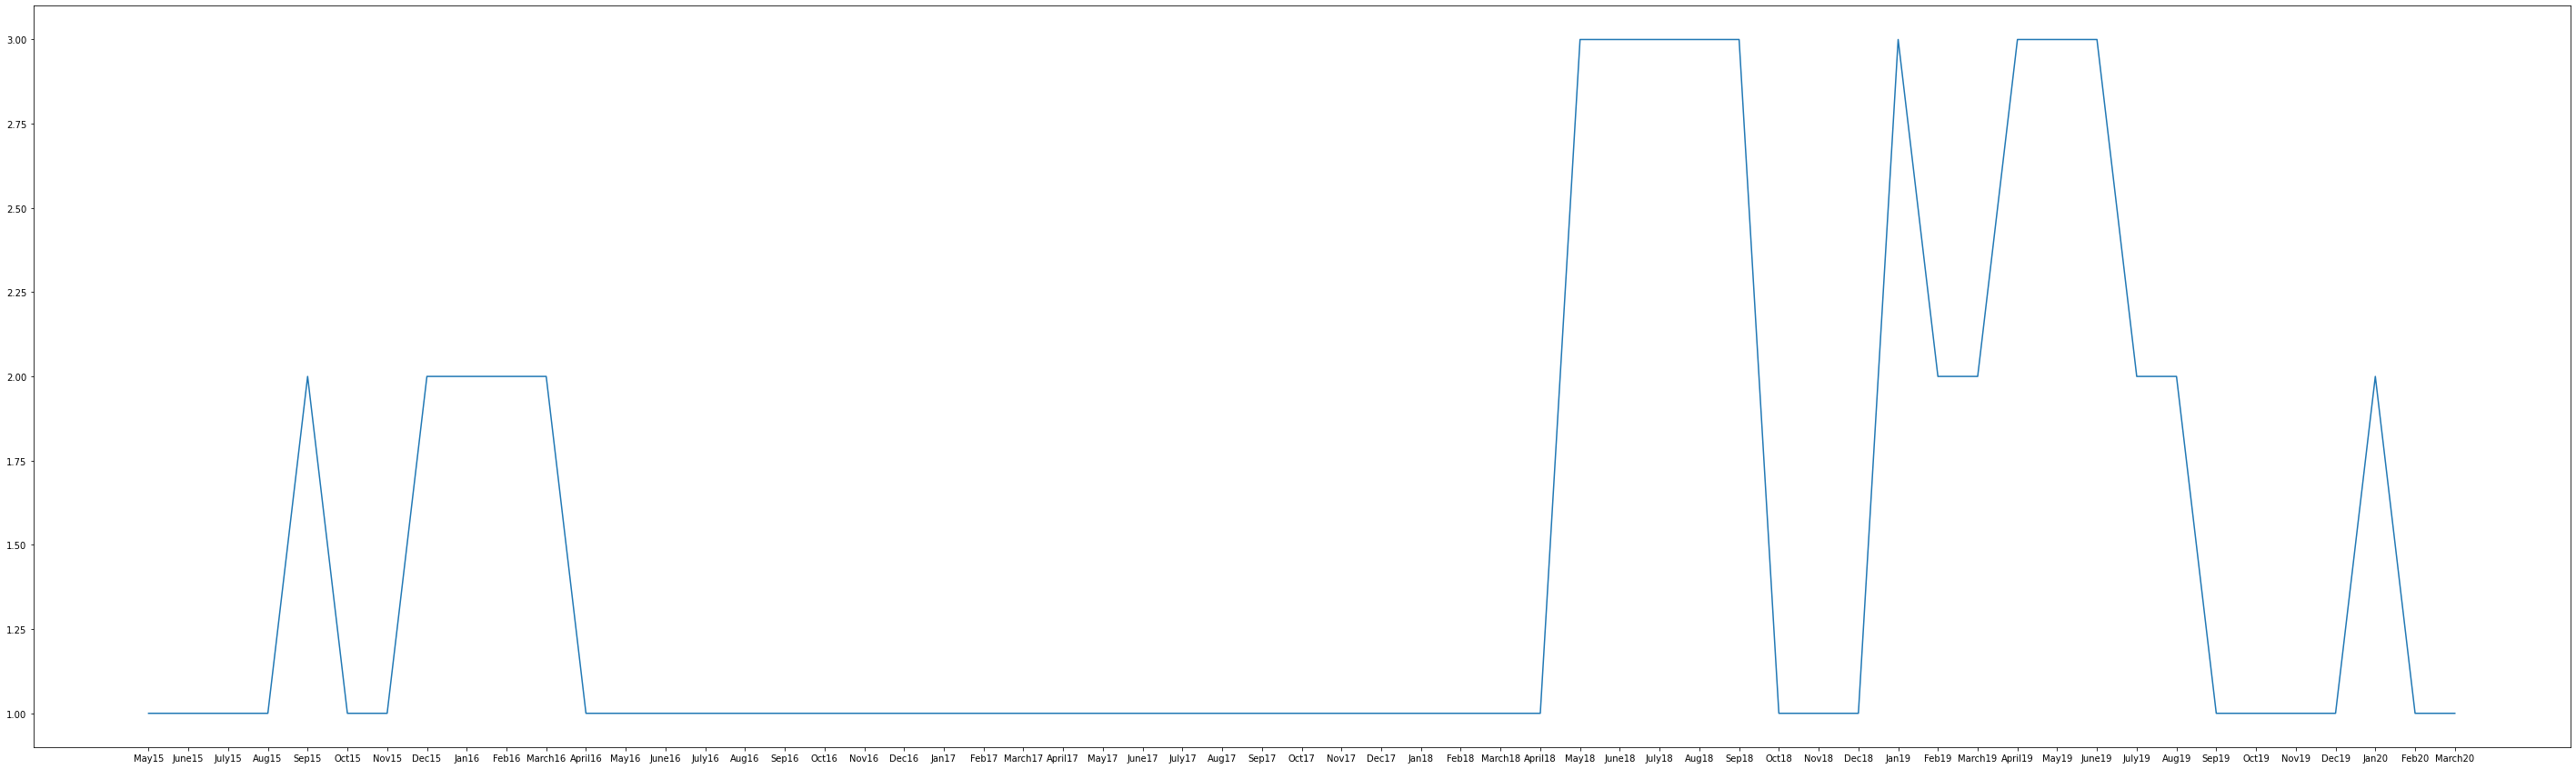


SILCHAR
Increase in edges: 2


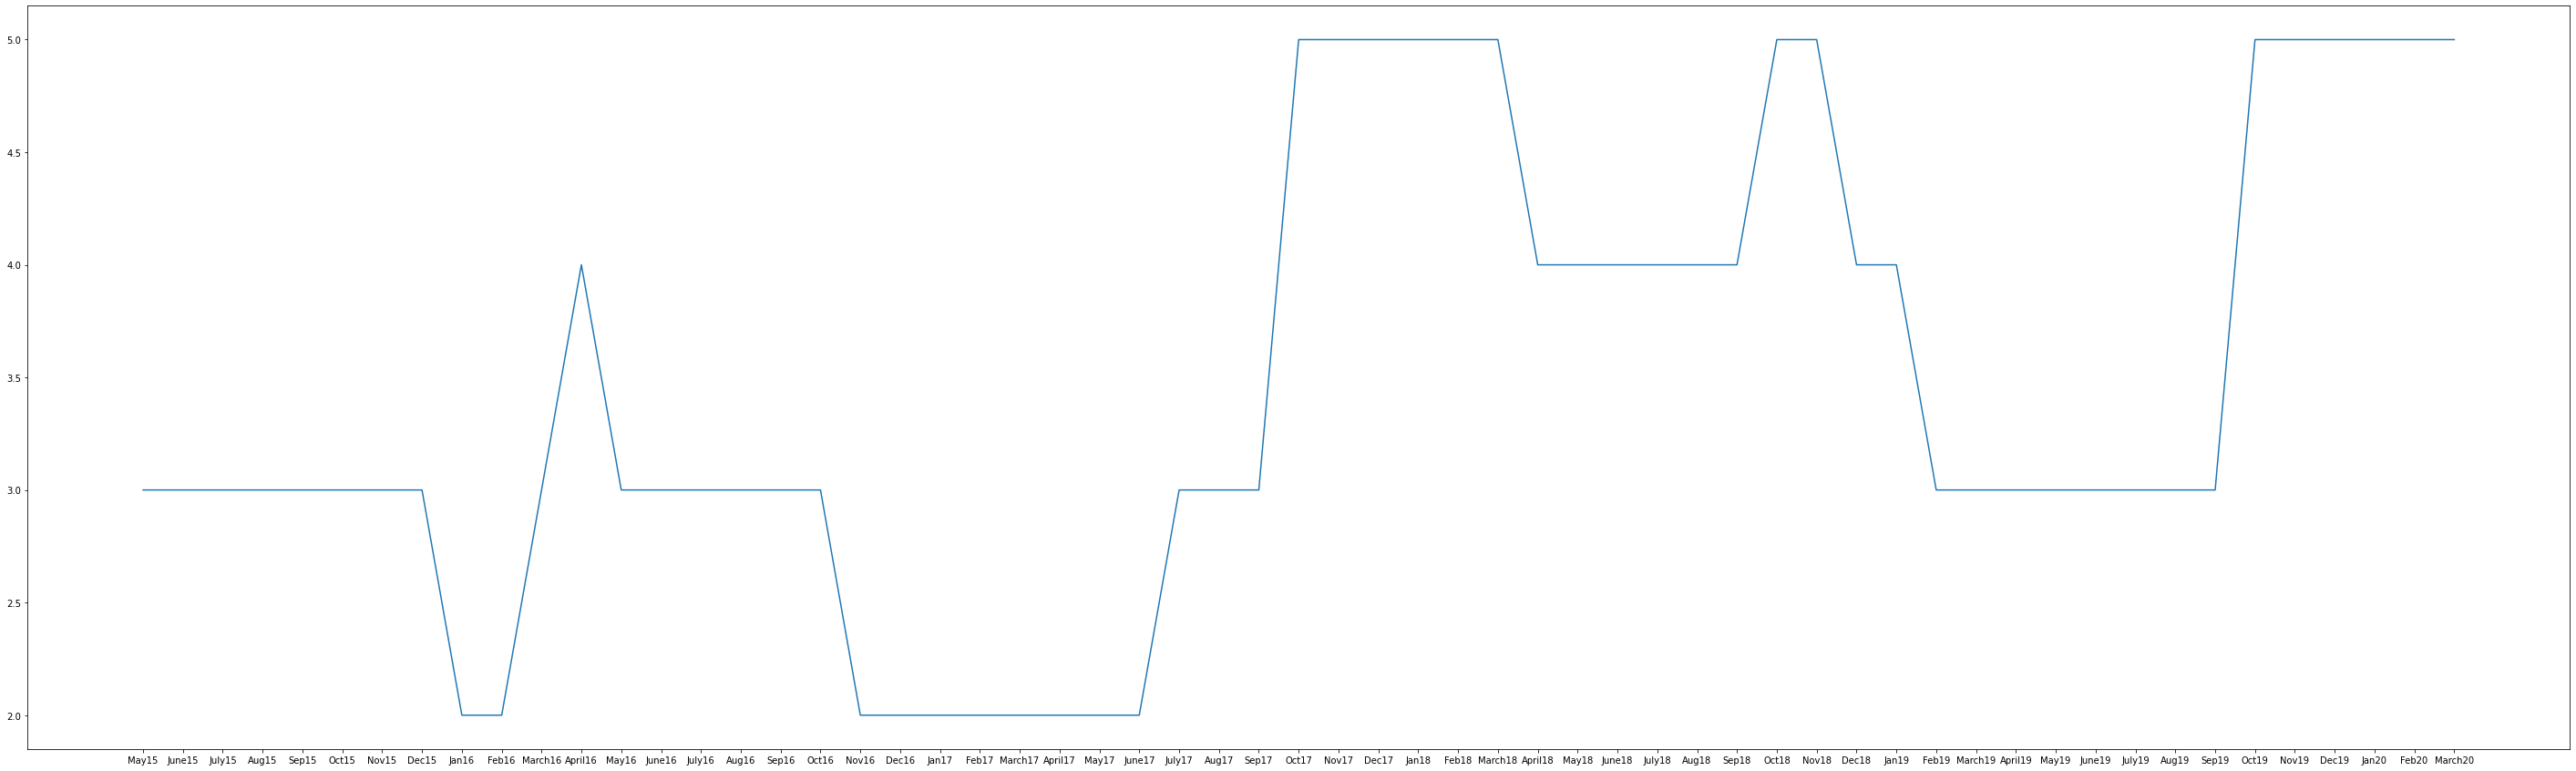


MADURAI
Increase in edges: 6


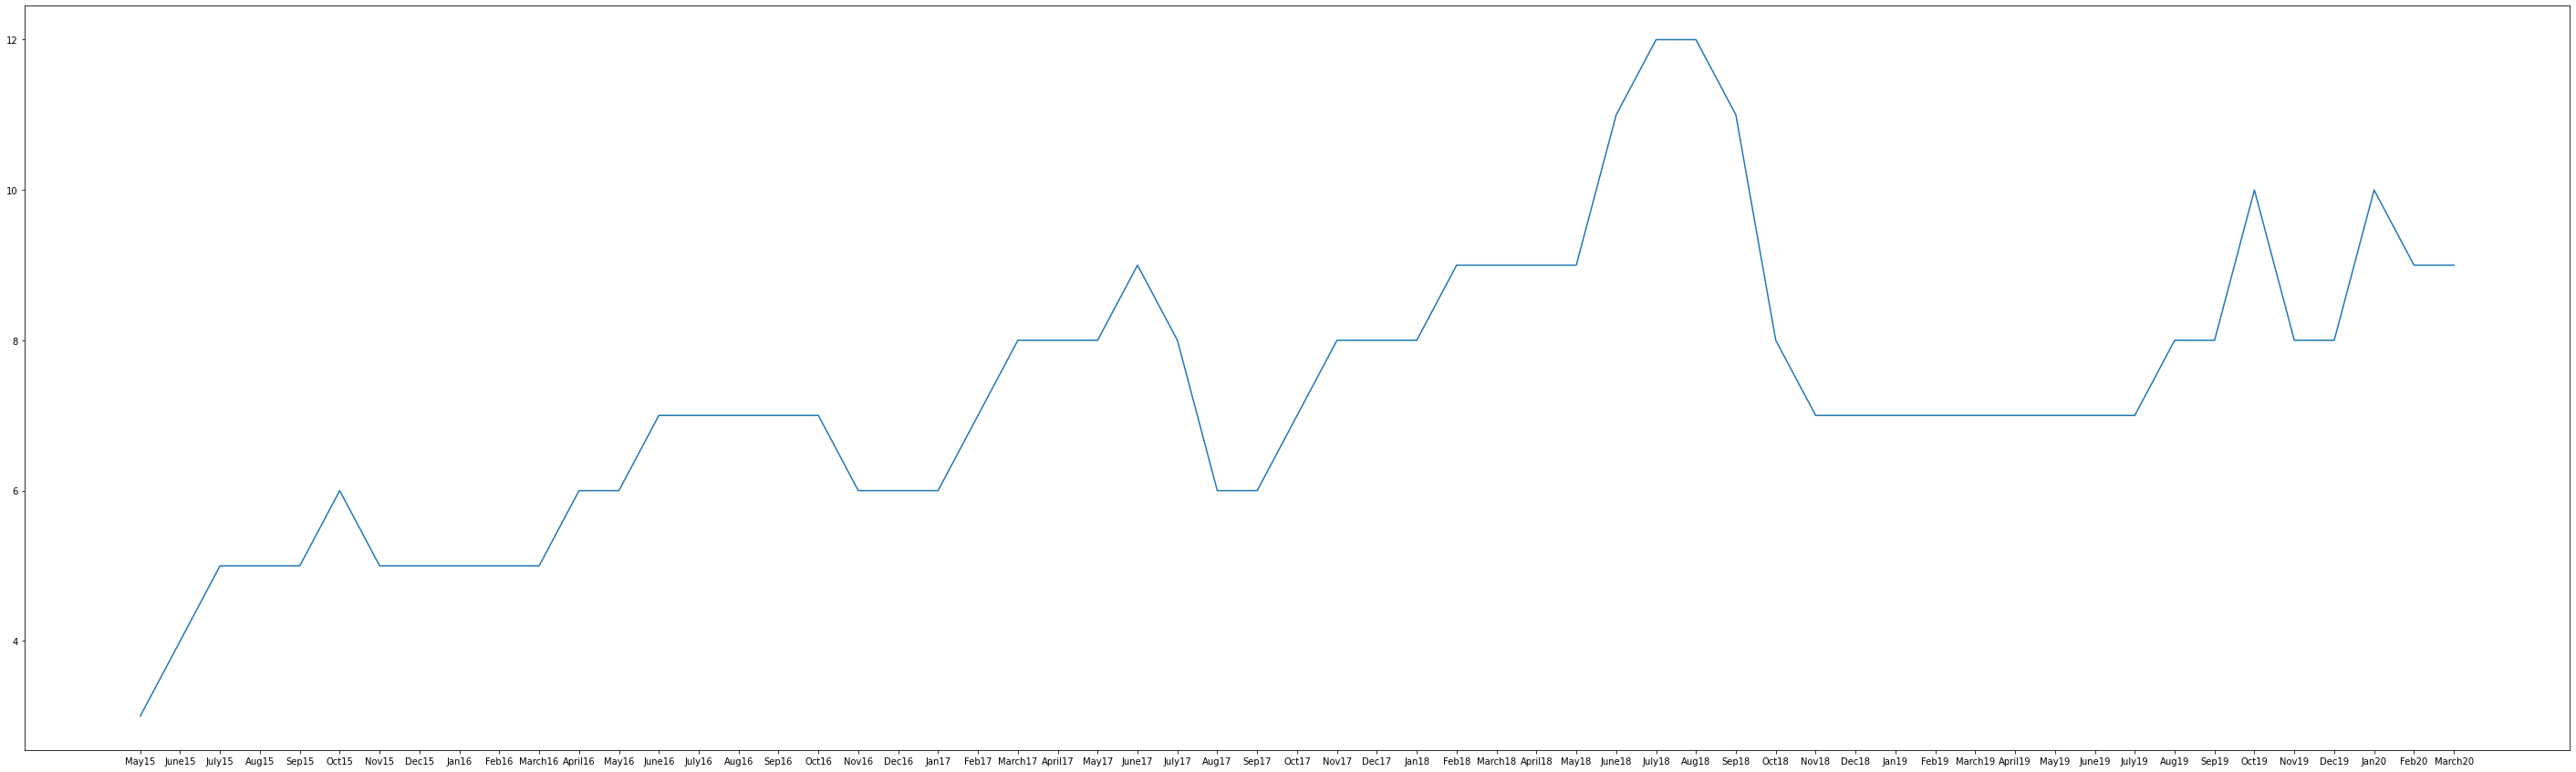


DURGAPUR
Increase in edges: 3


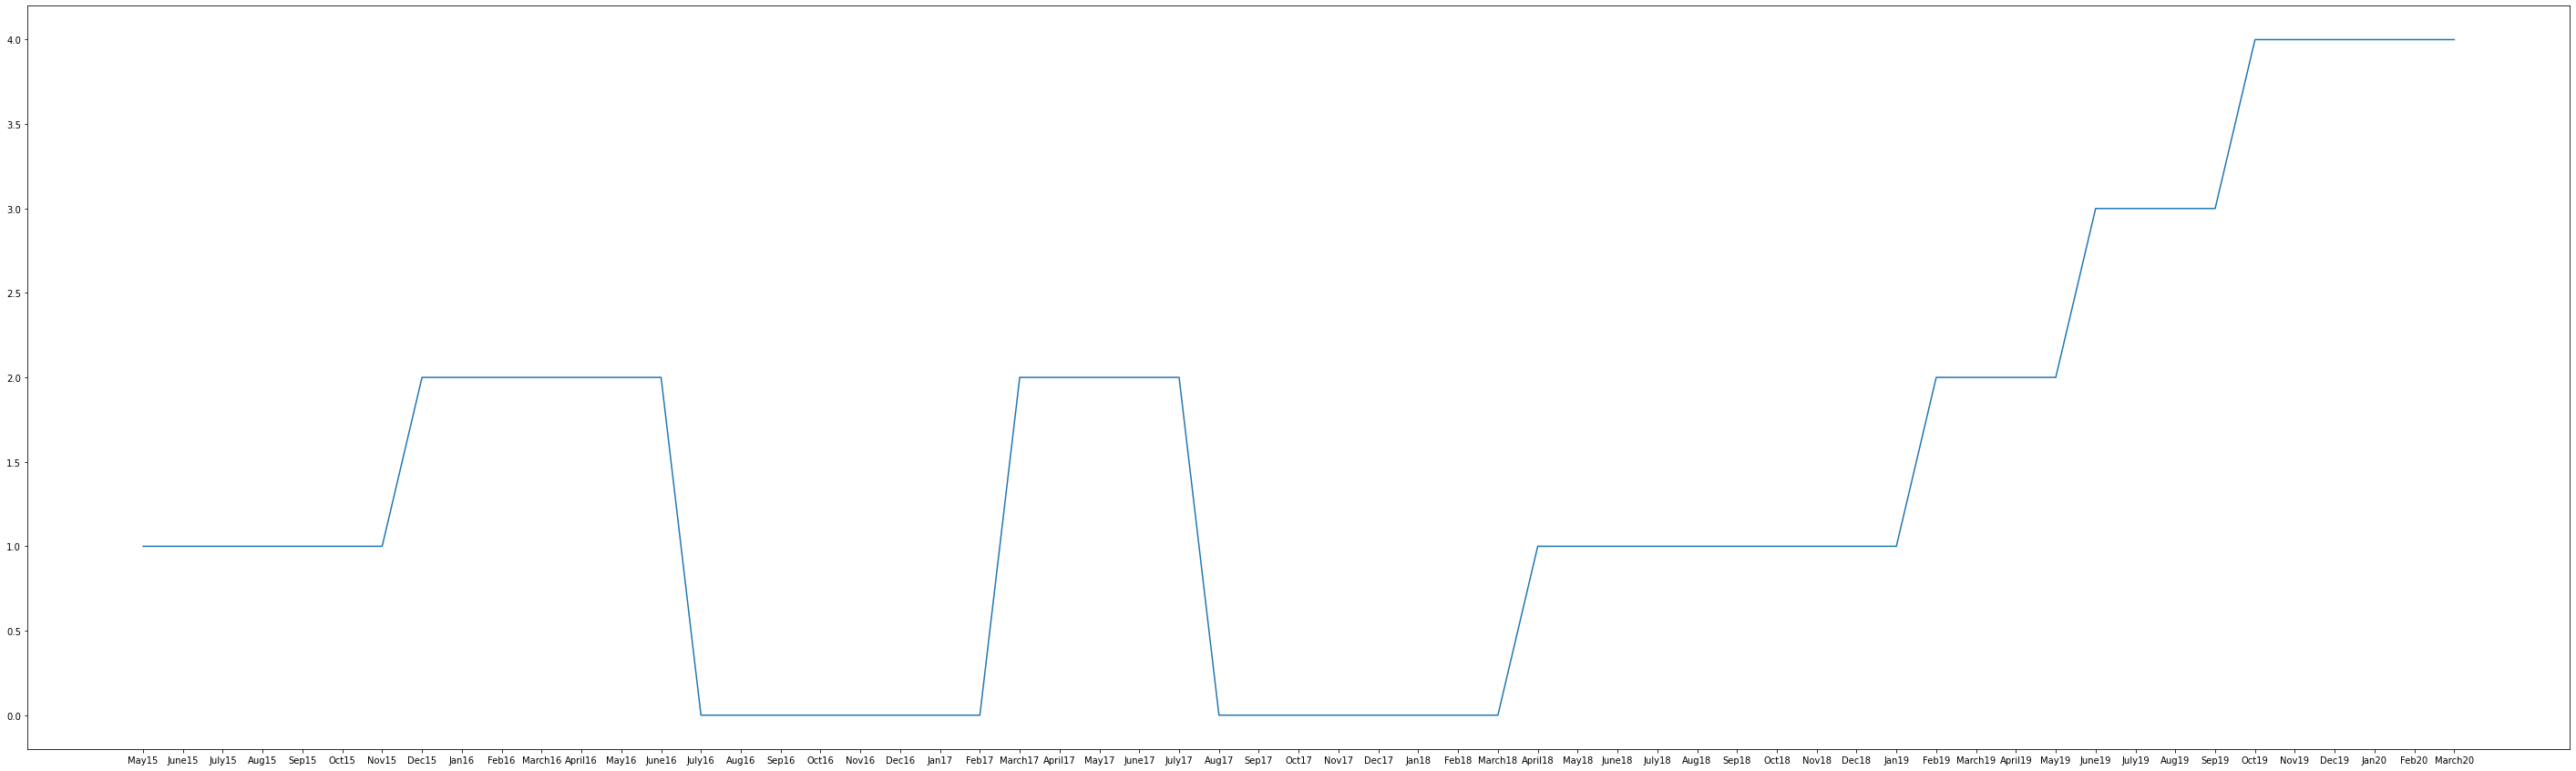


SHILLONG
Increase in edges: 0


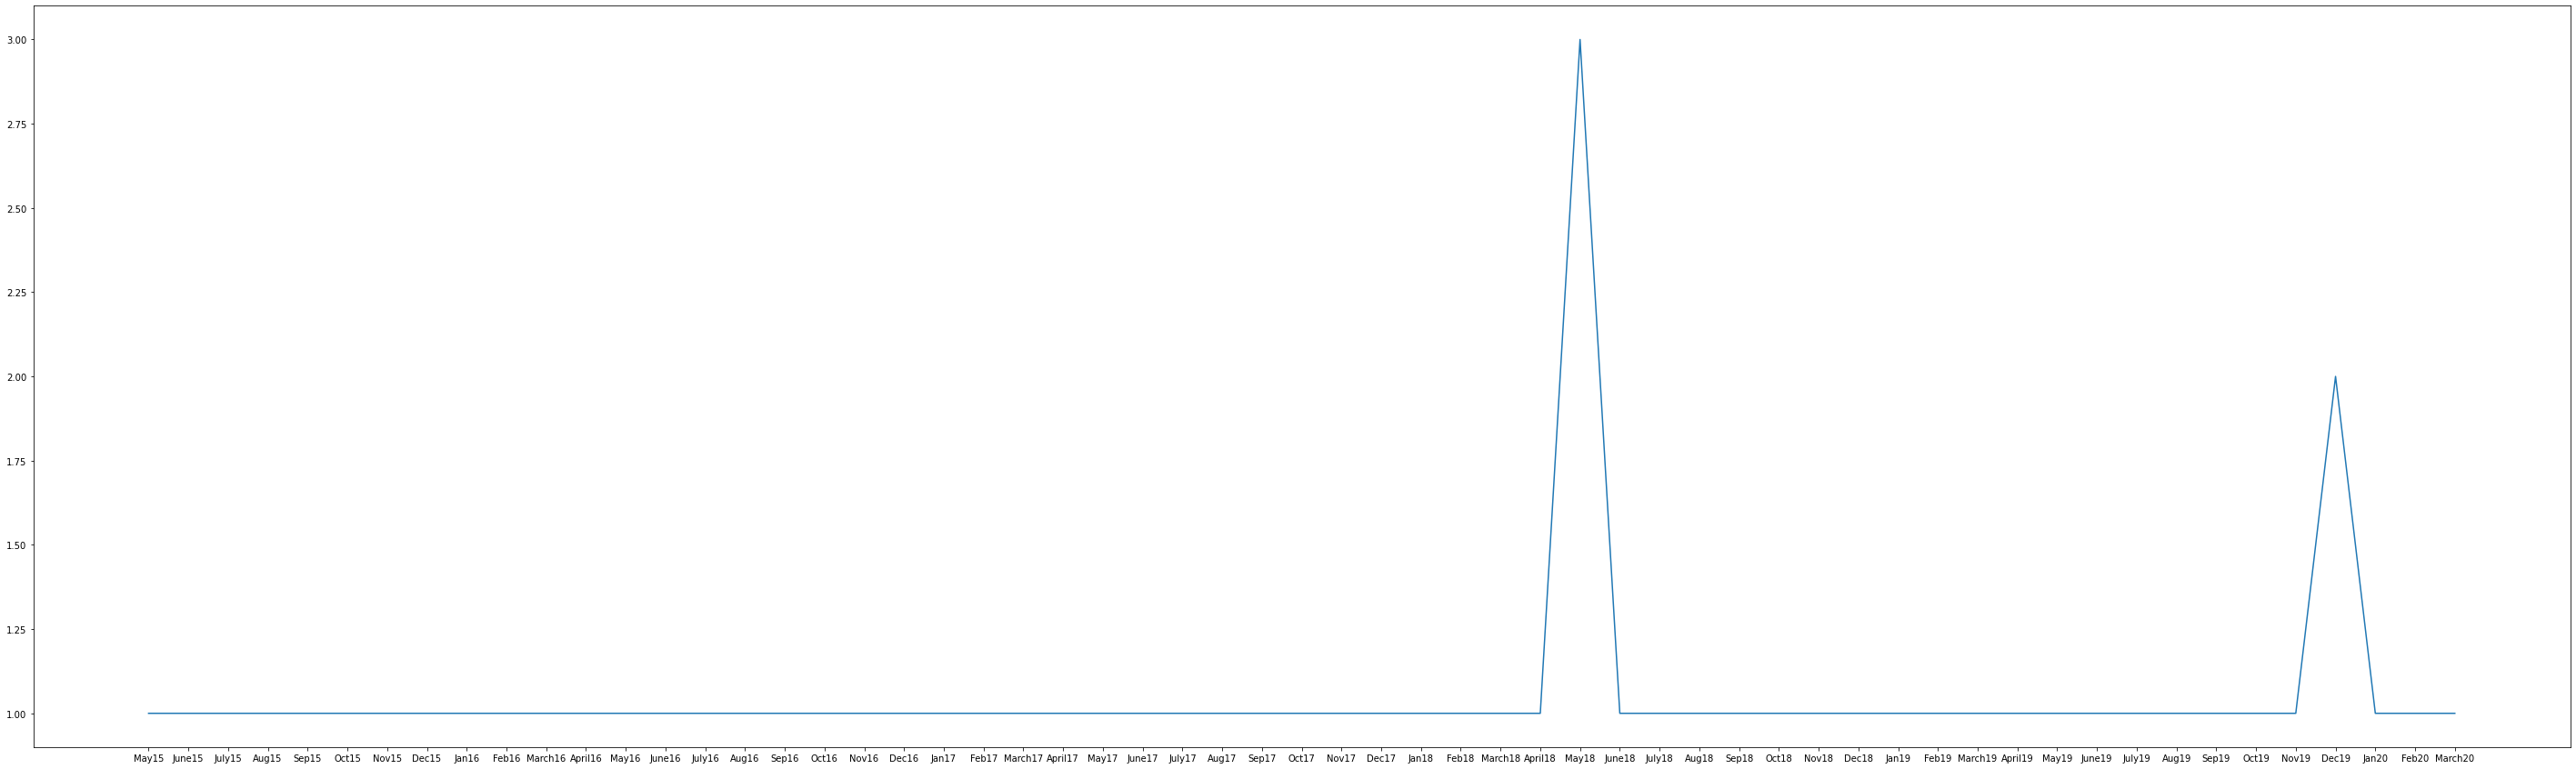


JAMNAGAR
Increase in edges: 0


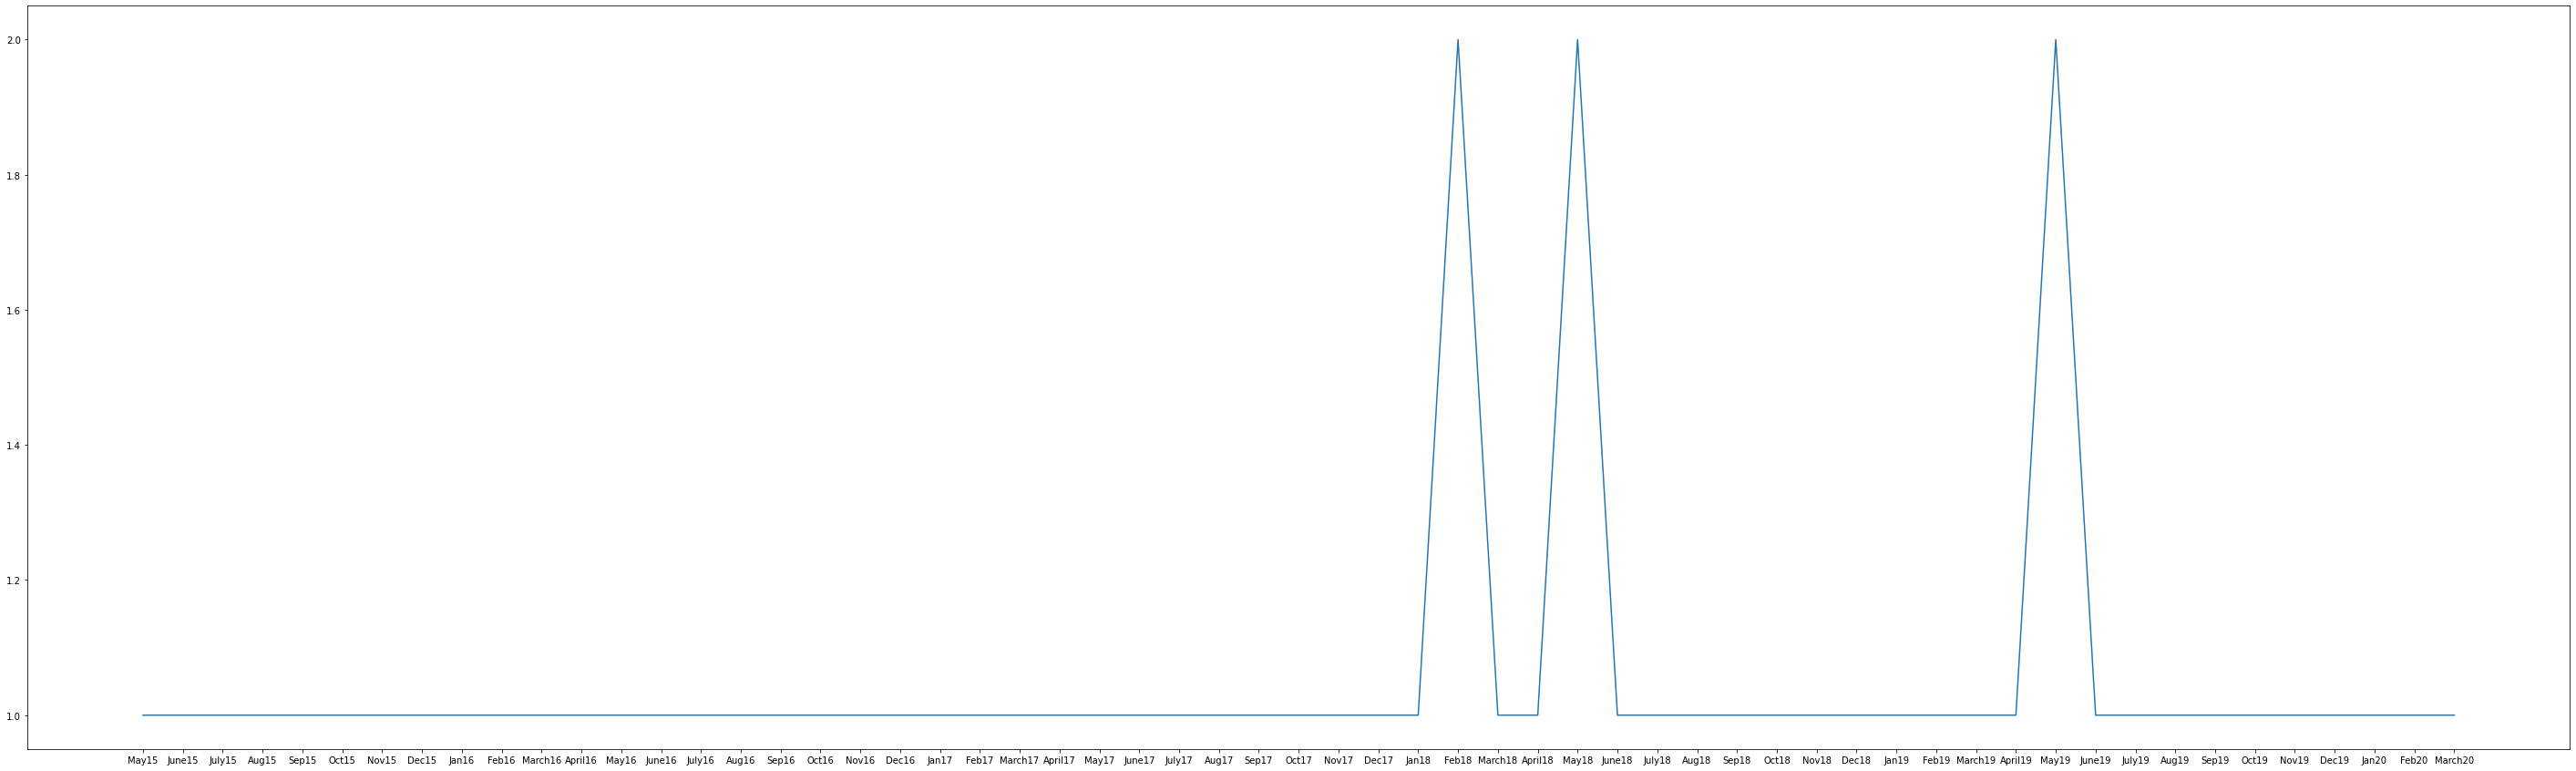


TEZPUR
Increase in edges: 0


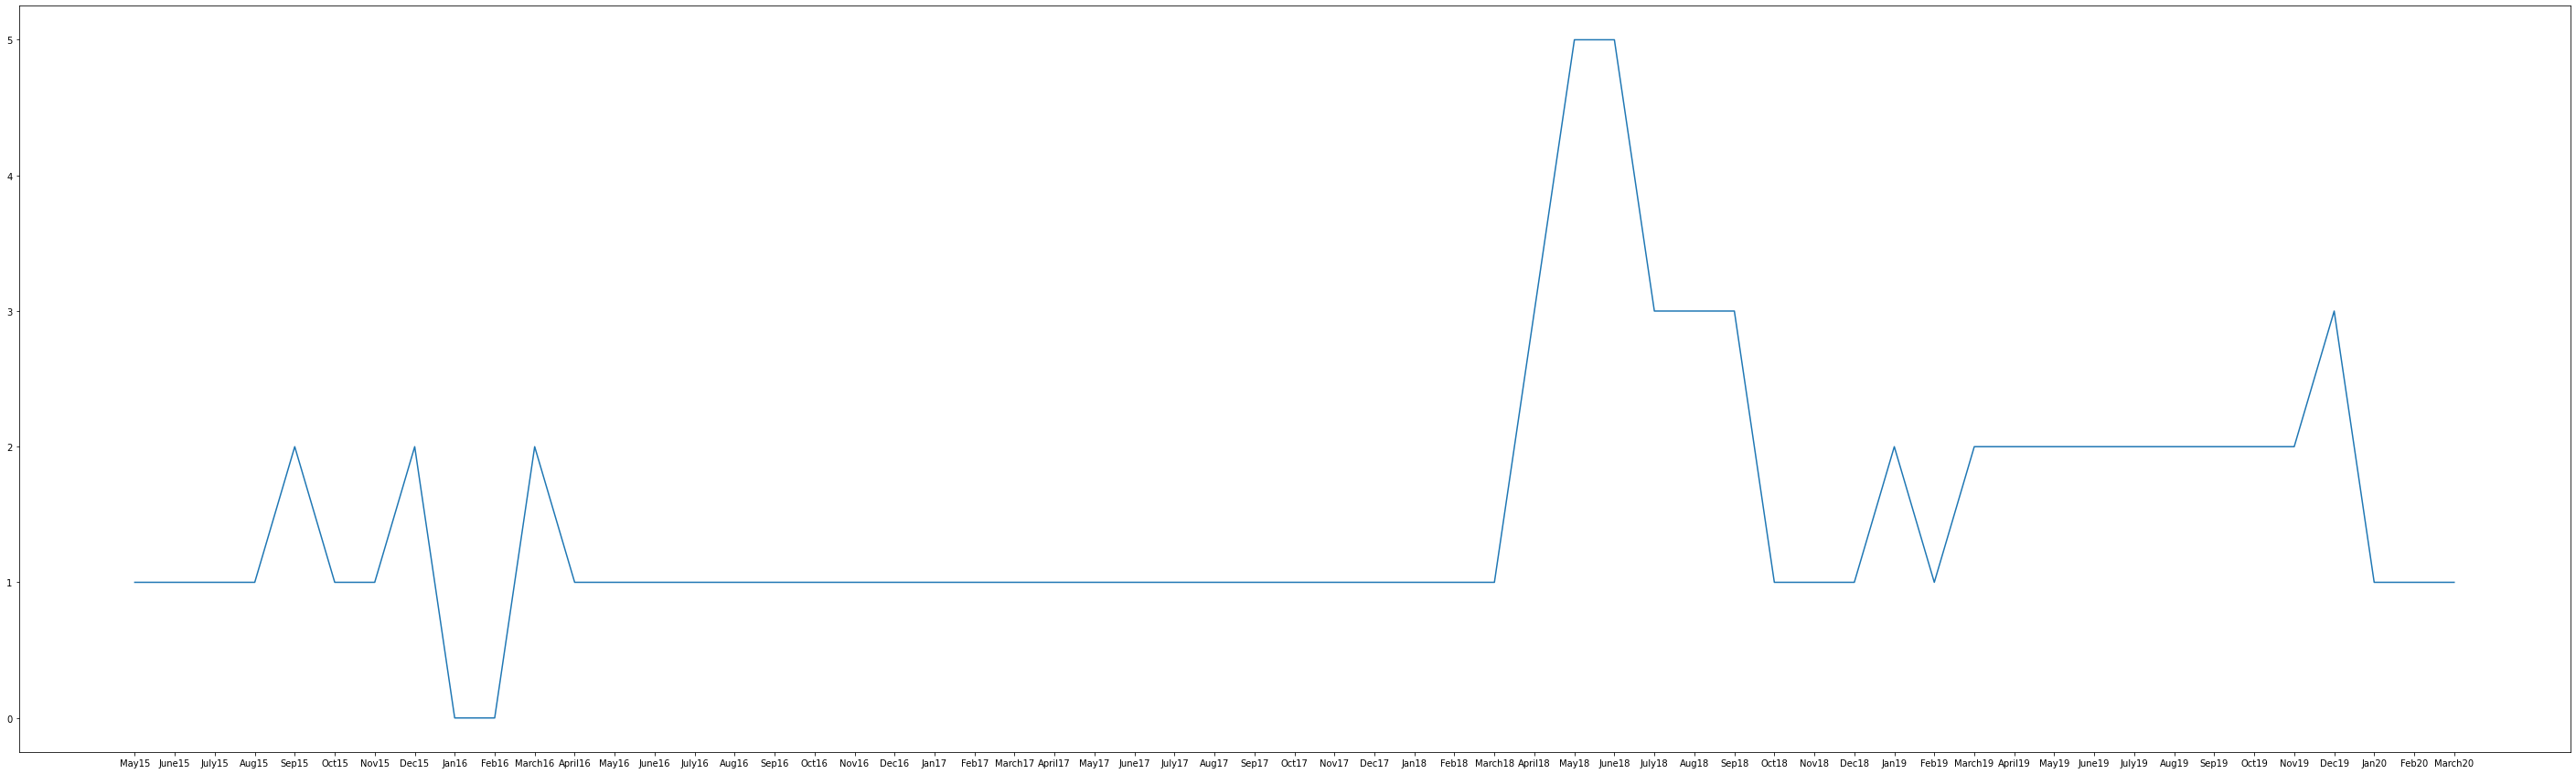


VADODARA
Increase in edges: 1


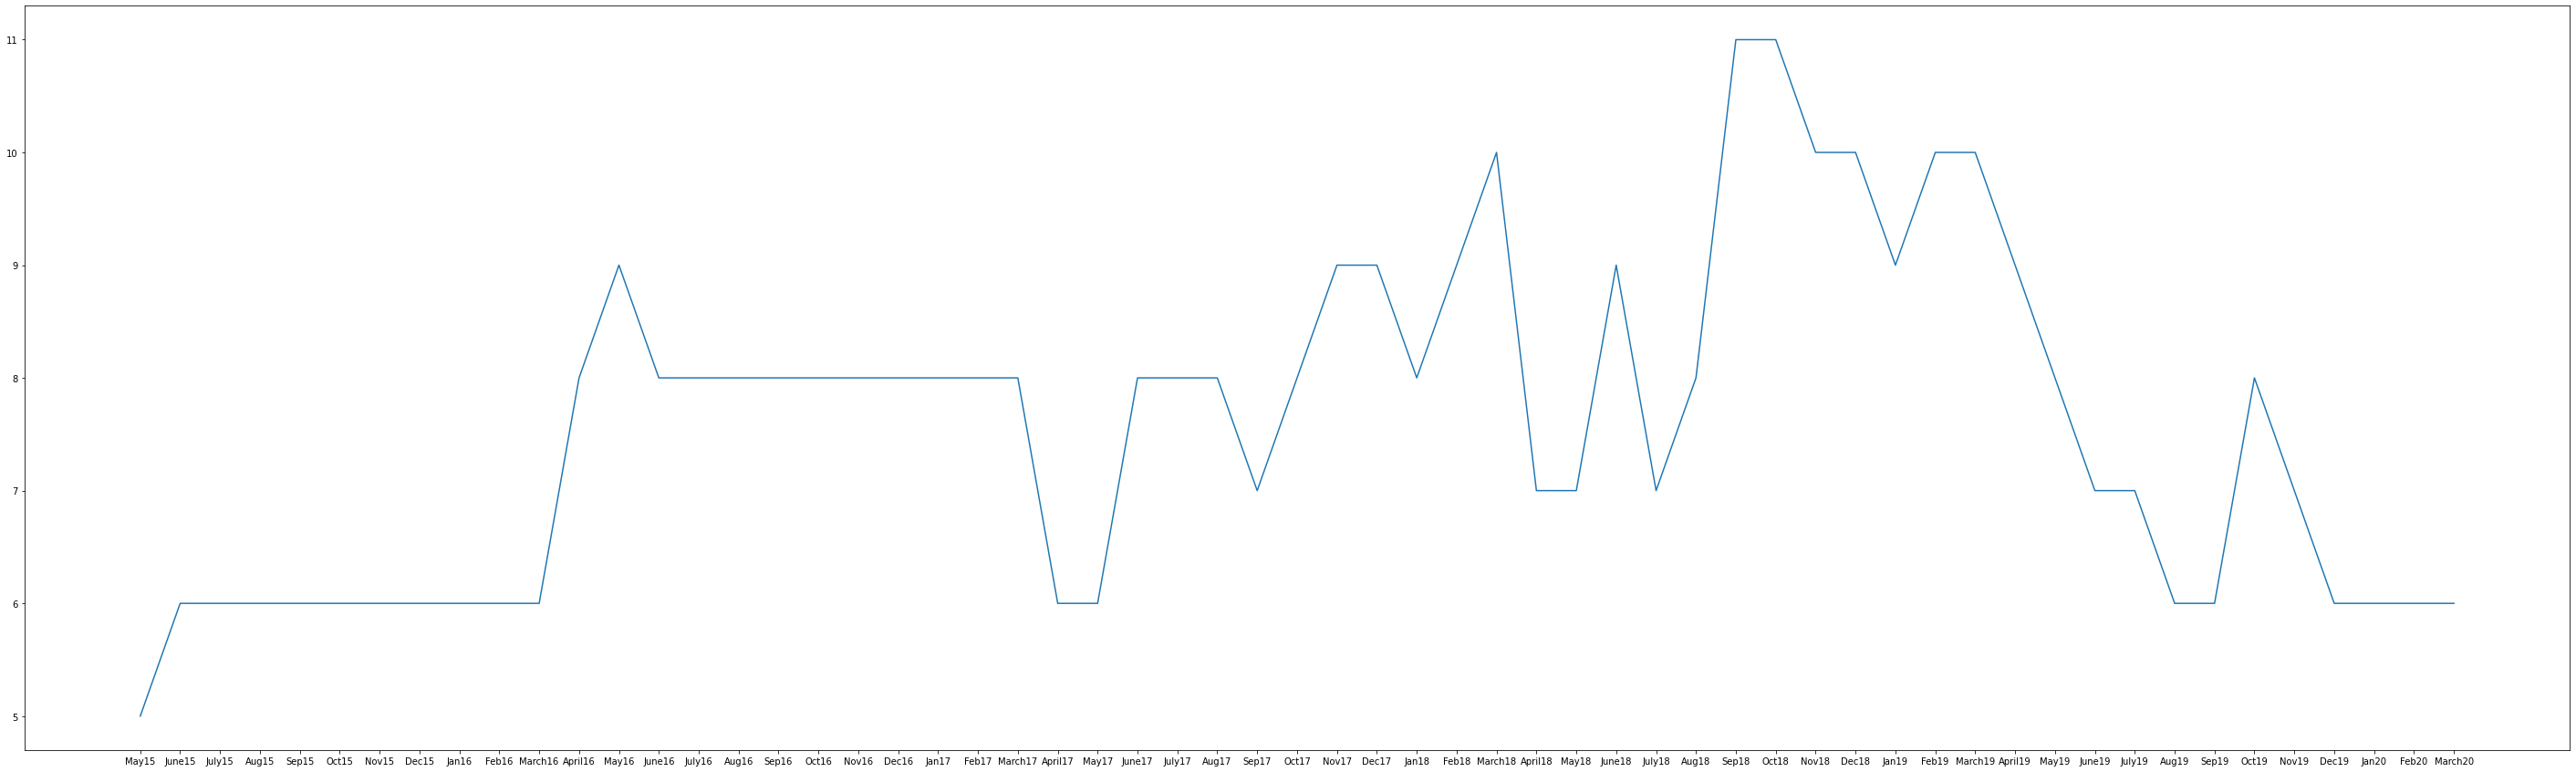

In [19]:
nodes = graphs[0].nodes
for i in nodes:
    print(i)
    analysis(i)
    print()